In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed

In [ ]:
df = pd.read_csv('drive/MyDrive/Dataset/Dry_Bean_Dataset.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
!git clone https://github.com/mdaniyalk/neural-network-scratch

Cloning into 'neural-network-scratch'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 113 (delta 50), reused 69 (delta 30), pack-reused 22
Receiving objects: 100% (113/113), 34.76 MiB | 28.13 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Updating files: 100% (23/23), done.


In [ ]:
from google.colab import files
import sys
import os
import pickle
import copy

In [ ]:
sys.path.insert(0,'/content/neural-network-scratch/module/')

In [ ]:
from layers import Dense,Input,Flatten,Conv1D,MaxPool1D,Dropout
from activations import ReLU, Sigmoid, Softmax
from optimizers import Adam
from losses import CategoricalCrossentropy, BinaryCrossentropy,Softmax_Loss_CategoricalCrossentropy
from accuracy import Categorical_Accuracy
from utils import one_hot_encoding,train_test_split

# Model Layer

In [ ]:
import numpy as np
import pickle
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt

# Model class
class Model:

    def __init__(self):
        # Create a list of network objects
        self.layers = []
        # Softmax classifier's output object
        self.softmax_classifier_output = None
        self.history = {'loss': [],
                        'accuracy': [],}

    # Add objects to the model
    def add(self, layer):
        self.layers.append(layer)


    # Set loss, optimizer and accuracy
    def set(self, *, loss=None, optimizer=None, accuracy=None):

        if loss is not None:
            self.loss = loss

        if optimizer is not None:
            self.optimizer = optimizer

        if accuracy is not None:
            self.accuracy = accuracy

    # Finalize the model
    def finalize(self):

        # Create and set the input layer
        self.input_layer = Input()

        # Count all the objects
        layer_count = len(self.layers)

        # Initialize a list containing trainable layers:
        self.trainable_layers = []

        # Iterate the objects
        for i in range(layer_count):

            # If it's the first layer,
            # the previous layer object is the input layer
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]

            # All layers except for the first and the last
            elif i < layer_count - 1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]

            # The last layer - the next object is the loss
            # Also let's save aside the reference to the last object
            # whose output is the model's output
            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]


            # If layer contains an attribute called "weights",
            # it's a trainable layer -
            # add it to the list of trainable layers
            # We don't need to check for biases -
            # checking for weights is enough
            if hasattr(self.layers[i], 'weights'):
                self.trainable_layers.append(self.layers[i])

        # Update loss object with trainable layers
        if self.loss is not None:
            self.loss.remember_trainable_layers(
                self.trainable_layers
            )

        # If output activation is Softmax and
        # loss function is Categorical Cross-Entropy
        # create an object of combined activation
        # and loss function containing
        # faster gradient calculation
        if isinstance(self.layers[-1], Softmax) and \
           isinstance(self.loss, CategoricalCrossentropy):
            # Create an object of combined activation
            # and loss functions
            self.softmax_classifier_output = \
                Softmax_Loss_CategoricalCrossentropy()

    # Train the model
    def train(self, X, y, *, epochs=1, batch_size=None,
              print_every=1, validation_data=None):

        # Initialize accuracy object
        self.accuracy.init(y)

        # Default value if batch size is not being set
        train_steps = 1

        # Calculate number of steps
        if batch_size is not None:
            train_steps = len(X) // batch_size
            # Dividing rounds down. If there are some remaining
            # data but not a full batch, this won't include it
            # Add `1` to include this not full batch
            if train_steps * batch_size < len(X):
                train_steps += 1

        tmp_loss = []
        tmp_acc = []
        if validation_data is not None:
            tmp_val_loss = []
            tmp_val_acc = []
        else:
            self.has_val_data = False

        # Main training loop
        for epoch in range(1, epochs+1):

            # Reset accumulated values in loss and accuracy objects
            self.loss.new_pass()
            self.accuracy.new_pass()

            # Iterate over steps
            for step in tqdm(range(train_steps), desc=f"Training Epoch: {epoch}/{epochs}"):

                # If batch size is not set -
                # train using one step and full dataset
                if batch_size is None:
                    batch_X = X
                    batch_y = y

                # Otherwise slice a batch
                else:
                    batch_X = X[step*batch_size:(step+1)*batch_size]
                    batch_y = y[step*batch_size:(step+1)*batch_size]

                # Perform the forward pass
                output = self.forward(batch_X, training=True)

                # Calculate loss
                data_loss, regularization_loss = \
                    self.loss.calculate(output, batch_y,
                                        include_regularization=True)
                loss = data_loss + regularization_loss

                # Get predictions and calculate an accuracy
                predictions = self.output_layer_activation.predictions(
                                  output)
                accuracy = self.accuracy.calculate(predictions,
                                                   batch_y)

                # Perform backward pass
                self.backward(output, batch_y)

                # Optimize (update parameters)
                self.optimizer.pre_update_params()
                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)
                self.optimizer.post_update_params()


                # Print a summary
                if not step % print_every or step == train_steps - 1:
                    print(f'step: {step}, ' +
                          f'acc: {accuracy:.3f}, ' +
                          f'loss: {loss:.3f} (' +
                          f'data_loss: {data_loss:.3f}, ' +
                          f'reg_loss: {regularization_loss:.3f}), ' +
                          f'lr: {self.optimizer.current_learning_rate}')

            # Get and print epoch loss and accuracy
            epoch_data_loss, epoch_regularization_loss = \
                self.loss.calculate_accumulated(
                    include_regularization=True)
            epoch_loss = epoch_data_loss + epoch_regularization_loss
            epoch_accuracy = self.accuracy.calculate_accumulated()
            tmp_loss.append(epoch_loss)
            tmp_acc.append(epoch_accuracy)
            print(f'training, ' +
                  f'acc: {epoch_accuracy:.3f}, ' +
                  f'loss: {epoch_loss:.3f} (' +
                  f'data_loss: {epoch_data_loss:.3f}, ' +
                  f'reg_loss: {epoch_regularization_loss:.3f}), ' +
                  f'lr: {self.optimizer.current_learning_rate}')

            # If there is the validation data
            if validation_data is not None:

                # Evaluate the model:
                val_acc, val_loss = self.evaluate(*validation_data,
                                                  batch_size=batch_size,
                                                  return_data=True)
                tmp_val_loss.append(val_loss)
                tmp_val_acc.append(val_acc)


        self.history['loss'] = tmp_loss
        self.history['accuracy'] = tmp_acc
        if validation_data is not None:
            self.history['val_loss'] = tmp_val_loss
            self.history['val_accuracy'] = tmp_val_acc
            self.has_val_data = True

    # Evaluates the model using passed-in dataset
    def evaluate(self, X_val, y_val, *, batch_size=None, return_data=False):

        # Default value if batch size is not being set
        validation_steps = 1

        # Calculate number of steps
        if batch_size is not None:
            validation_steps = len(X_val) // batch_size
            # Dividing rounds down. If there are some remaining
            # data but not a full batch, this won't include it
            # Add `1` to include this not full batch
            if validation_steps * batch_size < len(X_val):
                validation_steps += 1

        # Reset accumulated values in loss
        # and accuracy objects
        self.loss.new_pass()
        self.accuracy.new_pass()


        # Iterate over steps
        for step in range(validation_steps):

            # If batch size is not set -
            # train using one step and full dataset
            if batch_size is None:
                batch_X = X_val
                batch_y = y_val

            # Otherwise slice a batch
            else:
                batch_X = X_val[
                    step*batch_size:(step+1)*batch_size
                ]
                batch_y = y_val[
                    step*batch_size:(step+1)*batch_size
                ]

            # Perform the forward pass
            output = self.forward(batch_X, training=False)

            # Calculate the loss
            self.loss.calculate(output, batch_y)

            # Get predictions and calculate an accuracy
            predictions = self.output_layer_activation.predictions(
                              output)
            self.accuracy.calculate(predictions, batch_y)

        # Get and print validation loss and accuracy
        validation_loss = self.loss.calculate_accumulated()
        validation_accuracy = self.accuracy.calculate_accumulated()

        # Print a summary
        print(f'validation, ' +
              f'acc: {validation_accuracy:.3f}, ' +
              f'loss: {validation_loss:.3f}')
        if return_data:
            return validation_accuracy, validation_loss

    def plot_history(self):
        fig, axes = plt.subplots(nrows=1, ncols=2)
        len_data = [i for i in range(len(self.history['loss']))]
        axes[0].plot(len_data, self.history['loss'], color='blue', label='loss')
        if self.has_val_data:
            axes[0].plot(len_data, self.history['val_loss'], color='red', label='val_loss')
        axes[0].set_title('Loss')
        axes[0].legend()

        axes[1].plot(len_data, self.history['accuracy'], color='blue', label='accuracy')
        if self.has_val_data:
            axes[1].plot(len_data, self.history['val_accuracy'], color='red', label='val_accuracy')
        axes[1].set_title('Accuracy')
        axes[1].legend()

        plt.show()

    # Predicts on the samples
    def predict(self, X, *, batch_size=None):

        # Default value if batch size is not being set
        prediction_steps = 1

        # Calculate number of steps
        if batch_size is not None:
            prediction_steps = len(X) // batch_size

            # Dividing rounds down. If there are some remaining
            # data but not a full batch, this won't include it
            # Add `1` to include this not full batch
            if prediction_steps * batch_size < len(X):
                prediction_steps += 1

        # Model outputs
        output = []

        # Iterate over steps
        for step in range(prediction_steps):

            # If batch size is not set -
            # train using one step and full dataset
            if batch_size is None:
                batch_X = X

            # Otherwise slice a batch
            else:
                batch_X = X[step*batch_size:(step+1)*batch_size]

            # Perform the forward pass
            batch_output = self.forward(batch_X, training=False)

            # Append batch prediction to the list of predictions
            output.append(batch_output)

        # Stack and return results
        return np.vstack(output)

    # Performs forward pass
    def forward(self, X, training):

        # Call forward method on the input layer
        # this will set the output property that
        # the first layer in "prev" object is expecting
        self.input_layer.forward(X, training)

        # Call forward method of every object in a chain
        # Pass output of the previous object as a parameter
        for layer in self.layers:
            layer.forward(layer.prev.output, training)

        # "layer" is now the last object from the list,
        # return its output
        return layer.output


    # Performs backward pass
    def backward(self, output, y):

        # If softmax classifier
        if self.softmax_classifier_output is not None:
            # First call backward method
            # on the combined activation/loss
            # this will set dinputs property
            self.softmax_classifier_output.backward(output, y)

            # Since we'll not call backward method of the last layer
            # which is Softmax activation
            # as we used combined activation/loss
            # object, let's set dinputs in this object
            self.layers[-1].dinputs = \
                self.softmax_classifier_output.dinputs

            # Call backward method going through
            # all the objects but last
            # in reversed order passing dinputs as a parameter
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)

            return

        # First call backward method on the loss
        # this will set dinputs property that the last
        # layer will try to access shortly
        self.loss.backward(output, y)

        # Call backward method going through all the objects
        # in reversed order passing dinputs as a parameter
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)

    # Retrieves and returns parameters of trainable layers
    def get_parameters(self):

        # Create a list for parameters
        parameters = []

        # Iterable trainable layers and get their parameters
        for layer in self.trainable_layers:
            parameters.append(layer.get_parameters())

        # Return a list
        return parameters


    # Updates the model with new parameters
    def set_parameters(self, parameters):

        # Iterate over the parameters and layers
        # and update each layers with each set of the parameters
        for parameter_set, layer in zip(parameters,
                                        self.trainable_layers):
            layer.set_parameters(*parameter_set)

    # Saves the parameters to a file
    def save_parameters(self, path):

        # Open a file in the binary-write mode
        # and save parameters into it
        with open(path, 'wb') as f:
            pickle.dump(self.get_parameters(), f)

    # Loads the weights and updates a model instance with them
    def load_parameters(self, path):

        # Open file in the binary-read mode,
        # load weights and update trainable layers
        with open(path, 'rb') as f:
            self.set_parameters(pickle.load(f))

    # Saves the model
    def save(self, path):

        # Make a deep copy of current model instance
        model = copy.deepcopy(self)

        # Reset accumulated values in loss and accuracy objects
        model.loss.new_pass()
        model.accuracy.new_pass()

        # Remove data from the input layer
        # and gradients from the loss object
        model.input_layer.__dict__.pop('output', None)
        model.loss.__dict__.pop('dinputs', None)

        # For each layer remove inputs, output and dinputs properties
        for layer in model.layers:
            for property in ['inputs', 'output', 'dinputs',
                             'dweights', 'dbiases']:
                layer.__dict__.pop(property, None)

        # Open a file in the binary-write mode and save the model
        with open(path, 'wb') as f:
            pickle.dump(model, f)


    # Loads and returns a model
    @staticmethod
    def load(path):

        # Open file in the binary-read mode, load a model
        with open(path, 'rb') as f:
            model = pickle.load(f)

        # Return a model
        return model

# Data Preparation

In [ ]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [ ]:
np.unique(y)

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([5, 5, 5, ..., 3, 3, 3])

# MinMax & Train Test

In [ ]:
def minmax_scaler(df):
    df_scaled = pd.DataFrame()
    for column in df.columns:
        min_value = df[column].min()
        max_value = df[column].max()
        df_scaled[column] = (df[column] - min_value) / (max_value - min_value)
    return df_scaled

In [ ]:
X_scaled = minmax_scaler(X)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
y_train

array([3, 3, 3, ..., 2, 5, 4])

# Scoring Metrics


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def confusion_matrix(actual, predicted, num_classes):
    matrix = np.zeros((num_classes, num_classes))
    for i in range(len(actual)):
        matrix[actual[i]][predicted[i]] += 1

    return matrix

def plot_confusion_matrix(matrix, class_labels):
    num_classes = len(class_labels)

    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()

    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    thresh = matrix.max() / 2.0
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, int(matrix[i, j]), horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

def accuracy(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / len(actual) * 100.0

def recall(matrix, class_label):
    true_positives = matrix[class_label][class_label]
    false_negatives = np.sum(matrix[class_label]) - true_positives
    return true_positives / (true_positives + false_negatives)

def precision(matrix, class_label):
    true_positives = matrix[class_label][class_label]
    false_positives = np.sum(matrix[:, class_label]) - true_positives
    return true_positives / (true_positives + false_positives)


# SVM Initialization

In [ ]:
class SVM:
    def __init__(self, learning_rate=0.01, max_iters=100, C=0.5):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.C = C

    def binary_cross_entropy_loss(self, y_true, y_pred):
        # N = y_true.shape[0]
        N = 1
        loss = -(1/N) * np.sum(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))
        return loss

    def sigmoid(self,x):
        return np.exp(-np.logaddexp(0, -x))

    def accuracy(self, y_true, y_pred):
        sum = 0
        for i in range(len(y_true)):
            if y_pred[i] == y_true[i]:
                sum = sum + 1
        return sum/len(y_pred)

    def fit(self, X, y, verbose = 0):
        X = np.asarray(X)
        y = np.asarray(y)
        n_samples, n_features = X.shape

        # Initialize the weight and bias parameters
        self.w = np.zeros(n_features)
        self.b = 0

        # Perform stochastic gradient descent to optimize the SVM objective
        for epoch in tqdm(range(self.max_iters), position=0,leave=True, desc="Training SVM Models"):
            for i in range(n_samples):
                # Choose a random training example
                rand_idx = np.random.randint(0, n_samples)
                X_i, y_i = X[rand_idx], y[rand_idx]

                # Calculate the binary_cross entropy loss and its derivative
                loss = self.C * max(0, 1 - y_i * (np.dot(X_i, self.w) - self.b))
                if loss == 0:
                    grad_w = 0
                    grad_b = 0
                else:
                    grad_w = self.C * y_i * X_i
                    grad_b = -self.C * y_i

                # Update the weight and bias parameters using gradient descent
                self.w -= self.learning_rate * (grad_w + 2 * self.w)
                self.b -= self.learning_rate * grad_b
            if verbose > 0:
                y_pred = self.sigmoid(np.dot(X, self.w) - self.b)
                acc = self.accuracy(y, y_pred.astype(int))
                print(f'\nEpoch {epoch}/{self.max_iters}: Train Accuracy: {acc}')
        y_pred = self.sigmoid(np.dot(X, self.w) - self.b)
        acc = self.accuracy(y, y_pred.astype(int))
        print(f'\nTrain Accuracy: {acc}')

    def predict(self, X):
        X = np.asarray(X)
        # Calculate the predicted class labels for the input data
        y_pred = self.sigmoid(np.dot(X, self.w) - self.b)
        return y_pred.astype(int)

In [ ]:
X_train.shape[1]

16

In [ ]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11073,29076,636.353,235.061517,158.033619,1.487415,0.740272,29490,192.407674,0.693524,0.985961,0.902295,0.818542,0.008084,0.002239,0.670011,0.996584
13172,38091,755.186,271.077683,179.756984,1.508023,0.748513,38716,220.224811,0.706318,0.983857,0.839314,0.812405,0.007117,0.001912,0.660002,0.995298
11587,30969,651.527,230.164083,171.903953,1.338911,0.664964,31318,198.572293,0.733689,0.988856,0.916795,0.862742,0.007432,0.002540,0.744324,0.996584
12492,34589,685.425,253.001232,174.609358,1.448956,0.723664,34965,209.857291,0.784331,0.989246,0.925184,0.829471,0.007314,0.002136,0.688023,0.996915
430,35954,710.093,251.660769,182.014822,1.382639,0.690581,36380,213.958067,0.794564,0.988290,0.896038,0.850184,0.007000,0.002256,0.722814,0.999390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,83266,1117.778,448.473710,237.747098,1.886348,0.847920,84030,325.603384,0.797239,0.990908,0.837465,0.726026,0.005386,0.000923,0.527113,0.994319
13418,39857,755.392,283.623668,179.430885,1.580685,0.774448,40330,225.272077,0.692154,0.988272,0.877748,0.794264,0.007116,0.001747,0.630855,0.997183
5390,90004,1156.599,456.836383,252.353553,1.810303,0.833583,90790,338.521273,0.783939,0.991343,0.845485,0.741012,0.005076,0.000944,0.549099,0.994035
860,38426,711.412,246.696608,198.555756,1.242455,0.593467,38799,221.191100,0.752094,0.990386,0.954097,0.896612,0.006420,0.002559,0.803913,0.998826


# Anova Feature Selection


In [ ]:
import numpy as np

def calculate_chi2(X, y):
    chi2_values = []
    for feature in X.columns:
        contingency_table = pd.crosstab(X[feature], y)
        observed = contingency_table.values

        # Calculate expected frequencies
        feature_counts = contingency_table.sum(axis=1).values
        class_counts = contingency_table.sum(axis=0).values
        total_samples = observed.sum()
        expected = np.outer(feature_counts, class_counts) / total_samples

        # Calculate chi-square statistic
        chi2 = np.sum((observed - expected)**2 / expected)

        chi2_values.append(chi2)

    return chi2_values

def select_features(X_train, y_train, X_test, num_features):
    # Calculate Chi-square statistics
    chi2_values = calculate_chi2(X_train, y_train)

    # Select the top-k features with the highest chi-square values
    top_k_indices = np.argsort(chi2_values)[::-1][:num_features]
    top_k_features = X_train.columns[top_k_indices]
    top_k_chi2_values = np.array(chi2_values)[top_k_indices]

    # Print the selected features and their corresponding chi-square values
    for feature, chi2_value in zip(top_k_features, top_k_chi2_values):
        print(f"Feature: {feature}, Chi-square value: {chi2_value}")

    # Select the top-k features from the original dataset
    X_train_fs = X_train[top_k_features]
    X_test_fs = X_test[top_k_features]

    return X_train_fs, X_test_fs

# Assuming you have already defined X_train, y_train, X_test, and y_test
clf = SVM(learning_rate=0.1)
num = []
accur = []
for i in range(1, 17):
    X_train_fs, X_test_fs = select_features(X_train, y_train, X_test, i)
    # Instantiate the model
    model3 = Model()
    # Add layers
    model3.add(Dense(i,64))
    model3.add(ReLU())
    # model3.add(Conv1D(n_filters=32, filter_size=3,n_inputs =16))
    # model3.add(MaxPool1D(pool_size=2,strides = None))
    # model3.add(Flatten())
    model3.add(Dense(64,32))
    model3.add(ReLU())
    model3.add(Dense(32,7))
    model3.add(Softmax())
    # Set3loss, optimizer and accuracy objects
    model3.set(
        loss=CategoricalCrossentropy(),
        optimizer=Adam(learning_rate=1e-3),
        accuracy=Categorical_Accuracy()
    )

    # Finalize the model
    model3.finalize()
    model3.train(X_train_fs,y_train,epochs=10, batch_size=64, print_every=100)
    theta = model3.predict(X_test_fs)
    ab = np.argmax(theta, axis=1)
    accuracy = accuracy_score(y_test,ab)
    num.append(i)
    accur.append(accuracy)
    print(f"{i} Accuracy: {accuracy * 100:.2f}%")

Feature: ShapeFactor3, Chi-square value: 65328.0


Training Epoch: 1/10:  50%|█████     | 86/171 [00:00<00:00, 859.77it/s]

step: 0, acc: 0.031, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.791 (data_loss: 1.791, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 830.60it/s]


step: 170, acc: 0.375, loss: 1.746 (data_loss: 1.746, reg_loss: 0.000), lr: 0.001
training, acc: 0.262, loss: 1.857 (data_loss: 1.857, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 912.54it/s]


step: 0, acc: 0.438, loss: 1.671 (data_loss: 1.671, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.359, loss: 1.740 (data_loss: 1.740, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.750, loss: 1.486 (data_loss: 1.486, reg_loss: 0.000), lr: 0.001
training, acc: 0.313, loss: 1.727 (data_loss: 1.727, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.594, loss: 1.488 (data_loss: 1.488, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  87%|████████▋ | 149/171 [00:00<00:00, 751.66it/s]

step: 100, acc: 0.438, loss: 1.481 (data_loss: 1.481, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 729.94it/s]


step: 170, acc: 0.625, loss: 1.138 (data_loss: 1.138, reg_loss: 0.000), lr: 0.001
training, acc: 0.505, loss: 1.480 (data_loss: 1.480, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  47%|████▋     | 81/171 [00:00<00:00, 800.32it/s]

step: 0, acc: 0.578, loss: 1.321 (data_loss: 1.321, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.531, loss: 1.274 (data_loss: 1.274, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 780.44it/s]


step: 170, acc: 0.750, loss: 0.954 (data_loss: 0.954, reg_loss: 0.000), lr: 0.001
training, acc: 0.531, loss: 1.301 (data_loss: 1.301, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  53%|█████▎    | 91/171 [00:00<00:00, 904.72it/s]

step: 0, acc: 0.578, loss: 1.241 (data_loss: 1.241, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.609, loss: 1.153 (data_loss: 1.153, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 841.42it/s]


step: 170, acc: 0.625, loss: 0.845 (data_loss: 0.845, reg_loss: 0.000), lr: 0.001
training, acc: 0.571, loss: 1.194 (data_loss: 1.194, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  53%|█████▎    | 91/171 [00:00<00:00, 906.45it/s]

step: 0, acc: 0.625, loss: 1.168 (data_loss: 1.168, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.625, loss: 1.071 (data_loss: 1.071, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.750, loss: 0.767 (data_loss: 0.767, reg_loss: 0.000), lr: 0.001

Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 825.19it/s]



training, acc: 0.591, loss: 1.122 (data_loss: 1.122, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  51%|█████▏    | 88/171 [00:00<00:00, 874.47it/s]

step: 0, acc: 0.641, loss: 1.122 (data_loss: 1.122, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.672, loss: 1.019 (data_loss: 1.019, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 851.84it/s]


step: 170, acc: 0.625, loss: 0.718 (data_loss: 0.718, reg_loss: 0.000), lr: 0.001
training, acc: 0.597, loss: 1.082 (data_loss: 1.082, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  50%|████▉     | 85/171 [00:00<00:00, 847.26it/s]

step: 0, acc: 0.656, loss: 1.095 (data_loss: 1.095, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.703, loss: 0.985 (data_loss: 0.985, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 816.87it/s]


step: 170, acc: 0.625, loss: 0.684 (data_loss: 0.684, reg_loss: 0.000), lr: 0.001
training, acc: 0.602, loss: 1.060 (data_loss: 1.060, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  52%|█████▏    | 89/171 [00:00<00:00, 882.22it/s]

step: 0, acc: 0.641, loss: 1.078 (data_loss: 1.078, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.719, loss: 0.963 (data_loss: 0.963, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 854.58it/s]


step: 170, acc: 0.625, loss: 0.661 (data_loss: 0.661, reg_loss: 0.000), lr: 0.001
training, acc: 0.603, loss: 1.047 (data_loss: 1.047, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  50%|████▉     | 85/171 [00:00<00:00, 843.31it/s]

step: 0, acc: 0.625, loss: 1.069 (data_loss: 1.069, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.719, loss: 0.949 (data_loss: 0.949, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 809.18it/s]


step: 170, acc: 0.625, loss: 0.645 (data_loss: 0.645, reg_loss: 0.000), lr: 0.001
training, acc: 0.603, loss: 1.040 (data_loss: 1.040, reg_loss: 0.000), lr: 0.001
1 Accuracy: 60.37%
Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 885.55it/s]

step: 0, acc: 0.078, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.783 (data_loss: 1.783, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.375, loss: 1.705 (data_loss: 1.705, reg_loss: 0.000), lr: 0.001


training, acc: 0.262, loss: 1.841 (data_loss: 1.841, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  53%|█████▎    | 90/171 [00:00<00:00, 894.40it/s]

step: 0, acc: 0.438, loss: 1.619 (data_loss: 1.619, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.312, loss: 1.663 (data_loss: 1.663, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 869.95it/s]


step: 170, acc: 0.625, loss: 1.415 (data_loss: 1.415, reg_loss: 0.000), lr: 0.001
training, acc: 0.399, loss: 1.648 (data_loss: 1.648, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.484, loss: 1.432 (data_loss: 1.432, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  51%|█████▏    | 88/171 [00:00<00:00, 877.38it/s]

step: 100, acc: 0.422, loss: 1.478 (data_loss: 1.478, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 802.61it/s]


step: 170, acc: 0.625, loss: 1.225 (data_loss: 1.225, reg_loss: 0.000), lr: 0.001
training, acc: 0.490, loss: 1.469 (data_loss: 1.469, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.578, loss: 1.336 (data_loss: 1.336, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  47%|████▋     | 80/171 [00:00<00:00, 787.29it/s]

step: 100, acc: 0.516, loss: 1.336 (data_loss: 1.336, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 745.80it/s]


step: 170, acc: 0.750, loss: 1.079 (data_loss: 1.079, reg_loss: 0.000), lr: 0.001
training, acc: 0.530, loss: 1.353 (data_loss: 1.353, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.578, loss: 1.265 (data_loss: 1.265, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  48%|████▊     | 82/171 [00:00<00:00, 812.35it/s]

step: 100, acc: 0.578, loss: 1.219 (data_loss: 1.219, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 791.78it/s]


step: 170, acc: 0.750, loss: 0.944 (data_loss: 0.944, reg_loss: 0.000), lr: 0.001
training, acc: 0.563, loss: 1.257 (data_loss: 1.257, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  51%|█████▏    | 88/171 [00:00<00:00, 878.50it/s]

step: 0, acc: 0.625, loss: 1.193 (data_loss: 1.193, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.625, loss: 1.099 (data_loss: 1.099, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 827.49it/s]


step: 170, acc: 0.750, loss: 0.801 (data_loss: 0.801, reg_loss: 0.000), lr: 0.001
training, acc: 0.586, loss: 1.160 (data_loss: 1.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  50%|█████     | 86/171 [00:00<00:00, 852.18it/s]

step: 0, acc: 0.641, loss: 1.129 (data_loss: 1.129, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.656, loss: 1.015 (data_loss: 1.015, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 815.28it/s]


step: 170, acc: 0.750, loss: 0.716 (data_loss: 0.716, reg_loss: 0.000), lr: 0.001
training, acc: 0.596, loss: 1.094 (data_loss: 1.094, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  49%|████▊     | 83/171 [00:00<00:00, 824.89it/s]

step: 0, acc: 0.641, loss: 1.099 (data_loss: 1.099, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.688, loss: 0.969 (data_loss: 0.969, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 740.79it/s]


step: 170, acc: 0.625, loss: 0.667 (data_loss: 0.667, reg_loss: 0.000), lr: 0.001
training, acc: 0.600, loss: 1.064 (data_loss: 1.064, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  52%|█████▏    | 89/171 [00:00<00:00, 886.93it/s]

step: 0, acc: 0.625, loss: 1.085 (data_loss: 1.085, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.719, loss: 0.945 (data_loss: 0.945, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.625, loss: 0.639 (data_loss: 0.639, reg_loss: 0.000), lr: 0.001

Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 834.62it/s]



training, acc: 0.603, loss: 1.050 (data_loss: 1.050, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  50%|█████     | 86/171 [00:00<00:00, 854.35it/s]

step: 0, acc: 0.625, loss: 1.079 (data_loss: 1.079, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.734, loss: 0.931 (data_loss: 0.931, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 817.71it/s]


step: 170, acc: 0.625, loss: 0.622 (data_loss: 0.622, reg_loss: 0.000), lr: 0.001
training, acc: 0.603, loss: 1.043 (data_loss: 1.043, reg_loss: 0.000), lr: 0.001
2 Accuracy: 60.63%
Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0


Training Epoch: 1/10:  52%|█████▏    | 89/171 [00:00<00:00, 887.06it/s]

step: 0, acc: 0.438, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.745 (data_loss: 1.745, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.625, loss: 1.489 (data_loss: 1.489, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 877.67it/s]


training, acc: 0.276, loss: 1.789 (data_loss: 1.789, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  52%|█████▏    | 89/171 [00:00<00:00, 884.44it/s]

step: 0, acc: 0.453, loss: 1.416 (data_loss: 1.416, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.531, loss: 1.316 (data_loss: 1.316, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 813.27it/s]


step: 170, acc: 0.625, loss: 1.044 (data_loss: 1.044, reg_loss: 0.000), lr: 0.001
training, acc: 0.453, loss: 1.387 (data_loss: 1.387, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  49%|████▊     | 83/171 [00:00<00:00, 825.83it/s]

step: 0, acc: 0.531, loss: 1.175 (data_loss: 1.175, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.625, loss: 1.071 (data_loss: 1.071, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 792.04it/s]


step: 170, acc: 0.625, loss: 0.899 (data_loss: 0.899, reg_loss: 0.000), lr: 0.001
training, acc: 0.558, loss: 1.124 (data_loss: 1.124, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  49%|████▉     | 84/171 [00:00<00:00, 835.19it/s]

step: 0, acc: 0.609, loss: 1.025 (data_loss: 1.025, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.688, loss: 0.954 (data_loss: 0.954, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 798.03it/s]


step: 170, acc: 0.625, loss: 0.872 (data_loss: 0.872, reg_loss: 0.000), lr: 0.001
training, acc: 0.601, loss: 1.011 (data_loss: 1.011, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  51%|█████     | 87/171 [00:00<00:00, 862.91it/s]

step: 0, acc: 0.672, loss: 0.951 (data_loss: 0.951, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.703, loss: 0.894 (data_loss: 0.894, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 847.14it/s]


step: 170, acc: 0.625, loss: 0.867 (data_loss: 0.867, reg_loss: 0.000), lr: 0.001
training, acc: 0.614, loss: 0.960 (data_loss: 0.960, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  49%|████▊     | 83/171 [00:00<00:00, 822.88it/s]

step: 0, acc: 0.672, loss: 0.912 (data_loss: 0.912, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.719, loss: 0.857 (data_loss: 0.857, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 820.06it/s]


step: 170, acc: 0.625, loss: 0.860 (data_loss: 0.860, reg_loss: 0.000), lr: 0.001
training, acc: 0.616, loss: 0.932 (data_loss: 0.932, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  49%|████▉     | 84/171 [00:00<00:00, 838.90it/s]

step: 0, acc: 0.688, loss: 0.888 (data_loss: 0.888, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.688, loss: 0.821 (data_loss: 0.821, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  99%|█████████▉| 170/171 [00:00<00:00, 847.26it/s]

step: 170, acc: 0.625, loss: 0.848 (data_loss: 0.848, reg_loss: 0.000), lr: 0.001

Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 824.15it/s]



training, acc: 0.621, loss: 0.911 (data_loss: 0.911, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  41%|████      | 70/171 [00:00<00:00, 693.82it/s]

step: 0, acc: 0.719, loss: 0.869 (data_loss: 0.869, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.719, loss: 0.780 (data_loss: 0.780, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 747.84it/s]


step: 170, acc: 0.500, loss: 0.835 (data_loss: 0.835, reg_loss: 0.000), lr: 0.001
training, acc: 0.635, loss: 0.890 (data_loss: 0.890, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  48%|████▊     | 82/171 [00:00<00:00, 817.01it/s]

step: 0, acc: 0.719, loss: 0.857 (data_loss: 0.857, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.719, loss: 0.746 (data_loss: 0.746, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  99%|█████████▉| 169/171 [00:00<00:00, 843.99it/s]

step: 170, acc: 0.500, loss: 0.821 (data_loss: 0.821, reg_loss: 0.000), lr: 0.001

Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 812.35it/s]



training, acc: 0.633, loss: 0.873 (data_loss: 0.873, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  50%|█████     | 86/171 [00:00<00:00, 858.13it/s]

step: 0, acc: 0.734, loss: 0.851 (data_loss: 0.851, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.719, loss: 0.723 (data_loss: 0.723, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 848.46it/s]

step: 170, acc: 0.625, loss: 0.807 (data_loss: 0.807, reg_loss: 0.000), lr: 0.001
training, acc: 0.633, loss: 0.861 (data_loss: 0.861, reg_loss: 0.000), lr: 0.001
3 Accuracy: 66.36%


Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999


Training Epoch: 1/10:  34%|███▍      | 58/171 [00:00<00:00, 578.63it/s]

step: 0, acc: 0.031, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.767 (data_loss: 1.767, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 564.07it/s]


step: 170, acc: 0.625, loss: 1.545 (data_loss: 1.545, reg_loss: 0.000), lr: 0.001
training, acc: 0.267, loss: 1.823 (data_loss: 1.823, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  27%|██▋       | 46/171 [00:00<00:00, 455.66it/s]

step: 0, acc: 0.453, loss: 1.514 (data_loss: 1.514, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 478.83it/s]


step: 100, acc: 0.562, loss: 1.243 (data_loss: 1.243, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.750, loss: 0.886 (data_loss: 0.886, reg_loss: 0.000), lr: 0.001
training, acc: 0.490, loss: 1.347 (data_loss: 1.347, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.625, loss: 1.102 (data_loss: 1.102, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 475.20it/s]


step: 100, acc: 0.656, loss: 0.952 (data_loss: 0.952, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.625, loss: 0.810 (data_loss: 0.810, reg_loss: 0.000), lr: 0.001
training, acc: 0.598, loss: 1.032 (data_loss: 1.032, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.672, loss: 0.959 (data_loss: 0.959, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 512.62it/s]


step: 100, acc: 0.641, loss: 0.876 (data_loss: 0.876, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.625, loss: 0.816 (data_loss: 0.816, reg_loss: 0.000), lr: 0.001
training, acc: 0.610, loss: 0.960 (data_loss: 0.960, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.672, loss: 0.916 (data_loss: 0.916, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  30%|██▉       | 51/171 [00:00<00:00, 509.20it/s]

step: 100, acc: 0.672, loss: 0.832 (data_loss: 0.832, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 527.47it/s]


step: 170, acc: 0.625, loss: 0.805 (data_loss: 0.805, reg_loss: 0.000), lr: 0.001
training, acc: 0.609, loss: 0.929 (data_loss: 0.929, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.672, loss: 0.883 (data_loss: 0.883, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  61%|██████▏   | 105/171 [00:00<00:00, 529.15it/s]

step: 100, acc: 0.641, loss: 0.773 (data_loss: 0.773, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 532.99it/s]


step: 170, acc: 0.625, loss: 0.775 (data_loss: 0.775, reg_loss: 0.000), lr: 0.001
training, acc: 0.617, loss: 0.893 (data_loss: 0.893, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.672, loss: 0.854 (data_loss: 0.854, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  30%|███       | 52/171 [00:00<00:00, 516.06it/s]

step: 100, acc: 0.672, loss: 0.717 (data_loss: 0.717, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 507.20it/s]


step: 170, acc: 0.625, loss: 0.741 (data_loss: 0.741, reg_loss: 0.000), lr: 0.001
training, acc: 0.628, loss: 0.860 (data_loss: 0.860, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.672, loss: 0.844 (data_loss: 0.844, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  33%|███▎      | 57/171 [00:00<00:00, 562.86it/s]

step: 100, acc: 0.688, loss: 0.683 (data_loss: 0.683, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 573.24it/s]


step: 170, acc: 0.625, loss: 0.694 (data_loss: 0.694, reg_loss: 0.000), lr: 0.001
training, acc: 0.632, loss: 0.839 (data_loss: 0.839, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.672, loss: 0.836 (data_loss: 0.836, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  61%|██████▏   | 105/171 [00:00<00:00, 526.42it/s]

step: 100, acc: 0.688, loss: 0.652 (data_loss: 0.652, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 501.60it/s]


step: 170, acc: 0.625, loss: 0.631 (data_loss: 0.631, reg_loss: 0.000), lr: 0.001
training, acc: 0.642, loss: 0.817 (data_loss: 0.817, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.672, loss: 0.821 (data_loss: 0.821, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  32%|███▏      | 55/171 [00:00<00:00, 544.94it/s]

step: 100, acc: 0.734, loss: 0.593 (data_loss: 0.593, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 540.97it/s]

step: 170, acc: 0.875, loss: 0.517 (data_loss: 0.517, reg_loss: 0.000), lr: 0.001
training, acc: 0.698, loss: 0.764 (data_loss: 0.764, reg_loss: 0.000), lr: 0.001
4 Accuracy: 71.87%


Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999


Training Epoch: 1/10:  54%|█████▍    | 92/171 [00:00<00:00, 913.58it/s]

step: 0, acc: 0.438, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.776 (data_loss: 1.776, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 800.27it/s]


step: 170, acc: 0.625, loss: 1.517 (data_loss: 1.517, reg_loss: 0.000), lr: 0.001
training, acc: 0.275, loss: 1.813 (data_loss: 1.813, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  49%|████▉     | 84/171 [00:00<00:00, 838.99it/s]

step: 0, acc: 0.453, loss: 1.447 (data_loss: 1.447, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.562, loss: 1.212 (data_loss: 1.212, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 753.56it/s]


step: 170, acc: 0.750, loss: 0.847 (data_loss: 0.847, reg_loss: 0.000), lr: 0.001
training, acc: 0.499, loss: 1.323 (data_loss: 1.323, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  44%|████▍     | 75/171 [00:00<00:00, 743.53it/s]

step: 0, acc: 0.656, loss: 1.093 (data_loss: 1.093, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.672, loss: 0.925 (data_loss: 0.925, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 763.54it/s]


step: 170, acc: 0.625, loss: 0.798 (data_loss: 0.798, reg_loss: 0.000), lr: 0.001
training, acc: 0.594, loss: 1.015 (data_loss: 1.015, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  40%|███▉      | 68/171 [00:00<00:00, 673.83it/s]

step: 0, acc: 0.672, loss: 0.952 (data_loss: 0.952, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.641, loss: 0.847 (data_loss: 0.847, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 728.29it/s]


step: 170, acc: 0.625, loss: 0.799 (data_loss: 0.799, reg_loss: 0.000), lr: 0.001
training, acc: 0.608, loss: 0.942 (data_loss: 0.942, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  47%|████▋     | 80/171 [00:00<00:00, 791.29it/s]

step: 0, acc: 0.672, loss: 0.898 (data_loss: 0.898, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.641, loss: 0.779 (data_loss: 0.779, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 790.82it/s]


step: 170, acc: 0.625, loss: 0.773 (data_loss: 0.773, reg_loss: 0.000), lr: 0.001
training, acc: 0.610, loss: 0.896 (data_loss: 0.896, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  44%|████▍     | 76/171 [00:00<00:00, 757.92it/s]

step: 0, acc: 0.672, loss: 0.851 (data_loss: 0.851, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.641, loss: 0.707 (data_loss: 0.707, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 776.43it/s]


step: 170, acc: 0.625, loss: 0.725 (data_loss: 0.725, reg_loss: 0.000), lr: 0.001
training, acc: 0.642, loss: 0.843 (data_loss: 0.843, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  26%|██▋       | 45/171 [00:00<00:00, 444.84it/s]

step: 0, acc: 0.688, loss: 0.814 (data_loss: 0.814, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  68%|██████▊   | 117/171 [00:00<00:00, 181.49it/s]

step: 100, acc: 0.766, loss: 0.640 (data_loss: 0.640, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 172.85it/s]


step: 170, acc: 0.625, loss: 0.633 (data_loss: 0.633, reg_loss: 0.000), lr: 0.001
training, acc: 0.677, loss: 0.784 (data_loss: 0.784, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:   9%|▉         | 16/171 [00:00<00:01, 152.75it/s]

step: 0, acc: 0.719, loss: 0.755 (data_loss: 0.755, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  85%|████████▍ | 145/171 [00:00<00:00, 188.23it/s]

step: 100, acc: 0.875, loss: 0.514 (data_loss: 0.514, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 172.49it/s]


step: 170, acc: 0.875, loss: 0.406 (data_loss: 0.406, reg_loss: 0.000), lr: 0.001
training, acc: 0.771, loss: 0.661 (data_loss: 0.661, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  29%|██▊       | 49/171 [00:00<00:00, 467.79it/s]

step: 0, acc: 0.812, loss: 0.626 (data_loss: 0.626, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 435.72it/s]


step: 100, acc: 0.938, loss: 0.367 (data_loss: 0.367, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.875, loss: 0.254 (data_loss: 0.254, reg_loss: 0.000), lr: 0.001
training, acc: 0.837, loss: 0.508 (data_loss: 0.508, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.859, loss: 0.523 (data_loss: 0.523, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  92%|█████████▏| 158/171 [00:00<00:00, 796.91it/s]

step: 100, acc: 0.953, loss: 0.289 (data_loss: 0.289, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 755.72it/s]


step: 170, acc: 0.875, loss: 0.199 (data_loss: 0.199, reg_loss: 0.000), lr: 0.001
training, acc: 0.865, loss: 0.422 (data_loss: 0.422, reg_loss: 0.000), lr: 0.001
5 Accuracy: 87.84%
Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999


Training Epoch: 1/10:  49%|████▉     | 84/171 [00:00<00:00, 835.50it/s]

step: 0, acc: 0.438, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.735 (data_loss: 1.735, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 815.77it/s]


step: 170, acc: 0.625, loss: 1.439 (data_loss: 1.439, reg_loss: 0.000), lr: 0.001
training, acc: 0.281, loss: 1.778 (data_loss: 1.778, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  39%|███▊      | 66/171 [00:00<00:00, 658.80it/s]

step: 0, acc: 0.469, loss: 1.368 (data_loss: 1.368, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.578, loss: 1.169 (data_loss: 1.169, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 581.34it/s]


step: 170, acc: 0.750, loss: 0.867 (data_loss: 0.867, reg_loss: 0.000), lr: 0.001
training, acc: 0.482, loss: 1.274 (data_loss: 1.274, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  26%|██▋       | 45/171 [00:00<00:00, 447.89it/s]

step: 0, acc: 0.594, loss: 1.065 (data_loss: 1.065, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 502.53it/s]


step: 100, acc: 0.594, loss: 0.920 (data_loss: 0.920, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.625, loss: 0.778 (data_loss: 0.778, reg_loss: 0.000), lr: 0.001
training, acc: 0.580, loss: 1.005 (data_loss: 1.005, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.641, loss: 0.924 (data_loss: 0.924, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  61%|██████    | 104/171 [00:00<00:00, 528.34it/s]

step: 100, acc: 0.594, loss: 0.805 (data_loss: 0.805, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 529.11it/s]


step: 170, acc: 0.625, loss: 0.745 (data_loss: 0.745, reg_loss: 0.000), lr: 0.001
training, acc: 0.599, loss: 0.912 (data_loss: 0.912, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.672, loss: 0.855 (data_loss: 0.855, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  57%|█████▋    | 97/171 [00:00<00:00, 494.70it/s]

step: 100, acc: 0.672, loss: 0.680 (data_loss: 0.680, reg_loss: 0.000), lr: 0.001

Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 490.63it/s]



step: 170, acc: 0.625, loss: 0.610 (data_loss: 0.610, reg_loss: 0.000), lr: 0.001
training, acc: 0.665, loss: 0.814 (data_loss: 0.814, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.688, loss: 0.747 (data_loss: 0.747, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  60%|██████    | 103/171 [00:00<00:00, 515.81it/s]

step: 100, acc: 0.922, loss: 0.481 (data_loss: 0.481, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 522.95it/s]


step: 170, acc: 0.875, loss: 0.365 (data_loss: 0.365, reg_loss: 0.000), lr: 0.001
training, acc: 0.794, loss: 0.624 (data_loss: 0.624, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.844, loss: 0.559 (data_loss: 0.559, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  32%|███▏      | 54/171 [00:00<00:00, 530.82it/s]

step: 100, acc: 0.938, loss: 0.328 (data_loss: 0.328, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 520.73it/s]


step: 170, acc: 0.875, loss: 0.245 (data_loss: 0.245, reg_loss: 0.000), lr: 0.001
training, acc: 0.856, loss: 0.459 (data_loss: 0.459, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.859, loss: 0.461 (data_loss: 0.461, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  32%|███▏      | 54/171 [00:00<00:00, 532.15it/s]

step: 100, acc: 0.938, loss: 0.262 (data_loss: 0.262, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 533.46it/s]


step: 170, acc: 0.875, loss: 0.196 (data_loss: 0.196, reg_loss: 0.000), lr: 0.001
training, acc: 0.872, loss: 0.387 (data_loss: 0.387, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.859, loss: 0.419 (data_loss: 0.419, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  60%|█████▉    | 102/171 [00:00<00:00, 508.98it/s]

step: 100, acc: 0.938, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 494.33it/s]


step: 170, acc: 0.875, loss: 0.173 (data_loss: 0.173, reg_loss: 0.000), lr: 0.001
training, acc: 0.877, loss: 0.356 (data_loss: 0.356, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.844, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  33%|███▎      | 57/171 [00:00<00:00, 565.50it/s]

step: 100, acc: 0.938, loss: 0.218 (data_loss: 0.218, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 543.49it/s]

step: 170, acc: 0.875, loss: 0.163 (data_loss: 0.163, reg_loss: 0.000), lr: 0.001
training, acc: 0.878, loss: 0.340 (data_loss: 0.340, reg_loss: 0.000), lr: 0.001
6 Accuracy: 88.43%


Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999
Feature: roundness, Chi-square value: 65319.28741257006


Training Epoch: 1/10:  48%|████▊     | 82/171 [00:00<00:00, 819.70it/s]

step: 0, acc: 0.000, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.719 (data_loss: 1.719, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 803.40it/s]


step: 170, acc: 0.625, loss: 1.402 (data_loss: 1.402, reg_loss: 0.000), lr: 0.001
training, acc: 0.287, loss: 1.760 (data_loss: 1.760, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  49%|████▊     | 83/171 [00:00<00:00, 821.62it/s]

step: 0, acc: 0.469, loss: 1.340 (data_loss: 1.340, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.594, loss: 1.142 (data_loss: 1.142, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 772.94it/s]


step: 170, acc: 0.625, loss: 0.882 (data_loss: 0.882, reg_loss: 0.000), lr: 0.001
training, acc: 0.490, loss: 1.241 (data_loss: 1.241, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  47%|████▋     | 80/171 [00:00<00:00, 793.49it/s]

step: 0, acc: 0.625, loss: 1.035 (data_loss: 1.035, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.594, loss: 0.907 (data_loss: 0.907, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 725.94it/s]


step: 170, acc: 0.625, loss: 0.825 (data_loss: 0.825, reg_loss: 0.000), lr: 0.001
training, acc: 0.593, loss: 0.992 (data_loss: 0.992, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  45%|████▌     | 77/171 [00:00<00:00, 763.82it/s]

step: 0, acc: 0.641, loss: 0.916 (data_loss: 0.916, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.672, loss: 0.818 (data_loss: 0.818, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 737.75it/s]


step: 170, acc: 0.625, loss: 0.809 (data_loss: 0.809, reg_loss: 0.000), lr: 0.001
training, acc: 0.611, loss: 0.916 (data_loss: 0.916, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  43%|████▎     | 74/171 [00:00<00:00, 737.43it/s]

step: 0, acc: 0.672, loss: 0.862 (data_loss: 0.862, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.703, loss: 0.738 (data_loss: 0.738, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 759.66it/s]


step: 170, acc: 0.625, loss: 0.781 (data_loss: 0.781, reg_loss: 0.000), lr: 0.001
training, acc: 0.635, loss: 0.867 (data_loss: 0.867, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  39%|███▉      | 67/171 [00:00<00:00, 668.57it/s]

step: 0, acc: 0.688, loss: 0.832 (data_loss: 0.832, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.688, loss: 0.681 (data_loss: 0.681, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 738.33it/s]


step: 170, acc: 0.625, loss: 0.741 (data_loss: 0.741, reg_loss: 0.000), lr: 0.001
training, acc: 0.646, loss: 0.829 (data_loss: 0.829, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  42%|████▏     | 71/171 [00:00<00:00, 705.83it/s]

step: 0, acc: 0.688, loss: 0.808 (data_loss: 0.808, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.766, loss: 0.627 (data_loss: 0.627, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 663.90it/s]


step: 170, acc: 0.625, loss: 0.659 (data_loss: 0.659, reg_loss: 0.000), lr: 0.001
training, acc: 0.679, loss: 0.780 (data_loss: 0.780, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  47%|████▋     | 81/171 [00:00<00:00, 809.67it/s]

step: 0, acc: 0.688, loss: 0.755 (data_loss: 0.755, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.891, loss: 0.511 (data_loss: 0.511, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 767.60it/s]


step: 170, acc: 0.875, loss: 0.448 (data_loss: 0.448, reg_loss: 0.000), lr: 0.001
training, acc: 0.765, loss: 0.658 (data_loss: 0.658, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  44%|████▍     | 75/171 [00:00<00:00, 747.75it/s]

step: 0, acc: 0.797, loss: 0.613 (data_loss: 0.613, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.338 (data_loss: 0.338, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 764.40it/s]


step: 170, acc: 0.875, loss: 0.272 (data_loss: 0.272, reg_loss: 0.000), lr: 0.001
training, acc: 0.843, loss: 0.477 (data_loss: 0.477, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  46%|████▌     | 78/171 [00:00<00:00, 776.31it/s]

step: 0, acc: 0.844, loss: 0.479 (data_loss: 0.479, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.261 (data_loss: 0.261, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 775.48it/s]


step: 170, acc: 0.875, loss: 0.218 (data_loss: 0.218, reg_loss: 0.000), lr: 0.001
training, acc: 0.872, loss: 0.388 (data_loss: 0.388, reg_loss: 0.000), lr: 0.001
7 Accuracy: 87.70%
Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999
Feature: roundness, Chi-square value: 65319.28741257006
Feature: Extent, Chi-square value: 65314.23681534004


Training Epoch: 1/10:  51%|█████▏    | 88/171 [00:00<00:00, 872.95it/s]

step: 0, acc: 0.094, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.733 (data_loss: 1.733, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 847.23it/s]

step: 170, acc: 0.625, loss: 1.417 (data_loss: 1.417, reg_loss: 0.000), lr: 0.001


training, acc: 0.286, loss: 1.764 (data_loss: 1.764, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  43%|████▎     | 73/171 [00:00<00:00, 729.87it/s]

step: 0, acc: 0.469, loss: 1.349 (data_loss: 1.349, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.562, loss: 1.130 (data_loss: 1.130, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 731.08it/s]


step: 170, acc: 0.625, loss: 0.867 (data_loss: 0.867, reg_loss: 0.000), lr: 0.001
training, acc: 0.499, loss: 1.231 (data_loss: 1.231, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  45%|████▌     | 77/171 [00:00<00:00, 765.49it/s]

step: 0, acc: 0.641, loss: 1.028 (data_loss: 1.028, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.594, loss: 0.904 (data_loss: 0.904, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 770.89it/s]


step: 170, acc: 0.625, loss: 0.799 (data_loss: 0.799, reg_loss: 0.000), lr: 0.001
training, acc: 0.598, loss: 0.986 (data_loss: 0.986, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  45%|████▌     | 77/171 [00:00<00:00, 763.08it/s]

step: 0, acc: 0.641, loss: 0.912 (data_loss: 0.912, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.672, loss: 0.806 (data_loss: 0.806, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 731.09it/s]


step: 170, acc: 0.625, loss: 0.753 (data_loss: 0.753, reg_loss: 0.000), lr: 0.001
training, acc: 0.623, loss: 0.902 (data_loss: 0.902, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  44%|████▍     | 75/171 [00:00<00:00, 742.54it/s]

step: 0, acc: 0.641, loss: 0.852 (data_loss: 0.852, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.734, loss: 0.689 (data_loss: 0.689, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 732.99it/s]


step: 170, acc: 0.625, loss: 0.637 (data_loss: 0.637, reg_loss: 0.000), lr: 0.001
training, acc: 0.682, loss: 0.807 (data_loss: 0.807, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  44%|████▍     | 75/171 [00:00<00:00, 746.58it/s]

step: 0, acc: 0.688, loss: 0.765 (data_loss: 0.765, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.859, loss: 0.538 (data_loss: 0.538, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 666.90it/s]


step: 170, acc: 0.750, loss: 0.424 (data_loss: 0.424, reg_loss: 0.000), lr: 0.001
training, acc: 0.765, loss: 0.661 (data_loss: 0.661, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  46%|████▌     | 79/171 [00:00<00:00, 783.07it/s]

step: 0, acc: 0.797, loss: 0.631 (data_loss: 0.631, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.922, loss: 0.393 (data_loss: 0.393, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 783.85it/s]


step: 170, acc: 0.875, loss: 0.265 (data_loss: 0.265, reg_loss: 0.000), lr: 0.001
training, acc: 0.836, loss: 0.510 (data_loss: 0.510, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  39%|███▊      | 66/171 [00:00<00:00, 655.04it/s]

step: 0, acc: 0.859, loss: 0.523 (data_loss: 0.523, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.305 (data_loss: 0.305, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 718.18it/s]


step: 170, acc: 0.875, loss: 0.193 (data_loss: 0.193, reg_loss: 0.000), lr: 0.001
training, acc: 0.866, loss: 0.419 (data_loss: 0.419, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  44%|████▍     | 76/171 [00:00<00:00, 752.78it/s]

step: 0, acc: 0.859, loss: 0.458 (data_loss: 0.458, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.922, loss: 0.261 (data_loss: 0.261, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 727.87it/s]


step: 170, acc: 0.875, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001
training, acc: 0.876, loss: 0.372 (data_loss: 0.372, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  43%|████▎     | 74/171 [00:00<00:00, 723.53it/s]

step: 0, acc: 0.859, loss: 0.421 (data_loss: 0.421, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.922, loss: 0.237 (data_loss: 0.237, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 687.50it/s]


step: 170, acc: 0.875, loss: 0.146 (data_loss: 0.146, reg_loss: 0.000), lr: 0.001
training, acc: 0.881, loss: 0.347 (data_loss: 0.347, reg_loss: 0.000), lr: 0.001
8 Accuracy: 88.10%
Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999
Feature: roundness, Chi-square value: 65319.28741257006
Feature: Extent, Chi-square value: 65314.23681534004
Feature: ShapeFactor4, Chi-square value: 65292.75784335724


Training Epoch: 1/10:  49%|████▊     | 83/171 [00:00<00:00, 824.43it/s]

step: 0, acc: 0.438, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.752 (data_loss: 1.752, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 719.66it/s]


step: 170, acc: 0.625, loss: 1.478 (data_loss: 1.478, reg_loss: 0.000), lr: 0.001
training, acc: 0.278, loss: 1.787 (data_loss: 1.787, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  44%|████▍     | 75/171 [00:00<00:00, 743.78it/s]

step: 0, acc: 0.469, loss: 1.388 (data_loss: 1.388, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.531, loss: 1.243 (data_loss: 1.243, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 740.85it/s]


step: 170, acc: 0.625, loss: 0.942 (data_loss: 0.942, reg_loss: 0.000), lr: 0.001
training, acc: 0.451, loss: 1.334 (data_loss: 1.334, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  44%|████▍     | 75/171 [00:00<00:00, 748.33it/s]

step: 0, acc: 0.578, loss: 1.097 (data_loss: 1.097, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.578, loss: 0.952 (data_loss: 0.952, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 764.36it/s]


step: 170, acc: 0.625, loss: 0.824 (data_loss: 0.824, reg_loss: 0.000), lr: 0.001
training, acc: 0.575, loss: 1.034 (data_loss: 1.034, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  40%|████      | 69/171 [00:00<00:00, 684.01it/s]

step: 0, acc: 0.625, loss: 0.939 (data_loss: 0.939, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.594, loss: 0.836 (data_loss: 0.836, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 696.33it/s]


step: 170, acc: 0.625, loss: 0.802 (data_loss: 0.802, reg_loss: 0.000), lr: 0.001
training, acc: 0.607, loss: 0.930 (data_loss: 0.930, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  43%|████▎     | 74/171 [00:00<00:00, 737.66it/s]

step: 0, acc: 0.641, loss: 0.878 (data_loss: 0.878, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.625, loss: 0.755 (data_loss: 0.755, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 715.93it/s]


step: 170, acc: 0.625, loss: 0.762 (data_loss: 0.762, reg_loss: 0.000), lr: 0.001
training, acc: 0.631, loss: 0.876 (data_loss: 0.876, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  39%|███▉      | 67/171 [00:00<00:00, 665.64it/s]

step: 0, acc: 0.688, loss: 0.840 (data_loss: 0.840, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.672, loss: 0.688 (data_loss: 0.688, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 723.30it/s]


step: 170, acc: 0.625, loss: 0.709 (data_loss: 0.709, reg_loss: 0.000), lr: 0.001
training, acc: 0.649, loss: 0.835 (data_loss: 0.835, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  47%|████▋     | 80/171 [00:00<00:00, 793.35it/s]

step: 0, acc: 0.672, loss: 0.817 (data_loss: 0.817, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.672, loss: 0.644 (data_loss: 0.644, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 732.85it/s]


step: 170, acc: 0.625, loss: 0.637 (data_loss: 0.637, reg_loss: 0.000), lr: 0.001
training, acc: 0.660, loss: 0.798 (data_loss: 0.798, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  49%|████▊     | 83/171 [00:00<00:00, 829.67it/s]

step: 0, acc: 0.672, loss: 0.785 (data_loss: 0.785, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.797, loss: 0.568 (data_loss: 0.568, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 775.93it/s]


step: 170, acc: 0.750, loss: 0.478 (data_loss: 0.478, reg_loss: 0.000), lr: 0.001
training, acc: 0.727, loss: 0.719 (data_loss: 0.719, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  43%|████▎     | 74/171 [00:00<00:00, 739.52it/s]

step: 0, acc: 0.719, loss: 0.697 (data_loss: 0.697, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.922, loss: 0.413 (data_loss: 0.413, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 746.78it/s]


step: 170, acc: 0.875, loss: 0.275 (data_loss: 0.275, reg_loss: 0.000), lr: 0.001
training, acc: 0.816, loss: 0.559 (data_loss: 0.559, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  42%|████▏     | 71/171 [00:00<00:00, 703.71it/s]

step: 0, acc: 0.828, loss: 0.557 (data_loss: 0.557, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.303 (data_loss: 0.303, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 690.26it/s]


step: 170, acc: 1.000, loss: 0.186 (data_loss: 0.186, reg_loss: 0.000), lr: 0.001
training, acc: 0.857, loss: 0.440 (data_loss: 0.440, reg_loss: 0.000), lr: 0.001
9 Accuracy: 87.48%
Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999
Feature: roundness, Chi-square value: 65319.28741257006
Feature: Extent, Chi-square value: 65314.23681534004
Feature: ShapeFactor4, Chi-square value: 65292.75784335724
Feature: ShapeFactor1, Chi-square value: 65262.55251229218


Training Epoch: 1/10:  46%|████▌     | 79/171 [00:00<00:00, 788.96it/s]

step: 0, acc: 0.031, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.711 (data_loss: 1.711, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 763.02it/s]


step: 170, acc: 0.625, loss: 1.297 (data_loss: 1.297, reg_loss: 0.000), lr: 0.001
training, acc: 0.282, loss: 1.755 (data_loss: 1.755, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  46%|████▌     | 78/171 [00:00<00:00, 775.97it/s]

step: 0, acc: 0.469, loss: 1.293 (data_loss: 1.293, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.641, loss: 1.016 (data_loss: 1.016, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 746.17it/s]


step: 170, acc: 0.625, loss: 0.831 (data_loss: 0.831, reg_loss: 0.000), lr: 0.001
training, acc: 0.515, loss: 1.131 (data_loss: 1.131, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  44%|████▍     | 76/171 [00:00<00:00, 757.58it/s]

step: 0, acc: 0.594, loss: 0.956 (data_loss: 0.956, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.641, loss: 0.817 (data_loss: 0.817, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 756.34it/s]


step: 170, acc: 0.625, loss: 0.763 (data_loss: 0.763, reg_loss: 0.000), lr: 0.001
training, acc: 0.600, loss: 0.924 (data_loss: 0.924, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  37%|███▋      | 63/171 [00:00<00:00, 625.57it/s]

step: 0, acc: 0.656, loss: 0.877 (data_loss: 0.877, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.703, loss: 0.704 (data_loss: 0.704, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 702.52it/s]


step: 170, acc: 0.625, loss: 0.681 (data_loss: 0.681, reg_loss: 0.000), lr: 0.001
training, acc: 0.633, loss: 0.854 (data_loss: 0.854, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  41%|████      | 70/171 [00:00<00:00, 691.36it/s]

step: 0, acc: 0.672, loss: 0.855 (data_loss: 0.855, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.734, loss: 0.643 (data_loss: 0.643, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 728.04it/s]


step: 170, acc: 0.625, loss: 0.586 (data_loss: 0.586, reg_loss: 0.000), lr: 0.001
training, acc: 0.658, loss: 0.816 (data_loss: 0.816, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  42%|████▏     | 71/171 [00:00<00:00, 704.48it/s]

step: 0, acc: 0.656, loss: 0.841 (data_loss: 0.841, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.797, loss: 0.591 (data_loss: 0.591, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 728.02it/s]


step: 170, acc: 0.875, loss: 0.480 (data_loss: 0.480, reg_loss: 0.000), lr: 0.001
training, acc: 0.697, loss: 0.780 (data_loss: 0.780, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  47%|████▋     | 80/171 [00:00<00:00, 791.71it/s]

step: 0, acc: 0.688, loss: 0.820 (data_loss: 0.820, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.844, loss: 0.526 (data_loss: 0.526, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 765.86it/s]


step: 170, acc: 0.875, loss: 0.360 (data_loss: 0.360, reg_loss: 0.000), lr: 0.001
training, acc: 0.730, loss: 0.719 (data_loss: 0.719, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  40%|███▉      | 68/171 [00:00<00:00, 673.14it/s]

step: 0, acc: 0.703, loss: 0.754 (data_loss: 0.754, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.922, loss: 0.375 (data_loss: 0.375, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 674.87it/s]


step: 170, acc: 1.000, loss: 0.180 (data_loss: 0.180, reg_loss: 0.000), lr: 0.001
training, acc: 0.817, loss: 0.543 (data_loss: 0.543, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  45%|████▌     | 77/171 [00:00<00:00, 769.58it/s]

step: 0, acc: 0.875, loss: 0.496 (data_loss: 0.496, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.922, loss: 0.261 (data_loss: 0.261, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 756.37it/s]


step: 170, acc: 1.000, loss: 0.126 (data_loss: 0.126, reg_loss: 0.000), lr: 0.001
training, acc: 0.868, loss: 0.385 (data_loss: 0.385, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  43%|████▎     | 74/171 [00:00<00:00, 729.56it/s]

step: 0, acc: 0.844, loss: 0.422 (data_loss: 0.422, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 714.39it/s]


step: 170, acc: 1.000, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.877, loss: 0.347 (data_loss: 0.347, reg_loss: 0.000), lr: 0.001
10 Accuracy: 88.25%
Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999
Feature: roundness, Chi-square value: 65319.28741257006
Feature: Extent, Chi-square value: 65314.23681534004
Feature: ShapeFactor4, Chi-square value: 65292.75784335724
Feature: ShapeFactor1, Chi-square value: 65262.55251229218
Feature: ShapeFactor2, Chi-square value: 65252.2082072975


Training Epoch: 1/10:  33%|███▎      | 56/171 [00:00<00:00, 552.72it/s]

step: 0, acc: 0.172, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.658 (data_loss: 1.658, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 567.62it/s]


step: 170, acc: 0.625, loss: 1.368 (data_loss: 1.368, reg_loss: 0.000), lr: 0.001
training, acc: 0.289, loss: 1.734 (data_loss: 1.734, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  33%|███▎      | 57/171 [00:00<00:00, 562.36it/s]

step: 0, acc: 0.469, loss: 1.290 (data_loss: 1.290, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.562, loss: 1.126 (data_loss: 1.126, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 571.14it/s]


step: 170, acc: 0.500, loss: 0.905 (data_loss: 0.905, reg_loss: 0.000), lr: 0.001
training, acc: 0.479, loss: 1.220 (data_loss: 1.220, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  28%|██▊       | 48/171 [00:00<00:00, 474.94it/s]

step: 0, acc: 0.578, loss: 1.031 (data_loss: 1.031, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.641, loss: 0.933 (data_loss: 0.933, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 540.66it/s]


step: 170, acc: 0.625, loss: 0.820 (data_loss: 0.820, reg_loss: 0.000), lr: 0.001
training, acc: 0.565, loss: 1.017 (data_loss: 1.017, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  35%|███▍      | 59/171 [00:00<00:00, 582.80it/s]

step: 0, acc: 0.656, loss: 0.952 (data_loss: 0.952, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.641, loss: 0.854 (data_loss: 0.854, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 563.74it/s]


step: 170, acc: 0.625, loss: 0.789 (data_loss: 0.789, reg_loss: 0.000), lr: 0.001
training, acc: 0.587, loss: 0.948 (data_loss: 0.948, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  35%|███▌      | 60/171 [00:00<00:00, 593.36it/s]

step: 0, acc: 0.656, loss: 0.905 (data_loss: 0.905, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.641, loss: 0.789 (data_loss: 0.789, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 567.76it/s]


step: 170, acc: 0.625, loss: 0.762 (data_loss: 0.762, reg_loss: 0.000), lr: 0.001
training, acc: 0.607, loss: 0.899 (data_loss: 0.899, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  33%|███▎      | 57/171 [00:00<00:00, 568.01it/s]

step: 0, acc: 0.688, loss: 0.876 (data_loss: 0.876, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.688, loss: 0.719 (data_loss: 0.719, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 558.62it/s]


step: 170, acc: 0.625, loss: 0.715 (data_loss: 0.715, reg_loss: 0.000), lr: 0.001
training, acc: 0.627, loss: 0.860 (data_loss: 0.860, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  33%|███▎      | 57/171 [00:00<00:00, 569.31it/s]

step: 0, acc: 0.688, loss: 0.860 (data_loss: 0.860, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.719, loss: 0.672 (data_loss: 0.672, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 558.99it/s]


step: 170, acc: 0.625, loss: 0.664 (data_loss: 0.664, reg_loss: 0.000), lr: 0.001
training, acc: 0.638, loss: 0.834 (data_loss: 0.834, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  35%|███▍      | 59/171 [00:00<00:00, 583.18it/s]

step: 0, acc: 0.688, loss: 0.847 (data_loss: 0.847, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.750, loss: 0.641 (data_loss: 0.641, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 573.11it/s]


step: 170, acc: 0.875, loss: 0.610 (data_loss: 0.610, reg_loss: 0.000), lr: 0.001
training, acc: 0.658, loss: 0.814 (data_loss: 0.814, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  35%|███▌      | 60/171 [00:00<00:00, 593.56it/s]

step: 0, acc: 0.672, loss: 0.834 (data_loss: 0.834, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.781, loss: 0.612 (data_loss: 0.612, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 579.21it/s]


step: 170, acc: 0.875, loss: 0.546 (data_loss: 0.546, reg_loss: 0.000), lr: 0.001
training, acc: 0.677, loss: 0.792 (data_loss: 0.792, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  29%|██▊       | 49/171 [00:00<00:00, 484.48it/s]

step: 0, acc: 0.672, loss: 0.820 (data_loss: 0.820, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 510.23it/s]


step: 100, acc: 0.844, loss: 0.576 (data_loss: 0.576, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.875, loss: 0.471 (data_loss: 0.471, reg_loss: 0.000), lr: 0.001
training, acc: 0.700, loss: 0.763 (data_loss: 0.763, reg_loss: 0.000), lr: 0.001
11 Accuracy: 69.37%
Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999
Feature: roundness, Chi-square value: 65319.28741257006
Feature: Extent, Chi-square value: 65314.23681534004
Feature: ShapeFactor4, Chi-square value: 65292.75784335724
Feature: ShapeFactor1, Chi-square value: 65262.55251229218
Feature: ShapeFactor2, Chi-square value: 65252.2082072975
Feature: Solidity, Chi-square value: 65252.08435465124


Training Epoch: 1/10:  46%|████▌     | 78/171 [00:00<00:00, 777.07it/s]

step: 0, acc: 0.094, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.702 (data_loss: 1.702, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 759.52it/s]


step: 170, acc: 0.625, loss: 1.378 (data_loss: 1.378, reg_loss: 0.000), lr: 0.001
training, acc: 0.278, loss: 1.756 (data_loss: 1.756, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  44%|████▍     | 76/171 [00:00<00:00, 753.65it/s]

step: 0, acc: 0.469, loss: 1.310 (data_loss: 1.310, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.578, loss: 1.084 (data_loss: 1.084, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 714.75it/s]


step: 170, acc: 0.500, loss: 0.868 (data_loss: 0.868, reg_loss: 0.000), lr: 0.001
training, acc: 0.487, loss: 1.194 (data_loss: 1.194, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  40%|███▉      | 68/171 [00:00<00:00, 678.03it/s]

step: 0, acc: 0.625, loss: 0.995 (data_loss: 0.995, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.625, loss: 0.870 (data_loss: 0.870, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 716.24it/s]


step: 170, acc: 0.625, loss: 0.776 (data_loss: 0.776, reg_loss: 0.000), lr: 0.001
training, acc: 0.578, loss: 0.969 (data_loss: 0.969, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  44%|████▍     | 76/171 [00:00<00:00, 752.12it/s]

step: 0, acc: 0.625, loss: 0.906 (data_loss: 0.906, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.703, loss: 0.755 (data_loss: 0.755, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 740.59it/s]


step: 170, acc: 0.625, loss: 0.712 (data_loss: 0.712, reg_loss: 0.000), lr: 0.001
training, acc: 0.617, loss: 0.887 (data_loss: 0.887, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  42%|████▏     | 72/171 [00:00<00:00, 713.42it/s]

step: 0, acc: 0.688, loss: 0.859 (data_loss: 0.859, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.719, loss: 0.674 (data_loss: 0.674, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 721.30it/s]


step: 170, acc: 0.625, loss: 0.636 (data_loss: 0.636, reg_loss: 0.000), lr: 0.001
training, acc: 0.643, loss: 0.837 (data_loss: 0.837, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  41%|████      | 70/171 [00:00<00:00, 694.30it/s]

step: 0, acc: 0.688, loss: 0.832 (data_loss: 0.832, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.766, loss: 0.620 (data_loss: 0.620, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 701.51it/s]


step: 170, acc: 0.875, loss: 0.539 (data_loss: 0.539, reg_loss: 0.000), lr: 0.001
training, acc: 0.679, loss: 0.799 (data_loss: 0.799, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  36%|███▌      | 61/171 [00:00<00:00, 606.30it/s]

step: 0, acc: 0.672, loss: 0.807 (data_loss: 0.807, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.859, loss: 0.555 (data_loss: 0.555, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 658.56it/s]


step: 170, acc: 0.875, loss: 0.415 (data_loss: 0.415, reg_loss: 0.000), lr: 0.001
training, acc: 0.713, loss: 0.745 (data_loss: 0.745, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  44%|████▍     | 76/171 [00:00<00:00, 753.06it/s]

step: 0, acc: 0.703, loss: 0.760 (data_loss: 0.760, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.891, loss: 0.467 (data_loss: 0.467, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 711.97it/s]


step: 170, acc: 0.875, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001
training, acc: 0.772, loss: 0.645 (data_loss: 0.645, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  42%|████▏     | 72/171 [00:00<00:00, 714.77it/s]

step: 0, acc: 0.750, loss: 0.633 (data_loss: 0.633, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.953, loss: 0.359 (data_loss: 0.359, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 679.98it/s]


step: 170, acc: 1.000, loss: 0.191 (data_loss: 0.191, reg_loss: 0.000), lr: 0.001
training, acc: 0.831, loss: 0.504 (data_loss: 0.504, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  41%|████      | 70/171 [00:00<00:00, 694.25it/s]

step: 0, acc: 0.859, loss: 0.515 (data_loss: 0.515, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.953, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 704.99it/s]


step: 170, acc: 1.000, loss: 0.145 (data_loss: 0.145, reg_loss: 0.000), lr: 0.001
training, acc: 0.864, loss: 0.413 (data_loss: 0.413, reg_loss: 0.000), lr: 0.001
12 Accuracy: 87.44%
Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999
Feature: roundness, Chi-square value: 65319.28741257006
Feature: Extent, Chi-square value: 65314.23681534004
Feature: ShapeFactor4, Chi-square value: 65292.75784335724
Feature: ShapeFactor1, Chi-square value: 65262.55251229218
Feature: ShapeFactor2, Chi-square value: 65252.2082072975
Feature: Solidity, Chi-square value: 65252.08435465124
Feature: Perimeter, Chi-square value: 64985.54706105811


Training Epoch: 1/10:  46%|████▌     | 78/171 [00:00<00:00, 778.80it/s]

step: 0, acc: 0.125, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.669 (data_loss: 1.669, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 707.00it/s]


step: 170, acc: 0.625, loss: 1.359 (data_loss: 1.359, reg_loss: 0.000), lr: 0.001
training, acc: 0.283, loss: 1.731 (data_loss: 1.731, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  39%|███▉      | 67/171 [00:00<00:00, 663.39it/s]

step: 0, acc: 0.469, loss: 1.271 (data_loss: 1.271, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.562, loss: 1.086 (data_loss: 1.086, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 685.71it/s]


step: 170, acc: 0.500, loss: 0.887 (data_loss: 0.887, reg_loss: 0.000), lr: 0.001
training, acc: 0.483, loss: 1.192 (data_loss: 1.192, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  40%|███▉      | 68/171 [00:00<00:00, 672.80it/s]

step: 0, acc: 0.594, loss: 0.980 (data_loss: 0.980, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.672, loss: 0.794 (data_loss: 0.794, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 707.04it/s]


step: 170, acc: 0.875, loss: 0.676 (data_loss: 0.676, reg_loss: 0.000), lr: 0.001
training, acc: 0.614, loss: 0.936 (data_loss: 0.936, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  43%|████▎     | 73/171 [00:00<00:00, 727.68it/s]

step: 0, acc: 0.672, loss: 0.864 (data_loss: 0.864, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.875, loss: 0.614 (data_loss: 0.614, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 688.79it/s]


step: 170, acc: 0.875, loss: 0.485 (data_loss: 0.485, reg_loss: 0.000), lr: 0.001
training, acc: 0.708, loss: 0.801 (data_loss: 0.801, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  37%|███▋      | 63/171 [00:00<00:00, 628.24it/s]

step: 0, acc: 0.703, loss: 0.775 (data_loss: 0.775, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.922, loss: 0.473 (data_loss: 0.473, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 684.89it/s]


step: 170, acc: 0.875, loss: 0.321 (data_loss: 0.321, reg_loss: 0.000), lr: 0.001
training, acc: 0.762, loss: 0.667 (data_loss: 0.667, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  43%|████▎     | 74/171 [00:00<00:00, 739.18it/s]

step: 0, acc: 0.797, loss: 0.620 (data_loss: 0.620, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.922, loss: 0.352 (data_loss: 0.352, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 667.36it/s]


step: 170, acc: 0.875, loss: 0.205 (data_loss: 0.205, reg_loss: 0.000), lr: 0.001
training, acc: 0.828, loss: 0.506 (data_loss: 0.506, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  29%|██▊       | 49/171 [00:00<00:00, 483.86it/s]

step: 0, acc: 0.844, loss: 0.486 (data_loss: 0.486, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 499.76it/s]


step: 170, acc: 0.875, loss: 0.150 (data_loss: 0.150, reg_loss: 0.000), lr: 0.001
training, acc: 0.865, loss: 0.404 (data_loss: 0.404, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.859, loss: 0.427 (data_loss: 0.427, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 506.07it/s]


step: 100, acc: 0.938, loss: 0.241 (data_loss: 0.241, reg_loss: 0.000), lr: 0.001
step: 170, acc: 1.000, loss: 0.128 (data_loss: 0.128, reg_loss: 0.000), lr: 0.001
training, acc: 0.876, loss: 0.358 (data_loss: 0.358, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.859, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  65%|██████▌   | 112/171 [00:00<00:00, 560.25it/s]

step: 100, acc: 0.938, loss: 0.222 (data_loss: 0.222, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 548.45it/s]


step: 170, acc: 1.000, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.881, loss: 0.336 (data_loss: 0.336, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.859, loss: 0.382 (data_loss: 0.382, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  32%|███▏      | 55/171 [00:00<00:00, 546.32it/s]

step: 100, acc: 0.938, loss: 0.213 (data_loss: 0.213, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 546.98it/s]

step: 170, acc: 1.000, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.883, loss: 0.324 (data_loss: 0.324, reg_loss: 0.000), lr: 0.001
13 Accuracy: 88.54%


Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999
Feature: roundness, Chi-square value: 65319.28741257006
Feature: Extent, Chi-square value: 65314.23681534004
Feature: ShapeFactor4, Chi-square value: 65292.75784335724
Feature: ShapeFactor1, Chi-square value: 65262.55251229218
Feature: ShapeFactor2, Chi-square value: 65252.2082072975
Feature: Solidity, Chi-square value: 65252.08435465124
Feature: Perimeter, Chi-square value: 64985.54706105811
Feature: ConvexArea, Chi-square value: 62371.66974903867


Training Epoch: 1/10:  46%|████▌     | 79/171 [00:00<00:00, 787.09it/s]

step: 0, acc: 0.328, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.600 (data_loss: 1.600, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 743.59it/s]


step: 170, acc: 0.625, loss: 1.181 (data_loss: 1.181, reg_loss: 0.000), lr: 0.001
training, acc: 0.299, loss: 1.683 (data_loss: 1.683, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  43%|████▎     | 73/171 [00:00<00:00, 723.83it/s]

step: 0, acc: 0.500, loss: 1.193 (data_loss: 1.193, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.609, loss: 0.925 (data_loss: 0.925, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 680.52it/s]


step: 170, acc: 0.875, loss: 0.818 (data_loss: 0.818, reg_loss: 0.000), lr: 0.001
training, acc: 0.537, loss: 1.070 (data_loss: 1.070, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  39%|███▊      | 66/171 [00:00<00:00, 656.52it/s]

step: 0, acc: 0.641, loss: 0.927 (data_loss: 0.927, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.766, loss: 0.693 (data_loss: 0.693, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 702.91it/s]


step: 170, acc: 0.875, loss: 0.647 (data_loss: 0.647, reg_loss: 0.000), lr: 0.001
training, acc: 0.641, loss: 0.868 (data_loss: 0.868, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  37%|███▋      | 63/171 [00:00<00:00, 624.69it/s]

step: 0, acc: 0.672, loss: 0.863 (data_loss: 0.863, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.844, loss: 0.598 (data_loss: 0.598, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 705.76it/s]


step: 170, acc: 0.875, loss: 0.486 (data_loss: 0.486, reg_loss: 0.000), lr: 0.001
training, acc: 0.687, loss: 0.786 (data_loss: 0.786, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  39%|███▉      | 67/171 [00:00<00:00, 665.96it/s]

step: 0, acc: 0.688, loss: 0.793 (data_loss: 0.793, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.922, loss: 0.470 (data_loss: 0.470, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 706.63it/s]


step: 170, acc: 0.875, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001
training, acc: 0.758, loss: 0.652 (data_loss: 0.652, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  40%|███▉      | 68/171 [00:00<00:00, 677.48it/s]

step: 0, acc: 0.812, loss: 0.596 (data_loss: 0.596, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.328 (data_loss: 0.328, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 709.59it/s]


step: 170, acc: 0.875, loss: 0.183 (data_loss: 0.183, reg_loss: 0.000), lr: 0.001
training, acc: 0.840, loss: 0.468 (data_loss: 0.468, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  41%|████      | 70/171 [00:00<00:00, 695.78it/s]

step: 0, acc: 0.844, loss: 0.455 (data_loss: 0.455, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.259 (data_loss: 0.259, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 289.90it/s]


step: 170, acc: 1.000, loss: 0.136 (data_loss: 0.136, reg_loss: 0.000), lr: 0.001
training, acc: 0.871, loss: 0.376 (data_loss: 0.376, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:   8%|▊         | 14/171 [00:00<00:01, 134.49it/s]

step: 0, acc: 0.859, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  67%|██████▋   | 115/171 [00:00<00:00, 125.22it/s]

step: 100, acc: 0.922, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:01<00:00, 130.32it/s]


step: 170, acc: 1.000, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.879, loss: 0.342 (data_loss: 0.342, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  16%|█▌        | 27/171 [00:00<00:00, 232.85it/s]

step: 0, acc: 0.859, loss: 0.383 (data_loss: 0.383, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  68%|██████▊   | 116/171 [00:00<00:00, 202.17it/s]

step: 100, acc: 0.922, loss: 0.217 (data_loss: 0.217, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 249.14it/s]


step: 170, acc: 1.000, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.883, loss: 0.326 (data_loss: 0.326, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  31%|███       | 53/171 [00:00<00:00, 527.86it/s]

step: 0, acc: 0.859, loss: 0.370 (data_loss: 0.370, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  62%|██████▏   | 106/171 [00:00<00:00, 207.75it/s]

step: 100, acc: 0.922, loss: 0.209 (data_loss: 0.209, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 183.53it/s]


step: 170, acc: 1.000, loss: 0.110 (data_loss: 0.110, reg_loss: 0.000), lr: 0.001
training, acc: 0.884, loss: 0.316 (data_loss: 0.316, reg_loss: 0.000), lr: 0.001
14 Accuracy: 88.62%
Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999
Feature: roundness, Chi-square value: 65319.28741257006
Feature: Extent, Chi-square value: 65314.23681534004
Feature: ShapeFactor4, Chi-square value: 65292.75784335724
Feature: ShapeFactor1, Chi-square value: 65262.55251229218
Feature: ShapeFactor2, Chi-square value: 65252.2082072975
Feature: Solidity, Chi-square value: 65252.08435465124
Feature: Perimeter, Chi-square value: 64985.54706105811
Feature: ConvexArea, Chi-square value: 62371.66974903867
Feature: EquivDiameter, Chi-square 

Training Epoch: 1/10:  31%|███       | 53/171 [00:00<00:00, 523.69it/s]

step: 0, acc: 0.453, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10:  62%|██████▏   | 106/171 [00:00<00:00, 525.58it/s]

step: 100, acc: 0.391, loss: 1.485 (data_loss: 1.485, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 500.30it/s]


step: 170, acc: 0.625, loss: 1.004 (data_loss: 1.004, reg_loss: 0.000), lr: 0.001
training, acc: 0.340, loss: 1.603 (data_loss: 1.603, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.578, loss: 1.095 (data_loss: 1.095, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 494.29it/s]


step: 100, acc: 0.656, loss: 0.855 (data_loss: 0.855, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.750, loss: 0.775 (data_loss: 0.775, reg_loss: 0.000), lr: 0.001
training, acc: 0.572, loss: 0.999 (data_loss: 0.999, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.656, loss: 0.906 (data_loss: 0.906, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 489.13it/s]


step: 100, acc: 0.750, loss: 0.672 (data_loss: 0.672, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.875, loss: 0.617 (data_loss: 0.617, reg_loss: 0.000), lr: 0.001
training, acc: 0.649, loss: 0.849 (data_loss: 0.849, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.656, loss: 0.865 (data_loss: 0.865, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  59%|█████▉    | 101/171 [00:00<00:00, 496.53it/s]

step: 100, acc: 0.844, loss: 0.592 (data_loss: 0.592, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 477.40it/s]


step: 170, acc: 0.875, loss: 0.477 (data_loss: 0.477, reg_loss: 0.000), lr: 0.001
training, acc: 0.688, loss: 0.786 (data_loss: 0.786, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.656, loss: 0.818 (data_loss: 0.818, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 495.37it/s]


step: 100, acc: 0.891, loss: 0.495 (data_loss: 0.495, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.875, loss: 0.333 (data_loss: 0.333, reg_loss: 0.000), lr: 0.001
training, acc: 0.739, loss: 0.690 (data_loss: 0.690, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.750, loss: 0.663 (data_loss: 0.663, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  31%|███       | 53/171 [00:00<00:00, 529.28it/s]

step: 100, acc: 0.938, loss: 0.325 (data_loss: 0.325, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 498.10it/s]


step: 170, acc: 0.875, loss: 0.182 (data_loss: 0.182, reg_loss: 0.000), lr: 0.001
training, acc: 0.835, loss: 0.475 (data_loss: 0.475, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.859, loss: 0.439 (data_loss: 0.439, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  67%|██████▋   | 114/171 [00:00<00:00, 566.28it/s]

step: 100, acc: 0.938, loss: 0.246 (data_loss: 0.246, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 554.79it/s]


step: 170, acc: 1.000, loss: 0.130 (data_loss: 0.130, reg_loss: 0.000), lr: 0.001
training, acc: 0.877, loss: 0.356 (data_loss: 0.356, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.859, loss: 0.390 (data_loss: 0.390, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  33%|███▎      | 56/171 [00:00<00:00, 556.92it/s]

step: 100, acc: 0.922, loss: 0.223 (data_loss: 0.223, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 549.45it/s]


step: 170, acc: 1.000, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.882, loss: 0.328 (data_loss: 0.328, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.844, loss: 0.373 (data_loss: 0.373, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  32%|███▏      | 54/171 [00:00<00:00, 531.53it/s]

step: 100, acc: 0.938, loss: 0.213 (data_loss: 0.213, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 506.43it/s]


step: 170, acc: 1.000, loss: 0.111 (data_loss: 0.111, reg_loss: 0.000), lr: 0.001
training, acc: 0.884, loss: 0.316 (data_loss: 0.316, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.828, loss: 0.363 (data_loss: 0.363, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  30%|███       | 52/171 [00:00<00:00, 514.38it/s]

step: 100, acc: 0.938, loss: 0.207 (data_loss: 0.207, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 518.13it/s]

step: 170, acc: 1.000, loss: 0.109 (data_loss: 0.109, reg_loss: 0.000), lr: 0.001
training, acc: 0.886, loss: 0.310 (data_loss: 0.310, reg_loss: 0.000), lr: 0.001
15 Accuracy: 88.62%


Feature: ShapeFactor3, Chi-square value: 65328.0
Feature: Compactness, Chi-square value: 65328.0
Feature: MinorAxisLength, Chi-square value: 65328.0
Feature: Eccentricity, Chi-square value: 65327.99999999999
Feature: AspectRation, Chi-square value: 65327.99999999999
Feature: MajorAxisLength, Chi-square value: 65327.99999999999
Feature: roundness, Chi-square value: 65319.28741257006
Feature: Extent, Chi-square value: 65314.23681534004
Feature: ShapeFactor4, Chi-square value: 65292.75784335724
Feature: ShapeFactor1, Chi-square value: 65262.55251229218
Feature: ShapeFactor2, Chi-square value: 65252.2082072975
Feature: Solidity, Chi-square value: 65252.08435465124
Feature: Perimeter, Chi-square value: 64985.54706105811
Feature: ConvexArea, Chi-square value: 62371.66974903867
Feature: EquivDiameter, Chi-square value: 62253.16021314896
Feature: Area, Chi-square value: 62253.16021314896


Training Epoch: 1/10:  44%|████▍     | 75/171 [00:00<00:00, 746.65it/s]

step: 0, acc: 0.125, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.328, loss: 1.549 (data_loss: 1.549, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/10: 100%|██████████| 171/171 [00:00<00:00, 729.51it/s]


step: 170, acc: 0.625, loss: 1.075 (data_loss: 1.075, reg_loss: 0.000), lr: 0.001
training, acc: 0.310, loss: 1.652 (data_loss: 1.652, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10:  36%|███▌      | 61/171 [00:00<00:00, 606.99it/s]

step: 0, acc: 0.500, loss: 1.160 (data_loss: 1.160, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.641, loss: 0.921 (data_loss: 0.921, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/10: 100%|██████████| 171/171 [00:00<00:00, 660.60it/s]


step: 170, acc: 0.750, loss: 0.795 (data_loss: 0.795, reg_loss: 0.000), lr: 0.001
training, acc: 0.555, loss: 1.052 (data_loss: 1.052, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10:  40%|███▉      | 68/171 [00:00<00:00, 672.53it/s]

step: 0, acc: 0.656, loss: 0.906 (data_loss: 0.906, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.828, loss: 0.672 (data_loss: 0.672, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/10: 100%|██████████| 171/171 [00:00<00:00, 655.17it/s]


step: 170, acc: 0.875, loss: 0.584 (data_loss: 0.584, reg_loss: 0.000), lr: 0.001
training, acc: 0.673, loss: 0.839 (data_loss: 0.839, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10:  42%|████▏     | 72/171 [00:00<00:00, 715.18it/s]

step: 0, acc: 0.703, loss: 0.804 (data_loss: 0.804, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.502 (data_loss: 0.502, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/10: 100%|██████████| 171/171 [00:00<00:00, 724.86it/s]


step: 170, acc: 0.875, loss: 0.364 (data_loss: 0.364, reg_loss: 0.000), lr: 0.001
training, acc: 0.771, loss: 0.667 (data_loss: 0.667, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10:  40%|███▉      | 68/171 [00:00<00:00, 675.55it/s]

step: 0, acc: 0.781, loss: 0.611 (data_loss: 0.611, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.953, loss: 0.340 (data_loss: 0.340, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/10: 100%|██████████| 171/171 [00:00<00:00, 689.82it/s]


step: 170, acc: 0.875, loss: 0.224 (data_loss: 0.224, reg_loss: 0.000), lr: 0.001
training, acc: 0.845, loss: 0.475 (data_loss: 0.475, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10:  37%|███▋      | 64/171 [00:00<00:00, 639.87it/s]

step: 0, acc: 0.859, loss: 0.457 (data_loss: 0.457, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.922, loss: 0.269 (data_loss: 0.269, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/10: 100%|██████████| 171/171 [00:00<00:00, 694.89it/s]


step: 170, acc: 0.875, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001
training, acc: 0.871, loss: 0.379 (data_loss: 0.379, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10:  40%|███▉      | 68/171 [00:00<00:00, 667.59it/s]

step: 0, acc: 0.859, loss: 0.403 (data_loss: 0.403, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.238 (data_loss: 0.238, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/10: 100%|██████████| 171/171 [00:00<00:00, 679.64it/s]


step: 170, acc: 0.875, loss: 0.137 (data_loss: 0.137, reg_loss: 0.000), lr: 0.001
training, acc: 0.878, loss: 0.344 (data_loss: 0.344, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10:  42%|████▏     | 71/171 [00:00<00:00, 706.18it/s]

step: 0, acc: 0.859, loss: 0.380 (data_loss: 0.380, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.222 (data_loss: 0.222, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/10: 100%|██████████| 171/171 [00:00<00:00, 682.77it/s]


step: 170, acc: 0.875, loss: 0.127 (data_loss: 0.127, reg_loss: 0.000), lr: 0.001
training, acc: 0.882, loss: 0.328 (data_loss: 0.328, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10:  37%|███▋      | 64/171 [00:00<00:00, 639.69it/s]

step: 0, acc: 0.859, loss: 0.367 (data_loss: 0.367, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.213 (data_loss: 0.213, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/10: 100%|██████████| 171/171 [00:00<00:00, 676.62it/s]


step: 170, acc: 0.875, loss: 0.123 (data_loss: 0.123, reg_loss: 0.000), lr: 0.001
training, acc: 0.883, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10:  43%|████▎     | 73/171 [00:00<00:00, 726.37it/s]

step: 0, acc: 0.844, loss: 0.358 (data_loss: 0.358, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.938, loss: 0.208 (data_loss: 0.208, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/10: 100%|██████████| 171/171 [00:00<00:00, 721.89it/s]


step: 170, acc: 0.875, loss: 0.120 (data_loss: 0.120, reg_loss: 0.000), lr: 0.001
training, acc: 0.885, loss: 0.311 (data_loss: 0.311, reg_loss: 0.000), lr: 0.001
16 Accuracy: 88.36%


TypeError: ignored

In [ ]:
accur

[0.6037458685273596,
 0.6063165626147631,
 0.6636063165626148,
 0.718692618435549,
 0.8784428938670584,
 0.884318766066838,
 0.8769739258171135,
 0.8810135879544619,
 0.8747704737421961,
 0.882482556004407,
 0.6937201615864855,
 0.8744032317297099,
 0.8854204921042967,
 0.8861549761292692,
 0.8861549761292692,
 0.8835842820418656]

In [ ]:
len(num)
y_final = pd.DataFrame(data = li, columns= ['num_features','accuracy'])
y_final

16

In [ ]:
y_accuracy = pd.DataFrame({'accuracy': accur})
y_accuracy

,accuracy
0,0.603746
1,0.606317
2,0.663606
3,0.718693
4,0.878443
5,0.884319
6,0.876974
7,0.881014
8,0.874770
9,0.882483


In [ ]:
def select_features(X_train, y_train, X_test,n,model):
 fs = select_k_best(X_train,y_train, k=n)
 model.train(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
for i in range (1,17) :
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    X_train,X_test = select_k_best(np.array(X_train), y_train ,np.array(X_test),i)
    dtc.fit(X_train, y_train)
    predictions = dtc.predict(X_test)
    predictions = predictions.astype('int')
    y_test = np.array(y_test)
    y_test = y_test.astype('int')
    print(str(i)+ " Accuracy: %.2f%%" % (accuracy_score(y_test, predictions) * 100.0))

1 Accuracy: 24.64%
2 Accuracy: 24.64%
3 Accuracy: 24.64%
4 Accuracy: 24.64%
5 Accuracy: 24.64%
6 Accuracy: 24.64%
7 Accuracy: 24.64%
8 Accuracy: 24.64%
9 Accuracy: 24.64%
10 Accuracy: 24.64%
11 Accuracy: 24.64%
12 Accuracy: 24.64%
13 Accuracy: 24.64%
14 Accuracy: 24.64%
15 Accuracy: 24.64%
16 Accuracy: 24.64%


In [ ]:
k = 3
X_selected = select_k_best(np.array(X_scaled), y, k)

# Print the selected features
print("Selected Features:")
print(X_selected)

# Compute F-scores and p-values
f_scores, p_values = f_classif(np.array(X_scaled), y)

# Print F-scores and p-values for each feature
print("F-scores:")
print(f_scores)
print("p-values:")
print(p_values)

Selected Features:
[[0.03405267 0.03310701 0.07080413]
 [0.03550018 0.03499095 0.07357691]
 [0.03825855 0.03712636 0.0788158 ]
 ...
 [0.09273856 0.09021878 0.17246317]
 [0.09277272 0.09062277 0.17251704]
 [0.09282396 0.09034657 0.17259784]]
F-scores:
[29017.51046189 24283.66370814 21622.23793544 22442.3863818
 10376.97915248  8276.74401371 28961.79121671 25444.54779412
   422.30232041   631.72447023  6156.43031302 10166.11790419
 12081.32113697 12329.88420097  9900.43783941  1255.10529789]
p-values:
[1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16]


In [ ]:
y_data = pd.DataFrame({'Class': y})

In [ ]:
anova_test = pd.concat([X_scaled,y_data],axis = 1)
anova_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620,5
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967316,0.884987,0.974979,5
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196,5
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675,5
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.942381,0.852151,0.465175,0.531785,0.382135,0.412185,0.974113,3
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.947954,0.862952,0.523974,0.509582,0.426233,0.470848,0.970912,3
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.936648,0.855785,0.525351,0.508683,0.427019,0.472240,0.943025,3
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.908991,0.834795,0.510145,0.514216,0.415330,0.456919,0.913342,3


In [ ]:
importance_df = calculate_anova(anova_test, 'Class')
print(importance_df)

6 13604
            Feature       F-value       p-value
0              Area  29017.510462  1.110223e-16
1         Perimeter  24283.663708  1.110223e-16
2   MajorAxisLength  21622.237935  1.110223e-16
3   MinorAxisLength  22442.386382  1.110223e-16
4      AspectRation  10376.979152  1.110223e-16
5      Eccentricity   8276.744014  1.110223e-16
6        ConvexArea  28961.791217  1.110223e-16
7     EquivDiameter  25444.547794  1.110223e-16
8            Extent    422.302320  1.110223e-16
9          Solidity    631.724470  1.110223e-16
10        roundness   6156.430313  1.110223e-16
11      Compactness  10166.117904  1.110223e-16
12     ShapeFactor1  12081.321137  1.110223e-16
13     ShapeFactor2  12329.884201  1.110223e-16
14     ShapeFactor3   9900.437839  1.110223e-16
15     ShapeFactor4   1255.105298  1.110223e-16


In [ ]:
importance_df.sort_values(by='p-value',ascending=True)

,Feature,F-value,p-value
0,Area,29017.510462,1.110223e-16
1,Perimeter,24283.663708,1.110223e-16
2,MajorAxisLength,21622.237935,1.110223e-16
3,MinorAxisLength,22442.386382,1.110223e-16
4,AspectRation,10376.979152,1.110223e-16
5,Eccentricity,8276.744014,1.110223e-16
6,ConvexArea,28961.791217,1.110223e-16
7,EquivDiameter,25444.547794,1.110223e-16
8,Extent,422.302320,1.110223e-16
9,Solidity,631.724470,1.110223e-16


In [ ]:
from math import exp, lgamma,log

def f_cdf(x, dfn, dfd):
    if x <= 0:
        return 0.0

    if dfn % 2 == 0:
        m = dfn / 2.0
        n = dfd / 2.0
        p = dfn / (dfn + dfd * x)
        betai = incomplete_beta(p, m, n)
        return betai
    else:
        m = dfn / 2.0
        n = dfd / 2.0
        t = (dfn * x) / (dfn * x + dfd)
        betai = incomplete_beta(t, m, n)
        return 1 - betai

def incomplete_beta(x, a, b):
    if x == 0.0 or x == 1.0:
        return x

    if a > 0 and b > 0:
        lbeta = lgamma(a) + lgamma(b) - lgamma(a + b)
        front = exp(a * log(x) + b * log(1 - x) - lbeta) / a
        ibeta = front * continued_fraction(a, b, x) / a
        if x < (a + 1) / (a + b + 2):
            return ibeta
        else:
            return 1 - ibeta

def continued_fraction(a, b, x):
    max_iter = 1000
    epsilon = 1e-12

    f = 1.0 - (a + b) * x / (a + 1)
    if abs(f) < epsilon:
        return 0.0

    C = 1.0 / f
    D = 0.0

    for i in range(1, max_iter + 1):
        f = (a + i) * (b - i) * x / ((a + 2 * i) * (a + 2 * i + 1))
        D = 1.0 + f * D
        if abs(D) < epsilon:
            D = epsilon

        C = 1.0 + f / C
        if abs(C) < epsilon:
            C = epsilon

        D = 1.0 / D
        delta = C * D
        f *= delta

        if abs(delta - 1.0) < epsilon:
            break

    return f



In [ ]:
def calculate_p_value(f_value, dfn, dfd):
    p_value = 1 - f_cdf(f_value, dfn, dfd)
    print(p_value)
    return p_value

In [ ]:
np.array(importance_df['F-value'])

array([29017.51046189, 24283.66370814, 21622.23793544, 22442.3863818 ,
       10376.97915248,  8276.74401371, 28961.79121671, 25444.54779412,
         422.30232041,   631.72447023,  6156.43031302, 10166.11790419,
       12081.32113697, 12329.88420097,  9900.43783941,  1255.10529789])

In [ ]:
for i in np.array(importance_df['F-value']) :
  calculate_p_value(i,2,15)

0.9999999999491039
0.9999999999273271
0.9999999999083364
0.9999999999149135
0.9999999996020502
0.999999999374485
0.999999999948908
0.999999999933807
0.9999998550611171
0.9999999351652012
0.9999999988694861
0.9999999995853718
0.9999999997064049
0.9999999997181224
0.9999999995628215
0.9999999728215543


# Neural Network

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.optimizers import Adam

In [ ]:
# Normalize the input features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for CNN (assuming 1D features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Convert the target variable to categorical format
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:
# class MaxPooling1D:
#     def __init__(self, pool_size=2):
#         self.pool_size = pool_size

#     def forward(self, X):
#         self.cache = X.shape
#         n_samples, n_channels, n_features = X.shape
#         self.X_reshaped = X.reshape(n_samples, n_channels, n_features // self.pool_size, self.pool_size)
#         output = np.max(self.X_reshaped, axis=-1)
#         return output

#     def backward(self, dA):
#         dA_reshaped = np.repeat(dA[:, :, :, np.newaxis], self.pool_size, axis=-1)
#         dX = np.equal(self.X_reshaped, self.X_reshaped.max(axis=-1, keepdims=True)) * dA_reshaped
#         dX = dX.reshape(self.cache)
#         return dX


In [ ]:
# class Flatten:
#     def __init__(self):
#         self.cache = None

#     def forward(self, X):
#         N = X.shape[0]
#         flattened = X.reshape(N, -1)
#         self.cache = X.shape
#         return flattened

#     def backward(self, dA):
#         return dA.reshape(self.cache)

In [ ]:
# import numpy as np

# class Conv1D:
#     def __init__(self, num_filters, filter_size, input_shape, stride=1, padding=0):
#         self.num_filters = num_filters
#         self.filter_size = filter_size
#         self.input_shape = input_shape
#         self.stride = stride
#         self.padding = padding
#         self.W = np.random.randn(num_filters, filter_size)
#         self.b = np.zeros((num_filters, 1))
#         self.cache = None

#     def pad_input(self, X):
#         if self.padding > 0:
#             X_padded = np.pad(X, ((0, 0), (self.padding, self.padding)), mode='constant')
#         else:
#             X_padded = X
#         return X_padded

#     def forward(self, input_data, weights):
#       self.input_data = input_data
#       self.weights = weights
#       self.n_samples, self.n_channels, self.input_length = input_data.shape
#       self.n_filters, self.filter_size = weights.shape

#       output_length = self.input_length - self.filter_size + 1
#       self.output = np.zeros((self.n_samples, self.n_filters, output_length))

#       for s in range(self.n_samples):
#           for f in range(self.n_filters):
#               for i in range(output_length):
#                   self.output[s, f, i] = np.sum(input_data[s, :, i:i+self.filter_size] * weights[f])

#       return self.output


#     def backward(self, dZ):
#         X, out = self.cache
#         N, C, L = X.shape
#         F, _, L_out = out.shape
#         filter_size = self.filter_size
#         stride = self.stride

#         dX = np.zeros_like(X)
#         dW = np.zeros_like(self.W)
#         db = np.zeros_like(self.b)

#         X_padded = self.pad_input(X)
#         dX_padded = np.pad(dX, ((0, 0), (self.padding, self.padding)), mode='constant')

#         for n in range(N):
#             for f in range(F):
#                 for i in range(L_out):
#                     start = i * stride
#                     end = start + filter_size
#                     receptive_field = X_padded[n, :, start:end]
#                     dX_padded[n, :, start:end] += self.W[f] * dZ[n, f, i]
#                     dW[f] += receptive_field * dZ[n, f, i]
#                     db[f] += dZ[n, f, i]

#         if self.padding > 0:
#             dX = dX_padded[:, :, self.padding:-self.padding]
#         else:
#             dX = dX_padded

#         self.dW = dW
#         self.db = db

#         return dX


# ANN & CNN Initialization

In [ ]:
# import numpy as np

# class FlattenLayer:
#     def forward(self, X):
#         self.input_shape = X.shape
#         return np.reshape(X, (X.shape[1], -1))

#     def backward(self, dA):
#         return np.reshape(dA, self.input_shape)


In [ ]:
X_train.shape[1]

16

In [ ]:
num_classes

7

In [ ]:
# Instantiate the model
model2 = Model()
# Add layers
model2.add(Conv1D(n_inputs= 16,n_filters=32, filter_size=3))
model2.add(MaxPool1D(pool_size=2,strides = 2))
model2.add(Flatten())
model2.add(Dense(224,64))
model2.add(ReLU())
model2.add(Dense(64,32))
model2.add(ReLU())
model2.add(Dropout(0.5))
model2.add(Dense(32,7))
model2.add(Softmax())

# Set loss, optimizer and accuracy objects
model2.set(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(learning_rate=1e-3),
    accuracy=Categorical_Accuracy()
)

# Finalize the model
model2.finalize()

In [ ]:
# Instantiate the model
model3 = Model()
# Add layers
model3.add(Dense(16,64))
model3.add(ReLU())
# model3.add(Conv1D(n_filters=32, filter_size=3,n_inputs =16))
# model3.add(MaxPool1D(pool_size=2,strides = None))
# model3.add(Flatten())
model3.add(Dense(64,32))
model3.add(ReLU())
model3.add(Dense(32,7))
model3.add(Softmax())
# Set3loss, optimizer and accuracy objects
model3.set(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(learning_rate=1e-3),
    accuracy=Categorical_Accuracy()
)

# Finalize the model
model3.finalize()

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
category = [0, 1, 2, 3, 4, 5, 6]
label_map = {cat: i for i, cat in enumerate(category)}

In [ ]:
# Predict on the image
confidences = model3.predict(X_test)

# Get prediction instead of confidence levels
predictions = model3.output_layer_activation.predictions(confidences)

# Get label name from label index
prediction = label_map[predictions[2]]

print(f'predicted: {prediction}')
print(f'true_value: {np.argmax(y_test[2])}')
np.argmax(confidences, axis=1)

predicted: 5
true_value: 0


In [ ]:
np.argmax(confidences, axis=1)

array([5, 0, 5, ..., 3, 2, 6])

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
model2.train(X_train, y_train, validation_data=(X_test, y_test),epochs=100, batch_size=64,print_every=170)

Training Epoch: 1/100:   1%|          | 2/171 [00:00<00:27,  6.07it/s]

step: 0, acc: 0.641, loss: 0.882 (data_loss: 0.882, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/100: 100%|██████████| 171/171 [00:15<00:00, 10.98it/s]


step: 170, acc: 0.750, loss: 0.750 (data_loss: 0.750, reg_loss: 0.000), lr: 0.001
training, acc: 0.556, loss: 0.996 (data_loss: 0.996, reg_loss: 0.000), lr: 0.001
validation, acc: 0.617, loss: 0.881


Training Epoch: 2/100:   1%|          | 2/171 [00:00<00:11, 15.01it/s]

step: 0, acc: 0.594, loss: 0.940 (data_loss: 0.940, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/100: 100%|██████████| 171/171 [00:13<00:00, 12.69it/s]


step: 170, acc: 0.625, loss: 0.903 (data_loss: 0.903, reg_loss: 0.000), lr: 0.001
training, acc: 0.563, loss: 0.987 (data_loss: 0.987, reg_loss: 0.000), lr: 0.001
validation, acc: 0.617, loss: 0.861


Training Epoch: 3/100:   1%|          | 2/171 [00:00<00:10, 16.49it/s]

step: 0, acc: 0.578, loss: 0.922 (data_loss: 0.922, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/100: 100%|██████████| 171/171 [00:13<00:00, 12.79it/s]


step: 170, acc: 0.750, loss: 0.724 (data_loss: 0.724, reg_loss: 0.000), lr: 0.001
training, acc: 0.567, loss: 0.978 (data_loss: 0.978, reg_loss: 0.000), lr: 0.001
validation, acc: 0.634, loss: 0.846


Training Epoch: 4/100:   1%|          | 2/171 [00:00<00:10, 16.48it/s]

step: 0, acc: 0.500, loss: 1.054 (data_loss: 1.054, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/100: 100%|██████████| 171/171 [00:13<00:00, 12.84it/s]


step: 170, acc: 0.750, loss: 0.701 (data_loss: 0.701, reg_loss: 0.000), lr: 0.001
training, acc: 0.574, loss: 0.966 (data_loss: 0.966, reg_loss: 0.000), lr: 0.001
validation, acc: 0.650, loss: 0.816


Training Epoch: 5/100:   1%|          | 2/171 [00:00<00:10, 16.54it/s]

step: 0, acc: 0.578, loss: 0.872 (data_loss: 0.872, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/100: 100%|██████████| 171/171 [00:13<00:00, 12.73it/s]


step: 170, acc: 0.875, loss: 0.607 (data_loss: 0.607, reg_loss: 0.000), lr: 0.001
training, acc: 0.601, loss: 0.904 (data_loss: 0.904, reg_loss: 0.000), lr: 0.001
validation, acc: 0.696, loss: 0.702


Training Epoch: 6/100:   1%|          | 2/171 [00:00<00:12, 13.85it/s]

step: 0, acc: 0.578, loss: 0.917 (data_loss: 0.917, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/100: 100%|██████████| 171/171 [00:14<00:00, 11.97it/s]


step: 170, acc: 0.625, loss: 0.701 (data_loss: 0.701, reg_loss: 0.000), lr: 0.001
training, acc: 0.651, loss: 0.823 (data_loss: 0.823, reg_loss: 0.000), lr: 0.001
validation, acc: 0.759, loss: 0.604


Training Epoch: 7/100:   1%|          | 2/171 [00:00<00:10, 15.58it/s]

step: 0, acc: 0.750, loss: 0.715 (data_loss: 0.715, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/100: 100%|██████████| 171/171 [00:13<00:00, 12.81it/s]


step: 170, acc: 0.875, loss: 0.406 (data_loss: 0.406, reg_loss: 0.000), lr: 0.001
training, acc: 0.698, loss: 0.753 (data_loss: 0.753, reg_loss: 0.000), lr: 0.001
validation, acc: 0.815, loss: 0.506


Training Epoch: 8/100:   1%|          | 2/171 [00:00<00:10, 16.89it/s]

step: 0, acc: 0.641, loss: 0.758 (data_loss: 0.758, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/100: 100%|██████████| 171/171 [00:15<00:00, 11.17it/s]


step: 170, acc: 1.000, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001
training, acc: 0.725, loss: 0.688 (data_loss: 0.688, reg_loss: 0.000), lr: 0.001
validation, acc: 0.819, loss: 0.473


Training Epoch: 9/100:   1%|          | 1/171 [00:00<00:22,  7.51it/s]

step: 0, acc: 0.703, loss: 0.643 (data_loss: 0.643, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/100: 100%|██████████| 171/171 [00:11<00:00, 14.66it/s]


step: 170, acc: 0.625, loss: 0.651 (data_loss: 0.651, reg_loss: 0.000), lr: 0.001
training, acc: 0.738, loss: 0.659 (data_loss: 0.659, reg_loss: 0.000), lr: 0.001
validation, acc: 0.835, loss: 0.440


Training Epoch: 10/100:   1%|          | 1/171 [00:00<00:22,  7.61it/s]

step: 0, acc: 0.719, loss: 0.627 (data_loss: 0.627, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/100: 100%|██████████| 171/171 [00:11<00:00, 14.89it/s]


step: 170, acc: 0.875, loss: 0.428 (data_loss: 0.428, reg_loss: 0.000), lr: 0.001
training, acc: 0.753, loss: 0.644 (data_loss: 0.644, reg_loss: 0.000), lr: 0.001
validation, acc: 0.845, loss: 0.428


Training Epoch: 11/100:   1%|          | 2/171 [00:00<00:11, 15.23it/s]

step: 0, acc: 0.766, loss: 0.552 (data_loss: 0.552, reg_loss: 0.000), lr: 0.001


Training Epoch: 11/100: 100%|██████████| 171/171 [00:13<00:00, 13.14it/s]


step: 170, acc: 1.000, loss: 0.368 (data_loss: 0.368, reg_loss: 0.000), lr: 0.001
training, acc: 0.767, loss: 0.611 (data_loss: 0.611, reg_loss: 0.000), lr: 0.001
validation, acc: 0.852, loss: 0.412


Training Epoch: 12/100:   1%|          | 2/171 [00:00<00:10, 15.78it/s]

step: 0, acc: 0.766, loss: 0.587 (data_loss: 0.587, reg_loss: 0.000), lr: 0.001


Training Epoch: 12/100: 100%|██████████| 171/171 [00:20<00:00,  8.36it/s]


step: 170, acc: 1.000, loss: 0.308 (data_loss: 0.308, reg_loss: 0.000), lr: 0.001
training, acc: 0.771, loss: 0.589 (data_loss: 0.589, reg_loss: 0.000), lr: 0.001
validation, acc: 0.858, loss: 0.381


Training Epoch: 13/100:   1%|          | 2/171 [00:00<00:12, 13.25it/s]

step: 0, acc: 0.719, loss: 0.684 (data_loss: 0.684, reg_loss: 0.000), lr: 0.001


Training Epoch: 13/100: 100%|██████████| 171/171 [00:13<00:00, 12.79it/s]


step: 170, acc: 0.625, loss: 0.512 (data_loss: 0.512, reg_loss: 0.000), lr: 0.001
training, acc: 0.780, loss: 0.586 (data_loss: 0.586, reg_loss: 0.000), lr: 0.001
validation, acc: 0.872, loss: 0.370


Training Epoch: 14/100:   1%|          | 1/171 [00:00<00:22,  7.70it/s]

step: 0, acc: 0.703, loss: 0.661 (data_loss: 0.661, reg_loss: 0.000), lr: 0.001


Training Epoch: 14/100: 100%|██████████| 171/171 [00:13<00:00, 12.49it/s]


step: 170, acc: 0.750, loss: 0.454 (data_loss: 0.454, reg_loss: 0.000), lr: 0.001
training, acc: 0.785, loss: 0.570 (data_loss: 0.570, reg_loss: 0.000), lr: 0.001
validation, acc: 0.875, loss: 0.369


Training Epoch: 15/100:   1%|          | 1/171 [00:00<00:22,  7.42it/s]

step: 0, acc: 0.828, loss: 0.491 (data_loss: 0.491, reg_loss: 0.000), lr: 0.001


Training Epoch: 15/100: 100%|██████████| 171/171 [00:12<00:00, 14.22it/s]


step: 170, acc: 0.875, loss: 0.307 (data_loss: 0.307, reg_loss: 0.000), lr: 0.001
training, acc: 0.799, loss: 0.548 (data_loss: 0.548, reg_loss: 0.000), lr: 0.001
validation, acc: 0.884, loss: 0.343


Training Epoch: 16/100:   1%|          | 2/171 [00:00<00:11, 14.83it/s]

step: 0, acc: 0.766, loss: 0.552 (data_loss: 0.552, reg_loss: 0.000), lr: 0.001


Training Epoch: 16/100: 100%|██████████| 171/171 [00:12<00:00, 13.17it/s]


step: 170, acc: 0.875, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001
training, acc: 0.793, loss: 0.558 (data_loss: 0.558, reg_loss: 0.000), lr: 0.001
validation, acc: 0.878, loss: 0.346


Training Epoch: 17/100:   1%|          | 2/171 [00:00<00:10, 16.02it/s]

step: 0, acc: 0.812, loss: 0.531 (data_loss: 0.531, reg_loss: 0.000), lr: 0.001


Training Epoch: 17/100: 100%|██████████| 171/171 [00:13<00:00, 12.82it/s]


step: 170, acc: 0.750, loss: 0.517 (data_loss: 0.517, reg_loss: 0.000), lr: 0.001
training, acc: 0.801, loss: 0.544 (data_loss: 0.544, reg_loss: 0.000), lr: 0.001
validation, acc: 0.884, loss: 0.335


Training Epoch: 18/100:   1%|          | 2/171 [00:00<00:11, 14.63it/s]

step: 0, acc: 0.859, loss: 0.459 (data_loss: 0.459, reg_loss: 0.000), lr: 0.001


Training Epoch: 18/100: 100%|██████████| 171/171 [00:13<00:00, 12.88it/s]


step: 170, acc: 0.750, loss: 0.462 (data_loss: 0.462, reg_loss: 0.000), lr: 0.001
training, acc: 0.799, loss: 0.554 (data_loss: 0.554, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.328


Training Epoch: 19/100:   1%|          | 2/171 [00:00<00:10, 16.90it/s]

step: 0, acc: 0.750, loss: 0.546 (data_loss: 0.546, reg_loss: 0.000), lr: 0.001


Training Epoch: 19/100: 100%|██████████| 171/171 [00:13<00:00, 12.92it/s]


step: 170, acc: 0.750, loss: 0.427 (data_loss: 0.427, reg_loss: 0.000), lr: 0.001
training, acc: 0.803, loss: 0.544 (data_loss: 0.544, reg_loss: 0.000), lr: 0.001
validation, acc: 0.886, loss: 0.333


Training Epoch: 20/100:   1%|          | 2/171 [00:00<00:10, 16.84it/s]

step: 0, acc: 0.797, loss: 0.537 (data_loss: 0.537, reg_loss: 0.000), lr: 0.001


Training Epoch: 20/100: 100%|██████████| 171/171 [00:13<00:00, 12.89it/s]


step: 170, acc: 0.875, loss: 0.396 (data_loss: 0.396, reg_loss: 0.000), lr: 0.001
training, acc: 0.806, loss: 0.534 (data_loss: 0.534, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.334


Training Epoch: 21/100:   1%|          | 2/171 [00:00<00:09, 17.20it/s]

step: 0, acc: 0.812, loss: 0.540 (data_loss: 0.540, reg_loss: 0.000), lr: 0.001


Training Epoch: 21/100: 100%|██████████| 171/171 [00:13<00:00, 12.49it/s]


step: 170, acc: 0.750, loss: 0.404 (data_loss: 0.404, reg_loss: 0.000), lr: 0.001
training, acc: 0.803, loss: 0.537 (data_loss: 0.537, reg_loss: 0.000), lr: 0.001
validation, acc: 0.891, loss: 0.322


Training Epoch: 22/100:   1%|          | 2/171 [00:00<00:11, 14.69it/s]

step: 0, acc: 0.766, loss: 0.542 (data_loss: 0.542, reg_loss: 0.000), lr: 0.001


Training Epoch: 22/100: 100%|██████████| 171/171 [00:13<00:00, 12.95it/s]


step: 170, acc: 0.875, loss: 0.310 (data_loss: 0.310, reg_loss: 0.000), lr: 0.001
training, acc: 0.801, loss: 0.545 (data_loss: 0.545, reg_loss: 0.000), lr: 0.001
validation, acc: 0.886, loss: 0.344


Training Epoch: 23/100:   1%|          | 2/171 [00:00<00:10, 16.81it/s]

step: 0, acc: 0.812, loss: 0.558 (data_loss: 0.558, reg_loss: 0.000), lr: 0.001


Training Epoch: 23/100: 100%|██████████| 171/171 [00:13<00:00, 12.91it/s]


step: 170, acc: 1.000, loss: 0.138 (data_loss: 0.138, reg_loss: 0.000), lr: 0.001
training, acc: 0.806, loss: 0.527 (data_loss: 0.527, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.329


Training Epoch: 24/100:   1%|          | 2/171 [00:00<00:09, 17.02it/s]

step: 0, acc: 0.781, loss: 0.495 (data_loss: 0.495, reg_loss: 0.000), lr: 0.001


Training Epoch: 24/100: 100%|██████████| 171/171 [00:13<00:00, 12.92it/s]


step: 170, acc: 0.875, loss: 0.421 (data_loss: 0.421, reg_loss: 0.000), lr: 0.001
training, acc: 0.808, loss: 0.524 (data_loss: 0.524, reg_loss: 0.000), lr: 0.001
validation, acc: 0.893, loss: 0.313


Training Epoch: 25/100:   1%|          | 2/171 [00:00<00:10, 15.84it/s]

step: 0, acc: 0.734, loss: 0.719 (data_loss: 0.719, reg_loss: 0.000), lr: 0.001


Training Epoch: 25/100: 100%|██████████| 171/171 [00:13<00:00, 12.91it/s]


step: 170, acc: 1.000, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001
training, acc: 0.803, loss: 0.531 (data_loss: 0.531, reg_loss: 0.000), lr: 0.001
validation, acc: 0.896, loss: 0.310


Training Epoch: 26/100:   1%|          | 2/171 [00:00<00:10, 16.30it/s]

step: 0, acc: 0.828, loss: 0.569 (data_loss: 0.569, reg_loss: 0.000), lr: 0.001


Training Epoch: 26/100: 100%|██████████| 171/171 [00:13<00:00, 12.94it/s]


step: 170, acc: 0.875, loss: 0.349 (data_loss: 0.349, reg_loss: 0.000), lr: 0.001
training, acc: 0.808, loss: 0.524 (data_loss: 0.524, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.312


Training Epoch: 27/100:   1%|          | 2/171 [00:00<00:09, 16.98it/s]

step: 0, acc: 0.781, loss: 0.574 (data_loss: 0.574, reg_loss: 0.000), lr: 0.001


Training Epoch: 27/100: 100%|██████████| 171/171 [00:13<00:00, 13.03it/s]


step: 170, acc: 0.625, loss: 0.651 (data_loss: 0.651, reg_loss: 0.000), lr: 0.001
training, acc: 0.806, loss: 0.528 (data_loss: 0.528, reg_loss: 0.000), lr: 0.001
validation, acc: 0.896, loss: 0.311


Training Epoch: 28/100:   1%|          | 2/171 [00:00<00:09, 17.22it/s]

step: 0, acc: 0.781, loss: 0.526 (data_loss: 0.526, reg_loss: 0.000), lr: 0.001


Training Epoch: 28/100: 100%|██████████| 171/171 [00:13<00:00, 13.13it/s]


step: 170, acc: 0.875, loss: 0.473 (data_loss: 0.473, reg_loss: 0.000), lr: 0.001
training, acc: 0.815, loss: 0.518 (data_loss: 0.518, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.308


Training Epoch: 29/100:   1%|          | 2/171 [00:00<00:10, 16.65it/s]

step: 0, acc: 0.812, loss: 0.481 (data_loss: 0.481, reg_loss: 0.000), lr: 0.001


Training Epoch: 29/100: 100%|██████████| 171/171 [00:13<00:00, 13.04it/s]


step: 170, acc: 0.875, loss: 0.394 (data_loss: 0.394, reg_loss: 0.000), lr: 0.001
training, acc: 0.817, loss: 0.509 (data_loss: 0.509, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.306


Training Epoch: 30/100:   1%|          | 1/171 [00:00<00:22,  7.66it/s]

step: 0, acc: 0.734, loss: 0.620 (data_loss: 0.620, reg_loss: 0.000), lr: 0.001


Training Epoch: 30/100: 100%|██████████| 171/171 [00:13<00:00, 12.88it/s]


step: 170, acc: 0.750, loss: 0.514 (data_loss: 0.514, reg_loss: 0.000), lr: 0.001
training, acc: 0.824, loss: 0.504 (data_loss: 0.504, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.295


Training Epoch: 31/100:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.812, loss: 0.545 (data_loss: 0.545, reg_loss: 0.000), lr: 0.001


Training Epoch: 31/100: 100%|██████████| 171/171 [00:12<00:00, 13.80it/s]


step: 170, acc: 0.750, loss: 0.505 (data_loss: 0.505, reg_loss: 0.000), lr: 0.001
training, acc: 0.814, loss: 0.508 (data_loss: 0.508, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.292


Training Epoch: 32/100:   1%|          | 2/171 [00:00<00:14, 12.01it/s]

step: 0, acc: 0.719, loss: 0.682 (data_loss: 0.682, reg_loss: 0.000), lr: 0.001


Training Epoch: 32/100: 100%|██████████| 171/171 [00:11<00:00, 14.56it/s]


step: 170, acc: 0.875, loss: 0.350 (data_loss: 0.350, reg_loss: 0.000), lr: 0.001
training, acc: 0.820, loss: 0.505 (data_loss: 0.505, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.299


Training Epoch: 33/100:   1%|          | 2/171 [00:00<00:10, 16.27it/s]

step: 0, acc: 0.781, loss: 0.457 (data_loss: 0.457, reg_loss: 0.000), lr: 0.001


Training Epoch: 33/100: 100%|██████████| 171/171 [00:12<00:00, 14.11it/s]


step: 170, acc: 1.000, loss: 0.225 (data_loss: 0.225, reg_loss: 0.000), lr: 0.001
training, acc: 0.815, loss: 0.508 (data_loss: 0.508, reg_loss: 0.000), lr: 0.001
validation, acc: 0.904, loss: 0.293


Training Epoch: 34/100:   1%|          | 2/171 [00:00<00:10, 16.86it/s]

step: 0, acc: 0.812, loss: 0.543 (data_loss: 0.543, reg_loss: 0.000), lr: 0.001


Training Epoch: 34/100: 100%|██████████| 171/171 [00:12<00:00, 13.46it/s]


step: 170, acc: 1.000, loss: 0.225 (data_loss: 0.225, reg_loss: 0.000), lr: 0.001
training, acc: 0.823, loss: 0.499 (data_loss: 0.499, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.290


Training Epoch: 35/100:   1%|          | 2/171 [00:00<00:12, 13.65it/s]

step: 0, acc: 0.750, loss: 0.541 (data_loss: 0.541, reg_loss: 0.000), lr: 0.001


Training Epoch: 35/100: 100%|██████████| 171/171 [00:13<00:00, 12.65it/s]


step: 170, acc: 0.875, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
training, acc: 0.818, loss: 0.501 (data_loss: 0.501, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.292


Training Epoch: 36/100:   1%|          | 2/171 [00:00<00:10, 16.08it/s]

step: 0, acc: 0.766, loss: 0.666 (data_loss: 0.666, reg_loss: 0.000), lr: 0.001


Training Epoch: 36/100: 100%|██████████| 171/171 [00:13<00:00, 12.63it/s]


step: 170, acc: 0.875, loss: 0.411 (data_loss: 0.411, reg_loss: 0.000), lr: 0.001
training, acc: 0.817, loss: 0.501 (data_loss: 0.501, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.283


Training Epoch: 37/100:   1%|          | 2/171 [00:00<00:10, 15.84it/s]

step: 0, acc: 0.875, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000), lr: 0.001


Training Epoch: 37/100: 100%|██████████| 171/171 [00:13<00:00, 12.87it/s]


step: 170, acc: 0.750, loss: 0.295 (data_loss: 0.295, reg_loss: 0.000), lr: 0.001
training, acc: 0.821, loss: 0.489 (data_loss: 0.489, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.292


Training Epoch: 38/100:   1%|          | 2/171 [00:00<00:10, 15.68it/s]

step: 0, acc: 0.797, loss: 0.643 (data_loss: 0.643, reg_loss: 0.000), lr: 0.001


Training Epoch: 38/100: 100%|██████████| 171/171 [00:13<00:00, 12.83it/s]


step: 170, acc: 1.000, loss: 0.191 (data_loss: 0.191, reg_loss: 0.000), lr: 0.001
training, acc: 0.825, loss: 0.494 (data_loss: 0.494, reg_loss: 0.000), lr: 0.001
validation, acc: 0.912, loss: 0.280


Training Epoch: 39/100:   1%|          | 2/171 [00:00<00:10, 16.88it/s]

step: 0, acc: 0.875, loss: 0.452 (data_loss: 0.452, reg_loss: 0.000), lr: 0.001


Training Epoch: 39/100: 100%|██████████| 171/171 [00:13<00:00, 12.95it/s]


step: 170, acc: 1.000, loss: 0.145 (data_loss: 0.145, reg_loss: 0.000), lr: 0.001
training, acc: 0.817, loss: 0.495 (data_loss: 0.495, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.286


Training Epoch: 40/100:   1%|          | 2/171 [00:00<00:10, 16.38it/s]

step: 0, acc: 0.812, loss: 0.392 (data_loss: 0.392, reg_loss: 0.000), lr: 0.001


Training Epoch: 40/100: 100%|██████████| 171/171 [00:13<00:00, 12.69it/s]


step: 170, acc: 0.750, loss: 0.636 (data_loss: 0.636, reg_loss: 0.000), lr: 0.001
training, acc: 0.825, loss: 0.495 (data_loss: 0.495, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.280


Training Epoch: 41/100:   1%|          | 2/171 [00:00<00:10, 16.44it/s]

step: 0, acc: 0.797, loss: 0.556 (data_loss: 0.556, reg_loss: 0.000), lr: 0.001


Training Epoch: 41/100: 100%|██████████| 171/171 [00:13<00:00, 12.83it/s]


step: 170, acc: 1.000, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.823, loss: 0.493 (data_loss: 0.493, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.284


Training Epoch: 42/100:   1%|          | 2/171 [00:00<00:10, 16.68it/s]

step: 0, acc: 0.766, loss: 0.582 (data_loss: 0.582, reg_loss: 0.000), lr: 0.001


Training Epoch: 42/100: 100%|██████████| 171/171 [00:13<00:00, 12.74it/s]


step: 170, acc: 0.750, loss: 0.409 (data_loss: 0.409, reg_loss: 0.000), lr: 0.001
training, acc: 0.824, loss: 0.482 (data_loss: 0.482, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.277


Training Epoch: 43/100:   1%|          | 2/171 [00:00<00:10, 15.86it/s]

step: 0, acc: 0.766, loss: 0.602 (data_loss: 0.602, reg_loss: 0.000), lr: 0.001


Training Epoch: 43/100: 100%|██████████| 171/171 [00:13<00:00, 12.59it/s]


step: 170, acc: 0.750, loss: 0.565 (data_loss: 0.565, reg_loss: 0.000), lr: 0.001
training, acc: 0.828, loss: 0.486 (data_loss: 0.486, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.272


Training Epoch: 44/100:   1%|          | 2/171 [00:00<00:10, 16.19it/s]

step: 0, acc: 0.766, loss: 0.546 (data_loss: 0.546, reg_loss: 0.000), lr: 0.001


Training Epoch: 44/100: 100%|██████████| 171/171 [00:13<00:00, 12.69it/s]


step: 170, acc: 0.875, loss: 0.538 (data_loss: 0.538, reg_loss: 0.000), lr: 0.001
training, acc: 0.826, loss: 0.489 (data_loss: 0.489, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.284


Training Epoch: 45/100:   1%|          | 1/171 [00:00<00:22,  7.47it/s]

step: 0, acc: 0.812, loss: 0.500 (data_loss: 0.500, reg_loss: 0.000), lr: 0.001


Training Epoch: 45/100: 100%|██████████| 171/171 [00:13<00:00, 13.02it/s]


step: 170, acc: 1.000, loss: 0.154 (data_loss: 0.154, reg_loss: 0.000), lr: 0.001
training, acc: 0.831, loss: 0.470 (data_loss: 0.470, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.271


Training Epoch: 46/100:   1%|          | 1/171 [00:00<00:24,  7.05it/s]

step: 0, acc: 0.812, loss: 0.445 (data_loss: 0.445, reg_loss: 0.000), lr: 0.001


Training Epoch: 46/100: 100%|██████████| 171/171 [00:12<00:00, 13.74it/s]


step: 170, acc: 0.750, loss: 0.344 (data_loss: 0.344, reg_loss: 0.000), lr: 0.001
training, acc: 0.832, loss: 0.483 (data_loss: 0.483, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.286


Training Epoch: 47/100:   1%|          | 1/171 [00:00<00:22,  7.42it/s]

step: 0, acc: 0.828, loss: 0.512 (data_loss: 0.512, reg_loss: 0.000), lr: 0.001


Training Epoch: 47/100: 100%|██████████| 171/171 [00:11<00:00, 14.60it/s]


step: 170, acc: 0.750, loss: 0.487 (data_loss: 0.487, reg_loss: 0.000), lr: 0.001
training, acc: 0.829, loss: 0.474 (data_loss: 0.474, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.275


Training Epoch: 48/100:   1%|          | 2/171 [00:00<00:10, 16.59it/s]

step: 0, acc: 0.812, loss: 0.526 (data_loss: 0.526, reg_loss: 0.000), lr: 0.001


Training Epoch: 48/100: 100%|██████████| 171/171 [00:12<00:00, 13.81it/s]


step: 170, acc: 0.875, loss: 0.254 (data_loss: 0.254, reg_loss: 0.000), lr: 0.001
training, acc: 0.834, loss: 0.469 (data_loss: 0.469, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.276


Training Epoch: 49/100:   1%|          | 2/171 [00:00<00:10, 15.57it/s]

step: 0, acc: 0.859, loss: 0.380 (data_loss: 0.380, reg_loss: 0.000), lr: 0.001


Training Epoch: 49/100: 100%|██████████| 171/171 [00:13<00:00, 12.86it/s]


step: 170, acc: 0.875, loss: 0.516 (data_loss: 0.516, reg_loss: 0.000), lr: 0.001
training, acc: 0.832, loss: 0.472 (data_loss: 0.472, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.271


Training Epoch: 50/100:   1%|          | 2/171 [00:00<00:11, 15.16it/s]

step: 0, acc: 0.812, loss: 0.661 (data_loss: 0.661, reg_loss: 0.000), lr: 0.001


Training Epoch: 50/100: 100%|██████████| 171/171 [00:13<00:00, 12.76it/s]


step: 170, acc: 0.875, loss: 0.225 (data_loss: 0.225, reg_loss: 0.000), lr: 0.001
training, acc: 0.832, loss: 0.469 (data_loss: 0.469, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.277


Training Epoch: 51/100:   1%|          | 2/171 [00:00<00:10, 16.72it/s]

step: 0, acc: 0.859, loss: 0.498 (data_loss: 0.498, reg_loss: 0.000), lr: 0.001


Training Epoch: 51/100: 100%|██████████| 171/171 [00:13<00:00, 12.92it/s]


step: 170, acc: 1.000, loss: 0.164 (data_loss: 0.164, reg_loss: 0.000), lr: 0.001
training, acc: 0.838, loss: 0.462 (data_loss: 0.462, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.269


Training Epoch: 52/100:   1%|          | 2/171 [00:00<00:10, 16.66it/s]

step: 0, acc: 0.797, loss: 0.578 (data_loss: 0.578, reg_loss: 0.000), lr: 0.001


Training Epoch: 52/100: 100%|██████████| 171/171 [00:13<00:00, 12.85it/s]


step: 170, acc: 0.875, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001
training, acc: 0.830, loss: 0.471 (data_loss: 0.471, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.267


Training Epoch: 53/100:   1%|          | 2/171 [00:00<00:11, 15.30it/s]

step: 0, acc: 0.781, loss: 0.574 (data_loss: 0.574, reg_loss: 0.000), lr: 0.001


Training Epoch: 53/100: 100%|██████████| 171/171 [00:13<00:00, 12.97it/s]


step: 170, acc: 0.875, loss: 0.221 (data_loss: 0.221, reg_loss: 0.000), lr: 0.001
training, acc: 0.836, loss: 0.464 (data_loss: 0.464, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.269


Training Epoch: 54/100:   1%|          | 2/171 [00:00<00:11, 14.85it/s]

step: 0, acc: 0.828, loss: 0.504 (data_loss: 0.504, reg_loss: 0.000), lr: 0.001


Training Epoch: 54/100: 100%|██████████| 171/171 [00:13<00:00, 13.06it/s]


step: 170, acc: 1.000, loss: 0.258 (data_loss: 0.258, reg_loss: 0.000), lr: 0.001
training, acc: 0.837, loss: 0.462 (data_loss: 0.462, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.267


Training Epoch: 55/100:   1%|          | 2/171 [00:00<00:11, 14.86it/s]

step: 0, acc: 0.828, loss: 0.519 (data_loss: 0.519, reg_loss: 0.000), lr: 0.001


Training Epoch: 55/100: 100%|██████████| 171/171 [00:13<00:00, 12.73it/s]


step: 170, acc: 0.750, loss: 0.441 (data_loss: 0.441, reg_loss: 0.000), lr: 0.001
training, acc: 0.834, loss: 0.466 (data_loss: 0.466, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.271


Training Epoch: 56/100:   1%|          | 2/171 [00:00<00:10, 15.71it/s]

step: 0, acc: 0.844, loss: 0.511 (data_loss: 0.511, reg_loss: 0.000), lr: 0.001


Training Epoch: 56/100: 100%|██████████| 171/171 [00:13<00:00, 12.34it/s]


step: 170, acc: 0.500, loss: 0.739 (data_loss: 0.739, reg_loss: 0.000), lr: 0.001
training, acc: 0.832, loss: 0.471 (data_loss: 0.471, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.268


Training Epoch: 57/100:   1%|          | 2/171 [00:00<00:11, 14.36it/s]

step: 0, acc: 0.781, loss: 0.477 (data_loss: 0.477, reg_loss: 0.000), lr: 0.001


Training Epoch: 57/100: 100%|██████████| 171/171 [00:12<00:00, 13.71it/s]


step: 170, acc: 1.000, loss: 0.200 (data_loss: 0.200, reg_loss: 0.000), lr: 0.001
training, acc: 0.835, loss: 0.460 (data_loss: 0.460, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.266


Training Epoch: 58/100:   1%|          | 2/171 [00:00<00:09, 17.08it/s]

step: 0, acc: 0.859, loss: 0.459 (data_loss: 0.459, reg_loss: 0.000), lr: 0.001


Training Epoch: 58/100: 100%|██████████| 171/171 [00:12<00:00, 13.64it/s]


step: 170, acc: 0.875, loss: 0.218 (data_loss: 0.218, reg_loss: 0.000), lr: 0.001
training, acc: 0.841, loss: 0.454 (data_loss: 0.454, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.263


Training Epoch: 59/100:   1%|          | 1/171 [00:00<00:22,  7.51it/s]

step: 0, acc: 0.812, loss: 0.553 (data_loss: 0.553, reg_loss: 0.000), lr: 0.001


Training Epoch: 59/100: 100%|██████████| 171/171 [00:11<00:00, 14.32it/s]


step: 170, acc: 0.875, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
training, acc: 0.836, loss: 0.456 (data_loss: 0.456, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.265


Training Epoch: 60/100:   1%|          | 2/171 [00:00<00:10, 16.71it/s]

step: 0, acc: 0.844, loss: 0.416 (data_loss: 0.416, reg_loss: 0.000), lr: 0.001


Training Epoch: 60/100: 100%|██████████| 171/171 [00:11<00:00, 15.24it/s]


step: 170, acc: 1.000, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001
training, acc: 0.832, loss: 0.461 (data_loss: 0.461, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.264


Training Epoch: 61/100:   1%|          | 2/171 [00:00<00:10, 16.80it/s]

step: 0, acc: 0.812, loss: 0.566 (data_loss: 0.566, reg_loss: 0.000), lr: 0.001


Training Epoch: 61/100: 100%|██████████| 171/171 [00:12<00:00, 13.29it/s]


step: 170, acc: 1.000, loss: 0.216 (data_loss: 0.216, reg_loss: 0.000), lr: 0.001
training, acc: 0.836, loss: 0.459 (data_loss: 0.459, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.266


Training Epoch: 62/100:   1%|          | 2/171 [00:00<00:10, 16.08it/s]

step: 0, acc: 0.859, loss: 0.418 (data_loss: 0.418, reg_loss: 0.000), lr: 0.001


Training Epoch: 62/100: 100%|██████████| 171/171 [00:12<00:00, 13.41it/s]


step: 170, acc: 0.875, loss: 0.480 (data_loss: 0.480, reg_loss: 0.000), lr: 0.001
training, acc: 0.839, loss: 0.458 (data_loss: 0.458, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.264


Training Epoch: 63/100:   1%|          | 2/171 [00:00<00:10, 16.00it/s]

step: 0, acc: 0.812, loss: 0.567 (data_loss: 0.567, reg_loss: 0.000), lr: 0.001


Training Epoch: 63/100: 100%|██████████| 171/171 [00:12<00:00, 13.26it/s]


step: 170, acc: 0.875, loss: 0.260 (data_loss: 0.260, reg_loss: 0.000), lr: 0.001
training, acc: 0.834, loss: 0.458 (data_loss: 0.458, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.264


Training Epoch: 64/100:   1%|          | 2/171 [00:00<00:10, 16.44it/s]

step: 0, acc: 0.859, loss: 0.369 (data_loss: 0.369, reg_loss: 0.000), lr: 0.001


Training Epoch: 64/100: 100%|██████████| 171/171 [00:12<00:00, 13.43it/s]


step: 170, acc: 0.875, loss: 0.141 (data_loss: 0.141, reg_loss: 0.000), lr: 0.001
training, acc: 0.835, loss: 0.463 (data_loss: 0.463, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.263


Training Epoch: 65/100:   1%|          | 2/171 [00:00<00:10, 16.66it/s]

step: 0, acc: 0.812, loss: 0.480 (data_loss: 0.480, reg_loss: 0.000), lr: 0.001


Training Epoch: 65/100: 100%|██████████| 171/171 [00:12<00:00, 13.31it/s]


step: 170, acc: 0.875, loss: 0.167 (data_loss: 0.167, reg_loss: 0.000), lr: 0.001
training, acc: 0.837, loss: 0.443 (data_loss: 0.443, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.259


Training Epoch: 66/100:   1%|          | 2/171 [00:00<00:10, 15.45it/s]

step: 0, acc: 0.891, loss: 0.418 (data_loss: 0.418, reg_loss: 0.000), lr: 0.001


Training Epoch: 66/100: 100%|██████████| 171/171 [00:12<00:00, 13.30it/s]


step: 170, acc: 0.750, loss: 0.495 (data_loss: 0.495, reg_loss: 0.000), lr: 0.001
training, acc: 0.841, loss: 0.446 (data_loss: 0.446, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.259


Training Epoch: 67/100:   1%|          | 2/171 [00:00<00:09, 16.94it/s]

step: 0, acc: 0.922, loss: 0.335 (data_loss: 0.335, reg_loss: 0.000), lr: 0.001


Training Epoch: 67/100: 100%|██████████| 171/171 [00:13<00:00, 13.14it/s]


step: 170, acc: 0.875, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
training, acc: 0.836, loss: 0.456 (data_loss: 0.456, reg_loss: 0.000), lr: 0.001
validation, acc: 0.912, loss: 0.257


Training Epoch: 68/100:   1%|          | 1/171 [00:00<00:18,  9.10it/s]

step: 0, acc: 0.844, loss: 0.461 (data_loss: 0.461, reg_loss: 0.000), lr: 0.001


Training Epoch: 68/100: 100%|██████████| 171/171 [00:13<00:00, 13.12it/s]


step: 170, acc: 0.750, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001
training, acc: 0.840, loss: 0.449 (data_loss: 0.449, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.256


Training Epoch: 69/100:   1%|          | 2/171 [00:00<00:13, 12.71it/s]

step: 0, acc: 0.844, loss: 0.517 (data_loss: 0.517, reg_loss: 0.000), lr: 0.001


Training Epoch: 69/100: 100%|██████████| 171/171 [00:11<00:00, 14.48it/s]


step: 170, acc: 0.875, loss: 0.550 (data_loss: 0.550, reg_loss: 0.000), lr: 0.001
training, acc: 0.840, loss: 0.444 (data_loss: 0.444, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.256


Training Epoch: 70/100:   1%|          | 2/171 [00:00<00:10, 16.82it/s]

step: 0, acc: 0.797, loss: 0.495 (data_loss: 0.495, reg_loss: 0.000), lr: 0.001


Training Epoch: 70/100: 100%|██████████| 171/171 [00:12<00:00, 13.52it/s]


step: 170, acc: 0.875, loss: 0.345 (data_loss: 0.345, reg_loss: 0.000), lr: 0.001
training, acc: 0.844, loss: 0.437 (data_loss: 0.437, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.252


Training Epoch: 71/100:   1%|          | 2/171 [00:00<00:10, 16.64it/s]

step: 0, acc: 0.859, loss: 0.447 (data_loss: 0.447, reg_loss: 0.000), lr: 0.001


Training Epoch: 71/100: 100%|██████████| 171/171 [00:12<00:00, 13.23it/s]


step: 170, acc: 0.875, loss: 0.206 (data_loss: 0.206, reg_loss: 0.000), lr: 0.001
training, acc: 0.843, loss: 0.440 (data_loss: 0.440, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.256


Training Epoch: 72/100:   1%|          | 2/171 [00:00<00:10, 15.58it/s]

step: 0, acc: 0.859, loss: 0.495 (data_loss: 0.495, reg_loss: 0.000), lr: 0.001


Training Epoch: 72/100: 100%|██████████| 171/171 [00:12<00:00, 13.28it/s]


step: 170, acc: 0.875, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
training, acc: 0.839, loss: 0.444 (data_loss: 0.444, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.254


Training Epoch: 73/100:   1%|          | 2/171 [00:00<00:10, 16.07it/s]

step: 0, acc: 0.875, loss: 0.433 (data_loss: 0.433, reg_loss: 0.000), lr: 0.001


Training Epoch: 73/100: 100%|██████████| 171/171 [00:12<00:00, 13.23it/s]


step: 170, acc: 0.875, loss: 0.175 (data_loss: 0.175, reg_loss: 0.000), lr: 0.001
training, acc: 0.838, loss: 0.441 (data_loss: 0.441, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.252


Training Epoch: 74/100:   1%|          | 2/171 [00:00<00:10, 16.90it/s]

step: 0, acc: 0.859, loss: 0.480 (data_loss: 0.480, reg_loss: 0.000), lr: 0.001


Training Epoch: 74/100: 100%|██████████| 171/171 [00:12<00:00, 13.30it/s]


step: 170, acc: 0.875, loss: 0.211 (data_loss: 0.211, reg_loss: 0.000), lr: 0.001
training, acc: 0.838, loss: 0.447 (data_loss: 0.447, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.250


Training Epoch: 75/100:   1%|          | 2/171 [00:00<00:09, 16.98it/s]

step: 0, acc: 0.844, loss: 0.416 (data_loss: 0.416, reg_loss: 0.000), lr: 0.001


Training Epoch: 75/100: 100%|██████████| 171/171 [00:12<00:00, 13.25it/s]


step: 170, acc: 0.875, loss: 0.210 (data_loss: 0.210, reg_loss: 0.000), lr: 0.001
training, acc: 0.837, loss: 0.451 (data_loss: 0.451, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.256


Training Epoch: 76/100:   1%|          | 2/171 [00:00<00:10, 15.83it/s]

step: 0, acc: 0.844, loss: 0.369 (data_loss: 0.369, reg_loss: 0.000), lr: 0.001


Training Epoch: 76/100: 100%|██████████| 171/171 [00:12<00:00, 13.22it/s]


step: 170, acc: 1.000, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.843, loss: 0.438 (data_loss: 0.438, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.254


Training Epoch: 77/100:   1%|          | 2/171 [00:00<00:11, 15.09it/s]

step: 0, acc: 0.781, loss: 0.488 (data_loss: 0.488, reg_loss: 0.000), lr: 0.001


Training Epoch: 77/100: 100%|██████████| 171/171 [00:12<00:00, 13.25it/s]


step: 170, acc: 0.750, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001
training, acc: 0.844, loss: 0.444 (data_loss: 0.444, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.254


Training Epoch: 78/100:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.797, loss: 0.477 (data_loss: 0.477, reg_loss: 0.000), lr: 0.001


Training Epoch: 78/100: 100%|██████████| 171/171 [00:12<00:00, 13.77it/s]


step: 170, acc: 0.875, loss: 0.311 (data_loss: 0.311, reg_loss: 0.000), lr: 0.001
training, acc: 0.844, loss: 0.443 (data_loss: 0.443, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.254


Training Epoch: 79/100:   1%|          | 2/171 [00:00<00:10, 15.87it/s]

step: 0, acc: 0.812, loss: 0.527 (data_loss: 0.527, reg_loss: 0.000), lr: 0.001


Training Epoch: 79/100: 100%|██████████| 171/171 [00:11<00:00, 14.28it/s]


step: 170, acc: 0.750, loss: 0.326 (data_loss: 0.326, reg_loss: 0.000), lr: 0.001
training, acc: 0.839, loss: 0.448 (data_loss: 0.448, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.258


Training Epoch: 80/100:   1%|          | 2/171 [00:00<00:11, 15.20it/s]

step: 0, acc: 0.875, loss: 0.361 (data_loss: 0.361, reg_loss: 0.000), lr: 0.001


Training Epoch: 80/100: 100%|██████████| 171/171 [00:13<00:00, 13.11it/s]


step: 170, acc: 0.750, loss: 0.270 (data_loss: 0.270, reg_loss: 0.000), lr: 0.001
training, acc: 0.843, loss: 0.429 (data_loss: 0.429, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.257


Training Epoch: 81/100:   1%|          | 2/171 [00:00<00:10, 16.38it/s]

step: 0, acc: 0.812, loss: 0.432 (data_loss: 0.432, reg_loss: 0.000), lr: 0.001


Training Epoch: 81/100: 100%|██████████| 171/171 [00:12<00:00, 13.25it/s]


step: 170, acc: 1.000, loss: 0.180 (data_loss: 0.180, reg_loss: 0.000), lr: 0.001
training, acc: 0.836, loss: 0.445 (data_loss: 0.445, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.252


Training Epoch: 82/100:   1%|          | 2/171 [00:00<00:10, 16.09it/s]

step: 0, acc: 0.797, loss: 0.399 (data_loss: 0.399, reg_loss: 0.000), lr: 0.001


Training Epoch: 82/100: 100%|██████████| 171/171 [00:13<00:00, 13.10it/s]


step: 170, acc: 0.875, loss: 0.178 (data_loss: 0.178, reg_loss: 0.000), lr: 0.001
training, acc: 0.841, loss: 0.446 (data_loss: 0.446, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.255


Training Epoch: 83/100:   1%|          | 2/171 [00:00<00:10, 16.49it/s]

step: 0, acc: 0.781, loss: 0.477 (data_loss: 0.477, reg_loss: 0.000), lr: 0.001


Training Epoch: 83/100: 100%|██████████| 171/171 [00:12<00:00, 13.31it/s]


step: 170, acc: 0.875, loss: 0.185 (data_loss: 0.185, reg_loss: 0.000), lr: 0.001
training, acc: 0.841, loss: 0.447 (data_loss: 0.447, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.250


Training Epoch: 84/100:   1%|          | 2/171 [00:00<00:10, 15.84it/s]

step: 0, acc: 0.891, loss: 0.430 (data_loss: 0.430, reg_loss: 0.000), lr: 0.001


Training Epoch: 84/100: 100%|██████████| 171/171 [00:12<00:00, 13.18it/s]


step: 170, acc: 0.875, loss: 0.206 (data_loss: 0.206, reg_loss: 0.000), lr: 0.001
training, acc: 0.843, loss: 0.432 (data_loss: 0.432, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.252


Training Epoch: 85/100:   1%|          | 2/171 [00:00<00:11, 14.35it/s]

step: 0, acc: 0.812, loss: 0.550 (data_loss: 0.550, reg_loss: 0.000), lr: 0.001


Training Epoch: 85/100: 100%|██████████| 171/171 [00:13<00:00, 13.14it/s]


step: 170, acc: 1.000, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.841, loss: 0.443 (data_loss: 0.443, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.256


Training Epoch: 86/100:   1%|          | 2/171 [00:00<00:10, 16.81it/s]

step: 0, acc: 0.766, loss: 0.608 (data_loss: 0.608, reg_loss: 0.000), lr: 0.001


Training Epoch: 86/100: 100%|██████████| 171/171 [00:13<00:00, 13.13it/s]


step: 170, acc: 1.000, loss: 0.123 (data_loss: 0.123, reg_loss: 0.000), lr: 0.001
training, acc: 0.841, loss: 0.444 (data_loss: 0.444, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.251


Training Epoch: 87/100:   1%|          | 1/171 [00:00<00:22,  7.43it/s]

step: 0, acc: 0.797, loss: 0.492 (data_loss: 0.492, reg_loss: 0.000), lr: 0.001


Training Epoch: 87/100: 100%|██████████| 171/171 [00:12<00:00, 14.03it/s]


step: 170, acc: 1.000, loss: 0.125 (data_loss: 0.125, reg_loss: 0.000), lr: 0.001
training, acc: 0.837, loss: 0.451 (data_loss: 0.451, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.251


Training Epoch: 88/100:   1%|          | 2/171 [00:00<00:11, 14.88it/s]

step: 0, acc: 0.781, loss: 0.506 (data_loss: 0.506, reg_loss: 0.000), lr: 0.001


Training Epoch: 88/100: 100%|██████████| 171/171 [00:12<00:00, 13.88it/s]


step: 170, acc: 1.000, loss: 0.090 (data_loss: 0.090, reg_loss: 0.000), lr: 0.001
training, acc: 0.842, loss: 0.440 (data_loss: 0.440, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.247


Training Epoch: 89/100:   1%|          | 2/171 [00:00<00:09, 17.20it/s]

step: 0, acc: 0.828, loss: 0.446 (data_loss: 0.446, reg_loss: 0.000), lr: 0.001


Training Epoch: 89/100: 100%|██████████| 171/171 [00:12<00:00, 13.24it/s]


step: 170, acc: 0.875, loss: 0.393 (data_loss: 0.393, reg_loss: 0.000), lr: 0.001
training, acc: 0.843, loss: 0.442 (data_loss: 0.442, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.249


Training Epoch: 90/100:   1%|          | 2/171 [00:00<00:09, 16.97it/s]

step: 0, acc: 0.875, loss: 0.386 (data_loss: 0.386, reg_loss: 0.000), lr: 0.001


Training Epoch: 90/100: 100%|██████████| 171/171 [00:12<00:00, 13.21it/s]


step: 170, acc: 0.875, loss: 0.209 (data_loss: 0.209, reg_loss: 0.000), lr: 0.001
training, acc: 0.845, loss: 0.430 (data_loss: 0.430, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.248


Training Epoch: 91/100:   1%|          | 2/171 [00:00<00:11, 15.33it/s]

step: 0, acc: 0.797, loss: 0.466 (data_loss: 0.466, reg_loss: 0.000), lr: 0.001


Training Epoch: 91/100: 100%|██████████| 171/171 [00:12<00:00, 13.23it/s]


step: 170, acc: 0.875, loss: 0.195 (data_loss: 0.195, reg_loss: 0.000), lr: 0.001
training, acc: 0.846, loss: 0.431 (data_loss: 0.431, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.248


Training Epoch: 92/100:   1%|          | 2/171 [00:00<00:11, 15.27it/s]

step: 0, acc: 0.875, loss: 0.383 (data_loss: 0.383, reg_loss: 0.000), lr: 0.001


Training Epoch: 92/100: 100%|██████████| 171/171 [00:12<00:00, 13.25it/s]


step: 170, acc: 0.875, loss: 0.193 (data_loss: 0.193, reg_loss: 0.000), lr: 0.001
training, acc: 0.844, loss: 0.433 (data_loss: 0.433, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.251


Training Epoch: 93/100:   1%|          | 2/171 [00:00<00:10, 16.65it/s]

step: 0, acc: 0.797, loss: 0.440 (data_loss: 0.440, reg_loss: 0.000), lr: 0.001


Training Epoch: 93/100: 100%|██████████| 171/171 [00:12<00:00, 13.47it/s]


step: 170, acc: 0.875, loss: 0.597 (data_loss: 0.597, reg_loss: 0.000), lr: 0.001
training, acc: 0.836, loss: 0.447 (data_loss: 0.447, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.250


Training Epoch: 94/100:   1%|          | 2/171 [00:00<00:10, 16.88it/s]

step: 0, acc: 0.859, loss: 0.379 (data_loss: 0.379, reg_loss: 0.000), lr: 0.001


Training Epoch: 94/100: 100%|██████████| 171/171 [00:13<00:00, 13.12it/s]


step: 170, acc: 0.750, loss: 0.331 (data_loss: 0.331, reg_loss: 0.000), lr: 0.001
training, acc: 0.841, loss: 0.442 (data_loss: 0.442, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.256


Training Epoch: 95/100:   1%|          | 2/171 [00:00<00:10, 16.20it/s]

step: 0, acc: 0.844, loss: 0.471 (data_loss: 0.471, reg_loss: 0.000), lr: 0.001


Training Epoch: 95/100: 100%|██████████| 171/171 [00:14<00:00, 11.41it/s]


step: 170, acc: 0.750, loss: 0.668 (data_loss: 0.668, reg_loss: 0.000), lr: 0.001
training, acc: 0.842, loss: 0.444 (data_loss: 0.444, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.255


Training Epoch: 96/100:   1%|          | 1/171 [00:00<00:17,  9.60it/s]

step: 0, acc: 0.828, loss: 0.397 (data_loss: 0.397, reg_loss: 0.000), lr: 0.001


Training Epoch: 96/100: 100%|██████████| 171/171 [00:11<00:00, 14.33it/s]


step: 170, acc: 0.875, loss: 0.218 (data_loss: 0.218, reg_loss: 0.000), lr: 0.001
training, acc: 0.843, loss: 0.436 (data_loss: 0.436, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.248


Training Epoch: 97/100:   1%|          | 2/171 [00:00<00:10, 16.36it/s]

step: 0, acc: 0.828, loss: 0.512 (data_loss: 0.512, reg_loss: 0.000), lr: 0.001


Training Epoch: 97/100: 100%|██████████| 171/171 [00:13<00:00, 13.14it/s]


step: 170, acc: 0.750, loss: 0.649 (data_loss: 0.649, reg_loss: 0.000), lr: 0.001
training, acc: 0.840, loss: 0.433 (data_loss: 0.433, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.249


Training Epoch: 98/100:   1%|          | 2/171 [00:00<00:11, 14.85it/s]

step: 0, acc: 0.797, loss: 0.533 (data_loss: 0.533, reg_loss: 0.000), lr: 0.001


Training Epoch: 98/100: 100%|██████████| 171/171 [00:12<00:00, 13.21it/s]


step: 170, acc: 0.875, loss: 0.127 (data_loss: 0.127, reg_loss: 0.000), lr: 0.001
training, acc: 0.841, loss: 0.429 (data_loss: 0.429, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.246


Training Epoch: 99/100:   1%|          | 2/171 [00:00<00:10, 16.05it/s]

step: 0, acc: 0.781, loss: 0.521 (data_loss: 0.521, reg_loss: 0.000), lr: 0.001


Training Epoch: 99/100: 100%|██████████| 171/171 [00:12<00:00, 13.37it/s]


step: 170, acc: 0.750, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001
training, acc: 0.847, loss: 0.436 (data_loss: 0.436, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.248


Training Epoch: 100/100:   1%|          | 2/171 [00:00<00:11, 14.80it/s]

step: 0, acc: 0.781, loss: 0.484 (data_loss: 0.484, reg_loss: 0.000), lr: 0.001


Training Epoch: 100/100: 100%|██████████| 171/171 [00:13<00:00, 13.01it/s]


step: 170, acc: 0.875, loss: 0.208 (data_loss: 0.208, reg_loss: 0.000), lr: 0.001
training, acc: 0.843, loss: 0.438 (data_loss: 0.438, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.245


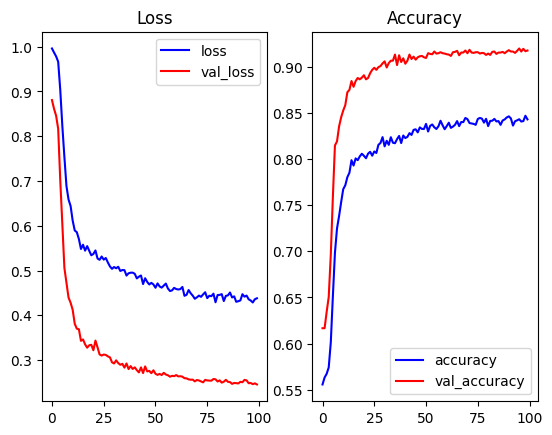

In [ ]:
model2.plot_history()

In [ ]:
model3.train(X_train, y_train, validation_data=(X_test, y_test),epochs=100, batch_size=64,print_every=170)

Training Epoch: 1/100:   9%|▉         | 16/171 [00:00<00:00, 158.92it/s]

step: 0, acc: 0.031, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/100: 100%|██████████| 171/171 [00:01<00:00, 167.43it/s]


step: 170, acc: 0.625, loss: 1.307 (data_loss: 1.307, reg_loss: 0.000), lr: 0.001
training, acc: 0.298, loss: 1.682 (data_loss: 1.682, reg_loss: 0.000), lr: 0.001
validation, acc: 0.368, loss: 1.408


Training Epoch: 2/100:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.516, loss: 1.218 (data_loss: 1.218, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/100: 100%|██████████| 171/171 [00:00<00:00, 187.00it/s]


step: 170, acc: 0.625, loss: 0.927 (data_loss: 0.927, reg_loss: 0.000), lr: 0.001
training, acc: 0.500, loss: 1.179 (data_loss: 1.179, reg_loss: 0.000), lr: 0.001
validation, acc: 0.544, loss: 1.047


Training Epoch: 3/100:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.594, loss: 0.985 (data_loss: 0.985, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/100: 100%|██████████| 171/171 [00:00<00:00, 246.82it/s]


step: 170, acc: 0.750, loss: 0.790 (data_loss: 0.790, reg_loss: 0.000), lr: 0.001
training, acc: 0.576, loss: 0.972 (data_loss: 0.972, reg_loss: 0.000), lr: 0.001
validation, acc: 0.606, loss: 0.906


Training Epoch: 4/100:  10%|▉         | 17/171 [00:00<00:00, 169.78it/s]

step: 0, acc: 0.672, loss: 0.907 (data_loss: 0.907, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/100: 100%|██████████| 171/171 [00:00<00:00, 201.03it/s]


step: 170, acc: 0.875, loss: 0.693 (data_loss: 0.693, reg_loss: 0.000), lr: 0.001
training, acc: 0.621, loss: 0.879 (data_loss: 0.879, reg_loss: 0.000), lr: 0.001
validation, acc: 0.626, loss: 0.849


Training Epoch: 5/100:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.625, loss: 0.887 (data_loss: 0.887, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/100: 100%|██████████| 171/171 [00:00<00:00, 237.35it/s]


step: 170, acc: 0.875, loss: 0.626 (data_loss: 0.626, reg_loss: 0.000), lr: 0.001
training, acc: 0.636, loss: 0.841 (data_loss: 0.841, reg_loss: 0.000), lr: 0.001
validation, acc: 0.642, loss: 0.822


Training Epoch: 6/100:  30%|███       | 52/171 [00:00<00:00, 518.90it/s]

step: 0, acc: 0.641, loss: 0.873 (data_loss: 0.873, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/100: 100%|██████████| 171/171 [00:00<00:00, 411.20it/s]


step: 170, acc: 0.875, loss: 0.569 (data_loss: 0.569, reg_loss: 0.000), lr: 0.001
training, acc: 0.653, loss: 0.815 (data_loss: 0.815, reg_loss: 0.000), lr: 0.001
validation, acc: 0.654, loss: 0.798


Training Epoch: 7/100:  20%|██        | 35/171 [00:00<00:00, 344.62it/s]

step: 0, acc: 0.656, loss: 0.856 (data_loss: 0.856, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/100: 100%|██████████| 171/171 [00:00<00:00, 350.59it/s]


step: 170, acc: 0.875, loss: 0.513 (data_loss: 0.513, reg_loss: 0.000), lr: 0.001
training, acc: 0.669, loss: 0.788 (data_loss: 0.788, reg_loss: 0.000), lr: 0.001
validation, acc: 0.675, loss: 0.768


Training Epoch: 8/100:  30%|██▉       | 51/171 [00:00<00:00, 508.53it/s]

step: 0, acc: 0.656, loss: 0.829 (data_loss: 0.829, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/100: 100%|██████████| 171/171 [00:00<00:00, 299.33it/s]


step: 170, acc: 0.875, loss: 0.449 (data_loss: 0.449, reg_loss: 0.000), lr: 0.001
training, acc: 0.691, loss: 0.748 (data_loss: 0.748, reg_loss: 0.000), lr: 0.001
validation, acc: 0.702, loss: 0.716


Training Epoch: 9/100:  12%|█▏        | 20/171 [00:00<00:00, 188.27it/s]

step: 0, acc: 0.672, loss: 0.777 (data_loss: 0.777, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/100: 100%|██████████| 171/171 [00:00<00:00, 567.00it/s]


step: 170, acc: 0.875, loss: 0.351 (data_loss: 0.351, reg_loss: 0.000), lr: 0.001
training, acc: 0.737, loss: 0.669 (data_loss: 0.669, reg_loss: 0.000), lr: 0.001
validation, acc: 0.759, loss: 0.603


Training Epoch: 10/100:  51%|█████     | 87/171 [00:00<00:00, 861.47it/s]

step: 0, acc: 0.734, loss: 0.663 (data_loss: 0.663, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/100: 100%|██████████| 171/171 [00:00<00:00, 854.12it/s]

step: 170, acc: 0.875, loss: 0.226 (data_loss: 0.226, reg_loss: 0.000), lr: 0.001
training, acc: 0.806, loss: 0.533 (data_loss: 0.533, reg_loss: 0.000), lr: 0.001


validation, acc: 0.832, loss: 0.461


Training Epoch: 11/100:  51%|█████     | 87/171 [00:00<00:00, 867.28it/s]

step: 0, acc: 0.844, loss: 0.534 (data_loss: 0.534, reg_loss: 0.000), lr: 0.001


Training Epoch: 11/100: 100%|██████████| 171/171 [00:00<00:00, 864.04it/s]


step: 170, acc: 0.875, loss: 0.164 (data_loss: 0.164, reg_loss: 0.000), lr: 0.001
training, acc: 0.854, loss: 0.423 (data_loss: 0.423, reg_loss: 0.000), lr: 0.001
validation, acc: 0.868, loss: 0.383


Training Epoch: 12/100:  48%|████▊     | 82/171 [00:00<00:00, 814.08it/s]

step: 0, acc: 0.859, loss: 0.460 (data_loss: 0.460, reg_loss: 0.000), lr: 0.001


Training Epoch: 12/100: 100%|██████████| 171/171 [00:00<00:00, 772.80it/s]


step: 170, acc: 1.000, loss: 0.134 (data_loss: 0.134, reg_loss: 0.000), lr: 0.001
training, acc: 0.872, loss: 0.370 (data_loss: 0.370, reg_loss: 0.000), lr: 0.001
validation, acc: 0.877, loss: 0.349


Training Epoch: 13/100:  50%|█████     | 86/171 [00:00<00:00, 851.21it/s]

step: 0, acc: 0.859, loss: 0.426 (data_loss: 0.426, reg_loss: 0.000), lr: 0.001


Training Epoch: 13/100: 100%|██████████| 171/171 [00:00<00:00, 812.52it/s]


step: 170, acc: 1.000, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.878, loss: 0.344 (data_loss: 0.344, reg_loss: 0.000), lr: 0.001
validation, acc: 0.882, loss: 0.332


Training Epoch: 14/100:  53%|█████▎    | 91/171 [00:00<00:00, 905.18it/s]

step: 0, acc: 0.859, loss: 0.407 (data_loss: 0.407, reg_loss: 0.000), lr: 0.001


Training Epoch: 14/100: 100%|██████████| 171/171 [00:00<00:00, 860.08it/s]

step: 170, acc: 1.000, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.881, loss: 0.330 (data_loss: 0.330, reg_loss: 0.000), lr: 0.001


validation, acc: 0.888, loss: 0.321


Training Epoch: 15/100:  48%|████▊     | 82/171 [00:00<00:00, 819.72it/s]

step: 0, acc: 0.859, loss: 0.395 (data_loss: 0.395, reg_loss: 0.000), lr: 0.001


Training Epoch: 15/100: 100%|██████████| 171/171 [00:00<00:00, 800.55it/s]


step: 170, acc: 1.000, loss: 0.109 (data_loss: 0.109, reg_loss: 0.000), lr: 0.001
training, acc: 0.883, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001
validation, acc: 0.886, loss: 0.313


Training Epoch: 16/100:  51%|█████     | 87/171 [00:00<00:00, 865.74it/s]

step: 0, acc: 0.859, loss: 0.385 (data_loss: 0.385, reg_loss: 0.000), lr: 0.001


Training Epoch: 16/100: 100%|██████████| 171/171 [00:00<00:00, 842.01it/s]

step: 170, acc: 1.000, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.886, loss: 0.312 (data_loss: 0.312, reg_loss: 0.000), lr: 0.001


validation, acc: 0.887, loss: 0.307


Training Epoch: 17/100:  40%|████      | 69/171 [00:00<00:00, 680.29it/s]

step: 0, acc: 0.859, loss: 0.377 (data_loss: 0.377, reg_loss: 0.000), lr: 0.001


Training Epoch: 17/100: 100%|██████████| 171/171 [00:00<00:00, 741.40it/s]


step: 170, acc: 1.000, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.887, loss: 0.307 (data_loss: 0.307, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.303


Training Epoch: 18/100:  53%|█████▎    | 90/171 [00:00<00:00, 894.57it/s]

step: 0, acc: 0.859, loss: 0.371 (data_loss: 0.371, reg_loss: 0.000), lr: 0.001


Training Epoch: 18/100: 100%|██████████| 171/171 [00:00<00:00, 832.52it/s]

step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001


training, acc: 0.888, loss: 0.303 (data_loss: 0.303, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.299


Training Epoch: 19/100:  50%|████▉     | 85/171 [00:00<00:00, 843.81it/s]

step: 0, acc: 0.859, loss: 0.366 (data_loss: 0.366, reg_loss: 0.000), lr: 0.001


Training Epoch: 19/100: 100%|██████████| 171/171 [00:00<00:00, 806.67it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.889, loss: 0.299 (data_loss: 0.299, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.296


Training Epoch: 20/100:  53%|█████▎    | 90/171 [00:00<00:00, 898.03it/s]

step: 0, acc: 0.859, loss: 0.361 (data_loss: 0.361, reg_loss: 0.000), lr: 0.001


Training Epoch: 20/100: 100%|██████████| 171/171 [00:00<00:00, 888.89it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.890, loss: 0.296 (data_loss: 0.296, reg_loss: 0.000), lr: 0.001
validation, acc: 0.889, loss: 0.294


Training Epoch: 21/100:  48%|████▊     | 82/171 [00:00<00:00, 809.32it/s]

step: 0, acc: 0.859, loss: 0.357 (data_loss: 0.357, reg_loss: 0.000), lr: 0.001


Training Epoch: 21/100: 100%|██████████| 171/171 [00:00<00:00, 776.95it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.891, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001
validation, acc: 0.891, loss: 0.291


Training Epoch: 22/100:  52%|█████▏    | 89/171 [00:00<00:00, 885.66it/s]

step: 0, acc: 0.859, loss: 0.354 (data_loss: 0.354, reg_loss: 0.000), lr: 0.001


Training Epoch: 22/100: 100%|██████████| 171/171 [00:00<00:00, 872.38it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.892, loss: 0.291 (data_loss: 0.291, reg_loss: 0.000), lr: 0.001
validation, acc: 0.890, loss: 0.289


Training Epoch: 23/100:  49%|████▊     | 83/171 [00:00<00:00, 824.93it/s]

step: 0, acc: 0.859, loss: 0.351 (data_loss: 0.351, reg_loss: 0.000), lr: 0.001


Training Epoch: 23/100: 100%|██████████| 171/171 [00:00<00:00, 810.51it/s]


step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.893, loss: 0.289 (data_loss: 0.289, reg_loss: 0.000), lr: 0.001
validation, acc: 0.891, loss: 0.287


Training Epoch: 24/100:  53%|█████▎    | 90/171 [00:00<00:00, 894.85it/s]

step: 0, acc: 0.859, loss: 0.348 (data_loss: 0.348, reg_loss: 0.000), lr: 0.001


Training Epoch: 24/100: 100%|██████████| 171/171 [00:00<00:00, 856.90it/s]

step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.893, loss: 0.287 (data_loss: 0.287, reg_loss: 0.000), lr: 0.001


validation, acc: 0.891, loss: 0.286


Training Epoch: 25/100:  51%|█████     | 87/171 [00:00<00:00, 867.97it/s]

step: 0, acc: 0.859, loss: 0.344 (data_loss: 0.344, reg_loss: 0.000), lr: 0.001


Training Epoch: 25/100: 100%|██████████| 171/171 [00:00<00:00, 789.17it/s]


step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.895, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001
validation, acc: 0.892, loss: 0.284


Training Epoch: 26/100:  52%|█████▏    | 89/171 [00:00<00:00, 888.44it/s]

step: 0, acc: 0.859, loss: 0.342 (data_loss: 0.342, reg_loss: 0.000), lr: 0.001


Training Epoch: 26/100: 100%|██████████| 171/171 [00:00<00:00, 866.82it/s]


step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.895, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.001
validation, acc: 0.892, loss: 0.282


Training Epoch: 27/100:  51%|█████▏    | 88/171 [00:00<00:00, 871.35it/s]

step: 0, acc: 0.859, loss: 0.338 (data_loss: 0.338, reg_loss: 0.000), lr: 0.001


Training Epoch: 27/100: 100%|██████████| 171/171 [00:00<00:00, 858.70it/s]

step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.896, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001


validation, acc: 0.893, loss: 0.280


Training Epoch: 28/100:  46%|████▌     | 79/171 [00:00<00:00, 784.18it/s]

step: 0, acc: 0.859, loss: 0.336 (data_loss: 0.336, reg_loss: 0.000), lr: 0.001


Training Epoch: 28/100: 100%|██████████| 171/171 [00:00<00:00, 799.82it/s]


step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.896, loss: 0.280 (data_loss: 0.280, reg_loss: 0.000), lr: 0.001
validation, acc: 0.894, loss: 0.279


Training Epoch: 29/100:  50%|█████     | 86/171 [00:00<00:00, 852.52it/s]

step: 0, acc: 0.859, loss: 0.333 (data_loss: 0.333, reg_loss: 0.000), lr: 0.001


Training Epoch: 29/100: 100%|██████████| 171/171 [00:00<00:00, 852.42it/s]

step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001


training, acc: 0.897, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001
validation, acc: 0.894, loss: 0.277


Training Epoch: 30/100:  43%|████▎     | 74/171 [00:00<00:00, 732.50it/s]

step: 0, acc: 0.859, loss: 0.331 (data_loss: 0.331, reg_loss: 0.000), lr: 0.001


Training Epoch: 30/100: 100%|██████████| 171/171 [00:00<00:00, 754.32it/s]


step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.898, loss: 0.277 (data_loss: 0.277, reg_loss: 0.000), lr: 0.001
validation, acc: 0.894, loss: 0.276


Training Epoch: 31/100:  53%|█████▎    | 90/171 [00:00<00:00, 891.66it/s]

step: 0, acc: 0.859, loss: 0.328 (data_loss: 0.328, reg_loss: 0.000), lr: 0.001


Training Epoch: 31/100: 100%|██████████| 171/171 [00:00<00:00, 855.69it/s]

step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.898, loss: 0.276 (data_loss: 0.276, reg_loss: 0.000), lr: 0.001


validation, acc: 0.895, loss: 0.274


Training Epoch: 32/100:  50%|████▉     | 85/171 [00:00<00:00, 842.76it/s]

step: 0, acc: 0.859, loss: 0.326 (data_loss: 0.326, reg_loss: 0.000), lr: 0.001


Training Epoch: 32/100: 100%|██████████| 171/171 [00:00<00:00, 835.81it/s]

step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.899, loss: 0.275 (data_loss: 0.275, reg_loss: 0.000), lr: 0.001


validation, acc: 0.895, loss: 0.273


Training Epoch: 33/100:  51%|█████     | 87/171 [00:00<00:00, 863.92it/s]

step: 0, acc: 0.875, loss: 0.323 (data_loss: 0.323, reg_loss: 0.000), lr: 0.001


Training Epoch: 33/100: 100%|██████████| 171/171 [00:00<00:00, 810.15it/s]


step: 170, acc: 0.875, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.899, loss: 0.273 (data_loss: 0.273, reg_loss: 0.000), lr: 0.001
validation, acc: 0.895, loss: 0.271


Training Epoch: 34/100:  41%|████      | 70/171 [00:00<00:00, 694.45it/s]

step: 0, acc: 0.875, loss: 0.321 (data_loss: 0.321, reg_loss: 0.000), lr: 0.001


Training Epoch: 34/100: 100%|██████████| 171/171 [00:00<00:00, 737.69it/s]


step: 170, acc: 0.875, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.899, loss: 0.272 (data_loss: 0.272, reg_loss: 0.000), lr: 0.001
validation, acc: 0.896, loss: 0.270


Training Epoch: 35/100:  51%|█████▏    | 88/171 [00:00<00:00, 872.50it/s]

step: 0, acc: 0.875, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.875, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001

Training Epoch: 35/100: 100%|██████████| 171/171 [00:00<00:00, 831.64it/s]



training, acc: 0.900, loss: 0.271 (data_loss: 0.271, reg_loss: 0.000), lr: 0.001
validation, acc: 0.896, loss: 0.269


Training Epoch: 36/100:  51%|█████▏    | 88/171 [00:00<00:00, 875.34it/s]

step: 0, acc: 0.875, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.001


Training Epoch: 36/100: 100%|██████████| 171/171 [00:00<00:00, 857.94it/s]

step: 170, acc: 0.875, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001


training, acc: 0.900, loss: 0.270 (data_loss: 0.270, reg_loss: 0.000), lr: 0.001
validation, acc: 0.897, loss: 0.267


Training Epoch: 37/100:  50%|████▉     | 85/171 [00:00<00:00, 845.36it/s]

step: 0, acc: 0.875, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001


Training Epoch: 37/100: 100%|██████████| 171/171 [00:00<00:00, 792.22it/s]


step: 170, acc: 0.875, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.901, loss: 0.269 (data_loss: 0.269, reg_loss: 0.000), lr: 0.001
validation, acc: 0.896, loss: 0.266


Training Epoch: 38/100:  51%|█████     | 87/171 [00:00<00:00, 861.66it/s]

step: 0, acc: 0.875, loss: 0.313 (data_loss: 0.313, reg_loss: 0.000), lr: 0.001


Training Epoch: 38/100: 100%|██████████| 171/171 [00:00<00:00, 794.35it/s]


step: 170, acc: 0.875, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.901, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.265


Training Epoch: 39/100:  49%|████▊     | 83/171 [00:00<00:00, 827.09it/s]

step: 0, acc: 0.875, loss: 0.312 (data_loss: 0.312, reg_loss: 0.000), lr: 0.001


Training Epoch: 39/100: 100%|██████████| 171/171 [00:00<00:00, 780.90it/s]


step: 170, acc: 0.875, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.902, loss: 0.266 (data_loss: 0.266, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.264


Training Epoch: 40/100:  44%|████▍     | 76/171 [00:00<00:00, 758.99it/s]

step: 0, acc: 0.875, loss: 0.310 (data_loss: 0.310, reg_loss: 0.000), lr: 0.001


Training Epoch: 40/100: 100%|██████████| 171/171 [00:00<00:00, 733.22it/s]


step: 170, acc: 0.875, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.903, loss: 0.265 (data_loss: 0.265, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.262


Training Epoch: 41/100:  43%|████▎     | 73/171 [00:00<00:00, 724.53it/s]

step: 0, acc: 0.875, loss: 0.308 (data_loss: 0.308, reg_loss: 0.000), lr: 0.001


Training Epoch: 41/100: 100%|██████████| 171/171 [00:00<00:00, 729.35it/s]


step: 170, acc: 0.875, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.903, loss: 0.264 (data_loss: 0.264, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.261


Training Epoch: 42/100:  40%|████      | 69/171 [00:00<00:00, 682.08it/s]

step: 0, acc: 0.875, loss: 0.307 (data_loss: 0.307, reg_loss: 0.000), lr: 0.001


Training Epoch: 42/100: 100%|██████████| 171/171 [00:00<00:00, 533.71it/s]


step: 170, acc: 0.875, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.903, loss: 0.263 (data_loss: 0.263, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.260


Training Epoch: 43/100:  33%|███▎      | 56/171 [00:00<00:00, 549.82it/s]

step: 0, acc: 0.875, loss: 0.306 (data_loss: 0.306, reg_loss: 0.000), lr: 0.001


Training Epoch: 43/100: 100%|██████████| 171/171 [00:00<00:00, 527.08it/s]


step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.262 (data_loss: 0.262, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.259


Training Epoch: 44/100:  32%|███▏      | 54/171 [00:00<00:00, 537.63it/s]

step: 0, acc: 0.875, loss: 0.305 (data_loss: 0.305, reg_loss: 0.000), lr: 0.001


Training Epoch: 44/100: 100%|██████████| 171/171 [00:00<00:00, 530.71it/s]


step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.261 (data_loss: 0.261, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.258


Training Epoch: 45/100:  29%|██▉       | 50/171 [00:00<00:00, 492.94it/s]

step: 0, acc: 0.859, loss: 0.304 (data_loss: 0.304, reg_loss: 0.000), lr: 0.001


Training Epoch: 45/100: 100%|██████████| 171/171 [00:00<00:00, 486.33it/s]


step: 170, acc: 0.875, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.905, loss: 0.260 (data_loss: 0.260, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.257


Training Epoch: 46/100:  33%|███▎      | 56/171 [00:00<00:00, 551.90it/s]

step: 0, acc: 0.859, loss: 0.303 (data_loss: 0.303, reg_loss: 0.000), lr: 0.001


Training Epoch: 46/100: 100%|██████████| 171/171 [00:00<00:00, 522.65it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.905, loss: 0.259 (data_loss: 0.259, reg_loss: 0.000), lr: 0.001
validation, acc: 0.901, loss: 0.256


Training Epoch: 47/100:  29%|██▉       | 50/171 [00:00<00:00, 490.79it/s]

step: 0, acc: 0.859, loss: 0.302 (data_loss: 0.302, reg_loss: 0.000), lr: 0.001


Training Epoch: 47/100: 100%|██████████| 171/171 [00:00<00:00, 500.59it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.258 (data_loss: 0.258, reg_loss: 0.000), lr: 0.001
validation, acc: 0.901, loss: 0.254


Training Epoch: 48/100:  26%|██▌       | 44/171 [00:00<00:00, 433.07it/s]

step: 0, acc: 0.859, loss: 0.301 (data_loss: 0.301, reg_loss: 0.000), lr: 0.001


Training Epoch: 48/100: 100%|██████████| 171/171 [00:00<00:00, 486.87it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.258 (data_loss: 0.258, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.253


Training Epoch: 49/100:  30%|███       | 52/171 [00:00<00:00, 510.95it/s]

step: 0, acc: 0.859, loss: 0.300 (data_loss: 0.300, reg_loss: 0.000), lr: 0.001


Training Epoch: 49/100: 100%|██████████| 171/171 [00:00<00:00, 497.49it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.257 (data_loss: 0.257, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.252


Training Epoch: 50/100:  30%|██▉       | 51/171 [00:00<00:00, 505.11it/s]

step: 0, acc: 0.859, loss: 0.300 (data_loss: 0.300, reg_loss: 0.000), lr: 0.001


Training Epoch: 50/100: 100%|██████████| 171/171 [00:00<00:00, 497.51it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.256 (data_loss: 0.256, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.251


Training Epoch: 51/100:  30%|███       | 52/171 [00:00<00:00, 516.45it/s]

step: 0, acc: 0.859, loss: 0.299 (data_loss: 0.299, reg_loss: 0.000), lr: 0.001


Training Epoch: 51/100: 100%|██████████| 171/171 [00:00<00:00, 485.30it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.255 (data_loss: 0.255, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.250


Training Epoch: 52/100:  26%|██▌       | 44/171 [00:00<00:00, 435.21it/s]

step: 0, acc: 0.875, loss: 0.298 (data_loss: 0.298, reg_loss: 0.000), lr: 0.001


Training Epoch: 52/100: 100%|██████████| 171/171 [00:00<00:00, 469.90it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.254 (data_loss: 0.254, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.249


Training Epoch: 53/100:  27%|██▋       | 47/171 [00:00<00:00, 460.21it/s]

step: 0, acc: 0.891, loss: 0.297 (data_loss: 0.297, reg_loss: 0.000), lr: 0.001


Training Epoch: 53/100: 100%|██████████| 171/171 [00:00<00:00, 477.04it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.253 (data_loss: 0.253, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.248


Training Epoch: 54/100:  25%|██▌       | 43/171 [00:00<00:00, 421.84it/s]

step: 0, acc: 0.891, loss: 0.297 (data_loss: 0.297, reg_loss: 0.000), lr: 0.001


Training Epoch: 54/100: 100%|██████████| 171/171 [00:00<00:00, 482.16it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.252 (data_loss: 0.252, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.247


Training Epoch: 55/100:  30%|██▉       | 51/171 [00:00<00:00, 509.18it/s]

step: 0, acc: 0.891, loss: 0.296 (data_loss: 0.296, reg_loss: 0.000), lr: 0.001


Training Epoch: 55/100: 100%|██████████| 171/171 [00:00<00:00, 492.38it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.910, loss: 0.251 (data_loss: 0.251, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.246


Training Epoch: 56/100:  47%|████▋     | 81/171 [00:00<00:00, 808.33it/s]

step: 0, acc: 0.891, loss: 0.295 (data_loss: 0.295, reg_loss: 0.000), lr: 0.001


Training Epoch: 56/100: 100%|██████████| 171/171 [00:00<00:00, 713.27it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.910, loss: 0.250 (data_loss: 0.250, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.245


Training Epoch: 57/100:  43%|████▎     | 74/171 [00:00<00:00, 731.17it/s]

step: 0, acc: 0.891, loss: 0.295 (data_loss: 0.295, reg_loss: 0.000), lr: 0.001


Training Epoch: 57/100: 100%|██████████| 171/171 [00:00<00:00, 705.59it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.910, loss: 0.250 (data_loss: 0.250, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.244


Training Epoch: 58/100:  43%|████▎     | 73/171 [00:00<00:00, 728.87it/s]

step: 0, acc: 0.891, loss: 0.294 (data_loss: 0.294, reg_loss: 0.000), lr: 0.001


Training Epoch: 58/100: 100%|██████████| 171/171 [00:00<00:00, 729.09it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.249 (data_loss: 0.249, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.243


Training Epoch: 59/100:  43%|████▎     | 73/171 [00:00<00:00, 723.81it/s]

step: 0, acc: 0.891, loss: 0.294 (data_loss: 0.294, reg_loss: 0.000), lr: 0.001


Training Epoch: 59/100: 100%|██████████| 171/171 [00:00<00:00, 704.72it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.248 (data_loss: 0.248, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.242


Training Epoch: 60/100:  39%|███▉      | 67/171 [00:00<00:00, 669.16it/s]

step: 0, acc: 0.891, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 60/100: 100%|██████████| 171/171 [00:00<00:00, 674.61it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.247 (data_loss: 0.247, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.241


Training Epoch: 61/100:  42%|████▏     | 72/171 [00:00<00:00, 715.38it/s]

step: 0, acc: 0.891, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 61/100: 100%|██████████| 171/171 [00:00<00:00, 719.48it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.912, loss: 0.246 (data_loss: 0.246, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.240


Training Epoch: 62/100:  44%|████▍     | 75/171 [00:00<00:00, 745.68it/s]

step: 0, acc: 0.891, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 62/100: 100%|██████████| 171/171 [00:00<00:00, 730.62it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.912, loss: 0.245 (data_loss: 0.245, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.239


Training Epoch: 63/100:  45%|████▌     | 77/171 [00:00<00:00, 769.77it/s]

step: 0, acc: 0.891, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 63/100: 100%|██████████| 171/171 [00:00<00:00, 748.73it/s]


step: 170, acc: 0.875, loss: 0.104 (data_loss: 0.104, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.244 (data_loss: 0.244, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.238


Training Epoch: 64/100:  39%|███▊      | 66/171 [00:00<00:00, 655.92it/s]

step: 0, acc: 0.891, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 64/100: 100%|██████████| 171/171 [00:00<00:00, 702.38it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.243 (data_loss: 0.243, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.237


Training Epoch: 65/100:  46%|████▌     | 79/171 [00:00<00:00, 788.68it/s]

step: 0, acc: 0.891, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 65/100: 100%|██████████| 171/171 [00:00<00:00, 731.57it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.243 (data_loss: 0.243, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.236


Training Epoch: 66/100:  42%|████▏     | 72/171 [00:00<00:00, 716.46it/s]

step: 0, acc: 0.875, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 66/100: 100%|██████████| 171/171 [00:00<00:00, 729.33it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.242 (data_loss: 0.242, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.235


Training Epoch: 67/100:  44%|████▍     | 76/171 [00:00<00:00, 756.05it/s]

step: 0, acc: 0.875, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 67/100: 100%|██████████| 171/171 [00:00<00:00, 732.90it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.241 (data_loss: 0.241, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.234


Training Epoch: 68/100:  44%|████▍     | 75/171 [00:00<00:00, 745.34it/s]

step: 0, acc: 0.875, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 68/100: 100%|██████████| 171/171 [00:00<00:00, 736.19it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.240 (data_loss: 0.240, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.233


Training Epoch: 69/100:  40%|████      | 69/171 [00:00<00:00, 685.63it/s]

step: 0, acc: 0.875, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 69/100: 100%|██████████| 171/171 [00:00<00:00, 713.42it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.240 (data_loss: 0.240, reg_loss: 0.000), lr: 0.001
validation, acc: 0.912, loss: 0.232


Training Epoch: 70/100:  47%|████▋     | 80/171 [00:00<00:00, 797.52it/s]

step: 0, acc: 0.875, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 70/100: 100%|██████████| 171/171 [00:00<00:00, 733.36it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.231


Training Epoch: 71/100:  44%|████▍     | 76/171 [00:00<00:00, 754.29it/s]

step: 0, acc: 0.875, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 71/100: 100%|██████████| 171/171 [00:00<00:00, 743.31it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.238 (data_loss: 0.238, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.231


Training Epoch: 72/100:  44%|████▍     | 76/171 [00:00<00:00, 751.71it/s]

step: 0, acc: 0.875, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001


Training Epoch: 72/100: 100%|██████████| 171/171 [00:00<00:00, 705.83it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.237 (data_loss: 0.237, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.230


Training Epoch: 73/100:  40%|████      | 69/171 [00:00<00:00, 689.56it/s]

step: 0, acc: 0.875, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001


Training Epoch: 73/100: 100%|██████████| 171/171 [00:00<00:00, 698.46it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.237 (data_loss: 0.237, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.229


Training Epoch: 74/100:  44%|████▍     | 75/171 [00:00<00:00, 748.54it/s]

step: 0, acc: 0.875, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001


Training Epoch: 74/100: 100%|██████████| 171/171 [00:00<00:00, 746.65it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.228


Training Epoch: 75/100:  44%|████▍     | 76/171 [00:00<00:00, 752.76it/s]

step: 0, acc: 0.875, loss: 0.291 (data_loss: 0.291, reg_loss: 0.000), lr: 0.001


Training Epoch: 75/100: 100%|██████████| 171/171 [00:00<00:00, 708.49it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.228


Training Epoch: 76/100:  44%|████▍     | 75/171 [00:00<00:00, 742.33it/s]

step: 0, acc: 0.891, loss: 0.291 (data_loss: 0.291, reg_loss: 0.000), lr: 0.001


Training Epoch: 76/100: 100%|██████████| 171/171 [00:00<00:00, 729.56it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.227


Training Epoch: 77/100:  44%|████▍     | 76/171 [00:00<00:00, 759.89it/s]

step: 0, acc: 0.891, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001


Training Epoch: 77/100: 100%|██████████| 171/171 [00:00<00:00, 722.89it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.226


Training Epoch: 78/100:  44%|████▍     | 75/171 [00:00<00:00, 744.39it/s]

step: 0, acc: 0.891, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001


Training Epoch: 78/100: 100%|██████████| 171/171 [00:00<00:00, 733.68it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.226


Training Epoch: 79/100:  44%|████▍     | 76/171 [00:00<00:00, 758.23it/s]

step: 0, acc: 0.891, loss: 0.289 (data_loss: 0.289, reg_loss: 0.000), lr: 0.001


Training Epoch: 79/100: 100%|██████████| 171/171 [00:00<00:00, 692.80it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.225


Training Epoch: 80/100:  43%|████▎     | 73/171 [00:00<00:00, 725.20it/s]

step: 0, acc: 0.891, loss: 0.288 (data_loss: 0.288, reg_loss: 0.000), lr: 0.001


Training Epoch: 80/100: 100%|██████████| 171/171 [00:00<00:00, 728.64it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.225


Training Epoch: 81/100:  44%|████▍     | 75/171 [00:00<00:00, 742.84it/s]

step: 0, acc: 0.891, loss: 0.288 (data_loss: 0.288, reg_loss: 0.000), lr: 0.001


Training Epoch: 81/100: 100%|██████████| 171/171 [00:00<00:00, 699.48it/s]


step: 170, acc: 0.875, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.224


Training Epoch: 82/100:  42%|████▏     | 72/171 [00:00<00:00, 716.31it/s]

step: 0, acc: 0.891, loss: 0.288 (data_loss: 0.288, reg_loss: 0.000), lr: 0.001


Training Epoch: 82/100: 100%|██████████| 171/171 [00:00<00:00, 717.26it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.224


Training Epoch: 83/100:  46%|████▌     | 79/171 [00:00<00:00, 781.21it/s]

step: 0, acc: 0.891, loss: 0.287 (data_loss: 0.287, reg_loss: 0.000), lr: 0.001


Training Epoch: 83/100: 100%|██████████| 171/171 [00:00<00:00, 706.91it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.223


Training Epoch: 84/100:  44%|████▍     | 75/171 [00:00<00:00, 746.48it/s]

step: 0, acc: 0.891, loss: 0.287 (data_loss: 0.287, reg_loss: 0.000), lr: 0.001


Training Epoch: 84/100: 100%|██████████| 171/171 [00:00<00:00, 695.50it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.223


Training Epoch: 85/100:  42%|████▏     | 72/171 [00:00<00:00, 715.91it/s]

step: 0, acc: 0.891, loss: 0.286 (data_loss: 0.286, reg_loss: 0.000), lr: 0.001


Training Epoch: 85/100: 100%|██████████| 171/171 [00:00<00:00, 691.42it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.222


Training Epoch: 86/100:  46%|████▌     | 78/171 [00:00<00:00, 775.01it/s]

step: 0, acc: 0.891, loss: 0.286 (data_loss: 0.286, reg_loss: 0.000), lr: 0.001


Training Epoch: 86/100: 100%|██████████| 171/171 [00:00<00:00, 726.52it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.222


Training Epoch: 87/100:  34%|███▍      | 58/171 [00:00<00:00, 578.34it/s]

step: 0, acc: 0.891, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001


Training Epoch: 87/100: 100%|██████████| 171/171 [00:00<00:00, 663.88it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.222


Training Epoch: 88/100:  43%|████▎     | 73/171 [00:00<00:00, 726.37it/s]

step: 0, acc: 0.891, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001


Training Epoch: 88/100: 100%|██████████| 171/171 [00:00<00:00, 738.40it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.222


Training Epoch: 89/100:  41%|████      | 70/171 [00:00<00:00, 695.99it/s]

step: 0, acc: 0.891, loss: 0.284 (data_loss: 0.284, reg_loss: 0.000), lr: 0.001


Training Epoch: 89/100: 100%|██████████| 171/171 [00:00<00:00, 714.57it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.221


Training Epoch: 90/100:  44%|████▍     | 76/171 [00:00<00:00, 758.75it/s]

step: 0, acc: 0.891, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.001


Training Epoch: 90/100: 100%|██████████| 171/171 [00:00<00:00, 720.74it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.221


Training Epoch: 91/100:  41%|████      | 70/171 [00:00<00:00, 695.15it/s]

step: 0, acc: 0.906, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001


Training Epoch: 91/100: 100%|██████████| 171/171 [00:00<00:00, 718.08it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.221


Training Epoch: 92/100:  43%|████▎     | 73/171 [00:00<00:00, 724.65it/s]

step: 0, acc: 0.906, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001


Training Epoch: 92/100: 100%|██████████| 171/171 [00:00<00:00, 713.65it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.221


Training Epoch: 93/100:  29%|██▊       | 49/171 [00:00<00:00, 480.46it/s]

step: 0, acc: 0.906, loss: 0.281 (data_loss: 0.281, reg_loss: 0.000), lr: 0.001


Training Epoch: 93/100: 100%|██████████| 171/171 [00:00<00:00, 482.72it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.220


Training Epoch: 94/100:  25%|██▌       | 43/171 [00:00<00:00, 423.58it/s]

step: 0, acc: 0.906, loss: 0.281 (data_loss: 0.281, reg_loss: 0.000), lr: 0.001


Training Epoch: 94/100: 100%|██████████| 171/171 [00:00<00:00, 451.80it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.220


Training Epoch: 95/100:  31%|███       | 53/171 [00:00<00:00, 525.73it/s]

step: 0, acc: 0.906, loss: 0.280 (data_loss: 0.280, reg_loss: 0.000), lr: 0.001


Training Epoch: 95/100: 100%|██████████| 171/171 [00:00<00:00, 492.21it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.220


Training Epoch: 96/100:  32%|███▏      | 55/171 [00:00<00:00, 542.25it/s]

step: 0, acc: 0.906, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001


Training Epoch: 96/100: 100%|██████████| 171/171 [00:00<00:00, 484.29it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.220


Training Epoch: 97/100:  25%|██▌       | 43/171 [00:00<00:00, 424.75it/s]

step: 0, acc: 0.906, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001


Training Epoch: 97/100: 100%|██████████| 171/171 [00:00<00:00, 437.72it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.220


Training Epoch: 98/100:  30%|██▉       | 51/171 [00:00<00:00, 506.50it/s]

step: 0, acc: 0.906, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001


Training Epoch: 98/100: 100%|██████████| 171/171 [00:00<00:00, 457.90it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.228 (data_loss: 0.228, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.219


Training Epoch: 99/100:  27%|██▋       | 47/171 [00:00<00:00, 462.25it/s]

step: 0, acc: 0.906, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001


Training Epoch: 99/100: 100%|██████████| 171/171 [00:00<00:00, 457.18it/s]


step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.228 (data_loss: 0.228, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.219


Training Epoch: 100/100:  29%|██▊       | 49/171 [00:00<00:00, 482.84it/s]

step: 0, acc: 0.906, loss: 0.277 (data_loss: 0.277, reg_loss: 0.000), lr: 0.001


Training Epoch: 100/100: 100%|██████████| 171/171 [00:00<00:00, 473.04it/s]

step: 170, acc: 0.875, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.228 (data_loss: 0.228, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.219


In [ ]:
model3.save('drive/MyDrive/Dataset')

IsADirectoryError: ignored

In [ ]:
model3.predict(X_test)

array([[5.91109500e-05, 2.32995582e-25, 1.15757050e-04, ...,
        7.46759042e-09, 9.95504383e-01, 2.72704117e-03],
       [9.94549800e-01, 5.83011736e-08, 5.24878642e-03, ...,
        1.07899950e-04, 2.83324689e-05, 6.51209370e-05],
       [2.27547877e-05, 7.60913588e-28, 8.60331561e-05, ...,
        1.47034846e-07, 9.39533981e-01, 8.32716988e-03],
       ...,
       [3.65072194e-10, 5.34401998e-40, 3.92133607e-08, ...,
        1.34872328e-05, 2.15066908e-05, 5.39065886e-04],
       [6.56931917e-02, 8.36760165e-12, 9.31949297e-01, ...,
        2.12418908e-03, 1.92548706e-05, 2.14062975e-04],
       [4.33345321e-05, 1.56353941e-29, 9.77921715e-05, ...,
        2.28010747e-03, 1.20634886e-03, 4.99064205e-01]])

In [ ]:
model3.train(X_train, y_train, validation_data=(X_test, y_test),
            epochs=100, batch_size=64, print_every=170)

Training Epoch: 1/100: 100%|██████████| 171/171 [00:00<00:00, 933.38it/s]


step: 0, acc: 0.016, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.625, loss: 1.142 (data_loss: 1.142, reg_loss: 0.000), lr: 0.001
training, acc: 0.304, loss: 1.672 (data_loss: 1.672, reg_loss: 0.000), lr: 0.001
validation, acc: 0.392, loss: 1.297


Training Epoch: 2/100: 100%|██████████| 171/171 [00:00<00:00, 920.75it/s]


step: 0, acc: 0.547, loss: 1.165 (data_loss: 1.165, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.750, loss: 0.837 (data_loss: 0.837, reg_loss: 0.000), lr: 0.001
training, acc: 0.536, loss: 1.079 (data_loss: 1.079, reg_loss: 0.000), lr: 0.001
validation, acc: 0.561, loss: 0.952


Training Epoch: 3/100: 100%|██████████| 171/171 [00:00<00:00, 970.92it/s] 

step: 0, acc: 0.594, loss: 0.945 (data_loss: 0.945, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.875, loss: 0.698 (data_loss: 0.698, reg_loss: 0.000), lr: 0.001
training, acc: 0.622, loss: 0.893 (data_loss: 0.893, reg_loss: 0.000), lr: 0.001


validation, acc: 0.632, loss: 0.850


Training Epoch: 4/100:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.641, loss: 0.895 (data_loss: 0.895, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/100: 100%|██████████| 171/171 [00:00<00:00, 883.99it/s]

step: 170, acc: 0.875, loss: 0.592 (data_loss: 0.592, reg_loss: 0.000), lr: 0.001
training, acc: 0.649, loss: 0.833 (data_loss: 0.833, reg_loss: 0.000), lr: 0.001


validation, acc: 0.653, loss: 0.808


Training Epoch: 5/100:  56%|█████▌    | 95/171 [00:00<00:00, 944.01it/s]

step: 0, acc: 0.656, loss: 0.869 (data_loss: 0.869, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/100: 100%|██████████| 171/171 [00:00<00:00, 924.80it/s]

step: 170, acc: 0.875, loss: 0.490 (data_loss: 0.490, reg_loss: 0.000), lr: 0.001
training, acc: 0.678, loss: 0.788 (data_loss: 0.788, reg_loss: 0.000), lr: 0.001


validation, acc: 0.683, loss: 0.756


Training Epoch: 6/100:  56%|█████▌    | 95/171 [00:00<00:00, 945.29it/s]

step: 0, acc: 0.656, loss: 0.825 (data_loss: 0.825, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/100: 100%|██████████| 171/171 [00:00<00:00, 922.60it/s]

step: 170, acc: 0.875, loss: 0.351 (data_loss: 0.351, reg_loss: 0.000), lr: 0.001
training, acc: 0.730, loss: 0.704 (data_loss: 0.704, reg_loss: 0.000), lr: 0.001


validation, acc: 0.759, loss: 0.622


Training Epoch: 7/100:  58%|█████▊    | 99/171 [00:00<00:00, 981.64it/s]

step: 0, acc: 0.734, loss: 0.698 (data_loss: 0.698, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/100: 100%|██████████| 171/171 [00:00<00:00, 947.28it/s]

step: 170, acc: 0.875, loss: 0.216 (data_loss: 0.216, reg_loss: 0.000), lr: 0.001
training, acc: 0.817, loss: 0.528 (data_loss: 0.528, reg_loss: 0.000), lr: 0.001


validation, acc: 0.849, loss: 0.437


Training Epoch: 8/100:  54%|█████▍    | 93/171 [00:00<00:00, 923.01it/s]

step: 0, acc: 0.875, loss: 0.519 (data_loss: 0.519, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/100: 100%|██████████| 171/171 [00:00<00:00, 923.20it/s]

step: 170, acc: 0.875, loss: 0.154 (data_loss: 0.154, reg_loss: 0.000), lr: 0.001
training, acc: 0.865, loss: 0.402 (data_loss: 0.402, reg_loss: 0.000), lr: 0.001


validation, acc: 0.875, loss: 0.363


Training Epoch: 9/100:  50%|█████     | 86/171 [00:00<00:00, 857.39it/s]

step: 0, acc: 0.859, loss: 0.443 (data_loss: 0.443, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/100: 100%|██████████| 171/171 [00:00<00:00, 867.02it/s]

step: 170, acc: 1.000, loss: 0.130 (data_loss: 0.130, reg_loss: 0.000), lr: 0.001
training, acc: 0.877, loss: 0.353 (data_loss: 0.353, reg_loss: 0.000), lr: 0.001


validation, acc: 0.882, loss: 0.334


Training Epoch: 10/100:  57%|█████▋    | 98/171 [00:00<00:00, 972.62it/s]

step: 0, acc: 0.844, loss: 0.408 (data_loss: 0.408, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/100: 100%|██████████| 171/171 [00:00<00:00, 962.66it/s]

step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.881, loss: 0.332 (data_loss: 0.332, reg_loss: 0.000), lr: 0.001


validation, acc: 0.884, loss: 0.320


Training Epoch: 11/100:  56%|█████▌    | 95/171 [00:00<00:00, 946.98it/s]

step: 0, acc: 0.844, loss: 0.388 (data_loss: 0.388, reg_loss: 0.000), lr: 0.001


Training Epoch: 11/100: 100%|██████████| 171/171 [00:00<00:00, 895.63it/s]

step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.884, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001


validation, acc: 0.887, loss: 0.312


Training Epoch: 12/100:  55%|█████▍    | 94/171 [00:00<00:00, 935.07it/s]

step: 0, acc: 0.844, loss: 0.376 (data_loss: 0.376, reg_loss: 0.000), lr: 0.001


Training Epoch: 12/100: 100%|██████████| 171/171 [00:00<00:00, 907.09it/s]

step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.886, loss: 0.312 (data_loss: 0.312, reg_loss: 0.000), lr: 0.001


validation, acc: 0.888, loss: 0.306


Training Epoch: 13/100:  56%|█████▌    | 96/171 [00:00<00:00, 952.28it/s]

step: 0, acc: 0.828, loss: 0.367 (data_loss: 0.367, reg_loss: 0.000), lr: 0.001


Training Epoch: 13/100: 100%|██████████| 171/171 [00:00<00:00, 862.72it/s]

step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.887, loss: 0.307 (data_loss: 0.307, reg_loss: 0.000), lr: 0.001


validation, acc: 0.888, loss: 0.302


Training Epoch: 14/100:  53%|█████▎    | 90/171 [00:00<00:00, 896.44it/s]

step: 0, acc: 0.844, loss: 0.359 (data_loss: 0.359, reg_loss: 0.000), lr: 0.001


Training Epoch: 14/100: 100%|██████████| 171/171 [00:00<00:00, 899.55it/s]

step: 170, acc: 0.875, loss: 0.111 (data_loss: 0.111, reg_loss: 0.000), lr: 0.001
training, acc: 0.888, loss: 0.302 (data_loss: 0.302, reg_loss: 0.000), lr: 0.001


validation, acc: 0.888, loss: 0.298


Training Epoch: 15/100:  56%|█████▌    | 96/171 [00:00<00:00, 958.23it/s]

step: 0, acc: 0.844, loss: 0.354 (data_loss: 0.354, reg_loss: 0.000), lr: 0.001


Training Epoch: 15/100: 100%|██████████| 171/171 [00:00<00:00, 947.79it/s]

step: 170, acc: 0.875, loss: 0.111 (data_loss: 0.111, reg_loss: 0.000), lr: 0.001
training, acc: 0.890, loss: 0.299 (data_loss: 0.299, reg_loss: 0.000), lr: 0.001


validation, acc: 0.889, loss: 0.295


Training Epoch: 16/100:  54%|█████▍    | 92/171 [00:00<00:00, 917.59it/s]

step: 0, acc: 0.844, loss: 0.349 (data_loss: 0.349, reg_loss: 0.000), lr: 0.001


Training Epoch: 16/100: 100%|██████████| 171/171 [00:00<00:00, 908.31it/s]

step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.891, loss: 0.296 (data_loss: 0.296, reg_loss: 0.000), lr: 0.001


validation, acc: 0.891, loss: 0.293


Training Epoch: 17/100:  56%|█████▌    | 95/171 [00:00<00:00, 944.03it/s]

step: 0, acc: 0.844, loss: 0.344 (data_loss: 0.344, reg_loss: 0.000), lr: 0.001


Training Epoch: 17/100: 100%|██████████| 171/171 [00:00<00:00, 935.54it/s]

step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.891, loss: 0.294 (data_loss: 0.294, reg_loss: 0.000), lr: 0.001


validation, acc: 0.892, loss: 0.291


Training Epoch: 18/100:  50%|█████     | 86/171 [00:00<00:00, 856.68it/s]

step: 0, acc: 0.859, loss: 0.341 (data_loss: 0.341, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001

Training Epoch: 18/100: 100%|██████████| 171/171 [00:00<00:00, 864.23it/s]


training, acc: 0.892, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001


validation, acc: 0.893, loss: 0.289


Training Epoch: 19/100:  49%|████▊     | 83/171 [00:00<00:00, 826.40it/s]

step: 0, acc: 0.859, loss: 0.336 (data_loss: 0.336, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001

Training Epoch: 19/100: 100%|██████████| 171/171 [00:00<00:00, 858.41it/s]


training, acc: 0.893, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001


validation, acc: 0.894, loss: 0.287


Training Epoch: 20/100:  53%|█████▎    | 91/171 [00:00<00:00, 904.93it/s]

step: 0, acc: 0.859, loss: 0.333 (data_loss: 0.333, reg_loss: 0.000), lr: 0.001


Training Epoch: 20/100: 100%|██████████| 171/171 [00:00<00:00, 885.27it/s]

step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.894, loss: 0.288 (data_loss: 0.288, reg_loss: 0.000), lr: 0.001


validation, acc: 0.893, loss: 0.285


Training Epoch: 21/100:  56%|█████▌    | 96/171 [00:00<00:00, 955.84it/s]

step: 0, acc: 0.859, loss: 0.330 (data_loss: 0.330, reg_loss: 0.000), lr: 0.001


Training Epoch: 21/100: 100%|██████████| 171/171 [00:00<00:00, 927.76it/s]

step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.894, loss: 0.286 (data_loss: 0.286, reg_loss: 0.000), lr: 0.001


validation, acc: 0.893, loss: 0.283


Training Epoch: 22/100:  53%|█████▎    | 91/171 [00:00<00:00, 908.77it/s]

step: 0, acc: 0.859, loss: 0.327 (data_loss: 0.327, reg_loss: 0.000), lr: 0.001


Training Epoch: 22/100: 100%|██████████| 171/171 [00:00<00:00, 898.84it/s]

step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.895, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001


validation, acc: 0.893, loss: 0.281


Training Epoch: 23/100:  56%|█████▌    | 96/171 [00:00<00:00, 958.13it/s]

step: 0, acc: 0.859, loss: 0.325 (data_loss: 0.325, reg_loss: 0.000), lr: 0.001
step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001

Training Epoch: 23/100: 100%|██████████| 171/171 [00:00<00:00, 891.10it/s]



training, acc: 0.896, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.001
validation, acc: 0.893, loss: 0.280


Training Epoch: 24/100:  56%|█████▌    | 95/171 [00:00<00:00, 947.58it/s]

step: 0, acc: 0.875, loss: 0.322 (data_loss: 0.322, reg_loss: 0.000), lr: 0.001


Training Epoch: 24/100: 100%|██████████| 171/171 [00:00<00:00, 913.52it/s]

step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.897, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001


validation, acc: 0.895, loss: 0.278


Training Epoch: 25/100:  54%|█████▍    | 93/171 [00:00<00:00, 922.32it/s]

step: 0, acc: 0.875, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001


Training Epoch: 25/100: 100%|██████████| 171/171 [00:00<00:00, 895.61it/s]

step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.898, loss: 0.280 (data_loss: 0.280, reg_loss: 0.000), lr: 0.001


validation, acc: 0.896, loss: 0.277


Training Epoch: 26/100:  58%|█████▊    | 99/171 [00:00<00:00, 986.82it/s]

step: 0, acc: 0.875, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 26/100: 100%|██████████| 171/171 [00:00<00:00, 918.20it/s]

step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.898, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001


validation, acc: 0.897, loss: 0.275


Training Epoch: 27/100:  56%|█████▌    | 95/171 [00:00<00:00, 942.37it/s]

step: 0, acc: 0.875, loss: 0.316 (data_loss: 0.316, reg_loss: 0.000), lr: 0.001


Training Epoch: 27/100: 100%|██████████| 171/171 [00:00<00:00, 885.72it/s]

step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.898, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001


validation, acc: 0.898, loss: 0.274


Training Epoch: 28/100:  54%|█████▍    | 93/171 [00:00<00:00, 919.71it/s]

step: 0, acc: 0.875, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.001


Training Epoch: 28/100: 100%|██████████| 171/171 [00:00<00:00, 922.19it/s]

step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.899, loss: 0.277 (data_loss: 0.277, reg_loss: 0.000), lr: 0.001


validation, acc: 0.898, loss: 0.273


Training Epoch: 29/100:  55%|█████▍    | 94/171 [00:00<00:00, 938.39it/s]

step: 0, acc: 0.875, loss: 0.313 (data_loss: 0.313, reg_loss: 0.000), lr: 0.001


Training Epoch: 29/100: 100%|██████████| 171/171 [00:00<00:00, 924.99it/s]

step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.899, loss: 0.275 (data_loss: 0.275, reg_loss: 0.000), lr: 0.001


validation, acc: 0.898, loss: 0.271


Training Epoch: 30/100:  55%|█████▍    | 94/171 [00:00<00:00, 934.00it/s]

step: 0, acc: 0.875, loss: 0.311 (data_loss: 0.311, reg_loss: 0.000), lr: 0.001


Training Epoch: 30/100: 100%|██████████| 171/171 [00:00<00:00, 928.89it/s]

step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.900, loss: 0.274 (data_loss: 0.274, reg_loss: 0.000), lr: 0.001


validation, acc: 0.899, loss: 0.270


Training Epoch: 31/100:  57%|█████▋    | 97/171 [00:00<00:00, 967.43it/s]

step: 0, acc: 0.875, loss: 0.310 (data_loss: 0.310, reg_loss: 0.000), lr: 0.001


Training Epoch: 31/100: 100%|██████████| 171/171 [00:00<00:00, 893.25it/s]

step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.901, loss: 0.273 (data_loss: 0.273, reg_loss: 0.000), lr: 0.001


validation, acc: 0.899, loss: 0.269


Training Epoch: 32/100:  53%|█████▎    | 90/171 [00:00<00:00, 893.69it/s]

step: 0, acc: 0.875, loss: 0.309 (data_loss: 0.309, reg_loss: 0.000), lr: 0.001


Training Epoch: 32/100: 100%|██████████| 171/171 [00:00<00:00, 908.55it/s]

step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.902, loss: 0.272 (data_loss: 0.272, reg_loss: 0.000), lr: 0.001


validation, acc: 0.899, loss: 0.268


Training Epoch: 33/100:  54%|█████▍    | 93/171 [00:00<00:00, 926.10it/s]

step: 0, acc: 0.875, loss: 0.308 (data_loss: 0.308, reg_loss: 0.000), lr: 0.001


Training Epoch: 33/100: 100%|██████████| 171/171 [00:00<00:00, 920.88it/s]

step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.902, loss: 0.271 (data_loss: 0.271, reg_loss: 0.000), lr: 0.001


validation, acc: 0.898, loss: 0.266


Training Epoch: 34/100:  57%|█████▋    | 97/171 [00:00<00:00, 964.16it/s]

step: 0, acc: 0.859, loss: 0.308 (data_loss: 0.308, reg_loss: 0.000), lr: 0.001


Training Epoch: 34/100: 100%|██████████| 171/171 [00:00<00:00, 939.19it/s]

step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.903, loss: 0.270 (data_loss: 0.270, reg_loss: 0.000), lr: 0.001


validation, acc: 0.898, loss: 0.265


Training Epoch: 35/100:  56%|█████▌    | 95/171 [00:00<00:00, 948.73it/s]

step: 0, acc: 0.859, loss: 0.307 (data_loss: 0.307, reg_loss: 0.000), lr: 0.001


Training Epoch: 35/100: 100%|██████████| 171/171 [00:00<00:00, 934.47it/s]

step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.903, loss: 0.269 (data_loss: 0.269, reg_loss: 0.000), lr: 0.001


validation, acc: 0.899, loss: 0.264


Training Epoch: 36/100:  53%|█████▎    | 90/171 [00:00<00:00, 896.21it/s]

step: 0, acc: 0.859, loss: 0.306 (data_loss: 0.306, reg_loss: 0.000), lr: 0.001


Training Epoch: 36/100: 100%|██████████| 171/171 [00:00<00:00, 822.76it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.268 (data_loss: 0.268, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.263


Training Epoch: 37/100:  55%|█████▍    | 94/171 [00:00<00:00, 930.68it/s]

step: 0, acc: 0.859, loss: 0.306 (data_loss: 0.306, reg_loss: 0.000), lr: 0.001


Training Epoch: 37/100: 100%|██████████| 171/171 [00:00<00:00, 901.09it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.262


Training Epoch: 38/100:  53%|█████▎    | 90/171 [00:00<00:00, 896.57it/s]

step: 0, acc: 0.859, loss: 0.305 (data_loss: 0.305, reg_loss: 0.000), lr: 0.001


Training Epoch: 38/100: 100%|██████████| 171/171 [00:00<00:00, 896.45it/s]

step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.905, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001


validation, acc: 0.900, loss: 0.261


Training Epoch: 39/100:  53%|█████▎    | 90/171 [00:00<00:00, 895.01it/s]

step: 0, acc: 0.875, loss: 0.305 (data_loss: 0.305, reg_loss: 0.000), lr: 0.001


Training Epoch: 39/100: 100%|██████████| 171/171 [00:00<00:00, 841.68it/s]

step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001


training, acc: 0.905, loss: 0.266 (data_loss: 0.266, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.260


Training Epoch: 40/100:  47%|████▋     | 81/171 [00:00<00:00, 804.37it/s]

step: 0, acc: 0.875, loss: 0.305 (data_loss: 0.305, reg_loss: 0.000), lr: 0.001


Training Epoch: 40/100: 100%|██████████| 171/171 [00:00<00:00, 791.94it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.905, loss: 0.265 (data_loss: 0.265, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.259


Training Epoch: 41/100:  32%|███▏      | 55/171 [00:00<00:00, 547.00it/s]

step: 0, acc: 0.875, loss: 0.304 (data_loss: 0.304, reg_loss: 0.000), lr: 0.001


Training Epoch: 41/100: 100%|██████████| 171/171 [00:00<00:00, 546.03it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.264 (data_loss: 0.264, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.258


Training Epoch: 42/100:  26%|██▋       | 45/171 [00:00<00:00, 445.53it/s]

step: 0, acc: 0.875, loss: 0.304 (data_loss: 0.304, reg_loss: 0.000), lr: 0.001


Training Epoch: 42/100: 100%|██████████| 171/171 [00:00<00:00, 524.87it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.263 (data_loss: 0.263, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.257


Training Epoch: 43/100:  36%|███▌      | 61/171 [00:00<00:00, 602.09it/s]

step: 0, acc: 0.859, loss: 0.303 (data_loss: 0.303, reg_loss: 0.000), lr: 0.001


Training Epoch: 43/100: 100%|██████████| 171/171 [00:00<00:00, 594.07it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.262 (data_loss: 0.262, reg_loss: 0.000), lr: 0.001
validation, acc: 0.904, loss: 0.256


Training Epoch: 44/100:  29%|██▉       | 50/171 [00:00<00:00, 497.89it/s]

step: 0, acc: 0.859, loss: 0.303 (data_loss: 0.303, reg_loss: 0.000), lr: 0.001


Training Epoch: 44/100: 100%|██████████| 171/171 [00:00<00:00, 540.16it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.262 (data_loss: 0.262, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.255


Training Epoch: 45/100:  25%|██▌       | 43/171 [00:00<00:00, 425.73it/s]

step: 0, acc: 0.859, loss: 0.302 (data_loss: 0.302, reg_loss: 0.000), lr: 0.001


Training Epoch: 45/100: 100%|██████████| 171/171 [00:00<00:00, 539.69it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.261 (data_loss: 0.261, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.254


Training Epoch: 46/100:  36%|███▋      | 62/171 [00:00<00:00, 613.99it/s]

step: 0, acc: 0.859, loss: 0.302 (data_loss: 0.302, reg_loss: 0.000), lr: 0.001


Training Epoch: 46/100: 100%|██████████| 171/171 [00:00<00:00, 586.26it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.260 (data_loss: 0.260, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.253


Training Epoch: 47/100:  33%|███▎      | 56/171 [00:00<00:00, 559.02it/s]

step: 0, acc: 0.859, loss: 0.301 (data_loss: 0.301, reg_loss: 0.000), lr: 0.001


Training Epoch: 47/100: 100%|██████████| 171/171 [00:00<00:00, 554.19it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.259 (data_loss: 0.259, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.252


Training Epoch: 48/100:  33%|███▎      | 56/171 [00:00<00:00, 556.41it/s]

step: 0, acc: 0.859, loss: 0.300 (data_loss: 0.300, reg_loss: 0.000), lr: 0.001


Training Epoch: 48/100: 100%|██████████| 171/171 [00:00<00:00, 544.04it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.259 (data_loss: 0.259, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.251


Training Epoch: 49/100:  35%|███▌      | 60/171 [00:00<00:00, 595.86it/s]

step: 0, acc: 0.859, loss: 0.299 (data_loss: 0.299, reg_loss: 0.000), lr: 0.001


Training Epoch: 49/100: 100%|██████████| 171/171 [00:00<00:00, 545.80it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.258 (data_loss: 0.258, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.251


Training Epoch: 50/100:  28%|██▊       | 48/171 [00:00<00:00, 473.81it/s]

step: 0, acc: 0.875, loss: 0.299 (data_loss: 0.299, reg_loss: 0.000), lr: 0.001


Training Epoch: 50/100: 100%|██████████| 171/171 [00:00<00:00, 526.70it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.257 (data_loss: 0.257, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.250


Training Epoch: 51/100:  32%|███▏      | 55/171 [00:00<00:00, 548.67it/s]

step: 0, acc: 0.875, loss: 0.298 (data_loss: 0.298, reg_loss: 0.000), lr: 0.001


Training Epoch: 51/100: 100%|██████████| 171/171 [00:00<00:00, 518.45it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.256 (data_loss: 0.256, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.249


Training Epoch: 52/100:  34%|███▍      | 58/171 [00:00<00:00, 576.99it/s]

step: 0, acc: 0.875, loss: 0.297 (data_loss: 0.297, reg_loss: 0.000), lr: 0.001


Training Epoch: 52/100: 100%|██████████| 171/171 [00:00<00:00, 541.61it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.910, loss: 0.256 (data_loss: 0.256, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.248


Training Epoch: 53/100:  26%|██▋       | 45/171 [00:00<00:00, 443.62it/s]

step: 0, acc: 0.875, loss: 0.296 (data_loss: 0.296, reg_loss: 0.000), lr: 0.001


Training Epoch: 53/100: 100%|██████████| 171/171 [00:00<00:00, 495.31it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.910, loss: 0.255 (data_loss: 0.255, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.247


Training Epoch: 54/100:  33%|███▎      | 57/171 [00:00<00:00, 568.40it/s]

step: 0, acc: 0.875, loss: 0.295 (data_loss: 0.295, reg_loss: 0.000), lr: 0.001


Training Epoch: 54/100: 100%|██████████| 171/171 [00:00<00:00, 698.83it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.254 (data_loss: 0.254, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.246


Training Epoch: 55/100:  47%|████▋     | 81/171 [00:00<00:00, 801.36it/s]

step: 0, acc: 0.891, loss: 0.294 (data_loss: 0.294, reg_loss: 0.000), lr: 0.001


Training Epoch: 55/100: 100%|██████████| 171/171 [00:00<00:00, 802.10it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.253 (data_loss: 0.253, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.245


Training Epoch: 56/100:  47%|████▋     | 80/171 [00:00<00:00, 791.83it/s]

step: 0, acc: 0.891, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 56/100: 100%|██████████| 171/171 [00:00<00:00, 776.50it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.252 (data_loss: 0.252, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.244


Training Epoch: 57/100:  38%|███▊      | 65/171 [00:00<00:00, 647.38it/s]

step: 0, acc: 0.891, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001


Training Epoch: 57/100: 100%|██████████| 171/171 [00:00<00:00, 735.36it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.251 (data_loss: 0.251, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.243


Training Epoch: 58/100:  49%|████▊     | 83/171 [00:00<00:00, 826.59it/s]

step: 0, acc: 0.891, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001


Training Epoch: 58/100: 100%|██████████| 171/171 [00:00<00:00, 833.64it/s]

step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001


training, acc: 0.912, loss: 0.250 (data_loss: 0.250, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.242


Training Epoch: 59/100:  47%|████▋     | 81/171 [00:00<00:00, 808.93it/s]

step: 0, acc: 0.891, loss: 0.291 (data_loss: 0.291, reg_loss: 0.000), lr: 0.001


Training Epoch: 59/100: 100%|██████████| 171/171 [00:00<00:00, 785.89it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.250 (data_loss: 0.250, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.241


Training Epoch: 60/100:  49%|████▉     | 84/171 [00:00<00:00, 832.63it/s]

step: 0, acc: 0.891, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001


Training Epoch: 60/100: 100%|██████████| 171/171 [00:00<00:00, 772.34it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.249 (data_loss: 0.249, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.240


Training Epoch: 61/100:  46%|████▌     | 78/171 [00:00<00:00, 772.96it/s]

step: 0, acc: 0.891, loss: 0.289 (data_loss: 0.289, reg_loss: 0.000), lr: 0.001


Training Epoch: 61/100: 100%|██████████| 171/171 [00:00<00:00, 784.19it/s]


step: 170, acc: 0.875, loss: 0.120 (data_loss: 0.120, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.248 (data_loss: 0.248, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.239


Training Epoch: 62/100:  48%|████▊     | 82/171 [00:00<00:00, 817.74it/s]

step: 0, acc: 0.891, loss: 0.289 (data_loss: 0.289, reg_loss: 0.000), lr: 0.001


Training Epoch: 62/100:  97%|█████████▋| 166/171 [00:00<00:00, 828.11it/s]

step: 170, acc: 0.875, loss: 0.120 (data_loss: 0.120, reg_loss: 0.000), lr: 0.001


Training Epoch: 62/100: 100%|██████████| 171/171 [00:00<00:00, 807.07it/s]


training, acc: 0.913, loss: 0.247 (data_loss: 0.247, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.238


Training Epoch: 63/100:  50%|████▉     | 85/171 [00:00<00:00, 843.45it/s]

step: 0, acc: 0.891, loss: 0.288 (data_loss: 0.288, reg_loss: 0.000), lr: 0.001


Training Epoch: 63/100: 100%|██████████| 171/171 [00:00<00:00, 802.27it/s]


step: 170, acc: 0.875, loss: 0.121 (data_loss: 0.121, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.246 (data_loss: 0.246, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.237


Training Epoch: 64/100:  49%|████▉     | 84/171 [00:00<00:00, 833.09it/s]

step: 0, acc: 0.891, loss: 0.287 (data_loss: 0.287, reg_loss: 0.000), lr: 0.001


Training Epoch: 64/100: 100%|██████████| 171/171 [00:00<00:00, 817.04it/s]


step: 170, acc: 0.875, loss: 0.121 (data_loss: 0.121, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.246 (data_loss: 0.246, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.236


Training Epoch: 65/100:  44%|████▍     | 76/171 [00:00<00:00, 751.38it/s]

step: 0, acc: 0.891, loss: 0.287 (data_loss: 0.287, reg_loss: 0.000), lr: 0.001


Training Epoch: 65/100: 100%|██████████| 171/171 [00:00<00:00, 734.12it/s]


step: 170, acc: 0.875, loss: 0.121 (data_loss: 0.121, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.245 (data_loss: 0.245, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.235


Training Epoch: 66/100:  45%|████▌     | 77/171 [00:00<00:00, 763.61it/s]

step: 0, acc: 0.906, loss: 0.286 (data_loss: 0.286, reg_loss: 0.000), lr: 0.001


Training Epoch: 66/100: 100%|██████████| 171/171 [00:00<00:00, 773.80it/s]


step: 170, acc: 0.875, loss: 0.122 (data_loss: 0.122, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.244 (data_loss: 0.244, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.234


Training Epoch: 67/100:  46%|████▌     | 78/171 [00:00<00:00, 772.19it/s]

step: 0, acc: 0.906, loss: 0.286 (data_loss: 0.286, reg_loss: 0.000), lr: 0.001


Training Epoch: 67/100: 100%|██████████| 171/171 [00:00<00:00, 769.93it/s]


step: 170, acc: 0.875, loss: 0.122 (data_loss: 0.122, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.243 (data_loss: 0.243, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.233


Training Epoch: 68/100:  50%|█████     | 86/171 [00:00<00:00, 853.80it/s]

step: 0, acc: 0.906, loss: 0.286 (data_loss: 0.286, reg_loss: 0.000), lr: 0.001


Training Epoch: 68/100: 100%|██████████| 171/171 [00:00<00:00, 818.21it/s]


step: 170, acc: 0.875, loss: 0.122 (data_loss: 0.122, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.243 (data_loss: 0.243, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.232


Training Epoch: 69/100:  48%|████▊     | 82/171 [00:00<00:00, 814.86it/s]

step: 0, acc: 0.906, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001


Training Epoch: 69/100: 100%|██████████| 171/171 [00:00<00:00, 757.76it/s]


step: 170, acc: 0.875, loss: 0.122 (data_loss: 0.122, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.242 (data_loss: 0.242, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.232


Training Epoch: 70/100:  47%|████▋     | 81/171 [00:00<00:00, 807.00it/s]

step: 0, acc: 0.906, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001


Training Epoch: 70/100: 100%|██████████| 171/171 [00:00<00:00, 794.67it/s]


step: 170, acc: 0.875, loss: 0.122 (data_loss: 0.122, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.241 (data_loss: 0.241, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.231


Training Epoch: 71/100:  46%|████▌     | 78/171 [00:00<00:00, 775.83it/s]

step: 0, acc: 0.906, loss: 0.284 (data_loss: 0.284, reg_loss: 0.000), lr: 0.001


Training Epoch: 71/100: 100%|██████████| 171/171 [00:00<00:00, 753.66it/s]


step: 170, acc: 0.875, loss: 0.122 (data_loss: 0.122, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.241 (data_loss: 0.241, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.230


Training Epoch: 72/100:  49%|████▊     | 83/171 [00:00<00:00, 828.14it/s]

step: 0, acc: 0.906, loss: 0.284 (data_loss: 0.284, reg_loss: 0.000), lr: 0.001


Training Epoch: 72/100: 100%|██████████| 171/171 [00:00<00:00, 775.45it/s]


step: 170, acc: 0.875, loss: 0.122 (data_loss: 0.122, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.240 (data_loss: 0.240, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.229


Training Epoch: 73/100:  49%|████▉     | 84/171 [00:00<00:00, 832.91it/s]

step: 0, acc: 0.906, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.001


Training Epoch: 73/100: 100%|██████████| 171/171 [00:00<00:00, 777.79it/s]


step: 170, acc: 0.875, loss: 0.121 (data_loss: 0.121, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.240 (data_loss: 0.240, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.229


Training Epoch: 74/100:  47%|████▋     | 80/171 [00:00<00:00, 798.76it/s]

step: 0, acc: 0.906, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.001


Training Epoch: 74/100: 100%|██████████| 171/171 [00:00<00:00, 766.93it/s]


step: 170, acc: 0.875, loss: 0.121 (data_loss: 0.121, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.229


Training Epoch: 75/100:  50%|████▉     | 85/171 [00:00<00:00, 849.86it/s]

step: 0, acc: 0.906, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.001


Training Epoch: 75/100: 100%|██████████| 171/171 [00:00<00:00, 827.71it/s]


step: 170, acc: 0.875, loss: 0.120 (data_loss: 0.120, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.228


Training Epoch: 76/100:  49%|████▊     | 83/171 [00:00<00:00, 822.10it/s]

step: 0, acc: 0.906, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001


Training Epoch: 76/100: 100%|██████████| 171/171 [00:00<00:00, 799.03it/s]


step: 170, acc: 0.875, loss: 0.120 (data_loss: 0.120, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.238 (data_loss: 0.238, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.228


Training Epoch: 77/100:  49%|████▉     | 84/171 [00:00<00:00, 836.98it/s]

step: 0, acc: 0.906, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001


Training Epoch: 77/100: 100%|██████████| 171/171 [00:00<00:00, 735.49it/s]


step: 170, acc: 0.875, loss: 0.120 (data_loss: 0.120, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.238 (data_loss: 0.238, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.227


Training Epoch: 78/100:  48%|████▊     | 82/171 [00:00<00:00, 818.06it/s]

step: 0, acc: 0.906, loss: 0.281 (data_loss: 0.281, reg_loss: 0.000), lr: 0.001


Training Epoch: 78/100: 100%|██████████| 171/171 [00:00<00:00, 795.63it/s]


step: 170, acc: 0.875, loss: 0.120 (data_loss: 0.120, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.237 (data_loss: 0.237, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.227


Training Epoch: 79/100:  46%|████▌     | 79/171 [00:00<00:00, 781.48it/s]

step: 0, acc: 0.906, loss: 0.281 (data_loss: 0.281, reg_loss: 0.000), lr: 0.001


Training Epoch: 79/100: 100%|██████████| 171/171 [00:00<00:00, 774.69it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.237 (data_loss: 0.237, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.226


Training Epoch: 80/100:  46%|████▌     | 79/171 [00:00<00:00, 788.47it/s]

step: 0, acc: 0.906, loss: 0.280 (data_loss: 0.280, reg_loss: 0.000), lr: 0.001


Training Epoch: 80/100: 100%|██████████| 171/171 [00:00<00:00, 778.66it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.226


Training Epoch: 81/100:  47%|████▋     | 81/171 [00:00<00:00, 808.65it/s]

step: 0, acc: 0.906, loss: 0.280 (data_loss: 0.280, reg_loss: 0.000), lr: 0.001


Training Epoch: 81/100: 100%|██████████| 171/171 [00:00<00:00, 781.94it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.225


Training Epoch: 82/100:  48%|████▊     | 82/171 [00:00<00:00, 818.55it/s]

step: 0, acc: 0.906, loss: 0.280 (data_loss: 0.280, reg_loss: 0.000), lr: 0.001


Training Epoch: 82/100: 100%|██████████| 171/171 [00:00<00:00, 783.51it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.225


Training Epoch: 83/100:  42%|████▏     | 72/171 [00:00<00:00, 718.23it/s]

step: 0, acc: 0.906, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001


Training Epoch: 83/100: 100%|██████████| 171/171 [00:00<00:00, 749.71it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.225


Training Epoch: 84/100:  48%|████▊     | 82/171 [00:00<00:00, 817.62it/s]

step: 0, acc: 0.906, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001


Training Epoch: 84/100: 100%|██████████| 171/171 [00:00<00:00, 770.95it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.224


Training Epoch: 85/100:  48%|████▊     | 82/171 [00:00<00:00, 813.50it/s]

step: 0, acc: 0.906, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001


Training Epoch: 85/100: 100%|██████████| 171/171 [00:00<00:00, 793.50it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.224


Training Epoch: 86/100:  42%|████▏     | 72/171 [00:00<00:00, 713.57it/s]

step: 0, acc: 0.906, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001


Training Epoch: 86/100: 100%|██████████| 171/171 [00:00<00:00, 754.20it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.224


Training Epoch: 87/100:  49%|████▊     | 83/171 [00:00<00:00, 826.40it/s]

step: 0, acc: 0.906, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001


Training Epoch: 87/100: 100%|██████████| 171/171 [00:00<00:00, 781.64it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.223


Training Epoch: 88/100:  49%|████▊     | 83/171 [00:00<00:00, 829.78it/s]

step: 0, acc: 0.906, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001


Training Epoch: 88/100: 100%|██████████| 171/171 [00:00<00:00, 789.95it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.223


Training Epoch: 89/100:  45%|████▌     | 77/171 [00:00<00:00, 764.28it/s]

step: 0, acc: 0.906, loss: 0.277 (data_loss: 0.277, reg_loss: 0.000), lr: 0.001


Training Epoch: 89/100: 100%|██████████| 171/171 [00:00<00:00, 756.37it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.223


Training Epoch: 90/100:  42%|████▏     | 71/171 [00:00<00:00, 705.45it/s]

step: 0, acc: 0.906, loss: 0.277 (data_loss: 0.277, reg_loss: 0.000), lr: 0.001


Training Epoch: 90/100: 100%|██████████| 171/171 [00:00<00:00, 732.74it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 91/100:  47%|████▋     | 81/171 [00:00<00:00, 803.52it/s]

step: 0, acc: 0.906, loss: 0.276 (data_loss: 0.276, reg_loss: 0.000), lr: 0.001


Training Epoch: 91/100: 100%|██████████| 171/171 [00:00<00:00, 784.95it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 92/100:  49%|████▊     | 83/171 [00:00<00:00, 824.10it/s]

step: 0, acc: 0.906, loss: 0.276 (data_loss: 0.276, reg_loss: 0.000), lr: 0.001


Training Epoch: 92/100: 100%|██████████| 171/171 [00:00<00:00, 794.17it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 93/100:  40%|███▉      | 68/171 [00:00<00:00, 673.50it/s]

step: 0, acc: 0.906, loss: 0.275 (data_loss: 0.275, reg_loss: 0.000), lr: 0.001


Training Epoch: 93/100: 100%|██████████| 171/171 [00:00<00:00, 746.56it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 94/100:  44%|████▍     | 76/171 [00:00<00:00, 752.92it/s]

step: 0, acc: 0.906, loss: 0.275 (data_loss: 0.275, reg_loss: 0.000), lr: 0.001


Training Epoch: 94/100: 100%|██████████| 171/171 [00:00<00:00, 612.46it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.221


Training Epoch: 95/100:  33%|███▎      | 57/171 [00:00<00:00, 565.13it/s]

step: 0, acc: 0.906, loss: 0.275 (data_loss: 0.275, reg_loss: 0.000), lr: 0.001


Training Epoch: 95/100: 100%|██████████| 171/171 [00:00<00:00, 555.33it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.221


Training Epoch: 96/100:  35%|███▌      | 60/171 [00:00<00:00, 599.74it/s]

step: 0, acc: 0.906, loss: 0.274 (data_loss: 0.274, reg_loss: 0.000), lr: 0.001


Training Epoch: 96/100: 100%|██████████| 171/171 [00:00<00:00, 594.79it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.221


Training Epoch: 97/100:  32%|███▏      | 54/171 [00:00<00:00, 538.56it/s]

step: 0, acc: 0.906, loss: 0.274 (data_loss: 0.274, reg_loss: 0.000), lr: 0.001


Training Epoch: 97/100: 100%|██████████| 171/171 [00:00<00:00, 559.22it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.221


Training Epoch: 98/100:  35%|███▍      | 59/171 [00:00<00:00, 589.62it/s]

step: 0, acc: 0.906, loss: 0.274 (data_loss: 0.274, reg_loss: 0.000), lr: 0.001


Training Epoch: 98/100: 100%|██████████| 171/171 [00:00<00:00, 574.36it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.221


Training Epoch: 99/100:  36%|███▋      | 62/171 [00:00<00:00, 615.82it/s]

step: 0, acc: 0.906, loss: 0.273 (data_loss: 0.273, reg_loss: 0.000), lr: 0.001


Training Epoch: 99/100: 100%|██████████| 171/171 [00:00<00:00, 585.94it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.220


Training Epoch: 100/100:  32%|███▏      | 55/171 [00:00<00:00, 543.40it/s]

step: 0, acc: 0.906, loss: 0.273 (data_loss: 0.273, reg_loss: 0.000), lr: 0.001


Training Epoch: 100/100: 100%|██████████| 171/171 [00:00<00:00, 508.13it/s]

step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.220


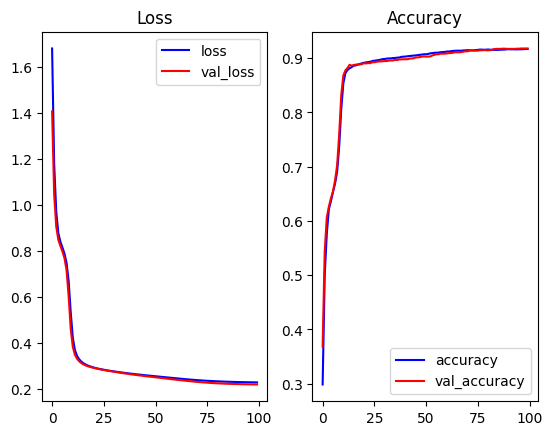

In [ ]:
model3.plot_history()

# GAN Initialization

In [ ]:
import os

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from functools import partial
import itertools
import math


from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Embedding, multiply, LeakyReLU, BatchNormalization, LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers.legacy import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.losses import Huber

from tqdm import tqdm

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
import logging
tf.get_logger().setLevel(logging.ERROR)

class RandomWeightedAverage(tf.keras.layers.Layer):
    """
    A custom Keras layer to generate random weighted averages of input samples.

    Parameters:
    - batch_size: The batch size of the input samples.

    This class inherits from the `tf.keras.layers.Layer` base class and implements the necessary methods to generate random weighted averages of input samples. It is commonly used in generative adversarial networks (GANs) during the training process.

    Example usage:
    layer = RandomWeightedAverage(batch_size)
    output = layer(inputs)
    """

    def __init__(self, batch_size: int):
        """
        Initializes a new instance of the RandomWeightedAverage class.

        Parameters:
        - batch_size: The batch size of the input samples.
        """
        super().__init__()
        self.batch_size = batch_size

    def call(self, inputs, **kwargs):
        """
        Generates random weighted averages of input samples.

        Parameters:
        - inputs: A list of input samples.

        Returns:
        - weighted_averages: Randomly weighted averages of the input samples.

        This method generates random weights using uniform distribution between 0 and 1. It then applies these weights to the input samples to calculate the weighted averages. The formula used is (alpha * input1) + ((1 - alpha) * input2), where alpha is the randomly generated weight.

        Note: This method assumes the use of TensorFlow and imports `tf`.

        Example usage:
        weighted_averages = layer.call(inputs)
        """
        alpha = tf.random.uniform((self.batch_size, 1))
        return (alpha * inputs[0]) + ((1 - alpha) * inputs[1])

    def compute_output_shape(self, input_shape):
        """
        Computes the output shape of the layer.

        Parameters:
        - input_shape: The shape of the input samples.

        Returns:
        - output_shape: The shape of the output.

        This method computes and returns the output shape of the layer, which is the same as the shape of the first input sample.

        Example usage:
        output_shape = layer.compute_output_shape(input_shape)
        """
        return input_shape[0]



class WCGANGP():
    """
    Wasserstein Conditional Generative Adversarial Network with Gradient Penalty (WCGAN-GP) implementation.

    Parameters:
    - x_train: The input training data.
    - y_train: The target labels for the training data.
    - latent_dim: The dimensionality of the latent noise vector.
    - batch_size: The number of samples in each batch.
    - n_critic: The number of critic (discriminator) updates per generator update.
    - pre_trained: Boolean indicating whether the model is pre-trained or not.
    - pre_trained_epoch: The epoch at which pre-training was performed.
    - pre_trained_iteration: The iteration at which pre-training was performed.
    - pre_trained_on_training: Boolean indicating whether pre-training was performed on the training set.
    - pre_trained_on_training_rate: The rate at which pre-training was performed on the training set.
    - on_training_epoch: The epoch number for training.

    This class implements the Wasserstein Conditional Generative Adversarial Network with Gradient Penalty (WCGAN-GP). It includes methods to build the generator and critic models, compute the gradient penalty loss, compile and train the models.

    The class initializes the WCGAN-GP model with the provided parameters. It also sets up the generator and critic models, defines the optimizer, and compiles the models with the appropriate loss functions.

    Example usage:
    wcgan = WCGANGP(x_train, y_train, latent_dim, batch_size, n_critic)
    wcgan.train(epochs=10000)
    """

    def __init__(self,
                 x_train,
                 y_train,
                 latent_dim,
                 batch_size,
                 n_critic,
                 pre_trained = False,
                 pre_trained_epoch = None,
                 pre_trained_iteration = None,
                 pre_trained_on_training = False,
                 pre_trained_on_training_rate = None,
                 on_training_epoch = None,):

        self.x_train = x_train
        self.y_train = y_train
        self.original_x_train = x_train
        self.original_y_train = y_train
        self.pre_trained = pre_trained
        self.pre_trained_epoch = pre_trained_epoch
        self.pre_trained_iteration = pre_trained_iteration
        self.pre_trained_on_training = pre_trained_on_training
        self.pre_trained_on_training_rate = pre_trained_on_training_rate
        self.on_training_epoch = on_training_epoch

        self.num_classes = len(np.unique(y_train))
        self.data_dim = x_train.shape[1]

        self.latent_dim = latent_dim
        self.batch_size = batch_size

        self.n_critic = n_critic

        self.history = {'critic_loss': [],
                        'generator_loss': [],}

        # Log training progress.
        self.losslog = []

        # Adam optimizer, suggested by original paper.
        optimizer = Adam(learning_rate=0.0005, beta_1=0.05, beta_2=0.9)

        # Build the generator and critic
        self.generator = self.build_generator()
        self.critic = self.build_critic()

        # Freeze generator's layers while training critic.
        self.generator.trainable = False

        # Data input (real sample).
        real_data = Input(shape=self.data_dim)
        # Noise input (z).
        noise = Input(shape=(self.latent_dim,))
        # Label input.
        label = Input(shape=(1,))

        # Generate data based of noise (fake sample)
        fake_data = self.generator([noise, label])

        # Critic (discriminator) determines validity of the real and fake data.
        fake = self.critic([fake_data, label])
        valid = self.critic([real_data, label])

        # Construct weighted average between real and fake data.
        interpolated_data = RandomWeightedAverage(self.batch_size)([real_data,
                                                                    fake_data])

        # Determine validity of weighted sample.
        validity_interpolated = self.critic([interpolated_data, label])


        # Use Python partial to provide loss function with additional
        # 'averaged_samples' argument.
        partial_gp_loss = partial(self.gradient_penalty_loss,
                          averaged_samples=interpolated_data)
        # Keras requires function names.
        partial_gp_loss.__name__ = 'gradient_penalty'

        self.critic_model = Model(inputs=[real_data, label, noise],
                            outputs=[valid, fake, validity_interpolated])

        self.critic_model.compile(loss=[self.wasserstein_loss,
                                        self.wasserstein_loss,
                                        partial_gp_loss],
                                  optimizer=optimizer,
                                  loss_weights=[1, 1, 10])
        if self.pre_trained:
            self.pre_training()
            self.generator.trainable = False

        # For the generator we freeze the critic's layers.
        self.critic.trainable = False
        self.generator.trainable = True

        # Sampled noise for input to generator.
        noise = Input(shape=(self.latent_dim,))

        # Add label to input.
        label = Input(shape=(1,))

        # Generate data based of noise.
        fake_data = self.generator([noise, label])

        # Discriminator determines validity.
        valid = self.critic([fake_data, label])

        self.optimizer = optimizer

        # Define generator model.
        self.generator_model = Model([noise, label], valid)
        self.generator_model.compile(loss=self.wasserstein_loss,
                                     optimizer=self.optimizer)


    def gradient_penalty_loss(self, y_true, y_pred, averaged_samples):
        """
        Computes the gradient penalty loss for a given batch of samples.

        Parameters:
        - y_true: The true labels/targets for the samples.
        - y_pred: The predicted labels/targets for the samples.
        - averaged_samples: The averaged samples used for gradient penalty calculation.

        Returns:
        - gradient_penalty: The computed gradient penalty loss.

        This function calculates the gradient penalty loss for a given batch of samples. It is commonly used in generative adversarial networks (GANs) to enforce smoothness in the learned model. The gradient penalty loss penalizes the model if the gradient of the discriminator with respect to the interpolated samples deviates from a target value.

        The function computes the gradients of the discriminator's predictions `y_pred` with respect to the `averaged_samples`. It then calculates the Euclidean norm of the gradients, which measures the magnitude of the gradients. The function applies the formula `lambda * (1 - ||grad||)^2` to each individual sample, where `lambda` is a hyperparameter and `||grad||` is the Euclidean norm of the gradients. Finally, the mean of the gradient penalties over the batch samples is returned as the loss.

        Note: This function assumes the use of Keras backend (e.g., TensorFlow) and imports `K` from it.

        Example usage:
        loss = gradient_penalty_loss(y_true, y_pred, averaged_samples)
        """

        gradients = K.gradients(y_pred, averaged_samples)[0]

        # Compute the euclidean norm by squaring...
        gradients_sqr = K.square(gradients)
        # ...summing over the rows...
        gradients_sqr_sum = K.sum(gradients_sqr, axis=np.arange(1, len(gradients_sqr.shape)))
        # ...and taking the square root
        gradient_l2_norm = K.sqrt(gradients_sqr_sum)

        # Compute lambda * (1 - ||grad||)^2 for each single sample
        gradient_penalty = K.square(1 - abs(gradient_l2_norm))

        # Return the mean as loss over all the batch samples
        return K.mean(gradient_penalty)



    def wasserstein_loss(self, y_true, y_pred):
        """
        Computes the Wasserstein loss for a given batch of samples.

        Parameters:
        - y_true: The true labels/targets for the samples.
        - y_pred: The predicted labels/targets for the samples.

        Returns:
        - wasserstein_loss: The computed Wasserstein loss.

        This function calculates the Wasserstein loss for a given batch of samples. It is commonly used in Wasserstein GANs (WGANs) to train the generator and discriminator. The Wasserstein loss measures the distance between the true and predicted label distributions, providing a more stable and meaningful training signal compared to traditional GAN losses.

        The function computes the element-wise product of `y_true` and `y_pred`, and then takes the mean of the resulting tensor. This represents the expectation over the joint distribution of the true and predicted labels. The resulting value is returned as the Wasserstein loss.

        Note: This function assumes the use of Keras backend (e.g., TensorFlow) and imports `K` from it.

        Example usage:
        loss = wasserstein_loss(y_true, y_pred)
        """

        return K.mean(y_true * y_pred)


    def build_generator(self):
        """
        Build and return the generator model.

        Returns:
        - generator_model: The constructed generator model.

        This function builds a generator model, which is responsible for generating synthetic data samples. The generator model typically takes random noise as input and outputs generated data samples.

        The generator model is constructed using a Sequential model from Keras. It consists of multiple dense (fully connected) layers with SELU activation functions, batch normalization, and dropout regularization. The output layer uses the sigmoid activation function to ensure the generated data samples are between 0 and 1.

        The noise and label inputs are defined using Keras Input layers. The label input is embedded into one-hot encoded vectors using an Embedding layer. The noise and embedded labels are then multiplied element-wise to create the model input. The generator model is then defined to take this model input and produce the generated data samples.

        Example usage:
        generator = build_generator()
        """

        model = Sequential(name="Generator")

        # First hidden layer.
        model.add(Dense(128, input_dim=self.latent_dim, activation='selu'))
        # model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        # Second hidden layer.
        model.add(Dense(256, activation='selu'))
        # model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        # Third hidden layer.
        model.add(Dense(512, activation='linear'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        # Output layer.
        model.add(Dense(self.data_dim, activation="sigmoid"))

        model.summary()

        # Noise and label input layers.
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype="int32")

        # Embed labels into onehot encoded vectors.
        label_embedding = Flatten()(Embedding(self.num_classes,
                                              self.latent_dim)(label))

        # Multiply noise and embedded labels to be used as model input.
        model_input = multiply([noise, label_embedding])

        generated_data = model(model_input)

        return Model([noise, label], generated_data, name="Generator")

    def build_critic(self):
        """
        Builds and returns the Critic model.

        Returns:
        - model: The built Critic model.

        This method constructs the Critic model, which is commonly used in adversarial learning setups such as Generative Adversarial Networks (GANs). The Critic model evaluates the generated samples and provides a measure of their quality.

        The Critic model is a feedforward neural network with several hidden layers. Each hidden layer consists of a dense layer with linear activation followed by a leaky rectified linear unit (LeakyReLU) activation function with a fixed negative slope (alpha=0.2). The output layer has a single node with linear activation.

        The model architecture is as follows:
        - Input layer: Accepts samples with dimension `self.data_dim`.
        - Hidden layer 1: Dense layer with 512 units and linear activation, followed by LeakyReLU activation.
        - Hidden layer 2: Dense layer with 256 units and linear activation, followed by LeakyReLU activation.
        - Hidden layer 3: Dense layer with 128 units and linear activation, followed by LeakyReLU activation.
        - Output layer: Dense layer with 1 unit and linear activation.

        The model is then summarized, displaying the layer information. Additionally, two inputs are defined:
        - `generated_sample`: Artificial data input of shape `self.data_dim`.
        - `label`: Label input of shape (1,) with data type "int32".

        The `label` input is embedded as a one-hot vector using an Embedding layer, which maps each label to a vector representation. The label embedding is then flattened. The generated sample is multiplied element-wise with the label embedding to obtain the input for the Critic model.

        Finally, the Critic model is constructed using the defined inputs and the validity output is obtained by passing the model input through the constructed model. The resulting model is returned.

        Note: This method assumes the use of Keras and imports required classes and functions such as `Sequential`, `Dense`, `LeakyReLU`, `Embedding`, `Input`, `Flatten`, and `multiply`.

        Example usage:
        critic = build_critic()
        """

        model = Sequential(name="Critic")

        # First hidden layer.
        model.add(Dense(512, input_dim=self.data_dim, activation='linear'))
        model.add(LeakyReLU(alpha=0.2))

        # Second hidden layer.
        model.add(Dense(256, activation='linear'))
        model.add(LeakyReLU(alpha=0.2))

        # Third hidden layer.
        model.add(Dense(128, activation='linear'))
        model.add(LeakyReLU(alpha=0.2))

        # Output layer with linear activation.
        model.add(Dense(1, activation='linear'))

        model.summary()

        # Artificial data input.
        generated_sample = Input(shape=self.data_dim)
        # Label input.
        label = Input(shape=(1,), dtype="int32")

        # Embedd label as onehot vector.
        label_embedding = Flatten()(Embedding(self.num_classes,
                                              self.data_dim)(label))

        # Multiply fake data sample with label embedding to get critic input.
        model_input = multiply([generated_sample, label_embedding])

        validity = model(model_input)

        return Model([generated_sample, label], validity, name="Critic")

    def train(self, epochs):
        """
        Trains the WCGAN model for a specified number of epochs.

        Parameters:
        - epochs: The number of training epochs.

        This method trains the WCGAN model by iterating over the specified number of epochs. It performs the training in batches, with each batch consisting of real samples and generated samples.

        The method initializes the training set and sets the adversarial ground truths for the discriminator. It calculates the number of batches based on the training data size and batch size. It also handles any overhead data that does not fit into complete batches.

        Within each epoch, the method resets the training set and selects random overhead rows that do not fit into batches. It removes these random overhead rows from the training set. The training data is then split into batches for processing.

        For each batch, the method performs training on the critic model by training the discriminator using real samples, generated samples, and noise. It repeats the training process for a specified number of critic steps (`n_critic`).

        After training the critic, the method generates a sample of artificial labels and trains the generator model using the generated noise and labels.

        The losses for both the discriminator and generator are recorded in `self.losslog`. The current epoch's critic loss (`d_loss`) and generator loss (`g_loss`) are also printed for monitoring.

        The method updates the `self.history` dictionary with the critic loss and generator loss for each epoch. If the WCGAN model was pre-trained on training data, the method performs pre-training based on the specified rate.

        Example usage:
        wcgan = WCGAN()
        wcgan.train(100)
        """

        self.x_train = self.original_x_train.copy()
        self.y_train = self.original_y_train.copy()

        # Adversarial ground truths.
        valid = -(np.ones((self.batch_size, 1)))
        fake =  np.ones((self.batch_size, 1))
        dummy = np.zeros((self.batch_size, 1))

        # Number of batches.
        self.n_batches = math.floor(self.x_train.shape[0] / self.batch_size)

        overhead = self.x_train.shape[0] % self.batch_size

        for epoch in range(epochs):

            # Reset training set.
            self.x_train = self.original_x_train.copy()
            self.y_train = self.original_y_train.copy()

            # Select random overhead rows that do not fit into batches.
            rand_overhead_idx = np.random.choice(range(self.x_train.shape[0]),
                                                 overhead,
                                                 replace=False)

            # Remove random overhead rows.
            self.x_train = np.delete(self.x_train, rand_overhead_idx, axis=0)
            self.y_train = np.delete(self.y_train, rand_overhead_idx, axis=0)

            # Split training data into batches.
            x_batches = np.split(self.x_train, self.n_batches)
            y_batches = np.split(self.y_train, self.n_batches)

            for x_batch, y_batch, i in tqdm(zip(x_batches,
                                                y_batches,
                                                range(self.n_batches))):

                for _ in range(self.n_critic):

                    # Generate random noise.
                    noise = np.random.normal(0, 1, (self.batch_size,
                                                    self.latent_dim))

                    # Train the critic.
                    d_loss = self.critic_model.train_on_batch(
                        [x_batch, y_batch, noise],
                        [valid, fake, dummy])


                # Generate sample of artificial labels.
                generated_labels = np.random.randint(0, self.num_classes, self.batch_size).reshape(-1, 1)

                # Train generator.
                g_loss = self.generator_model.train_on_batch([noise, generated_labels],
                                                             valid)

                self.losslog.append([d_loss[0], g_loss])

                DLOSS = "%.4f" % d_loss[0]
                GLOSS = "%.4f" % g_loss

                # if i % 100 == 0:
            print(f"Epoch: {epoch+1}/{epochs} critic_loss: {DLOSS} generator_loss: {GLOSS}")
            self.history['critic_loss'].append(d_loss[0])
            self.history['generator_loss'].append(g_loss)
            if self.pre_trained_on_training:
                if epoch % int(epochs * self.pre_trained_on_training_rate) == 0:
                    self.pre_training(on_training=True)


    def plot_history(self):
        """
        Plots the training history of a WCGAN model.

        This method plots the generator and critic loss values recorded during the training process. It provides insights into the model's learning progress and the convergence of the generator and critic.

        Example usage:
        wcgan.plot_history()
        """

        len_data = [i for i in range(len(self.history['generator_loss']))]
        plt.plot(len_data, self.history['generator_loss'], color='blue', label='generator_loss')
        plt.plot(len_data, self.history['critic_loss'], color='red', label='critic_loss')
        plt.title('WCGAN Loss')
        plt.legend()
        plt.show()


    def pre_training(self, on_training=False):
        """
        Pre-trains the Generator and Critic models.

        Parameters:
        - on_training (bool): Flag indicating if pre-training is performed during the main training phase. Default is False.

        This method performs pre-training of the Generator and Critic models. It includes multiple iterations of training the Generator and Critic models alternatively.

        During each iteration, the Generator is trained with the Huber loss and Adam optimizer. Random noise data is generated, and the Generator is fit to map this noise data and original labels to the original input data. The fit is performed for a fraction of the epoch count.

        After training the Generator, a subset of the original data is sampled by removing a random overhead of samples. The remaining data is used to train the Critic model. The Critic model is fit using the Wasserstein loss and three sets of labels: valid, fake, and dummy. The fit is performed for another fraction of the epoch count.

        At the end of each iteration, the Generator and Critic losses are printed.

        If `on_training` is True, the pre-training is performed as part of the main training phase. Otherwise, the pre-training iteration and epoch counts are used.

        Note: This method assumes the use of certain attributes and parameters that are not explicitly defined within the code provided.

        Example usage:
        pre_training()  # Perform pre-training during the main training phase
        pre_training(on_training=True)  # Perform pre-training separately from the main training phase
        """

        def wasserstein_loss(y_true, y_pred):
            return np.mean(y_true) * np.mean(y_pred)

        print('Pre-trained Generator & Critic Model')
        if on_training:
            iteration = 1
            epoch = self.on_training_epoch
        else:
            iteration = self.pre_trained_iteration
            epoch = self.pre_trained_epoch
        for i in range(iteration):
            self.generator.trainable = True
            self.generator.compile(loss=Huber(), optimizer='adam')
            noise_data = np.random.normal(0, 1, (self.original_x_train.shape[0],
                                                 self.latent_dim))
            self.generator.fit([noise_data, self.original_y_train],
                               self.original_x_train,
                               batch_size=self.original_x_train.shape[0],
                               epochs=epoch//4,
                               verbose=0)
            history = self.generator.fit([noise_data, self.original_y_train],
                                         self.original_x_train,
                                         batch_size=self.batch_size,
                                         epochs=epoch,
                                         validation_split=0.2,
                                         verbose=0)
            gen_loss = history.history['loss'][-1]
            overhead = self.original_x_train.shape[0] % self.batch_size
            rand_overhead_idx = np.random.choice(range(self.original_x_train.shape[0]),
                                                 overhead,
                                                 replace=False)
            x_train = np.delete(self.original_x_train, rand_overhead_idx, axis=0)
            y_train = np.delete(self.original_y_train, rand_overhead_idx, axis=0)
            valid = -(np.ones((x_train.shape[0], 1)))
            fake =  np.ones((x_train.shape[0], 1))
            dummy = np.zeros((x_train.shape[0], 1))
            noise_data = np.random.normal(0, 1, (x_train.shape[0], self.latent_dim))
            self.generator.trainable = False
            history = self.critic_model.fit([x_train, y_train, noise_data],
                                            [valid, fake, dummy],
                                            batch_size=self.batch_size,
                                            epochs=epoch//10,
                                            verbose=0)
            critic_loss = history.history['loss'][-1]
            print(f'Pretrained Iteration {i+1}/{self.pre_trained_iteration} Generator Loss: {gen_loss} Critic_Loss: {critic_loss}')





    def generate_data(self, n: int):
        """
        Generates synthetic data samples using the WCGAN generator.

        Parameters:
        - n: The number of synthetic samples to generate.

        Returns:
        - generated_data: The generated synthetic data samples.
        - generated_labels: The corresponding labels for the generated data.

        This function generates synthetic data samples using the WCGAN (Wasserstein Conditional Generative Adversarial Network) generator. It takes an input parameter `n` specifying the number of synthetic samples to generate.

        The function starts by creating a copy of the original training labels `tmp_y_train`. It then calculates the distribution ratio of each label in the dataset, storing the results in the `label_ratios` dictionary. This ratio represents the proportion of each label in the original dataset.

        Next, the function generates random noise using a normal distribution with mean 0 and standard deviation 1. The shape of the noise is `(n, self.latent_dim)`.

        The function proceeds to create synthetic data samples by sampling labels based on the label ratios. It uses a list comprehension with `round(ratio*n)` to determine the number of samples for each label. The resulting list of sampled labels is flattened using `itertools.chain` and converted into a numpy array.

        Finally, the WCGAN generator is used to generate artificial data samples by passing the generated noise and sampled labels as inputs to the generator's `predict` method. The function returns the generated data samples (`generated_data`) and the corresponding labels (`generated_labels`) as a tuple.

        Note: This function assumes the existence of a WCGAN generator object and requires the import of necessary libraries (e.g., `numpy`, `itertools`).

        Example usage:
        generated_data, generated_labels = generate_data(1000)
        """

        tmp_y_train = self.original_y_train.copy()
        # Get distribution ratio of each label in the dataset.
        label_ratios = {label: len(
            tmp_y_train[tmp_y_train == label])/tmp_y_train.shape[0] for label in np.unique(tmp_y_train)}

        noise = np.random.normal(0, 1, (n, self.latent_dim))

        # Create synthetic data samples
        sampled_labels = [
            np.full(round(ratio*n), label).tolist()
            for label, ratio in label_ratios.items()
        ]

        # Convert list to numpy array.
        sampled_labels = np.array((list(itertools.chain(*sampled_labels))))

        # Use CGAN to generate aritficial data.
        return self.generator.predict([noise, sampled_labels]), sampled_labels.flatten()

    def save_model(self, prefix_name=None, path="./"):
        """
        Saves the generator and critic models to disk.

        Parameters:
        - prefix_name (str): Optional prefix name to prepend to the saved model files. Default is None.
        - path (str): Path to the directory where the models should be saved. Default is "./".

        This method saves the generator and critic models of a GAN to disk. The saved models can be later loaded and used for generating new samples or further training.

        The method first creates a directory to store the saved models, if it does not exist already. The directory is created at the specified `path` or "./" by default.

        Next, the generator and critic models are saved in the models directory. The saved model files have names in the format "{prefix_name}_generator.h5" and "{prefix_name}_critic.h5", where `prefix_name` is an optional prefix string provided as an argument to the method. If no prefix name is provided, the default names "generator.h5" and "critic.h5" are used.

        Example usage:
        gan.save_model(prefix_name="my_gan", path="./saved_models/")
        """

        models_dir = os.path.join(path, "models")

        if not os.path.exists(models_dir):
            os.makedirs(models_dir)

        self.generator.save(os.path.join(models_dir, f"{prefix_name}_generator.h5"))
        self.critic.save(os.path.join(models_dir, f"{prefix_name}_critic.h5"))

    def load_model(self, prefix_name=None, path="./"):
        """
        Loads the generator and critic models from saved files.

        Parameters:
        - prefix_name: The prefix name used for the saved model files. Default is None.
        - path: The path to the directory where the models are saved. Default is "./".

        This method loads the generator and critic models from saved files. The saved models are assumed to be in the specified directory (`path`) with the provided prefix name (`prefix_name`) appended to the filenames.

        The method first constructs the directory path for the models based on the specified `path`. It then checks if the directory exists and raises a `ValueError` if it doesn't.

        Next, it loads the generator model by calling `tf.keras.models.load_model()` with the path to the generator model file. The file name is constructed by appending "_generator.h5" to the prefix name.

        Similarly, the method loads the critic model by calling `tf.keras.models.load_model()` with the path to the critic model file. The file name is constructed by appending "_critic.h5" to the prefix name.

        Note: This method assumes the use of TensorFlow and imports the `os` and `tf` modules.

        Example usage:
        my_model.load_model(prefix_name="my_model", path="./saved_models/")
        """

        models_dir = os.path.join(path, "models")

        if not os.path.exists(models_dir):
            raise ValueError(f"Models directory '{models_dir}' does not exist.")

        self.generator = tf.keras.models.load_model(os.path.join(models_dir, f"{prefix_name}_generator.h5"))
        self.critic = tf.keras.models.load_model(os.path.join(models_dir, f"{prefix_name}_critic.h5"))

In [ ]:
from sklearn.model_selection import train_test_split

# GAN Implementation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
y_train

array([3, 3, 3, ..., 2, 5, 4])

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [ ]:
for col in X_scaled.columns:
    old_data = np.expand_dims(np.asarray(X_scaled[col]), axis=-1)
    new_data = scaler.fit_transform(old_data)
    X_scaled[col] = new_data.flatten()

In [ ]:
X_scaled

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261424,0.055629,-0.006086,0.760813
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110383,0.285117,0.328393,0.722659
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104270,0.289205,0.336328,0.390251
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141907,0.228375,0.248973,0.036440


In [ ]:
wcgan = WCGANGP(np.asarray(X_scaled),
                y,
                latent_dim=8,
                batch_size=32,
                n_critic=8,
                )

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 256)               0 

In [ ]:
wcgan.train(epochs = 10)

425it [01:04,  6.55it/s]


Epoch: 1/10 critic_loss: -2.7271 generator_loss: -4.3352


425it [00:59,  7.16it/s]


Epoch: 2/10 critic_loss: -2.1761 generator_loss: -9.8009


425it [01:02,  6.78it/s]


Epoch: 3/10 critic_loss: -2.1788 generator_loss: -9.3814


425it [00:59,  7.18it/s]


Epoch: 4/10 critic_loss: -1.8555 generator_loss: -9.1442


425it [00:58,  7.31it/s]


Epoch: 5/10 critic_loss: -1.9016 generator_loss: -9.6973


425it [00:58,  7.31it/s]


Epoch: 6/10 critic_loss: -2.1265 generator_loss: -8.4968


425it [00:59,  7.18it/s]


Epoch: 7/10 critic_loss: -1.9441 generator_loss: -6.9467


425it [00:59,  7.18it/s]


Epoch: 8/10 critic_loss: -1.7100 generator_loss: -6.0604


425it [00:59,  7.13it/s]


Epoch: 9/10 critic_loss: -1.6581 generator_loss: -4.5922


425it [00:59,  7.18it/s]

Epoch: 10/10 critic_loss: -1.9706 generator_loss: -3.6617


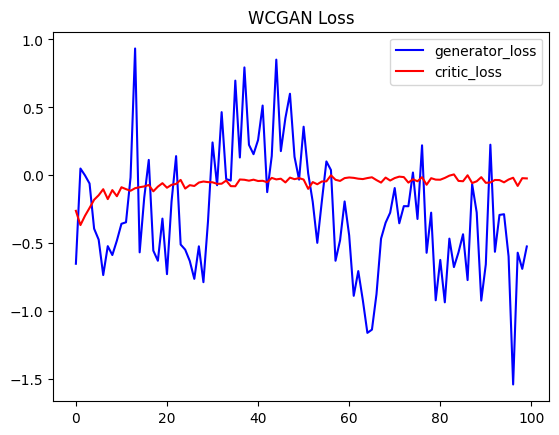

In [ ]:
wcgan.plot_history()

In [ ]:
generated_data, generated_label = wcgan.generate_data(X_scaled.shape[0])

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
np.unique(generated_label)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
real_samples = pd.DataFrame(X_scaled)
real_samples.columns = np.arange(X_scaled.shape[1])
real_samples.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


In [ ]:
real_samples

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261424,0.055629,-0.006086,0.760813
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110383,0.285117,0.328393,0.722659
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104270,0.289205,0.336328,0.390251
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141907,0.228375,0.248973,0.036440


In [ ]:
fake_samples = pd.DataFrame(generated_data)
fake_samples.columns = X_scaled.columns.values
fake_samples

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,9.139431e-07,9.998623e-01,1.847287e-04,1.012442e-04,2.561286e-02,9.999335e-01,0.999399,0.999980,0.999981,1.050605e-05,0.999988,8.281497e-04,3.945785e-12,9.108832e-01,0.997065,0.999989
1,4.941449e-18,1.000000e+00,3.393271e-11,3.158180e-11,9.994725e-01,1.000000e+00,1.000000,1.000000,0.999988,8.727782e-23,1.000000,2.359578e-10,9.308489e-37,9.995891e-01,0.999904,1.000000
2,2.532777e-05,9.999985e-01,6.927645e-04,7.464020e-04,9.664905e-01,9.999664e-01,0.999975,1.000000,0.999966,5.714883e-05,0.999996,4.246210e-04,1.332052e-14,9.925699e-01,0.951074,0.999961
3,4.464764e-05,4.725202e-02,1.377283e-03,1.544254e-02,2.792791e-07,8.578019e-10,0.998472,0.184328,0.999992,9.996524e-01,0.014519,1.219562e-03,5.742162e-02,1.634503e-03,0.999918,1.000000
4,1.889055e-06,3.247411e-08,3.239050e-06,7.029869e-06,2.531975e-10,1.437479e-17,0.999999,0.000001,0.999993,3.248648e-04,0.999490,6.037191e-06,1.000000e+00,9.693141e-17,0.999606,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,3.843483e-01,3.021785e-01,9.022622e-01,1.656955e-01,4.778623e-01,1.285906e-03,0.962670,0.853845,0.999961,9.994500e-01,0.004103,9.072881e-01,5.189930e-01,5.340754e-05,0.564404,0.999133
13607,1.002232e-08,9.999923e-01,1.233278e-04,7.604778e-05,2.167091e-06,6.241915e-08,0.003382,0.997029,0.999999,9.071778e-01,0.000934,4.298354e-05,4.781639e-05,1.288133e-09,0.258483,1.000000
13608,5.536856e-13,1.000000e+00,3.911529e-05,6.933658e-07,1.240127e-08,3.227732e-11,0.000093,0.999696,0.999999,2.136094e-01,0.001334,9.692377e-07,4.319413e-04,1.115756e-13,0.000366,1.000000
13609,9.989021e-01,1.375216e-05,1.515345e-01,3.245657e-01,1.458299e-01,8.831899e-01,0.654160,0.007631,0.999996,9.999764e-01,0.001516,7.446001e-02,4.079975e-01,4.169955e-01,0.998947,0.990464


In [ ]:
# Predict on the image
confidences = model3.predict(fake_samples)

# Get prediction instead of confidence levels
predictions = model3.output_layer_activation.predictions(confidences)



# Get label name from label index
prediction = label_map[predictions[2]]

print(f'predicted: {prediction}')
print(f'true_value: {np.argmax(y_test[2])}')
ab = np.argmax(confidences, axis=1)
np.unique(ab)

predicted: 0
true_value: 0


array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
X_scaled.columns = fake_samples.columns.values

In [ ]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967316,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.942381,0.852151,0.465175,0.531785,0.382135,0.412185,0.974113
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.947954,0.862952,0.523974,0.509582,0.426233,0.470848,0.970912
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.936648,0.855785,0.525351,0.508683,0.427019,0.472240,0.943025
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.908991,0.834795,0.510145,0.514216,0.415330,0.456919,0.913342


In [ ]:
X_combine_gan = pd.concat([X_scaled,fake_samples],axis = 0)
X_combine_gan

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3.405267e-02,5.857388e-02,0.044262,1.521417e-01,1.226121e-01,4.777970e-01,0.033107,0.070804,0.671024,0.922824,0.934823,7.867331e-01,0.593432,8.330487e-01,0.750996,0.980620
1,3.550018e-02,7.755673e-02,0.030479,1.783367e-01,5.157739e-02,2.784720e-01,0.034991,0.073577,0.735504,0.871514,0.793138,9.035489e-01,0.547447,9.673156e-01,0.884987,0.974979
2,3.825855e-02,6.803484e-02,0.052633,1.581899e-01,1.315212e-01,4.964478e-01,0.037126,0.078816,0.716671,0.932141,0.914511,7.735137e-01,0.582016,8.009422e-01,0.736200,0.987196
3,4.094007e-02,8.294206e-02,0.048548,1.776914e-01,9.162296e-02,4.038645e-01,0.041389,0.083854,0.731365,0.761614,0.826871,8.299115e-01,0.552408,8.547441e-01,0.799846,0.893675
4,4.150370e-02,6.531273e-02,0.032862,2.006795e-01,2.556527e-02,1.656795e-01,0.040123,0.084906,0.700538,0.949832,0.988408,9.515830e-01,0.510741,1.000000e+00,0.941770,0.989116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,3.843483e-01,3.021785e-01,0.902262,1.656955e-01,4.778623e-01,1.285906e-03,0.962670,0.853845,0.999961,0.999450,0.004103,9.072881e-01,0.518993,5.340754e-05,0.564404,0.999133
13607,1.002232e-08,9.999923e-01,0.000123,7.604778e-05,2.167091e-06,6.241915e-08,0.003382,0.997029,0.999999,0.907178,0.000934,4.298354e-05,0.000048,1.288133e-09,0.258483,1.000000
13608,5.536856e-13,1.000000e+00,0.000039,6.933658e-07,1.240127e-08,3.227732e-11,0.000093,0.999696,0.999999,0.213609,0.001334,9.692377e-07,0.000432,1.115756e-13,0.000366,1.000000
13609,9.989021e-01,1.375216e-05,0.151535,3.245657e-01,1.458299e-01,8.831899e-01,0.654160,0.007631,0.999996,0.999976,0.001516,7.446001e-02,0.407997,4.169955e-01,0.998947,0.990464


In [ ]:
y_combined_gan = np.concatenate((y, generated_label))
y_combined_gan

array([5, 5, 5, ..., 6, 6, 6])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11073,0.036960,0.076417,0.092678,0.105189,0.329112,0.752840,0.036302,0.076358,0.444575,0.884449,0.823595,0.513273,0.691550,0.540022,0.460062,0.939497
13172,0.075454,0.157774,0.157542,0.169519,0.343776,0.764742,0.074335,0.144515,0.485727,0.856549,0.697902,0.495573,0.565422,0.434747,0.442329,0.914787
11587,0.045043,0.086805,0.083858,0.146264,0.223449,0.644088,0.043838,0.091462,0.573771,0.922827,0.852534,0.640752,0.606539,0.637164,0.591724,0.939503
12492,0.060501,0.110013,0.124987,0.154276,0.301748,0.728857,0.058872,0.119113,0.736671,0.927999,0.869276,0.544795,0.591215,0.506862,0.491974,0.945857
430,0.066329,0.126902,0.122573,0.176206,0.254562,0.681082,0.064705,0.129160,0.769586,0.915324,0.811109,0.604534,0.550166,0.545546,0.553613,0.993421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.268348,0.406017,0.477025,0.341247,0.612962,0.908295,0.261138,0.402713,0.778191,0.950028,0.694211,0.246445,0.339889,0.115760,0.206890,0.895978
13418,0.082995,0.157915,0.180137,0.168554,0.395476,0.802195,0.080989,0.156882,0.440168,0.915079,0.774606,0.443253,0.565350,0.381439,0.390690,0.951022
5390,0.297119,0.432595,0.492086,0.384502,0.558854,0.887592,0.289005,0.434365,0.735409,0.955790,0.710218,0.289667,0.299449,0.122500,0.245842,0.890534
860,0.076884,0.127805,0.113632,0.225189,0.154818,0.540840,0.074677,0.146883,0.632976,0.943112,0.926980,0.738436,0.474646,0.643451,0.697297,0.982573


# Gan Testing ANN

## ANN Without Gan

In [ ]:
model3.train(X_train, y_train, validation_data=(X_test, y_test),
            epochs=100, batch_size=64, print_every=170)

Training Epoch: 1/100:  85%|████████▌ | 146/171 [00:00<00:00, 724.00it/s]

step: 0, acc: 0.094, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/100: 100%|██████████| 171/171 [00:00<00:00, 710.18it/s]


step: 170, acc: 0.750, loss: 1.043 (data_loss: 1.043, reg_loss: 0.000), lr: 0.001
training, acc: 0.319, loss: 1.629 (data_loss: 1.629, reg_loss: 0.000), lr: 0.001
validation, acc: 0.495, loss: 1.218


Training Epoch: 2/100:  45%|████▌     | 77/171 [00:00<00:00, 765.25it/s]

step: 0, acc: 0.516, loss: 1.123 (data_loss: 1.123, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/100: 100%|██████████| 171/171 [00:00<00:00, 723.44it/s]


step: 170, acc: 0.750, loss: 0.755 (data_loss: 0.755, reg_loss: 0.000), lr: 0.001
training, acc: 0.576, loss: 1.013 (data_loss: 1.013, reg_loss: 0.000), lr: 0.001
validation, acc: 0.640, loss: 0.883


Training Epoch: 3/100:  39%|███▊      | 66/171 [00:00<00:00, 658.64it/s]

step: 0, acc: 0.625, loss: 0.906 (data_loss: 0.906, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/100: 100%|██████████| 171/171 [00:00<00:00, 671.57it/s]


step: 170, acc: 0.875, loss: 0.533 (data_loss: 0.533, reg_loss: 0.000), lr: 0.001
training, acc: 0.675, loss: 0.825 (data_loss: 0.825, reg_loss: 0.000), lr: 0.001
validation, acc: 0.701, loss: 0.759


Training Epoch: 4/100:  46%|████▌     | 79/171 [00:00<00:00, 783.66it/s]

step: 0, acc: 0.656, loss: 0.823 (data_loss: 0.823, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/100: 100%|██████████| 171/171 [00:00<00:00, 775.07it/s]


step: 170, acc: 0.875, loss: 0.341 (data_loss: 0.341, reg_loss: 0.000), lr: 0.001
training, acc: 0.742, loss: 0.684 (data_loss: 0.684, reg_loss: 0.000), lr: 0.001
validation, acc: 0.783, loss: 0.573


Training Epoch: 5/100:  46%|████▌     | 79/171 [00:00<00:00, 789.00it/s]

step: 0, acc: 0.781, loss: 0.630 (data_loss: 0.630, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/100: 100%|██████████| 171/171 [00:00<00:00, 685.34it/s]


step: 170, acc: 0.875, loss: 0.192 (data_loss: 0.192, reg_loss: 0.000), lr: 0.001
training, acc: 0.830, loss: 0.487 (data_loss: 0.487, reg_loss: 0.000), lr: 0.001
validation, acc: 0.869, loss: 0.401


Training Epoch: 6/100:  43%|████▎     | 73/171 [00:00<00:00, 724.10it/s]

step: 0, acc: 0.859, loss: 0.464 (data_loss: 0.464, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/100: 100%|██████████| 171/171 [00:00<00:00, 726.83it/s]


step: 170, acc: 0.875, loss: 0.138 (data_loss: 0.138, reg_loss: 0.000), lr: 0.001
training, acc: 0.870, loss: 0.376 (data_loss: 0.376, reg_loss: 0.000), lr: 0.001
validation, acc: 0.881, loss: 0.344


Training Epoch: 7/100:  43%|████▎     | 74/171 [00:00<00:00, 731.31it/s]

step: 0, acc: 0.859, loss: 0.408 (data_loss: 0.408, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/100: 100%|██████████| 171/171 [00:00<00:00, 646.47it/s]


step: 170, acc: 1.000, loss: 0.121 (data_loss: 0.121, reg_loss: 0.000), lr: 0.001
training, acc: 0.880, loss: 0.339 (data_loss: 0.339, reg_loss: 0.000), lr: 0.001
validation, acc: 0.885, loss: 0.324


Training Epoch: 8/100:  43%|████▎     | 73/171 [00:00<00:00, 724.86it/s]

step: 0, acc: 0.859, loss: 0.385 (data_loss: 0.385, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/100: 100%|██████████| 171/171 [00:00<00:00, 700.76it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.882, loss: 0.323 (data_loss: 0.323, reg_loss: 0.000), lr: 0.001
validation, acc: 0.886, loss: 0.313


Training Epoch: 9/100:  43%|████▎     | 73/171 [00:00<00:00, 721.30it/s]

step: 0, acc: 0.859, loss: 0.372 (data_loss: 0.372, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/100: 100%|██████████| 171/171 [00:00<00:00, 684.81it/s]


step: 170, acc: 0.875, loss: 0.111 (data_loss: 0.111, reg_loss: 0.000), lr: 0.001
training, acc: 0.886, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.307


Training Epoch: 10/100:  49%|████▉     | 84/171 [00:00<00:00, 835.84it/s]

step: 0, acc: 0.828, loss: 0.363 (data_loss: 0.363, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/100: 100%|██████████| 171/171 [00:00<00:00, 738.68it/s]


step: 170, acc: 0.875, loss: 0.110 (data_loss: 0.110, reg_loss: 0.000), lr: 0.001
training, acc: 0.887, loss: 0.308 (data_loss: 0.308, reg_loss: 0.000), lr: 0.001
validation, acc: 0.889, loss: 0.302


Training Epoch: 11/100:  47%|████▋     | 80/171 [00:00<00:00, 791.59it/s]

step: 0, acc: 0.844, loss: 0.357 (data_loss: 0.357, reg_loss: 0.000), lr: 0.001


Training Epoch: 11/100: 100%|██████████| 171/171 [00:00<00:00, 766.81it/s]


step: 170, acc: 0.875, loss: 0.109 (data_loss: 0.109, reg_loss: 0.000), lr: 0.001
training, acc: 0.889, loss: 0.303 (data_loss: 0.303, reg_loss: 0.000), lr: 0.001
validation, acc: 0.889, loss: 0.298


Training Epoch: 12/100:  45%|████▌     | 77/171 [00:00<00:00, 768.11it/s]

step: 0, acc: 0.844, loss: 0.351 (data_loss: 0.351, reg_loss: 0.000), lr: 0.001


Training Epoch: 12/100: 100%|██████████| 171/171 [00:00<00:00, 710.27it/s]


step: 170, acc: 0.875, loss: 0.109 (data_loss: 0.109, reg_loss: 0.000), lr: 0.001
training, acc: 0.890, loss: 0.299 (data_loss: 0.299, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.295


Training Epoch: 13/100:  46%|████▌     | 79/171 [00:00<00:00, 786.41it/s]

step: 0, acc: 0.844, loss: 0.347 (data_loss: 0.347, reg_loss: 0.000), lr: 0.001


Training Epoch: 13/100: 100%|██████████| 171/171 [00:00<00:00, 746.86it/s]


step: 170, acc: 0.875, loss: 0.109 (data_loss: 0.109, reg_loss: 0.000), lr: 0.001
training, acc: 0.891, loss: 0.296 (data_loss: 0.296, reg_loss: 0.000), lr: 0.001
validation, acc: 0.889, loss: 0.292


Training Epoch: 14/100:  46%|████▌     | 78/171 [00:00<00:00, 779.57it/s]

step: 0, acc: 0.844, loss: 0.342 (data_loss: 0.342, reg_loss: 0.000), lr: 0.001


Training Epoch: 14/100: 100%|██████████| 171/171 [00:00<00:00, 717.47it/s]


step: 170, acc: 0.875, loss: 0.110 (data_loss: 0.110, reg_loss: 0.000), lr: 0.001
training, acc: 0.892, loss: 0.294 (data_loss: 0.294, reg_loss: 0.000), lr: 0.001
validation, acc: 0.890, loss: 0.290


Training Epoch: 15/100:  44%|████▍     | 76/171 [00:00<00:00, 756.36it/s]

step: 0, acc: 0.844, loss: 0.339 (data_loss: 0.339, reg_loss: 0.000), lr: 0.001


Training Epoch: 15/100: 100%|██████████| 171/171 [00:00<00:00, 738.89it/s]


step: 170, acc: 0.875, loss: 0.110 (data_loss: 0.110, reg_loss: 0.000), lr: 0.001
training, acc: 0.893, loss: 0.291 (data_loss: 0.291, reg_loss: 0.000), lr: 0.001
validation, acc: 0.891, loss: 0.288


Training Epoch: 16/100:  45%|████▌     | 77/171 [00:00<00:00, 766.15it/s]

step: 0, acc: 0.844, loss: 0.336 (data_loss: 0.336, reg_loss: 0.000), lr: 0.001


Training Epoch: 16/100: 100%|██████████| 171/171 [00:00<00:00, 723.08it/s]


step: 170, acc: 0.875, loss: 0.110 (data_loss: 0.110, reg_loss: 0.000), lr: 0.001
training, acc: 0.895, loss: 0.289 (data_loss: 0.289, reg_loss: 0.000), lr: 0.001
validation, acc: 0.891, loss: 0.285


Training Epoch: 17/100:  45%|████▌     | 77/171 [00:00<00:00, 767.07it/s]

step: 0, acc: 0.844, loss: 0.333 (data_loss: 0.333, reg_loss: 0.000), lr: 0.001


Training Epoch: 17/100: 100%|██████████| 171/171 [00:00<00:00, 712.48it/s]


step: 170, acc: 0.875, loss: 0.110 (data_loss: 0.110, reg_loss: 0.000), lr: 0.001
training, acc: 0.895, loss: 0.287 (data_loss: 0.287, reg_loss: 0.000), lr: 0.001
validation, acc: 0.892, loss: 0.283


Training Epoch: 18/100:  49%|████▊     | 83/171 [00:00<00:00, 826.49it/s]

step: 0, acc: 0.844, loss: 0.330 (data_loss: 0.330, reg_loss: 0.000), lr: 0.001


Training Epoch: 18/100: 100%|██████████| 171/171 [00:00<00:00, 742.81it/s]


step: 170, acc: 0.875, loss: 0.110 (data_loss: 0.110, reg_loss: 0.000), lr: 0.001
training, acc: 0.895, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001
validation, acc: 0.893, loss: 0.281


Training Epoch: 19/100:  50%|████▉     | 85/171 [00:00<00:00, 847.67it/s]

step: 0, acc: 0.859, loss: 0.327 (data_loss: 0.327, reg_loss: 0.000), lr: 0.001


Training Epoch: 19/100: 100%|██████████| 171/171 [00:00<00:00, 762.16it/s]


step: 170, acc: 0.875, loss: 0.111 (data_loss: 0.111, reg_loss: 0.000), lr: 0.001
training, acc: 0.896, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.001
validation, acc: 0.894, loss: 0.279


Training Epoch: 20/100:  49%|████▉     | 84/171 [00:00<00:00, 839.01it/s]

step: 0, acc: 0.875, loss: 0.325 (data_loss: 0.325, reg_loss: 0.000), lr: 0.001


Training Epoch: 20/100: 100%|██████████| 171/171 [00:00<00:00, 808.80it/s]


step: 170, acc: 0.875, loss: 0.111 (data_loss: 0.111, reg_loss: 0.000), lr: 0.001
training, acc: 0.897, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001
validation, acc: 0.897, loss: 0.278


Training Epoch: 21/100:  49%|████▊     | 83/171 [00:00<00:00, 821.36it/s]

step: 0, acc: 0.875, loss: 0.323 (data_loss: 0.323, reg_loss: 0.000), lr: 0.001


Training Epoch: 21/100: 100%|██████████| 171/171 [00:00<00:00, 755.46it/s]


step: 170, acc: 0.875, loss: 0.111 (data_loss: 0.111, reg_loss: 0.000), lr: 0.001
training, acc: 0.898, loss: 0.280 (data_loss: 0.280, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.276


Training Epoch: 22/100:  47%|████▋     | 81/171 [00:00<00:00, 802.99it/s]

step: 0, acc: 0.875, loss: 0.322 (data_loss: 0.322, reg_loss: 0.000), lr: 0.001


Training Epoch: 22/100: 100%|██████████| 171/171 [00:00<00:00, 735.96it/s]


step: 170, acc: 0.875, loss: 0.111 (data_loss: 0.111, reg_loss: 0.000), lr: 0.001
training, acc: 0.898, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.274


Training Epoch: 23/100:  44%|████▍     | 75/171 [00:00<00:00, 745.69it/s]

step: 0, acc: 0.875, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001


Training Epoch: 23/100: 100%|██████████| 171/171 [00:00<00:00, 752.57it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.899, loss: 0.277 (data_loss: 0.277, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.273


Training Epoch: 24/100:  46%|████▌     | 79/171 [00:00<00:00, 782.21it/s]

step: 0, acc: 0.875, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 24/100: 100%|██████████| 171/171 [00:00<00:00, 753.09it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.900, loss: 0.276 (data_loss: 0.276, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.271


Training Epoch: 25/100:  46%|████▌     | 79/171 [00:00<00:00, 785.27it/s]

step: 0, acc: 0.875, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 25/100: 100%|██████████| 171/171 [00:00<00:00, 766.90it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.900, loss: 0.275 (data_loss: 0.275, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.270


Training Epoch: 26/100:  46%|████▌     | 78/171 [00:00<00:00, 774.14it/s]

step: 0, acc: 0.875, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 26/100: 100%|██████████| 171/171 [00:00<00:00, 697.12it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.901, loss: 0.274 (data_loss: 0.274, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.268


Training Epoch: 27/100:  46%|████▌     | 79/171 [00:00<00:00, 782.26it/s]

step: 0, acc: 0.859, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.001


Training Epoch: 27/100: 100%|██████████| 171/171 [00:00<00:00, 760.09it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.902, loss: 0.273 (data_loss: 0.273, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.267


Training Epoch: 28/100:  44%|████▍     | 75/171 [00:00<00:00, 741.59it/s]

step: 0, acc: 0.859, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.001


Training Epoch: 28/100: 100%|██████████| 171/171 [00:00<00:00, 764.74it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.903, loss: 0.272 (data_loss: 0.272, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.266


Training Epoch: 29/100:  47%|████▋     | 80/171 [00:00<00:00, 792.95it/s]

step: 0, acc: 0.859, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.001


Training Epoch: 29/100: 100%|██████████| 171/171 [00:00<00:00, 762.49it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.903, loss: 0.271 (data_loss: 0.271, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.265


Training Epoch: 30/100:  41%|████      | 70/171 [00:00<00:00, 694.97it/s]

step: 0, acc: 0.859, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 30/100: 100%|██████████| 171/171 [00:00<00:00, 702.67it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.270 (data_loss: 0.270, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.264


Training Epoch: 31/100:  46%|████▌     | 79/171 [00:00<00:00, 786.79it/s]

step: 0, acc: 0.859, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 31/100: 100%|██████████| 171/171 [00:00<00:00, 737.30it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.269 (data_loss: 0.269, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.263


Training Epoch: 32/100:  32%|███▏      | 55/171 [00:00<00:00, 549.24it/s]

step: 0, acc: 0.859, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 32/100: 100%|██████████| 171/171 [00:00<00:00, 508.56it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.268 (data_loss: 0.268, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.262


Training Epoch: 33/100:  30%|███       | 52/171 [00:00<00:00, 517.64it/s]

step: 0, acc: 0.859, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 33/100: 100%|██████████| 171/171 [00:00<00:00, 525.71it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.261


Training Epoch: 34/100:  35%|███▍      | 59/171 [00:00<00:00, 589.70it/s]

step: 0, acc: 0.859, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001


Training Epoch: 34/100: 100%|██████████| 171/171 [00:00<00:00, 557.69it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.260


Training Epoch: 35/100:  35%|███▍      | 59/171 [00:00<00:00, 574.12it/s]

step: 0, acc: 0.859, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001


Training Epoch: 35/100: 100%|██████████| 171/171 [00:00<00:00, 537.42it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.905, loss: 0.266 (data_loss: 0.266, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.259


Training Epoch: 36/100:  32%|███▏      | 55/171 [00:00<00:00, 548.48it/s]

step: 0, acc: 0.859, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001


Training Epoch: 36/100: 100%|██████████| 171/171 [00:00<00:00, 498.59it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.905, loss: 0.265 (data_loss: 0.265, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.258


Training Epoch: 37/100:  32%|███▏      | 54/171 [00:00<00:00, 532.61it/s]

step: 0, acc: 0.859, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001


Training Epoch: 37/100: 100%|██████████| 171/171 [00:00<00:00, 498.22it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.264 (data_loss: 0.264, reg_loss: 0.000), lr: 0.001
validation, acc: 0.904, loss: 0.257


Training Epoch: 38/100:  29%|██▉       | 50/171 [00:00<00:00, 499.03it/s]

step: 0, acc: 0.859, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 38/100: 100%|██████████| 171/171 [00:00<00:00, 529.27it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.264 (data_loss: 0.264, reg_loss: 0.000), lr: 0.001
validation, acc: 0.904, loss: 0.256


Training Epoch: 39/100:  29%|██▉       | 50/171 [00:00<00:00, 499.59it/s]

step: 0, acc: 0.875, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 39/100: 100%|██████████| 171/171 [00:00<00:00, 496.16it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.263 (data_loss: 0.263, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.255


Training Epoch: 40/100:  30%|██▉       | 51/171 [00:00<00:00, 503.03it/s]

step: 0, acc: 0.891, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 40/100: 100%|██████████| 171/171 [00:00<00:00, 468.80it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.262 (data_loss: 0.262, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.254


Training Epoch: 41/100:  28%|██▊       | 48/171 [00:00<00:00, 477.75it/s]

step: 0, acc: 0.891, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 41/100: 100%|██████████| 171/171 [00:00<00:00, 477.31it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.262 (data_loss: 0.262, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.253


Training Epoch: 42/100:  29%|██▊       | 49/171 [00:00<00:00, 489.54it/s]

step: 0, acc: 0.891, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 42/100: 100%|██████████| 171/171 [00:00<00:00, 470.66it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.261 (data_loss: 0.261, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.252


Training Epoch: 43/100:  31%|███       | 53/171 [00:00<00:00, 524.17it/s]

step: 0, acc: 0.891, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.001


Training Epoch: 43/100: 100%|██████████| 171/171 [00:00<00:00, 501.94it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.260 (data_loss: 0.260, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.251


Training Epoch: 44/100:  27%|██▋       | 47/171 [00:00<00:00, 463.26it/s]

step: 0, acc: 0.891, loss: 0.316 (data_loss: 0.316, reg_loss: 0.000), lr: 0.001


Training Epoch: 44/100: 100%|██████████| 171/171 [00:00<00:00, 459.17it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.260 (data_loss: 0.260, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.250


Training Epoch: 45/100:  31%|███       | 53/171 [00:00<00:00, 521.94it/s]

step: 0, acc: 0.906, loss: 0.316 (data_loss: 0.316, reg_loss: 0.000), lr: 0.001


Training Epoch: 45/100: 100%|██████████| 171/171 [00:00<00:00, 479.76it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.259 (data_loss: 0.259, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.249


Training Epoch: 46/100:  40%|███▉      | 68/171 [00:00<00:00, 674.12it/s]

step: 0, acc: 0.906, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001


Training Epoch: 46/100: 100%|██████████| 171/171 [00:00<00:00, 666.29it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.258 (data_loss: 0.258, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.248


Training Epoch: 47/100:  39%|███▉      | 67/171 [00:00<00:00, 669.36it/s]

step: 0, acc: 0.891, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.001


Training Epoch: 47/100: 100%|██████████| 171/171 [00:00<00:00, 693.12it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.257 (data_loss: 0.257, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.248


Training Epoch: 48/100:  36%|███▌      | 61/171 [00:00<00:00, 608.66it/s]

step: 0, acc: 0.891, loss: 0.313 (data_loss: 0.313, reg_loss: 0.000), lr: 0.001


Training Epoch: 48/100: 100%|██████████| 171/171 [00:00<00:00, 650.14it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.256 (data_loss: 0.256, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.247


Training Epoch: 49/100:  39%|███▉      | 67/171 [00:00<00:00, 666.32it/s]

step: 0, acc: 0.891, loss: 0.312 (data_loss: 0.312, reg_loss: 0.000), lr: 0.001


Training Epoch: 49/100: 100%|██████████| 171/171 [00:00<00:00, 665.53it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.256 (data_loss: 0.256, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.246


Training Epoch: 50/100:  44%|████▍     | 76/171 [00:00<00:00, 755.05it/s]

step: 0, acc: 0.891, loss: 0.311 (data_loss: 0.311, reg_loss: 0.000), lr: 0.001


Training Epoch: 50/100: 100%|██████████| 171/171 [00:00<00:00, 704.79it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.255 (data_loss: 0.255, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.244


Training Epoch: 51/100:  40%|████      | 69/171 [00:00<00:00, 685.23it/s]

step: 0, acc: 0.891, loss: 0.309 (data_loss: 0.309, reg_loss: 0.000), lr: 0.001


Training Epoch: 51/100: 100%|██████████| 171/171 [00:00<00:00, 657.07it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.910, loss: 0.254 (data_loss: 0.254, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.243


Training Epoch: 52/100:  44%|████▍     | 75/171 [00:00<00:00, 743.45it/s]

step: 0, acc: 0.891, loss: 0.308 (data_loss: 0.308, reg_loss: 0.000), lr: 0.001


Training Epoch: 52/100: 100%|██████████| 171/171 [00:00<00:00, 706.78it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.910, loss: 0.253 (data_loss: 0.253, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.242


Training Epoch: 53/100:  46%|████▌     | 78/171 [00:00<00:00, 776.91it/s]

step: 0, acc: 0.891, loss: 0.307 (data_loss: 0.307, reg_loss: 0.000), lr: 0.001


Training Epoch: 53/100: 100%|██████████| 171/171 [00:00<00:00, 736.89it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.252 (data_loss: 0.252, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.241


Training Epoch: 54/100:  41%|████      | 70/171 [00:00<00:00, 696.66it/s]

step: 0, acc: 0.891, loss: 0.305 (data_loss: 0.305, reg_loss: 0.000), lr: 0.001


Training Epoch: 54/100: 100%|██████████| 171/171 [00:00<00:00, 693.80it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.251 (data_loss: 0.251, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.239


Training Epoch: 55/100:  37%|███▋      | 64/171 [00:00<00:00, 636.60it/s]

step: 0, acc: 0.891, loss: 0.304 (data_loss: 0.304, reg_loss: 0.000), lr: 0.001


Training Epoch: 55/100: 100%|██████████| 171/171 [00:00<00:00, 658.81it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.250 (data_loss: 0.250, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.238


Training Epoch: 56/100:  42%|████▏     | 72/171 [00:00<00:00, 712.99it/s]

step: 0, acc: 0.891, loss: 0.303 (data_loss: 0.303, reg_loss: 0.000), lr: 0.001


Training Epoch: 56/100: 100%|██████████| 171/171 [00:00<00:00, 677.43it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.912, loss: 0.249 (data_loss: 0.249, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.237


Training Epoch: 57/100:  37%|███▋      | 64/171 [00:00<00:00, 630.10it/s]

step: 0, acc: 0.891, loss: 0.302 (data_loss: 0.302, reg_loss: 0.000), lr: 0.001


Training Epoch: 57/100: 100%|██████████| 171/171 [00:00<00:00, 656.23it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.912, loss: 0.248 (data_loss: 0.248, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.236


Training Epoch: 58/100:  42%|████▏     | 72/171 [00:00<00:00, 718.35it/s]

step: 0, acc: 0.891, loss: 0.300 (data_loss: 0.300, reg_loss: 0.000), lr: 0.001


Training Epoch: 58/100: 100%|██████████| 171/171 [00:00<00:00, 712.63it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.247 (data_loss: 0.247, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.235


Training Epoch: 59/100:  42%|████▏     | 72/171 [00:00<00:00, 719.05it/s]

step: 0, acc: 0.891, loss: 0.299 (data_loss: 0.299, reg_loss: 0.000), lr: 0.001


Training Epoch: 59/100: 100%|██████████| 171/171 [00:00<00:00, 693.54it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.246 (data_loss: 0.246, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.234


Training Epoch: 60/100:  40%|████      | 69/171 [00:00<00:00, 682.44it/s]

step: 0, acc: 0.891, loss: 0.298 (data_loss: 0.298, reg_loss: 0.000), lr: 0.001


Training Epoch: 60/100: 100%|██████████| 171/171 [00:00<00:00, 682.02it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.245 (data_loss: 0.245, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.233


Training Epoch: 61/100:  42%|████▏     | 71/171 [00:00<00:00, 703.85it/s]

step: 0, acc: 0.891, loss: 0.297 (data_loss: 0.297, reg_loss: 0.000), lr: 0.001


Training Epoch: 61/100: 100%|██████████| 171/171 [00:00<00:00, 703.85it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.244 (data_loss: 0.244, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.232


Training Epoch: 62/100:  37%|███▋      | 63/171 [00:00<00:00, 628.18it/s]

step: 0, acc: 0.891, loss: 0.295 (data_loss: 0.295, reg_loss: 0.000), lr: 0.001


Training Epoch: 62/100: 100%|██████████| 171/171 [00:00<00:00, 610.04it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.243 (data_loss: 0.243, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.231


Training Epoch: 63/100:  40%|████      | 69/171 [00:00<00:00, 686.30it/s]

step: 0, acc: 0.891, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001


Training Epoch: 63/100: 100%|██████████| 171/171 [00:00<00:00, 692.61it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.242 (data_loss: 0.242, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.230


Training Epoch: 64/100:  43%|████▎     | 73/171 [00:00<00:00, 721.43it/s]

step: 0, acc: 0.906, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001


Training Epoch: 64/100: 100%|██████████| 171/171 [00:00<00:00, 711.17it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.242 (data_loss: 0.242, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.229


Training Epoch: 65/100:  38%|███▊      | 65/171 [00:00<00:00, 648.77it/s]

step: 0, acc: 0.906, loss: 0.291 (data_loss: 0.291, reg_loss: 0.000), lr: 0.001


Training Epoch: 65/100: 100%|██████████| 171/171 [00:00<00:00, 658.92it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.241 (data_loss: 0.241, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.228


Training Epoch: 66/100:  39%|███▊      | 66/171 [00:00<00:00, 659.26it/s]

step: 0, acc: 0.906, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001


Training Epoch: 66/100: 100%|██████████| 171/171 [00:00<00:00, 677.11it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.240 (data_loss: 0.240, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.227


Training Epoch: 67/100:  40%|████      | 69/171 [00:00<00:00, 682.39it/s]

step: 0, acc: 0.906, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001


Training Epoch: 67/100: 100%|██████████| 171/171 [00:00<00:00, 639.97it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.226


Training Epoch: 68/100:  39%|███▉      | 67/171 [00:00<00:00, 662.01it/s]

step: 0, acc: 0.906, loss: 0.289 (data_loss: 0.289, reg_loss: 0.000), lr: 0.001


Training Epoch: 68/100: 100%|██████████| 171/171 [00:00<00:00, 660.47it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.226


Training Epoch: 69/100:  43%|████▎     | 73/171 [00:00<00:00, 727.73it/s]

step: 0, acc: 0.906, loss: 0.288 (data_loss: 0.288, reg_loss: 0.000), lr: 0.001


Training Epoch: 69/100: 100%|██████████| 171/171 [00:00<00:00, 634.11it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.238 (data_loss: 0.238, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.225


Training Epoch: 70/100:  40%|███▉      | 68/171 [00:00<00:00, 672.43it/s]

step: 0, acc: 0.906, loss: 0.288 (data_loss: 0.288, reg_loss: 0.000), lr: 0.001


Training Epoch: 70/100: 100%|██████████| 171/171 [00:00<00:00, 623.54it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.237 (data_loss: 0.237, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.225


Training Epoch: 71/100:  44%|████▍     | 75/171 [00:00<00:00, 745.01it/s]

step: 0, acc: 0.906, loss: 0.287 (data_loss: 0.287, reg_loss: 0.000), lr: 0.001


Training Epoch: 71/100: 100%|██████████| 171/171 [00:00<00:00, 728.97it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.237 (data_loss: 0.237, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.224


Training Epoch: 72/100:  41%|████      | 70/171 [00:00<00:00, 699.53it/s]

step: 0, acc: 0.906, loss: 0.286 (data_loss: 0.286, reg_loss: 0.000), lr: 0.001


Training Epoch: 72/100: 100%|██████████| 171/171 [00:00<00:00, 682.77it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.223


Training Epoch: 73/100:  38%|███▊      | 65/171 [00:00<00:00, 643.32it/s]

step: 0, acc: 0.906, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001


Training Epoch: 73/100: 100%|██████████| 171/171 [00:00<00:00, 670.73it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.223


Training Epoch: 74/100:  40%|████      | 69/171 [00:00<00:00, 688.21it/s]

step: 0, acc: 0.906, loss: 0.284 (data_loss: 0.284, reg_loss: 0.000), lr: 0.001


Training Epoch: 74/100: 100%|██████████| 171/171 [00:00<00:00, 688.85it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 75/100:  37%|███▋      | 64/171 [00:00<00:00, 635.24it/s]

step: 0, acc: 0.906, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.001


Training Epoch: 75/100: 100%|██████████| 171/171 [00:00<00:00, 643.16it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 76/100:  40%|███▉      | 68/171 [00:00<00:00, 672.04it/s]

step: 0, acc: 0.906, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001


Training Epoch: 76/100: 100%|██████████| 171/171 [00:00<00:00, 659.59it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 77/100:  43%|████▎     | 74/171 [00:00<00:00, 733.19it/s]

step: 0, acc: 0.906, loss: 0.281 (data_loss: 0.281, reg_loss: 0.000), lr: 0.001


Training Epoch: 77/100: 100%|██████████| 171/171 [00:00<00:00, 713.61it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.221


Training Epoch: 78/100:  36%|███▋      | 62/171 [00:00<00:00, 613.28it/s]

step: 0, acc: 0.922, loss: 0.281 (data_loss: 0.281, reg_loss: 0.000), lr: 0.001


Training Epoch: 78/100: 100%|██████████| 171/171 [00:00<00:00, 656.21it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.221


Training Epoch: 79/100:  40%|████      | 69/171 [00:00<00:00, 685.76it/s]

step: 0, acc: 0.922, loss: 0.280 (data_loss: 0.280, reg_loss: 0.000), lr: 0.001


Training Epoch: 79/100: 100%|██████████| 171/171 [00:00<00:00, 669.43it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.221


Training Epoch: 80/100:  42%|████▏     | 71/171 [00:00<00:00, 694.92it/s]

step: 0, acc: 0.922, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001


Training Epoch: 80/100: 100%|██████████| 171/171 [00:00<00:00, 643.93it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.220


Training Epoch: 81/100:  29%|██▊       | 49/171 [00:00<00:00, 488.79it/s]

step: 0, acc: 0.922, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001


Training Epoch: 81/100: 100%|██████████| 171/171 [00:00<00:00, 502.63it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.220


Training Epoch: 82/100:  27%|██▋       | 46/171 [00:00<00:00, 456.37it/s]

step: 0, acc: 0.922, loss: 0.277 (data_loss: 0.277, reg_loss: 0.000), lr: 0.001


Training Epoch: 82/100: 100%|██████████| 171/171 [00:00<00:00, 481.59it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.220


Training Epoch: 83/100:  29%|██▊       | 49/171 [00:00<00:00, 489.64it/s]

step: 0, acc: 0.922, loss: 0.276 (data_loss: 0.276, reg_loss: 0.000), lr: 0.001


Training Epoch: 83/100: 100%|██████████| 171/171 [00:00<00:00, 500.98it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.219


Training Epoch: 84/100:  28%|██▊       | 48/171 [00:00<00:00, 473.40it/s]

step: 0, acc: 0.922, loss: 0.275 (data_loss: 0.275, reg_loss: 0.000), lr: 0.001


Training Epoch: 84/100: 100%|██████████| 171/171 [00:00<00:00, 463.78it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 85/100:  26%|██▋       | 45/171 [00:00<00:00, 447.10it/s]

step: 0, acc: 0.922, loss: 0.274 (data_loss: 0.274, reg_loss: 0.000), lr: 0.001


Training Epoch: 85/100: 100%|██████████| 171/171 [00:00<00:00, 453.11it/s]


step: 170, acc: 0.875, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 86/100:  32%|███▏      | 54/171 [00:00<00:00, 537.80it/s]

step: 0, acc: 0.922, loss: 0.274 (data_loss: 0.274, reg_loss: 0.000), lr: 0.001


Training Epoch: 86/100: 100%|██████████| 171/171 [00:00<00:00, 524.97it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 87/100:  31%|███       | 53/171 [00:00<00:00, 524.76it/s]

step: 0, acc: 0.922, loss: 0.273 (data_loss: 0.273, reg_loss: 0.000), lr: 0.001


Training Epoch: 87/100: 100%|██████████| 171/171 [00:00<00:00, 517.25it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.218


Training Epoch: 88/100:  32%|███▏      | 54/171 [00:00<00:00, 536.03it/s]

step: 0, acc: 0.922, loss: 0.272 (data_loss: 0.272, reg_loss: 0.000), lr: 0.001


Training Epoch: 88/100: 100%|██████████| 171/171 [00:00<00:00, 473.28it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.218


Training Epoch: 89/100:  32%|███▏      | 54/171 [00:00<00:00, 537.35it/s]

step: 0, acc: 0.922, loss: 0.271 (data_loss: 0.271, reg_loss: 0.000), lr: 0.001


Training Epoch: 89/100: 100%|██████████| 171/171 [00:00<00:00, 514.28it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.218


Training Epoch: 90/100:  30%|███       | 52/171 [00:00<00:00, 515.30it/s]

step: 0, acc: 0.922, loss: 0.271 (data_loss: 0.271, reg_loss: 0.000), lr: 0.001


Training Epoch: 90/100: 100%|██████████| 171/171 [00:00<00:00, 503.07it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.218


Training Epoch: 91/100:  30%|███       | 52/171 [00:00<00:00, 511.54it/s]

step: 0, acc: 0.922, loss: 0.270 (data_loss: 0.270, reg_loss: 0.000), lr: 0.001


Training Epoch: 91/100: 100%|██████████| 171/171 [00:00<00:00, 468.69it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.217


Training Epoch: 92/100:  27%|██▋       | 46/171 [00:00<00:00, 458.63it/s]

step: 0, acc: 0.922, loss: 0.269 (data_loss: 0.269, reg_loss: 0.000), lr: 0.001


Training Epoch: 92/100: 100%|██████████| 171/171 [00:00<00:00, 476.08it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.217


Training Epoch: 93/100:  29%|██▊       | 49/171 [00:00<00:00, 483.36it/s]

step: 0, acc: 0.922, loss: 0.268 (data_loss: 0.268, reg_loss: 0.000), lr: 0.001


Training Epoch: 93/100: 100%|██████████| 171/171 [00:00<00:00, 483.42it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.217


Training Epoch: 94/100:  23%|██▎       | 40/171 [00:00<00:00, 393.94it/s]

step: 0, acc: 0.922, loss: 0.268 (data_loss: 0.268, reg_loss: 0.000), lr: 0.001


Training Epoch: 94/100: 100%|██████████| 171/171 [00:00<00:00, 451.72it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.217


Training Epoch: 95/100:  30%|██▉       | 51/171 [00:00<00:00, 505.00it/s]

step: 0, acc: 0.922, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001


Training Epoch: 95/100: 100%|██████████| 171/171 [00:00<00:00, 511.97it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.217


Training Epoch: 96/100:  40%|████      | 69/171 [00:00<00:00, 682.74it/s]

step: 0, acc: 0.922, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001


Training Epoch: 96/100: 100%|██████████| 171/171 [00:00<00:00, 699.88it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.216


Training Epoch: 97/100:  36%|███▋      | 62/171 [00:00<00:00, 612.76it/s]

step: 0, acc: 0.922, loss: 0.266 (data_loss: 0.266, reg_loss: 0.000), lr: 0.001


Training Epoch: 97/100: 100%|██████████| 171/171 [00:00<00:00, 678.31it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.228 (data_loss: 0.228, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.216


Training Epoch: 98/100:  40%|███▉      | 68/171 [00:00<00:00, 673.03it/s]

step: 0, acc: 0.922, loss: 0.266 (data_loss: 0.266, reg_loss: 0.000), lr: 0.001


Training Epoch: 98/100: 100%|██████████| 171/171 [00:00<00:00, 695.33it/s]


step: 170, acc: 0.875, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.228 (data_loss: 0.228, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.216


Training Epoch: 99/100:  42%|████▏     | 72/171 [00:00<00:00, 719.37it/s]

step: 0, acc: 0.922, loss: 0.265 (data_loss: 0.265, reg_loss: 0.000), lr: 0.001


Training Epoch: 99/100: 100%|██████████| 171/171 [00:00<00:00, 674.17it/s]


step: 170, acc: 0.875, loss: 0.111 (data_loss: 0.111, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.228 (data_loss: 0.228, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.216


Training Epoch: 100/100:  35%|███▌      | 60/171 [00:00<00:00, 593.13it/s]

step: 0, acc: 0.922, loss: 0.265 (data_loss: 0.265, reg_loss: 0.000), lr: 0.001


Training Epoch: 100/100: 100%|██████████| 171/171 [00:00<00:00, 634.55it/s]

step: 170, acc: 0.875, loss: 0.111 (data_loss: 0.111, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.228 (data_loss: 0.228, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.216


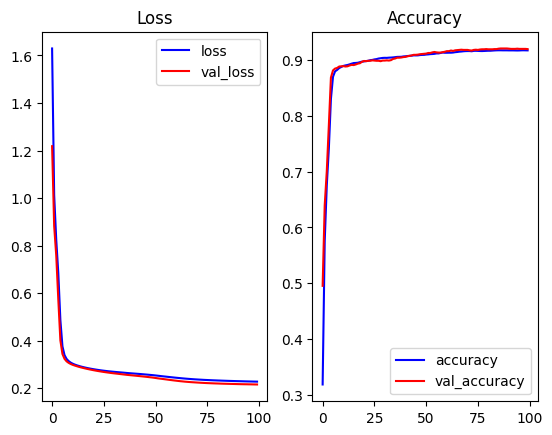

In [ ]:
model3.plot_history()

In [ ]:
prediction = model3.predict(X_test)
predictions = model3.output_layer_activation.predictions(prediction)
ab = np.argmax(prediction, axis=1)

In [ ]:
matrix = confusion_matrix(y_test, ab, num_classes)
print(f"Accuracy for Model ANN: {round(accuracy(ab,y_test),2)}%")
print('\n')
for i in range(num_classes) :
  recall_value = round(recall(matrix, i),2)
  precision_value = round(precision(matrix, i),2)
  print(f"Recall for class {i}: {recall_value * 100}%")
  print(f"Precision for class {i}: {precision_value * 100}%")
  print('\n')

Accuracy for Model ANN: 91.96%


Recall for class 0: 92.0%
Precision for class 0: 92.0%


Recall for class 1: 100.0%
Precision for class 1: 100.0%


Recall for class 2: 94.0%
Precision for class 2: 93.0%


Recall for class 3: 90.0%
Precision for class 3: 90.0%


Recall for class 4: 95.0%
Precision for class 4: 97.0%


Recall for class 5: 93.0%
Precision for class 5: 96.0%


Recall for class 6: 88.0%
Precision for class 6: 85.0%




## ANN

In [ ]:
model3.train(X_train, y_train, validation_data=(X_test, y_test),
            epochs=100, batch_size=64, print_every=170)

Training Epoch: 1/100:  10%|▉         | 34/341 [00:00<00:01, 173.07it/s]

step: 0, acc: 0.938, loss: 0.224 (data_loss: 0.224, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/100:  59%|█████▊    | 200/341 [00:00<00:00, 236.55it/s]

step: 170, acc: 0.891, loss: 0.482 (data_loss: 0.482, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/100: 100%|██████████| 341/341 [00:01<00:00, 203.97it/s]


step: 340, acc: 0.941, loss: 0.226 (data_loss: 0.226, reg_loss: 0.000), lr: 0.001
training, acc: 0.892, loss: 0.329 (data_loss: 0.329, reg_loss: 0.000), lr: 0.001
validation, acc: 0.893, loss: 0.327


Training Epoch: 2/100:   0%|          | 0/341 [00:00<?, ?it/s]

step: 0, acc: 0.938, loss: 0.208 (data_loss: 0.208, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/100:  56%|█████▌    | 190/341 [00:00<00:00, 186.60it/s]

step: 170, acc: 0.906, loss: 0.481 (data_loss: 0.481, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/100: 100%|██████████| 341/341 [00:01<00:00, 194.48it/s]


step: 340, acc: 0.941, loss: 0.223 (data_loss: 0.223, reg_loss: 0.000), lr: 0.001
training, acc: 0.895, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001
validation, acc: 0.895, loss: 0.319


Training Epoch: 3/100:   0%|          | 0/341 [00:00<?, ?it/s]

step: 0, acc: 0.938, loss: 0.204 (data_loss: 0.204, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/100:  66%|██████▌   | 224/341 [00:00<00:00, 433.86it/s]

step: 170, acc: 0.906, loss: 0.480 (data_loss: 0.480, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/100: 100%|██████████| 341/341 [00:00<00:00, 429.22it/s]


step: 340, acc: 0.941, loss: 0.217 (data_loss: 0.217, reg_loss: 0.000), lr: 0.001
training, acc: 0.898, loss: 0.313 (data_loss: 0.313, reg_loss: 0.000), lr: 0.001
validation, acc: 0.896, loss: 0.312


Training Epoch: 4/100:  19%|█▉        | 66/341 [00:00<00:00, 659.05it/s]

step: 0, acc: 0.938, loss: 0.199 (data_loss: 0.199, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/100:  80%|███████▉  | 272/341 [00:00<00:00, 676.09it/s]

step: 170, acc: 0.906, loss: 0.480 (data_loss: 0.480, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/100: 100%|██████████| 341/341 [00:00<00:00, 649.15it/s]


step: 340, acc: 0.941, loss: 0.214 (data_loss: 0.214, reg_loss: 0.000), lr: 0.001
training, acc: 0.900, loss: 0.306 (data_loss: 0.306, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.306


Training Epoch: 5/100:  22%|██▏       | 74/341 [00:00<00:00, 731.04it/s]

step: 0, acc: 0.938, loss: 0.195 (data_loss: 0.195, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/100:  85%|████████▌ | 290/341 [00:00<00:00, 690.48it/s]

step: 170, acc: 0.906, loss: 0.477 (data_loss: 0.477, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/100: 100%|██████████| 341/341 [00:00<00:00, 671.54it/s]


step: 340, acc: 0.941, loss: 0.215 (data_loss: 0.215, reg_loss: 0.000), lr: 0.001
training, acc: 0.902, loss: 0.299 (data_loss: 0.299, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.297


Training Epoch: 6/100:  21%|██        | 72/341 [00:00<00:00, 711.03it/s]

step: 0, acc: 0.938, loss: 0.192 (data_loss: 0.192, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/100:  84%|████████▍ | 287/341 [00:00<00:00, 696.56it/s]

step: 170, acc: 0.906, loss: 0.464 (data_loss: 0.464, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/100: 100%|██████████| 341/341 [00:00<00:00, 692.61it/s]


step: 340, acc: 0.941, loss: 0.211 (data_loss: 0.211, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.290


Training Epoch: 7/100:  20%|██        | 69/341 [00:00<00:00, 687.25it/s]

step: 0, acc: 0.938, loss: 0.188 (data_loss: 0.188, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/100:  83%|████████▎ | 282/341 [00:00<00:00, 697.12it/s]

step: 170, acc: 0.906, loss: 0.459 (data_loss: 0.459, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/100: 100%|██████████| 341/341 [00:00<00:00, 675.16it/s]


step: 340, acc: 0.941, loss: 0.205 (data_loss: 0.205, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.287 (data_loss: 0.287, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.285


Training Epoch: 8/100:  21%|██        | 70/341 [00:00<00:00, 692.75it/s]

step: 0, acc: 0.922, loss: 0.185 (data_loss: 0.185, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/100:  82%|████████▏ | 279/341 [00:00<00:00, 677.06it/s]

step: 170, acc: 0.906, loss: 0.453 (data_loss: 0.453, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/100: 100%|██████████| 341/341 [00:00<00:00, 675.85it/s]


step: 340, acc: 0.941, loss: 0.202 (data_loss: 0.202, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001
validation, acc: 0.904, loss: 0.281


Training Epoch: 9/100:  16%|█▌        | 55/341 [00:00<00:00, 543.07it/s]

step: 0, acc: 0.922, loss: 0.183 (data_loss: 0.183, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/100:  79%|███████▊  | 268/341 [00:00<00:00, 683.49it/s]

step: 170, acc: 0.906, loss: 0.446 (data_loss: 0.446, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/100: 100%|██████████| 341/341 [00:00<00:00, 648.26it/s]


step: 340, acc: 0.941, loss: 0.196 (data_loss: 0.196, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.276


Training Epoch: 10/100:  19%|█▉        | 64/341 [00:00<00:00, 638.51it/s]

step: 0, acc: 0.922, loss: 0.180 (data_loss: 0.180, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/100:  80%|████████  | 274/341 [00:00<00:00, 692.46it/s]

step: 170, acc: 0.906, loss: 0.440 (data_loss: 0.440, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/100: 100%|██████████| 341/341 [00:00<00:00, 659.43it/s]


step: 340, acc: 0.941, loss: 0.194 (data_loss: 0.194, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.274 (data_loss: 0.274, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.272


Training Epoch: 11/100:  21%|██        | 71/341 [00:00<00:00, 709.69it/s]

step: 0, acc: 0.922, loss: 0.177 (data_loss: 0.177, reg_loss: 0.000), lr: 0.001


Training Epoch: 11/100:  83%|████████▎ | 283/341 [00:00<00:00, 687.24it/s]

step: 170, acc: 0.922, loss: 0.436 (data_loss: 0.436, reg_loss: 0.000), lr: 0.001


Training Epoch: 11/100: 100%|██████████| 341/341 [00:00<00:00, 679.58it/s]


step: 340, acc: 0.941, loss: 0.191 (data_loss: 0.191, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.271 (data_loss: 0.271, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.269


Training Epoch: 12/100:  22%|██▏       | 75/341 [00:00<00:00, 742.95it/s]

step: 0, acc: 0.922, loss: 0.175 (data_loss: 0.175, reg_loss: 0.000), lr: 0.001


Training Epoch: 12/100:  86%|████████▌ | 293/341 [00:00<00:00, 680.20it/s]

step: 170, acc: 0.922, loss: 0.431 (data_loss: 0.431, reg_loss: 0.000), lr: 0.001


Training Epoch: 12/100: 100%|██████████| 341/341 [00:00<00:00, 680.23it/s]


step: 340, acc: 0.941, loss: 0.189 (data_loss: 0.189, reg_loss: 0.000), lr: 0.001
training, acc: 0.910, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.266


Training Epoch: 13/100:  21%|██        | 71/341 [00:00<00:00, 709.30it/s]

step: 0, acc: 0.922, loss: 0.172 (data_loss: 0.172, reg_loss: 0.000), lr: 0.001


Training Epoch: 13/100:  83%|████████▎ | 283/341 [00:00<00:00, 696.34it/s]

step: 170, acc: 0.922, loss: 0.429 (data_loss: 0.429, reg_loss: 0.000), lr: 0.001


Training Epoch: 13/100: 100%|██████████| 341/341 [00:00<00:00, 696.22it/s]


step: 340, acc: 0.941, loss: 0.188 (data_loss: 0.188, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.265 (data_loss: 0.265, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.263


Training Epoch: 14/100:  21%|██▏       | 73/341 [00:00<00:00, 722.08it/s]

step: 0, acc: 0.922, loss: 0.171 (data_loss: 0.171, reg_loss: 0.000), lr: 0.001


Training Epoch: 14/100:  84%|████████▍ | 286/341 [00:00<00:00, 674.50it/s]

step: 170, acc: 0.922, loss: 0.425 (data_loss: 0.425, reg_loss: 0.000), lr: 0.001


Training Epoch: 14/100: 100%|██████████| 341/341 [00:00<00:00, 677.42it/s]


step: 340, acc: 0.941, loss: 0.185 (data_loss: 0.185, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.262 (data_loss: 0.262, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.261


Training Epoch: 15/100:  19%|█▉        | 64/341 [00:00<00:00, 638.21it/s]

step: 0, acc: 0.922, loss: 0.169 (data_loss: 0.169, reg_loss: 0.000), lr: 0.001


Training Epoch: 15/100:  78%|███████▊  | 267/341 [00:00<00:00, 675.32it/s]

step: 170, acc: 0.922, loss: 0.423 (data_loss: 0.423, reg_loss: 0.000), lr: 0.001


Training Epoch: 15/100: 100%|██████████| 341/341 [00:00<00:00, 662.36it/s]


step: 340, acc: 0.941, loss: 0.184 (data_loss: 0.184, reg_loss: 0.000), lr: 0.001
training, acc: 0.912, loss: 0.260 (data_loss: 0.260, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.259


Training Epoch: 16/100:  20%|██        | 69/341 [00:00<00:00, 687.38it/s]

step: 0, acc: 0.922, loss: 0.168 (data_loss: 0.168, reg_loss: 0.000), lr: 0.001


Training Epoch: 16/100:  82%|████████▏ | 280/341 [00:00<00:00, 691.62it/s]

step: 170, acc: 0.922, loss: 0.421 (data_loss: 0.421, reg_loss: 0.000), lr: 0.001


Training Epoch: 16/100: 100%|██████████| 341/341 [00:00<00:00, 675.45it/s]


step: 340, acc: 0.941, loss: 0.182 (data_loss: 0.182, reg_loss: 0.000), lr: 0.001
training, acc: 0.912, loss: 0.257 (data_loss: 0.257, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.257


Training Epoch: 17/100:  20%|█▉        | 67/341 [00:00<00:00, 660.80it/s]

step: 0, acc: 0.922, loss: 0.166 (data_loss: 0.166, reg_loss: 0.000), lr: 0.001


Training Epoch: 17/100:  81%|████████  | 277/341 [00:00<00:00, 698.12it/s]

step: 170, acc: 0.922, loss: 0.417 (data_loss: 0.417, reg_loss: 0.000), lr: 0.001


Training Epoch: 17/100: 100%|██████████| 341/341 [00:00<00:00, 686.34it/s]


step: 340, acc: 0.941, loss: 0.182 (data_loss: 0.182, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.255 (data_loss: 0.255, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.256


Training Epoch: 18/100:  21%|██        | 72/341 [00:00<00:00, 718.40it/s]

step: 0, acc: 0.938, loss: 0.165 (data_loss: 0.165, reg_loss: 0.000), lr: 0.001


Training Epoch: 18/100:  83%|████████▎ | 283/341 [00:00<00:00, 673.27it/s]

step: 170, acc: 0.922, loss: 0.414 (data_loss: 0.414, reg_loss: 0.000), lr: 0.001


Training Epoch: 18/100: 100%|██████████| 341/341 [00:00<00:00, 676.93it/s]


step: 340, acc: 0.941, loss: 0.182 (data_loss: 0.182, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.253 (data_loss: 0.253, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.254


Training Epoch: 19/100:  21%|██        | 71/341 [00:00<00:00, 707.67it/s]

step: 0, acc: 0.938, loss: 0.165 (data_loss: 0.165, reg_loss: 0.000), lr: 0.001


Training Epoch: 19/100:  84%|████████▎ | 285/341 [00:00<00:00, 686.12it/s]

step: 170, acc: 0.922, loss: 0.411 (data_loss: 0.411, reg_loss: 0.000), lr: 0.001


Training Epoch: 19/100: 100%|██████████| 341/341 [00:00<00:00, 682.30it/s]


step: 340, acc: 0.941, loss: 0.181 (data_loss: 0.181, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.251 (data_loss: 0.251, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.253


Training Epoch: 20/100:  19%|█▉        | 66/341 [00:00<00:00, 657.36it/s]

step: 0, acc: 0.938, loss: 0.165 (data_loss: 0.165, reg_loss: 0.000), lr: 0.001


Training Epoch: 20/100:  82%|████████▏ | 279/341 [00:00<00:00, 704.78it/s]

step: 170, acc: 0.922, loss: 0.409 (data_loss: 0.409, reg_loss: 0.000), lr: 0.001


Training Epoch: 20/100: 100%|██████████| 341/341 [00:00<00:00, 696.69it/s]


step: 340, acc: 0.941, loss: 0.180 (data_loss: 0.180, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.250 (data_loss: 0.250, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.252


Training Epoch: 21/100:  15%|█▌        | 52/341 [00:00<00:00, 512.76it/s]

step: 0, acc: 0.938, loss: 0.166 (data_loss: 0.166, reg_loss: 0.000), lr: 0.001


Training Epoch: 21/100:  74%|███████▍  | 253/341 [00:00<00:00, 483.38it/s]

step: 170, acc: 0.922, loss: 0.409 (data_loss: 0.409, reg_loss: 0.000), lr: 0.001


Training Epoch: 21/100: 100%|██████████| 341/341 [00:00<00:00, 476.49it/s]


step: 340, acc: 0.941, loss: 0.178 (data_loss: 0.178, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.248 (data_loss: 0.248, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.250


Training Epoch: 22/100:  15%|█▌        | 52/341 [00:00<00:00, 518.58it/s]

step: 0, acc: 0.938, loss: 0.165 (data_loss: 0.165, reg_loss: 0.000), lr: 0.001


Training Epoch: 22/100:  76%|███████▌  | 259/341 [00:00<00:00, 502.82it/s]

step: 170, acc: 0.922, loss: 0.408 (data_loss: 0.408, reg_loss: 0.000), lr: 0.001


Training Epoch: 22/100: 100%|██████████| 341/341 [00:00<00:00, 495.74it/s]


step: 340, acc: 0.941, loss: 0.177 (data_loss: 0.177, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.246 (data_loss: 0.246, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.249


Training Epoch: 23/100:  12%|█▏        | 41/341 [00:00<00:00, 407.62it/s]

step: 0, acc: 0.938, loss: 0.164 (data_loss: 0.164, reg_loss: 0.000), lr: 0.001


Training Epoch: 23/100:  70%|███████   | 239/341 [00:00<00:00, 479.64it/s]

step: 170, acc: 0.922, loss: 0.407 (data_loss: 0.407, reg_loss: 0.000), lr: 0.001


Training Epoch: 23/100: 100%|██████████| 341/341 [00:00<00:00, 473.55it/s]


step: 340, acc: 0.941, loss: 0.175 (data_loss: 0.175, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.245 (data_loss: 0.245, reg_loss: 0.000), lr: 0.001
validation, acc: 0.912, loss: 0.248


Training Epoch: 24/100:  13%|█▎        | 46/341 [00:00<00:00, 459.04it/s]

step: 0, acc: 0.938, loss: 0.163 (data_loss: 0.163, reg_loss: 0.000), lr: 0.001


Training Epoch: 24/100:  70%|███████   | 240/341 [00:00<00:00, 484.15it/s]

step: 170, acc: 0.922, loss: 0.406 (data_loss: 0.406, reg_loss: 0.000), lr: 0.001


Training Epoch: 24/100: 100%|██████████| 341/341 [00:00<00:00, 483.89it/s]


step: 340, acc: 0.941, loss: 0.176 (data_loss: 0.176, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.243 (data_loss: 0.243, reg_loss: 0.000), lr: 0.001
validation, acc: 0.912, loss: 0.246


Training Epoch: 25/100:  15%|█▌        | 52/341 [00:00<00:00, 511.77it/s]

step: 0, acc: 0.938, loss: 0.164 (data_loss: 0.164, reg_loss: 0.000), lr: 0.001


Training Epoch: 25/100:  74%|███████▍  | 254/341 [00:00<00:00, 495.44it/s]

step: 170, acc: 0.922, loss: 0.406 (data_loss: 0.406, reg_loss: 0.000), lr: 0.001


Training Epoch: 25/100: 100%|██████████| 341/341 [00:00<00:00, 483.35it/s]


step: 340, acc: 0.941, loss: 0.176 (data_loss: 0.176, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.242 (data_loss: 0.242, reg_loss: 0.000), lr: 0.001
validation, acc: 0.912, loss: 0.245


Training Epoch: 26/100:  15%|█▌        | 52/341 [00:00<00:00, 513.63it/s]

step: 0, acc: 0.938, loss: 0.163 (data_loss: 0.163, reg_loss: 0.000), lr: 0.001


Training Epoch: 26/100:  76%|███████▌  | 259/341 [00:00<00:00, 507.56it/s]

step: 170, acc: 0.922, loss: 0.407 (data_loss: 0.407, reg_loss: 0.000), lr: 0.001


Training Epoch: 26/100: 100%|██████████| 341/341 [00:00<00:00, 498.10it/s]


step: 340, acc: 0.941, loss: 0.176 (data_loss: 0.176, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.240 (data_loss: 0.240, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.243


Training Epoch: 27/100:  15%|█▌        | 52/341 [00:00<00:00, 510.62it/s]

step: 0, acc: 0.938, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 27/100:  73%|███████▎  | 248/341 [00:00<00:00, 469.55it/s]

step: 170, acc: 0.922, loss: 0.407 (data_loss: 0.407, reg_loss: 0.000), lr: 0.001


Training Epoch: 27/100: 100%|██████████| 341/341 [00:00<00:00, 498.60it/s]


step: 340, acc: 0.941, loss: 0.175 (data_loss: 0.175, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.242


Training Epoch: 28/100:  19%|█▉        | 65/341 [00:00<00:00, 648.96it/s]

step: 0, acc: 0.938, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 28/100:  81%|████████  | 277/341 [00:00<00:00, 693.34it/s]

step: 170, acc: 0.922, loss: 0.406 (data_loss: 0.406, reg_loss: 0.000), lr: 0.001


Training Epoch: 28/100: 100%|██████████| 341/341 [00:00<00:00, 671.06it/s]


step: 340, acc: 0.941, loss: 0.176 (data_loss: 0.176, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.238 (data_loss: 0.238, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.241


Training Epoch: 29/100:  21%|██        | 71/341 [00:00<00:00, 704.93it/s]

step: 0, acc: 0.938, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 29/100:  84%|████████▍ | 287/341 [00:00<00:00, 706.17it/s]

step: 170, acc: 0.922, loss: 0.407 (data_loss: 0.407, reg_loss: 0.000), lr: 0.001


Training Epoch: 29/100: 100%|██████████| 341/341 [00:00<00:00, 694.03it/s]


step: 340, acc: 0.941, loss: 0.176 (data_loss: 0.176, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.237 (data_loss: 0.237, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.240


Training Epoch: 30/100:  21%|██        | 72/341 [00:00<00:00, 715.23it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 30/100:  84%|████████▎ | 285/341 [00:00<00:00, 665.95it/s]

step: 170, acc: 0.922, loss: 0.407 (data_loss: 0.407, reg_loss: 0.000), lr: 0.001


Training Epoch: 30/100: 100%|██████████| 341/341 [00:00<00:00, 678.03it/s]


step: 340, acc: 0.941, loss: 0.175 (data_loss: 0.175, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.239


Training Epoch: 31/100:  22%|██▏       | 76/341 [00:00<00:00, 751.11it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 31/100:  88%|████████▊ | 299/341 [00:00<00:00, 716.96it/s]

step: 170, acc: 0.922, loss: 0.406 (data_loss: 0.406, reg_loss: 0.000), lr: 0.001


Training Epoch: 31/100: 100%|██████████| 341/341 [00:00<00:00, 710.38it/s]


step: 340, acc: 0.941, loss: 0.174 (data_loss: 0.174, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.238


Training Epoch: 32/100:  22%|██▏       | 75/341 [00:00<00:00, 740.86it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 32/100:  86%|████████▌ | 294/341 [00:00<00:00, 698.73it/s]

step: 170, acc: 0.922, loss: 0.406 (data_loss: 0.406, reg_loss: 0.000), lr: 0.001


Training Epoch: 32/100: 100%|██████████| 341/341 [00:00<00:00, 697.39it/s]


step: 340, acc: 0.941, loss: 0.173 (data_loss: 0.173, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.238


Training Epoch: 33/100:  21%|██        | 71/341 [00:00<00:00, 702.00it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 33/100:  82%|████████▏ | 280/341 [00:00<00:00, 677.97it/s]

step: 170, acc: 0.922, loss: 0.406 (data_loss: 0.406, reg_loss: 0.000), lr: 0.001


Training Epoch: 33/100: 100%|██████████| 341/341 [00:00<00:00, 682.64it/s]


step: 340, acc: 0.941, loss: 0.173 (data_loss: 0.173, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.237


Training Epoch: 34/100:  21%|██        | 72/341 [00:00<00:00, 715.03it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 34/100:  83%|████████▎ | 283/341 [00:00<00:00, 688.80it/s]

step: 170, acc: 0.922, loss: 0.406 (data_loss: 0.406, reg_loss: 0.000), lr: 0.001


Training Epoch: 34/100: 100%|██████████| 341/341 [00:00<00:00, 690.69it/s]


step: 340, acc: 0.941, loss: 0.172 (data_loss: 0.172, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.236


Training Epoch: 35/100:  21%|██▏       | 73/341 [00:00<00:00, 726.33it/s]

step: 0, acc: 0.953, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 35/100:  86%|████████▌ | 293/341 [00:00<00:00, 715.90it/s]

step: 170, acc: 0.922, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000), lr: 0.001


Training Epoch: 35/100: 100%|██████████| 341/341 [00:00<00:00, 695.33it/s]


step: 340, acc: 0.941, loss: 0.171 (data_loss: 0.171, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.235


Training Epoch: 36/100:  21%|██        | 71/341 [00:00<00:00, 705.73it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 36/100:  83%|████████▎ | 284/341 [00:00<00:00, 667.73it/s]

step: 170, acc: 0.922, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000), lr: 0.001


Training Epoch: 36/100: 100%|██████████| 341/341 [00:00<00:00, 655.37it/s]


step: 340, acc: 0.941, loss: 0.169 (data_loss: 0.169, reg_loss: 0.000), lr: 0.001
training, acc: 0.919, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.235


Training Epoch: 37/100:  22%|██▏       | 74/341 [00:00<00:00, 735.96it/s]

step: 0, acc: 0.938, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 37/100:  85%|████████▌ | 291/341 [00:00<00:00, 702.09it/s]

step: 170, acc: 0.922, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000), lr: 0.001


Training Epoch: 37/100: 100%|██████████| 341/341 [00:00<00:00, 690.99it/s]


step: 340, acc: 0.941, loss: 0.168 (data_loss: 0.168, reg_loss: 0.000), lr: 0.001
training, acc: 0.919, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.234


Training Epoch: 38/100:  20%|█▉        | 68/341 [00:00<00:00, 671.67it/s]

step: 0, acc: 0.938, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 38/100:  83%|████████▎ | 283/341 [00:00<00:00, 711.05it/s]

step: 170, acc: 0.922, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000), lr: 0.001


Training Epoch: 38/100: 100%|██████████| 341/341 [00:00<00:00, 696.44it/s]


step: 340, acc: 0.941, loss: 0.166 (data_loss: 0.166, reg_loss: 0.000), lr: 0.001
training, acc: 0.919, loss: 0.228 (data_loss: 0.228, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.233


Training Epoch: 39/100:  18%|█▊        | 63/341 [00:00<00:00, 624.41it/s]

step: 0, acc: 0.938, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 39/100:  82%|████████▏ | 281/341 [00:00<00:00, 708.22it/s]

step: 170, acc: 0.922, loss: 0.403 (data_loss: 0.403, reg_loss: 0.000), lr: 0.001


Training Epoch: 39/100: 100%|██████████| 341/341 [00:00<00:00, 697.38it/s]


step: 340, acc: 0.941, loss: 0.163 (data_loss: 0.163, reg_loss: 0.000), lr: 0.001
training, acc: 0.919, loss: 0.227 (data_loss: 0.227, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.233


Training Epoch: 40/100:  19%|█▉        | 65/341 [00:00<00:00, 646.83it/s]

step: 0, acc: 0.938, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 40/100:  79%|███████▉  | 271/341 [00:00<00:00, 680.28it/s]

step: 170, acc: 0.922, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000), lr: 0.001


Training Epoch: 40/100: 100%|██████████| 341/341 [00:00<00:00, 664.57it/s]


step: 340, acc: 0.941, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001
training, acc: 0.920, loss: 0.227 (data_loss: 0.227, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.232


Training Epoch: 41/100:  21%|██        | 70/341 [00:00<00:00, 696.52it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 41/100:  83%|████████▎ | 282/341 [00:00<00:00, 687.27it/s]

step: 170, acc: 0.922, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000), lr: 0.001


Training Epoch: 41/100: 100%|██████████| 341/341 [00:00<00:00, 649.99it/s]


step: 340, acc: 0.941, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001
training, acc: 0.920, loss: 0.226 (data_loss: 0.226, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.232


Training Epoch: 42/100:  21%|██        | 72/341 [00:00<00:00, 712.62it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 42/100:  84%|████████▍ | 287/341 [00:00<00:00, 697.53it/s]

step: 170, acc: 0.922, loss: 0.402 (data_loss: 0.402, reg_loss: 0.000), lr: 0.001


Training Epoch: 42/100: 100%|██████████| 341/341 [00:00<00:00, 676.18it/s]


step: 340, acc: 0.941, loss: 0.157 (data_loss: 0.157, reg_loss: 0.000), lr: 0.001
training, acc: 0.920, loss: 0.225 (data_loss: 0.225, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.231


Training Epoch: 43/100:  21%|██        | 72/341 [00:00<00:00, 710.99it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 43/100:  84%|████████▍ | 287/341 [00:00<00:00, 669.20it/s]

step: 170, acc: 0.906, loss: 0.404 (data_loss: 0.404, reg_loss: 0.000), lr: 0.001


Training Epoch: 43/100: 100%|██████████| 341/341 [00:00<00:00, 667.56it/s]


step: 340, acc: 0.941, loss: 0.155 (data_loss: 0.155, reg_loss: 0.000), lr: 0.001
training, acc: 0.920, loss: 0.224 (data_loss: 0.224, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.231


Training Epoch: 44/100:  21%|██▏       | 73/341 [00:00<00:00, 723.34it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 44/100:  85%|████████▌ | 291/341 [00:00<00:00, 695.66it/s]

step: 170, acc: 0.922, loss: 0.403 (data_loss: 0.403, reg_loss: 0.000), lr: 0.001


Training Epoch: 44/100: 100%|██████████| 341/341 [00:00<00:00, 692.17it/s]


step: 340, acc: 0.941, loss: 0.153 (data_loss: 0.153, reg_loss: 0.000), lr: 0.001
training, acc: 0.920, loss: 0.224 (data_loss: 0.224, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.231


Training Epoch: 45/100:  20%|██        | 69/341 [00:00<00:00, 688.72it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 45/100:  82%|████████▏ | 280/341 [00:00<00:00, 667.23it/s]

step: 170, acc: 0.906, loss: 0.404 (data_loss: 0.404, reg_loss: 0.000), lr: 0.001


Training Epoch: 45/100: 100%|██████████| 341/341 [00:00<00:00, 659.35it/s]


step: 340, acc: 0.941, loss: 0.150 (data_loss: 0.150, reg_loss: 0.000), lr: 0.001
training, acc: 0.921, loss: 0.223 (data_loss: 0.223, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.230


Training Epoch: 46/100:  14%|█▍        | 49/341 [00:00<00:00, 489.90it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 46/100:  73%|███████▎  | 250/341 [00:00<00:00, 476.06it/s]

step: 170, acc: 0.906, loss: 0.403 (data_loss: 0.403, reg_loss: 0.000), lr: 0.001


Training Epoch: 46/100: 100%|██████████| 341/341 [00:00<00:00, 482.29it/s]


step: 340, acc: 0.941, loss: 0.149 (data_loss: 0.149, reg_loss: 0.000), lr: 0.001
training, acc: 0.920, loss: 0.223 (data_loss: 0.223, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.230


Training Epoch: 47/100:  13%|█▎        | 44/341 [00:00<00:00, 434.73it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 47/100:  71%|███████   | 241/341 [00:00<00:00, 467.32it/s]

step: 170, acc: 0.906, loss: 0.403 (data_loss: 0.403, reg_loss: 0.000), lr: 0.001


Training Epoch: 47/100: 100%|██████████| 341/341 [00:00<00:00, 461.70it/s]


step: 340, acc: 0.941, loss: 0.148 (data_loss: 0.148, reg_loss: 0.000), lr: 0.001
training, acc: 0.921, loss: 0.222 (data_loss: 0.222, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.230


Training Epoch: 48/100:  13%|█▎        | 44/341 [00:00<00:00, 438.15it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 48/100:  70%|██████▉   | 237/341 [00:00<00:00, 469.81it/s]

step: 170, acc: 0.906, loss: 0.402 (data_loss: 0.402, reg_loss: 0.000), lr: 0.001


Training Epoch: 48/100: 100%|██████████| 341/341 [00:00<00:00, 464.06it/s]


step: 340, acc: 0.941, loss: 0.148 (data_loss: 0.148, reg_loss: 0.000), lr: 0.001
training, acc: 0.921, loss: 0.222 (data_loss: 0.222, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.230


Training Epoch: 49/100:  14%|█▍        | 47/341 [00:00<00:00, 464.98it/s]

step: 0, acc: 0.953, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 49/100:  74%|███████▍  | 252/341 [00:00<00:00, 492.74it/s]

step: 170, acc: 0.906, loss: 0.403 (data_loss: 0.403, reg_loss: 0.000), lr: 0.001


Training Epoch: 49/100: 100%|██████████| 341/341 [00:00<00:00, 492.79it/s]


step: 340, acc: 0.941, loss: 0.146 (data_loss: 0.146, reg_loss: 0.000), lr: 0.001
training, acc: 0.921, loss: 0.221 (data_loss: 0.221, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.229


Training Epoch: 50/100:  14%|█▍        | 49/341 [00:00<00:00, 488.23it/s]

step: 0, acc: 0.953, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 50/100:  72%|███████▏  | 247/341 [00:00<00:00, 454.96it/s]

step: 170, acc: 0.906, loss: 0.403 (data_loss: 0.403, reg_loss: 0.000), lr: 0.001


Training Epoch: 50/100: 100%|██████████| 341/341 [00:00<00:00, 461.10it/s]


step: 340, acc: 0.941, loss: 0.145 (data_loss: 0.145, reg_loss: 0.000), lr: 0.001
training, acc: 0.922, loss: 0.221 (data_loss: 0.221, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.228


Training Epoch: 51/100:  14%|█▍        | 49/341 [00:00<00:00, 486.61it/s]

step: 0, acc: 0.953, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 51/100:  73%|███████▎  | 248/341 [00:00<00:00, 487.28it/s]

step: 170, acc: 0.906, loss: 0.402 (data_loss: 0.402, reg_loss: 0.000), lr: 0.001


Training Epoch: 51/100: 100%|██████████| 341/341 [00:00<00:00, 489.40it/s]


step: 340, acc: 0.941, loss: 0.145 (data_loss: 0.145, reg_loss: 0.000), lr: 0.001
training, acc: 0.922, loss: 0.220 (data_loss: 0.220, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.228


Training Epoch: 52/100:  13%|█▎        | 45/341 [00:00<00:00, 441.38it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 52/100:  67%|██████▋   | 228/341 [00:00<00:00, 433.87it/s]

step: 170, acc: 0.906, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 52/100: 100%|██████████| 341/341 [00:00<00:00, 445.86it/s]


step: 340, acc: 0.941, loss: 0.144 (data_loss: 0.144, reg_loss: 0.000), lr: 0.001
training, acc: 0.922, loss: 0.220 (data_loss: 0.220, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.228


Training Epoch: 53/100:  20%|██        | 69/341 [00:00<00:00, 685.47it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 53/100:  82%|████████▏ | 281/341 [00:00<00:00, 687.52it/s]

step: 170, acc: 0.906, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 53/100: 100%|██████████| 341/341 [00:00<00:00, 687.32it/s]


step: 340, acc: 0.941, loss: 0.143 (data_loss: 0.143, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.219 (data_loss: 0.219, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.228


Training Epoch: 54/100:  19%|█▉        | 66/341 [00:00<00:00, 652.09it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 54/100:  82%|████████▏ | 278/341 [00:00<00:00, 697.04it/s]

step: 170, acc: 0.906, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 54/100: 100%|██████████| 341/341 [00:00<00:00, 682.62it/s]


step: 340, acc: 0.941, loss: 0.141 (data_loss: 0.141, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.219 (data_loss: 0.219, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.228


Training Epoch: 55/100:  20%|█▉        | 68/341 [00:00<00:00, 676.10it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 55/100:  80%|████████  | 273/341 [00:00<00:00, 671.60it/s]

step: 170, acc: 0.906, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 55/100: 100%|██████████| 341/341 [00:00<00:00, 661.48it/s]


step: 340, acc: 0.941, loss: 0.139 (data_loss: 0.139, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.218 (data_loss: 0.218, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.227


Training Epoch: 56/100:  20%|██        | 69/341 [00:00<00:00, 686.66it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 56/100:  83%|████████▎ | 283/341 [00:00<00:00, 699.71it/s]

step: 170, acc: 0.906, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 56/100: 100%|██████████| 341/341 [00:00<00:00, 695.64it/s]


step: 340, acc: 0.941, loss: 0.137 (data_loss: 0.137, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.218 (data_loss: 0.218, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.227


Training Epoch: 57/100:  21%|██        | 71/341 [00:00<00:00, 707.41it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 57/100:  84%|████████▍ | 287/341 [00:00<00:00, 686.71it/s]

step: 170, acc: 0.906, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 57/100: 100%|██████████| 341/341 [00:00<00:00, 681.31it/s]


step: 340, acc: 0.941, loss: 0.138 (data_loss: 0.138, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.218 (data_loss: 0.218, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.227


Training Epoch: 58/100:  21%|██        | 72/341 [00:00<00:00, 712.90it/s]

step: 0, acc: 0.953, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 58/100:  84%|████████▎ | 285/341 [00:00<00:00, 686.78it/s]

step: 170, acc: 0.906, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 58/100: 100%|██████████| 341/341 [00:00<00:00, 682.15it/s]


step: 340, acc: 0.941, loss: 0.135 (data_loss: 0.135, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.217 (data_loss: 0.217, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.227


Training Epoch: 59/100:  20%|█▉        | 67/341 [00:00<00:00, 666.43it/s]

step: 0, acc: 0.953, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 59/100:  81%|████████  | 275/341 [00:00<00:00, 677.68it/s]

step: 170, acc: 0.906, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 59/100: 100%|██████████| 341/341 [00:00<00:00, 679.62it/s]


step: 340, acc: 0.941, loss: 0.136 (data_loss: 0.136, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.217 (data_loss: 0.217, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.227


Training Epoch: 60/100:  21%|██        | 70/341 [00:00<00:00, 698.90it/s]

step: 0, acc: 0.953, loss: 0.163 (data_loss: 0.163, reg_loss: 0.000), lr: 0.001


Training Epoch: 60/100:  82%|████████▏ | 278/341 [00:00<00:00, 678.99it/s]

step: 170, acc: 0.906, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 60/100: 100%|██████████| 341/341 [00:00<00:00, 677.59it/s]


step: 340, acc: 0.941, loss: 0.134 (data_loss: 0.134, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.216 (data_loss: 0.216, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.226


Training Epoch: 61/100:  21%|██        | 71/341 [00:00<00:00, 703.02it/s]

step: 0, acc: 0.953, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 61/100:  83%|████████▎ | 282/341 [00:00<00:00, 685.24it/s]

step: 170, acc: 0.906, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 61/100: 100%|██████████| 341/341 [00:00<00:00, 675.92it/s]


step: 340, acc: 0.941, loss: 0.132 (data_loss: 0.132, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.216 (data_loss: 0.216, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.226


Training Epoch: 62/100:  20%|██        | 69/341 [00:00<00:00, 689.49it/s]

step: 0, acc: 0.953, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 62/100:  84%|████████▎ | 285/341 [00:00<00:00, 712.16it/s]

step: 170, acc: 0.906, loss: 0.402 (data_loss: 0.402, reg_loss: 0.000), lr: 0.001


Training Epoch: 62/100: 100%|██████████| 341/341 [00:00<00:00, 694.29it/s]


step: 340, acc: 0.941, loss: 0.133 (data_loss: 0.133, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.216 (data_loss: 0.216, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.226


Training Epoch: 63/100:  21%|██▏       | 73/341 [00:00<00:00, 729.92it/s]

step: 0, acc: 0.953, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 63/100:  84%|████████▍ | 287/341 [00:00<00:00, 684.82it/s]

step: 170, acc: 0.906, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 63/100: 100%|██████████| 341/341 [00:00<00:00, 674.20it/s]


step: 340, acc: 0.941, loss: 0.131 (data_loss: 0.131, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.215 (data_loss: 0.215, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.226


Training Epoch: 64/100:  21%|██        | 71/341 [00:00<00:00, 702.26it/s]

step: 0, acc: 0.953, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 64/100:  84%|████████▍ | 287/341 [00:00<00:00, 711.53it/s]

step: 170, acc: 0.906, loss: 0.402 (data_loss: 0.402, reg_loss: 0.000), lr: 0.001


Training Epoch: 64/100: 100%|██████████| 341/341 [00:00<00:00, 700.19it/s]


step: 340, acc: 0.941, loss: 0.129 (data_loss: 0.129, reg_loss: 0.000), lr: 0.001
training, acc: 0.923, loss: 0.215 (data_loss: 0.215, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.225


Training Epoch: 65/100:  18%|█▊        | 60/341 [00:00<00:00, 594.19it/s]

step: 0, acc: 0.953, loss: 0.162 (data_loss: 0.162, reg_loss: 0.000), lr: 0.001


Training Epoch: 65/100:  79%|███████▉  | 270/341 [00:00<00:00, 688.12it/s]

step: 170, acc: 0.906, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 65/100: 100%|██████████| 341/341 [00:00<00:00, 660.56it/s]


step: 340, acc: 0.941, loss: 0.130 (data_loss: 0.130, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.214 (data_loss: 0.214, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.225


Training Epoch: 66/100:  20%|█▉        | 67/341 [00:00<00:00, 661.91it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 66/100:  80%|████████  | 273/341 [00:00<00:00, 662.48it/s]

step: 170, acc: 0.906, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 66/100: 100%|██████████| 341/341 [00:00<00:00, 626.02it/s]


step: 340, acc: 0.941, loss: 0.128 (data_loss: 0.128, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.214 (data_loss: 0.214, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.225


Training Epoch: 67/100:  17%|█▋        | 59/341 [00:00<00:00, 586.69it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 67/100:  77%|███████▋  | 261/341 [00:00<00:00, 667.28it/s]

step: 170, acc: 0.906, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 67/100: 100%|██████████| 341/341 [00:00<00:00, 646.70it/s]


step: 340, acc: 0.941, loss: 0.128 (data_loss: 0.128, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.214 (data_loss: 0.214, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.225


Training Epoch: 68/100:  21%|██        | 72/341 [00:00<00:00, 718.40it/s]

step: 0, acc: 0.953, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001


Training Epoch: 68/100:  82%|████████▏ | 280/341 [00:00<00:00, 662.81it/s]

step: 170, acc: 0.906, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 68/100: 100%|██████████| 341/341 [00:00<00:00, 674.46it/s]


step: 340, acc: 0.941, loss: 0.126 (data_loss: 0.126, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.213 (data_loss: 0.213, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.225


Training Epoch: 69/100:  22%|██▏       | 74/341 [00:00<00:00, 732.56it/s]

step: 0, acc: 0.953, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 69/100:  85%|████████▌ | 290/341 [00:00<00:00, 687.79it/s]

step: 170, acc: 0.906, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 69/100: 100%|██████████| 341/341 [00:00<00:00, 689.68it/s]


step: 340, acc: 0.941, loss: 0.125 (data_loss: 0.125, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.213 (data_loss: 0.213, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.225


Training Epoch: 70/100:  20%|█▉        | 68/341 [00:00<00:00, 678.68it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 70/100:  82%|████████▏ | 278/341 [00:00<00:00, 687.53it/s]

step: 170, acc: 0.906, loss: 0.399 (data_loss: 0.399, reg_loss: 0.000), lr: 0.001


Training Epoch: 70/100: 100%|██████████| 341/341 [00:00<00:00, 667.18it/s]


step: 340, acc: 0.941, loss: 0.123 (data_loss: 0.123, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.213 (data_loss: 0.213, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.224


Training Epoch: 71/100:  15%|█▍        | 50/341 [00:00<00:00, 495.57it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 71/100:  73%|███████▎  | 248/341 [00:00<00:00, 472.17it/s]

step: 170, acc: 0.906, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 71/100: 100%|██████████| 341/341 [00:00<00:00, 474.86it/s]


step: 340, acc: 0.941, loss: 0.122 (data_loss: 0.122, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.212 (data_loss: 0.212, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.224


Training Epoch: 72/100:  12%|█▏        | 40/341 [00:00<00:00, 398.96it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 72/100:  70%|███████   | 239/341 [00:00<00:00, 485.96it/s]

step: 170, acc: 0.906, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 72/100: 100%|██████████| 341/341 [00:00<00:00, 475.54it/s]


step: 340, acc: 0.941, loss: 0.121 (data_loss: 0.121, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.212 (data_loss: 0.212, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.224


Training Epoch: 73/100:  15%|█▍        | 50/341 [00:00<00:00, 493.34it/s]

step: 0, acc: 0.953, loss: 0.158 (data_loss: 0.158, reg_loss: 0.000), lr: 0.001


Training Epoch: 73/100:  73%|███████▎  | 248/341 [00:00<00:00, 481.27it/s]

step: 170, acc: 0.906, loss: 0.398 (data_loss: 0.398, reg_loss: 0.000), lr: 0.001


Training Epoch: 73/100: 100%|██████████| 341/341 [00:00<00:00, 482.49it/s]


step: 340, acc: 0.941, loss: 0.120 (data_loss: 0.120, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.212 (data_loss: 0.212, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.224


Training Epoch: 74/100:  11%|█▏        | 39/341 [00:00<00:00, 388.61it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 74/100:  66%|██████▌   | 224/341 [00:00<00:00, 457.76it/s]

step: 170, acc: 0.906, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001


Training Epoch: 74/100: 100%|██████████| 341/341 [00:00<00:00, 449.58it/s]


step: 340, acc: 0.941, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.212 (data_loss: 0.212, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.223


Training Epoch: 75/100:  14%|█▍        | 49/341 [00:00<00:00, 481.64it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 75/100:  70%|███████   | 239/341 [00:00<00:00, 445.35it/s]

step: 170, acc: 0.906, loss: 0.398 (data_loss: 0.398, reg_loss: 0.000), lr: 0.001


Training Epoch: 75/100: 100%|██████████| 341/341 [00:00<00:00, 456.55it/s]


step: 340, acc: 0.941, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.211 (data_loss: 0.211, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.223


Training Epoch: 76/100:  13%|█▎        | 46/341 [00:00<00:00, 457.16it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 76/100:  70%|███████   | 240/341 [00:00<00:00, 480.37it/s]

step: 170, acc: 0.906, loss: 0.398 (data_loss: 0.398, reg_loss: 0.000), lr: 0.001


Training Epoch: 76/100: 100%|██████████| 341/341 [00:00<00:00, 454.02it/s]


step: 340, acc: 0.941, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.211 (data_loss: 0.211, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.223


Training Epoch: 77/100:  13%|█▎        | 44/341 [00:00<00:00, 435.87it/s]

step: 0, acc: 0.953, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 77/100:  68%|██████▊   | 231/341 [00:00<00:00, 461.83it/s]

step: 170, acc: 0.906, loss: 0.397 (data_loss: 0.397, reg_loss: 0.000), lr: 0.001


Training Epoch: 77/100: 100%|██████████| 341/341 [00:00<00:00, 503.65it/s]


step: 340, acc: 0.941, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.211 (data_loss: 0.211, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.223


Training Epoch: 78/100:  18%|█▊        | 60/341 [00:00<00:00, 597.88it/s]

step: 0, acc: 0.953, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 78/100:  79%|███████▉  | 271/341 [00:00<00:00, 688.51it/s]

step: 170, acc: 0.906, loss: 0.399 (data_loss: 0.399, reg_loss: 0.000), lr: 0.001


Training Epoch: 78/100: 100%|██████████| 341/341 [00:00<00:00, 647.69it/s]


step: 340, acc: 0.941, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.210 (data_loss: 0.210, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.223


Training Epoch: 79/100:  19%|█▉        | 66/341 [00:00<00:00, 653.75it/s]

step: 0, acc: 0.953, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 79/100:  79%|███████▉  | 271/341 [00:00<00:00, 646.39it/s]

step: 170, acc: 0.906, loss: 0.397 (data_loss: 0.397, reg_loss: 0.000), lr: 0.001


Training Epoch: 79/100: 100%|██████████| 341/341 [00:00<00:00, 647.51it/s]


step: 340, acc: 0.941, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.210 (data_loss: 0.210, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.223


Training Epoch: 80/100:  21%|██        | 70/341 [00:00<00:00, 696.19it/s]

step: 0, acc: 0.953, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001


Training Epoch: 80/100:  81%|████████  | 277/341 [00:00<00:00, 628.87it/s]

step: 170, acc: 0.906, loss: 0.397 (data_loss: 0.397, reg_loss: 0.000), lr: 0.001


Training Epoch: 80/100: 100%|██████████| 341/341 [00:00<00:00, 651.10it/s]


step: 340, acc: 0.941, loss: 0.114 (data_loss: 0.114, reg_loss: 0.000), lr: 0.001
training, acc: 0.925, loss: 0.210 (data_loss: 0.210, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.223


Training Epoch: 81/100:  18%|█▊        | 60/341 [00:00<00:00, 597.35it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 81/100:  79%|███████▉  | 269/341 [00:00<00:00, 684.07it/s]

step: 170, acc: 0.906, loss: 0.398 (data_loss: 0.398, reg_loss: 0.000), lr: 0.001


Training Epoch: 81/100: 100%|██████████| 341/341 [00:00<00:00, 648.48it/s]


step: 340, acc: 0.941, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.924, loss: 0.209 (data_loss: 0.209, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.222


Training Epoch: 82/100:  17%|█▋        | 57/341 [00:00<00:00, 567.22it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 82/100:  73%|███████▎  | 248/341 [00:00<00:00, 632.49it/s]

step: 170, acc: 0.906, loss: 0.397 (data_loss: 0.397, reg_loss: 0.000), lr: 0.001


Training Epoch: 82/100: 100%|██████████| 341/341 [00:00<00:00, 625.11it/s]


step: 340, acc: 0.941, loss: 0.112 (data_loss: 0.112, reg_loss: 0.000), lr: 0.001
training, acc: 0.925, loss: 0.209 (data_loss: 0.209, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.222


Training Epoch: 83/100:  19%|█▉        | 64/341 [00:00<00:00, 622.52it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 83/100:  79%|███████▉  | 270/341 [00:00<00:00, 680.08it/s]

step: 170, acc: 0.906, loss: 0.396 (data_loss: 0.396, reg_loss: 0.000), lr: 0.001


Training Epoch: 83/100: 100%|██████████| 341/341 [00:00<00:00, 659.81it/s]


step: 340, acc: 0.941, loss: 0.110 (data_loss: 0.110, reg_loss: 0.000), lr: 0.001
training, acc: 0.925, loss: 0.209 (data_loss: 0.209, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.222


Training Epoch: 84/100:  17%|█▋        | 57/341 [00:00<00:00, 559.68it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 84/100:  75%|███████▌  | 257/341 [00:00<00:00, 650.10it/s]

step: 170, acc: 0.906, loss: 0.397 (data_loss: 0.397, reg_loss: 0.000), lr: 0.001


Training Epoch: 84/100: 100%|██████████| 341/341 [00:00<00:00, 633.41it/s]


step: 340, acc: 0.941, loss: 0.110 (data_loss: 0.110, reg_loss: 0.000), lr: 0.001
training, acc: 0.925, loss: 0.209 (data_loss: 0.209, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.222


Training Epoch: 85/100:  20%|██        | 69/341 [00:00<00:00, 687.34it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 85/100:  82%|████████▏ | 278/341 [00:00<00:00, 690.93it/s]

step: 170, acc: 0.906, loss: 0.397 (data_loss: 0.397, reg_loss: 0.000), lr: 0.001


Training Epoch: 85/100: 100%|██████████| 341/341 [00:00<00:00, 684.73it/s]


step: 340, acc: 0.941, loss: 0.109 (data_loss: 0.109, reg_loss: 0.000), lr: 0.001
training, acc: 0.925, loss: 0.208 (data_loss: 0.208, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.222


Training Epoch: 86/100:  21%|██        | 71/341 [00:00<00:00, 702.96it/s]

step: 0, acc: 0.953, loss: 0.159 (data_loss: 0.159, reg_loss: 0.000), lr: 0.001


Training Epoch: 86/100:  84%|████████▎ | 285/341 [00:00<00:00, 701.72it/s]

step: 170, acc: 0.906, loss: 0.396 (data_loss: 0.396, reg_loss: 0.000), lr: 0.001


Training Epoch: 86/100: 100%|██████████| 341/341 [00:00<00:00, 688.63it/s]


step: 340, acc: 0.941, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.925, loss: 0.208 (data_loss: 0.208, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.222


Training Epoch: 87/100:  20%|█▉        | 67/341 [00:00<00:00, 666.68it/s]

step: 0, acc: 0.953, loss: 0.158 (data_loss: 0.158, reg_loss: 0.000), lr: 0.001


Training Epoch: 87/100:  79%|███████▉  | 269/341 [00:00<00:00, 666.55it/s]

step: 170, acc: 0.906, loss: 0.395 (data_loss: 0.395, reg_loss: 0.000), lr: 0.001


Training Epoch: 87/100: 100%|██████████| 341/341 [00:00<00:00, 641.39it/s]


step: 340, acc: 0.941, loss: 0.108 (data_loss: 0.108, reg_loss: 0.000), lr: 0.001
training, acc: 0.925, loss: 0.208 (data_loss: 0.208, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.221


Training Epoch: 88/100:  18%|█▊        | 61/341 [00:00<00:00, 607.36it/s]

step: 0, acc: 0.953, loss: 0.158 (data_loss: 0.158, reg_loss: 0.000), lr: 0.001


Training Epoch: 88/100:  79%|███████▉  | 269/341 [00:00<00:00, 682.50it/s]

step: 170, acc: 0.906, loss: 0.395 (data_loss: 0.395, reg_loss: 0.000), lr: 0.001


Training Epoch: 88/100: 100%|██████████| 341/341 [00:00<00:00, 650.94it/s]


step: 340, acc: 0.941, loss: 0.107 (data_loss: 0.107, reg_loss: 0.000), lr: 0.001
training, acc: 0.925, loss: 0.208 (data_loss: 0.208, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.221


Training Epoch: 89/100:  19%|█▉        | 66/341 [00:00<00:00, 659.83it/s]

step: 0, acc: 0.953, loss: 0.158 (data_loss: 0.158, reg_loss: 0.000), lr: 0.001


Training Epoch: 89/100:  78%|███████▊  | 266/341 [00:00<00:00, 628.80it/s]

step: 170, acc: 0.906, loss: 0.395 (data_loss: 0.395, reg_loss: 0.000), lr: 0.001


Training Epoch: 89/100: 100%|██████████| 341/341 [00:00<00:00, 638.28it/s]


step: 340, acc: 0.941, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.925, loss: 0.207 (data_loss: 0.207, reg_loss: 0.000), lr: 0.001
validation, acc: 0.922, loss: 0.221


Training Epoch: 90/100:  19%|█▉        | 64/341 [00:00<00:00, 632.97it/s]

step: 0, acc: 0.953, loss: 0.158 (data_loss: 0.158, reg_loss: 0.000), lr: 0.001


Training Epoch: 90/100:  78%|███████▊  | 267/341 [00:00<00:00, 668.90it/s]

step: 170, acc: 0.906, loss: 0.395 (data_loss: 0.395, reg_loss: 0.000), lr: 0.001


Training Epoch: 90/100: 100%|██████████| 341/341 [00:00<00:00, 654.18it/s]


step: 340, acc: 0.941, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.001
training, acc: 0.925, loss: 0.207 (data_loss: 0.207, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.221


Training Epoch: 91/100:  18%|█▊        | 62/341 [00:00<00:00, 616.48it/s]

step: 0, acc: 0.953, loss: 0.158 (data_loss: 0.158, reg_loss: 0.000), lr: 0.001


Training Epoch: 91/100:  76%|███████▌  | 260/341 [00:00<00:00, 658.33it/s]

step: 170, acc: 0.906, loss: 0.394 (data_loss: 0.394, reg_loss: 0.000), lr: 0.001


Training Epoch: 91/100: 100%|██████████| 341/341 [00:00<00:00, 640.07it/s]


step: 340, acc: 0.941, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.001
training, acc: 0.926, loss: 0.207 (data_loss: 0.207, reg_loss: 0.000), lr: 0.001
validation, acc: 0.922, loss: 0.220


Training Epoch: 92/100:  20%|█▉        | 67/341 [00:00<00:00, 667.30it/s]

step: 0, acc: 0.953, loss: 0.158 (data_loss: 0.158, reg_loss: 0.000), lr: 0.001


Training Epoch: 92/100:  80%|████████  | 273/341 [00:00<00:00, 678.80it/s]

step: 170, acc: 0.906, loss: 0.394 (data_loss: 0.394, reg_loss: 0.000), lr: 0.001


Training Epoch: 92/100: 100%|██████████| 341/341 [00:00<00:00, 667.93it/s]


step: 340, acc: 0.941, loss: 0.104 (data_loss: 0.104, reg_loss: 0.000), lr: 0.001
training, acc: 0.926, loss: 0.206 (data_loss: 0.206, reg_loss: 0.000), lr: 0.001
validation, acc: 0.922, loss: 0.220


Training Epoch: 93/100:  19%|█▉        | 64/341 [00:00<00:00, 633.48it/s]

step: 0, acc: 0.953, loss: 0.156 (data_loss: 0.156, reg_loss: 0.000), lr: 0.001


Training Epoch: 93/100:  79%|███████▉  | 270/341 [00:00<00:00, 679.11it/s]

step: 170, acc: 0.906, loss: 0.393 (data_loss: 0.393, reg_loss: 0.000), lr: 0.001


Training Epoch: 93/100: 100%|██████████| 341/341 [00:00<00:00, 657.03it/s]


step: 340, acc: 0.941, loss: 0.103 (data_loss: 0.103, reg_loss: 0.000), lr: 0.001
training, acc: 0.926, loss: 0.206 (data_loss: 0.206, reg_loss: 0.000), lr: 0.001
validation, acc: 0.922, loss: 0.220


Training Epoch: 94/100:  20%|█▉        | 67/341 [00:00<00:00, 664.20it/s]

step: 0, acc: 0.953, loss: 0.156 (data_loss: 0.156, reg_loss: 0.000), lr: 0.001


Training Epoch: 94/100:  82%|████████▏ | 279/341 [00:00<00:00, 701.29it/s]

step: 170, acc: 0.906, loss: 0.392 (data_loss: 0.392, reg_loss: 0.000), lr: 0.001


Training Epoch: 94/100: 100%|██████████| 341/341 [00:00<00:00, 673.01it/s]


step: 340, acc: 0.941, loss: 0.103 (data_loss: 0.103, reg_loss: 0.000), lr: 0.001
training, acc: 0.926, loss: 0.206 (data_loss: 0.206, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.220


Training Epoch: 95/100:  15%|█▌        | 52/341 [00:00<00:00, 514.01it/s]

step: 0, acc: 0.953, loss: 0.156 (data_loss: 0.156, reg_loss: 0.000), lr: 0.001


Training Epoch: 95/100:  73%|███████▎  | 248/341 [00:00<00:00, 464.87it/s]

step: 170, acc: 0.906, loss: 0.392 (data_loss: 0.392, reg_loss: 0.000), lr: 0.001


Training Epoch: 95/100: 100%|██████████| 341/341 [00:00<00:00, 473.89it/s]


step: 340, acc: 0.941, loss: 0.102 (data_loss: 0.102, reg_loss: 0.000), lr: 0.001
training, acc: 0.926, loss: 0.206 (data_loss: 0.206, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.220


Training Epoch: 96/100:  13%|█▎        | 46/341 [00:00<00:00, 451.94it/s]

step: 0, acc: 0.953, loss: 0.156 (data_loss: 0.156, reg_loss: 0.000), lr: 0.001


Training Epoch: 96/100:  71%|███████   | 241/341 [00:00<00:00, 472.72it/s]

step: 170, acc: 0.906, loss: 0.391 (data_loss: 0.391, reg_loss: 0.000), lr: 0.001


Training Epoch: 96/100: 100%|██████████| 341/341 [00:00<00:00, 467.25it/s]


step: 340, acc: 0.941, loss: 0.102 (data_loss: 0.102, reg_loss: 0.000), lr: 0.001
training, acc: 0.926, loss: 0.206 (data_loss: 0.206, reg_loss: 0.000), lr: 0.001
validation, acc: 0.922, loss: 0.220


Training Epoch: 97/100:  14%|█▍        | 47/341 [00:00<00:00, 463.13it/s]

step: 0, acc: 0.953, loss: 0.156 (data_loss: 0.156, reg_loss: 0.000), lr: 0.001


Training Epoch: 97/100:  73%|███████▎  | 248/341 [00:00<00:00, 494.96it/s]

step: 170, acc: 0.906, loss: 0.392 (data_loss: 0.392, reg_loss: 0.000), lr: 0.001


Training Epoch: 97/100: 100%|██████████| 341/341 [00:00<00:00, 459.32it/s]


step: 340, acc: 0.941, loss: 0.101 (data_loss: 0.101, reg_loss: 0.000), lr: 0.001
training, acc: 0.926, loss: 0.205 (data_loss: 0.205, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.219


Training Epoch: 98/100:  15%|█▍        | 50/341 [00:00<00:00, 497.23it/s]

step: 0, acc: 0.953, loss: 0.155 (data_loss: 0.155, reg_loss: 0.000), lr: 0.001


Training Epoch: 98/100:  72%|███████▏  | 245/341 [00:00<00:00, 468.62it/s]

step: 170, acc: 0.906, loss: 0.391 (data_loss: 0.391, reg_loss: 0.000), lr: 0.001


Training Epoch: 98/100: 100%|██████████| 341/341 [00:00<00:00, 469.13it/s]


step: 340, acc: 0.941, loss: 0.099 (data_loss: 0.099, reg_loss: 0.000), lr: 0.001
training, acc: 0.927, loss: 0.205 (data_loss: 0.205, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.219


Training Epoch: 99/100:  13%|█▎        | 43/341 [00:00<00:00, 423.60it/s]

step: 0, acc: 0.953, loss: 0.153 (data_loss: 0.153, reg_loss: 0.000), lr: 0.001


Training Epoch: 99/100:  66%|██████▋   | 226/341 [00:00<00:00, 438.38it/s]

step: 170, acc: 0.906, loss: 0.391 (data_loss: 0.391, reg_loss: 0.000), lr: 0.001


Training Epoch: 99/100: 100%|██████████| 341/341 [00:00<00:00, 423.42it/s]


step: 340, acc: 0.941, loss: 0.100 (data_loss: 0.100, reg_loss: 0.000), lr: 0.001
training, acc: 0.926, loss: 0.205 (data_loss: 0.205, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.219


Training Epoch: 100/100:  12%|█▏        | 42/341 [00:00<00:00, 415.64it/s]

step: 0, acc: 0.953, loss: 0.153 (data_loss: 0.153, reg_loss: 0.000), lr: 0.001


Training Epoch: 100/100:  69%|██████▉   | 236/341 [00:00<00:00, 476.20it/s]

step: 170, acc: 0.906, loss: 0.391 (data_loss: 0.391, reg_loss: 0.000), lr: 0.001


Training Epoch: 100/100: 100%|██████████| 341/341 [00:00<00:00, 453.15it/s]

step: 340, acc: 0.941, loss: 0.098 (data_loss: 0.098, reg_loss: 0.000), lr: 0.001
training, acc: 0.926, loss: 0.204 (data_loss: 0.204, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.219


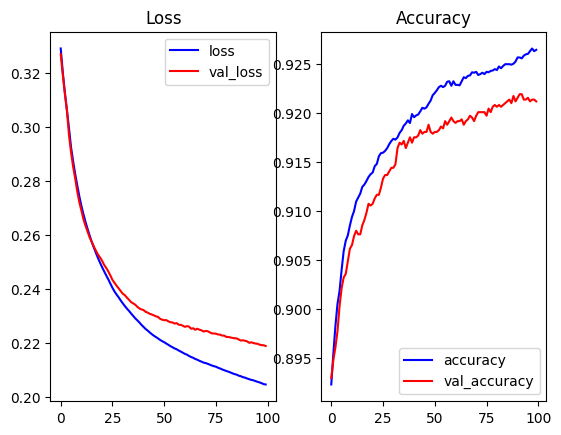

In [ ]:
model3.plot_history()

In [ ]:
prediction = model3.predict(X_test)

In [ ]:

predictions = model3.output_layer_activation.predictions(prediction)
ab = np.argmax(prediction, axis=1)

In [ ]:
len(y_test)

5445

In [ ]:
len(ab)

5445

In [ ]:
accuracy(ab,y_test)

92.12121212121212

In [ ]:
num_classes = 7

# Compute confusion matrix
matrix = confusion_matrix(y_test, ab, num_classes)

In [ ]:

matrix = confusion_matrix(y_test, ab, num_classes)
print(f"Accuracy for Model ANN: {round(accuracy(ab,y_test),2)}%")
print('\n')
for i in range(num_classes) :
  recall_value = round(recall(matrix, i),2)
  precision_value = round(precision(matrix, i),2)
  print(f"Recall for class {i}: {recall_value * 100}%")
  print(f"Precision for class {i}: {precision_value * 100}%")
  print('\n')

Accuracy for Model ANN: 92.12%


Recall for class 0: 95.0%
Precision for class 0: 98.0%


Recall for class 1: 79.0%
Precision for class 1: 89.0%


Recall for class 2: 98.0%
Precision for class 2: 91.0%


Recall for class 3: 93.0%
Precision for class 3: 93.0%


Recall for class 4: 89.0%
Precision for class 4: 93.0%


Recall for class 5: 94.0%
Precision for class 5: 89.0%


Recall for class 6: 89.0%
Precision for class 6: 91.0%




In [ ]:
class_label =
recall_value = recall(matrix, class_label)
precision_value = precision(matrix, class_label)

print(f"Recall for class {class_label}: {recall_value}")
print(f"Precision for class {class_label}: {precision_value}")

IndexError: ignored

## ANN with Feature Selection

In [ ]:
X_scaled2 = X_scaled.drop(columns=['Area'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, test_size=0.2, random_state=42)
X_train

,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11073,0.076417,0.092678,0.105189,0.329112,0.752840,0.036302,0.076358,0.444575,0.884449,0.823595,0.513273,0.691550,0.540022,0.460062,0.939497
13172,0.157774,0.157542,0.169519,0.343776,0.764742,0.074335,0.144515,0.485727,0.856549,0.697902,0.495573,0.565422,0.434747,0.442329,0.914787
11587,0.086805,0.083858,0.146264,0.223449,0.644088,0.043838,0.091462,0.573771,0.922827,0.852534,0.640752,0.606539,0.637164,0.591724,0.939503
12492,0.110013,0.124987,0.154276,0.301748,0.728857,0.058872,0.119113,0.736671,0.927999,0.869276,0.544795,0.591215,0.506862,0.491974,0.945857
430,0.126902,0.122573,0.176206,0.254562,0.681082,0.064705,0.129160,0.769586,0.915324,0.811109,0.604534,0.550166,0.545546,0.553613,0.993421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.406017,0.477025,0.341247,0.612962,0.908295,0.261138,0.402713,0.778191,0.950028,0.694211,0.246445,0.339889,0.115760,0.206890,0.895978
13418,0.157915,0.180137,0.168554,0.395476,0.802195,0.080989,0.156882,0.440168,0.915079,0.774606,0.443253,0.565350,0.381439,0.390690,0.951022
5390,0.432595,0.492086,0.384502,0.558854,0.887592,0.289005,0.434365,0.735409,0.955790,0.710218,0.289667,0.299449,0.122500,0.245842,0.890534
860,0.127805,0.113632,0.225189,0.154818,0.540840,0.074677,0.146883,0.632976,0.943112,0.926980,0.738436,0.474646,0.643451,0.697297,0.982573


In [ ]:
# Instantiate the model
model3 = Model()
# Add layers
model3.add(Dense(15,64))
model3.add(ReLU())
# model3.add(Conv1D(n_filters=32, filter_size=3,n_inputs =16))
# model3.add(MaxPool1D(pool_size=2,strides = None))
# model3.add(Flatten())
model3.add(Dense(64,32))
model3.add(ReLU())
model3.add(Dense(32,7))
model3.add(Softmax())
# Set3loss, optimizer and accuracy objects
model3.set(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(learning_rate=1e-3),
    accuracy=Categorical_Accuracy()
)

# Finalize the model
model3.finalize()

In [ ]:
model3.train(X_train, y_train, validation_data=(X_test, y_test),
            epochs=100, batch_size=64, print_every=170)

Training Epoch: 1/100:  50%|█████     | 86/171 [00:00<00:00, 430.08it/s]

step: 0, acc: 0.141, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/100: 100%|██████████| 171/171 [00:00<00:00, 416.15it/s]


step: 170, acc: 0.750, loss: 1.218 (data_loss: 1.218, reg_loss: 0.000), lr: 0.001
training, acc: 0.302, loss: 1.680 (data_loss: 1.680, reg_loss: 0.000), lr: 0.001
validation, acc: 0.392, loss: 1.351


Training Epoch: 2/100:  29%|██▉       | 50/171 [00:00<00:00, 492.99it/s]

step: 0, acc: 0.500, loss: 1.192 (data_loss: 1.192, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/100: 100%|██████████| 171/171 [00:00<00:00, 463.55it/s]


step: 170, acc: 0.750, loss: 0.860 (data_loss: 0.860, reg_loss: 0.000), lr: 0.001
training, acc: 0.522, loss: 1.118 (data_loss: 1.118, reg_loss: 0.000), lr: 0.001
validation, acc: 0.564, loss: 0.993


Training Epoch: 3/100:  22%|██▏       | 38/171 [00:00<00:00, 377.05it/s]

step: 0, acc: 0.594, loss: 0.950 (data_loss: 0.950, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/100: 100%|██████████| 171/171 [00:00<00:00, 436.30it/s]


step: 170, acc: 0.875, loss: 0.653 (data_loss: 0.653, reg_loss: 0.000), lr: 0.001
training, acc: 0.634, loss: 0.918 (data_loss: 0.918, reg_loss: 0.000), lr: 0.001
validation, acc: 0.682, loss: 0.843


Training Epoch: 4/100:  23%|██▎       | 40/171 [00:00<00:00, 392.24it/s]

step: 0, acc: 0.672, loss: 0.867 (data_loss: 0.867, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/100: 100%|██████████| 171/171 [00:00<00:00, 429.39it/s]


step: 170, acc: 0.875, loss: 0.476 (data_loss: 0.476, reg_loss: 0.000), lr: 0.001
training, acc: 0.711, loss: 0.793 (data_loss: 0.793, reg_loss: 0.000), lr: 0.001
validation, acc: 0.722, loss: 0.727


Training Epoch: 5/100:  27%|██▋       | 46/171 [00:00<00:00, 456.68it/s]

step: 0, acc: 0.688, loss: 0.781 (data_loss: 0.781, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/100: 100%|██████████| 171/171 [00:00<00:00, 521.42it/s]


step: 170, acc: 0.875, loss: 0.313 (data_loss: 0.313, reg_loss: 0.000), lr: 0.001
training, acc: 0.767, loss: 0.654 (data_loss: 0.654, reg_loss: 0.000), lr: 0.001
validation, acc: 0.801, loss: 0.553


Training Epoch: 6/100:  37%|███▋      | 63/171 [00:00<00:00, 624.05it/s]

step: 0, acc: 0.797, loss: 0.610 (data_loss: 0.610, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/100: 100%|██████████| 171/171 [00:00<00:00, 645.22it/s]


step: 170, acc: 0.875, loss: 0.198 (data_loss: 0.198, reg_loss: 0.000), lr: 0.001
training, acc: 0.835, loss: 0.482 (data_loss: 0.482, reg_loss: 0.000), lr: 0.001
validation, acc: 0.861, loss: 0.413


Training Epoch: 7/100:  47%|████▋     | 81/171 [00:00<00:00, 804.91it/s]

step: 0, acc: 0.859, loss: 0.478 (data_loss: 0.478, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/100: 100%|██████████| 171/171 [00:00<00:00, 731.37it/s]


step: 170, acc: 0.875, loss: 0.153 (data_loss: 0.153, reg_loss: 0.000), lr: 0.001
training, acc: 0.868, loss: 0.391 (data_loss: 0.391, reg_loss: 0.000), lr: 0.001
validation, acc: 0.877, loss: 0.360


Training Epoch: 8/100:  29%|██▊       | 49/171 [00:00<00:00, 484.57it/s]

step: 0, acc: 0.859, loss: 0.426 (data_loss: 0.426, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/100: 100%|██████████| 171/171 [00:00<00:00, 615.75it/s]


step: 170, acc: 0.875, loss: 0.133 (data_loss: 0.133, reg_loss: 0.000), lr: 0.001
training, acc: 0.877, loss: 0.353 (data_loss: 0.353, reg_loss: 0.000), lr: 0.001
validation, acc: 0.884, loss: 0.336


Training Epoch: 9/100:  47%|████▋     | 80/171 [00:00<00:00, 796.47it/s]

step: 0, acc: 0.859, loss: 0.399 (data_loss: 0.399, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/100: 100%|██████████| 171/171 [00:00<00:00, 712.31it/s]


step: 170, acc: 0.875, loss: 0.124 (data_loss: 0.124, reg_loss: 0.000), lr: 0.001
training, acc: 0.881, loss: 0.334 (data_loss: 0.334, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.322


Training Epoch: 10/100:  36%|███▌      | 61/171 [00:00<00:00, 601.78it/s]

step: 0, acc: 0.859, loss: 0.382 (data_loss: 0.382, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/100: 100%|██████████| 171/171 [00:00<00:00, 646.78it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.884, loss: 0.322 (data_loss: 0.322, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.313


Training Epoch: 11/100:  42%|████▏     | 72/171 [00:00<00:00, 709.95it/s]

step: 0, acc: 0.859, loss: 0.370 (data_loss: 0.370, reg_loss: 0.000), lr: 0.001


Training Epoch: 11/100: 100%|██████████| 171/171 [00:00<00:00, 636.44it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.885, loss: 0.313 (data_loss: 0.313, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.306


Training Epoch: 12/100:  42%|████▏     | 71/171 [00:00<00:00, 709.71it/s]

step: 0, acc: 0.859, loss: 0.361 (data_loss: 0.361, reg_loss: 0.000), lr: 0.001


Training Epoch: 12/100: 100%|██████████| 171/171 [00:00<00:00, 717.55it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.888, loss: 0.307 (data_loss: 0.307, reg_loss: 0.000), lr: 0.001
validation, acc: 0.887, loss: 0.301


Training Epoch: 13/100:  33%|███▎      | 57/171 [00:00<00:00, 569.61it/s]

step: 0, acc: 0.859, loss: 0.354 (data_loss: 0.354, reg_loss: 0.000), lr: 0.001


Training Epoch: 13/100: 100%|██████████| 171/171 [00:00<00:00, 643.83it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.890, loss: 0.302 (data_loss: 0.302, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.297


Training Epoch: 14/100:  43%|████▎     | 74/171 [00:00<00:00, 728.75it/s]

step: 0, acc: 0.844, loss: 0.348 (data_loss: 0.348, reg_loss: 0.000), lr: 0.001


Training Epoch: 14/100: 100%|██████████| 171/171 [00:00<00:00, 662.83it/s]


step: 170, acc: 0.875, loss: 0.115 (data_loss: 0.115, reg_loss: 0.000), lr: 0.001
training, acc: 0.891, loss: 0.299 (data_loss: 0.299, reg_loss: 0.000), lr: 0.001
validation, acc: 0.889, loss: 0.293


Training Epoch: 15/100:  34%|███▍      | 58/171 [00:00<00:00, 576.43it/s]

step: 0, acc: 0.844, loss: 0.343 (data_loss: 0.343, reg_loss: 0.000), lr: 0.001


Training Epoch: 15/100: 100%|██████████| 171/171 [00:00<00:00, 625.03it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.893, loss: 0.295 (data_loss: 0.295, reg_loss: 0.000), lr: 0.001
validation, acc: 0.891, loss: 0.290


Training Epoch: 16/100:  44%|████▍     | 76/171 [00:00<00:00, 756.17it/s]

step: 0, acc: 0.844, loss: 0.339 (data_loss: 0.339, reg_loss: 0.000), lr: 0.001


Training Epoch: 16/100: 100%|██████████| 171/171 [00:00<00:00, 675.40it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.894, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001
validation, acc: 0.892, loss: 0.287


Training Epoch: 17/100:  36%|███▋      | 62/171 [00:00<00:00, 619.18it/s]

step: 0, acc: 0.844, loss: 0.335 (data_loss: 0.335, reg_loss: 0.000), lr: 0.001


Training Epoch: 17/100: 100%|██████████| 171/171 [00:00<00:00, 584.10it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.894, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001
validation, acc: 0.892, loss: 0.285


Training Epoch: 18/100:  37%|███▋      | 64/171 [00:00<00:00, 637.95it/s]

step: 0, acc: 0.844, loss: 0.331 (data_loss: 0.331, reg_loss: 0.000), lr: 0.001


Training Epoch: 18/100: 100%|██████████| 171/171 [00:00<00:00, 632.30it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.895, loss: 0.288 (data_loss: 0.288, reg_loss: 0.000), lr: 0.001
validation, acc: 0.894, loss: 0.283


Training Epoch: 19/100:  37%|███▋      | 64/171 [00:00<00:00, 636.68it/s]

step: 0, acc: 0.859, loss: 0.328 (data_loss: 0.328, reg_loss: 0.000), lr: 0.001


Training Epoch: 19/100: 100%|██████████| 171/171 [00:00<00:00, 664.39it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.895, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001
validation, acc: 0.895, loss: 0.280


Training Epoch: 20/100:  37%|███▋      | 63/171 [00:00<00:00, 628.59it/s]

step: 0, acc: 0.859, loss: 0.326 (data_loss: 0.326, reg_loss: 0.000), lr: 0.001


Training Epoch: 20/100: 100%|██████████| 171/171 [00:00<00:00, 609.64it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.896, loss: 0.284 (data_loss: 0.284, reg_loss: 0.000), lr: 0.001
validation, acc: 0.896, loss: 0.278


Training Epoch: 21/100:  37%|███▋      | 64/171 [00:00<00:00, 636.97it/s]

step: 0, acc: 0.859, loss: 0.323 (data_loss: 0.323, reg_loss: 0.000), lr: 0.001


Training Epoch: 21/100: 100%|██████████| 171/171 [00:00<00:00, 583.20it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.897, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001
validation, acc: 0.897, loss: 0.276


Training Epoch: 22/100:  43%|████▎     | 73/171 [00:00<00:00, 723.71it/s]

step: 0, acc: 0.875, loss: 0.321 (data_loss: 0.321, reg_loss: 0.000), lr: 0.001


Training Epoch: 22/100: 100%|██████████| 171/171 [00:00<00:00, 697.99it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.898, loss: 0.280 (data_loss: 0.280, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.275


Training Epoch: 23/100:  40%|███▉      | 68/171 [00:00<00:00, 671.78it/s]

step: 0, acc: 0.875, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 23/100: 100%|██████████| 171/171 [00:00<00:00, 696.75it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.898, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.273


Training Epoch: 24/100:  32%|███▏      | 54/171 [00:00<00:00, 533.90it/s]

step: 0, acc: 0.875, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 24/100: 100%|██████████| 171/171 [00:00<00:00, 640.10it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.899, loss: 0.277 (data_loss: 0.277, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.271


Training Epoch: 25/100:  40%|████      | 69/171 [00:00<00:00, 683.32it/s]

step: 0, acc: 0.875, loss: 0.316 (data_loss: 0.316, reg_loss: 0.000), lr: 0.001


Training Epoch: 25/100: 100%|██████████| 171/171 [00:00<00:00, 620.54it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.899, loss: 0.276 (data_loss: 0.276, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.270


Training Epoch: 26/100:  42%|████▏     | 71/171 [00:00<00:00, 693.60it/s]

step: 0, acc: 0.875, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001


Training Epoch: 26/100: 100%|██████████| 171/171 [00:00<00:00, 645.67it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.900, loss: 0.274 (data_loss: 0.274, reg_loss: 0.000), lr: 0.001
validation, acc: 0.901, loss: 0.268


Training Epoch: 27/100:  49%|████▉     | 84/171 [00:00<00:00, 833.27it/s]

step: 0, acc: 0.875, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001


Training Epoch: 27/100: 100%|██████████| 171/171 [00:00<00:00, 760.25it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.900, loss: 0.273 (data_loss: 0.273, reg_loss: 0.000), lr: 0.001
validation, acc: 0.901, loss: 0.267


Training Epoch: 28/100:  37%|███▋      | 64/171 [00:00<00:00, 638.47it/s]

step: 0, acc: 0.859, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.001


Training Epoch: 28/100: 100%|██████████| 171/171 [00:00<00:00, 669.49it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.901, loss: 0.272 (data_loss: 0.272, reg_loss: 0.000), lr: 0.001
validation, acc: 0.901, loss: 0.266


Training Epoch: 29/100:  43%|████▎     | 73/171 [00:00<00:00, 725.29it/s]

step: 0, acc: 0.859, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.001


Training Epoch: 29/100: 100%|██████████| 171/171 [00:00<00:00, 705.46it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.902, loss: 0.271 (data_loss: 0.271, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.264


Training Epoch: 30/100:  37%|███▋      | 64/171 [00:00<00:00, 634.56it/s]

step: 0, acc: 0.859, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.001


Training Epoch: 30/100: 100%|██████████| 171/171 [00:00<00:00, 679.36it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.903, loss: 0.270 (data_loss: 0.270, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.263


Training Epoch: 31/100:  40%|███▉      | 68/171 [00:00<00:00, 675.78it/s]

step: 0, acc: 0.859, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.001


Training Epoch: 31/100: 100%|██████████| 171/171 [00:00<00:00, 657.94it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.269 (data_loss: 0.269, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.262


Training Epoch: 32/100:  39%|███▊      | 66/171 [00:00<00:00, 654.28it/s]

step: 0, acc: 0.859, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.001


Training Epoch: 32/100: 100%|██████████| 171/171 [00:00<00:00, 555.71it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.904, loss: 0.268 (data_loss: 0.268, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.261


Training Epoch: 33/100:  32%|███▏      | 54/171 [00:00<00:00, 538.89it/s]

step: 0, acc: 0.859, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001


Training Epoch: 33/100: 100%|██████████| 171/171 [00:00<00:00, 550.18it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.905, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.260


Training Epoch: 34/100:  34%|███▍      | 58/171 [00:00<00:00, 572.02it/s]

step: 0, acc: 0.859, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001


Training Epoch: 34/100: 100%|██████████| 171/171 [00:00<00:00, 587.82it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.905, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001
validation, acc: 0.904, loss: 0.259


Training Epoch: 35/100:  35%|███▌      | 60/171 [00:00<00:00, 594.96it/s]

step: 0, acc: 0.859, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001


Training Epoch: 35/100: 100%|██████████| 171/171 [00:00<00:00, 573.99it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.905, loss: 0.266 (data_loss: 0.266, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.258


Training Epoch: 36/100:  32%|███▏      | 54/171 [00:00<00:00, 533.86it/s]

step: 0, acc: 0.859, loss: 0.316 (data_loss: 0.316, reg_loss: 0.000), lr: 0.001


Training Epoch: 36/100: 100%|██████████| 171/171 [00:00<00:00, 558.39it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.265 (data_loss: 0.265, reg_loss: 0.000), lr: 0.001
validation, acc: 0.904, loss: 0.257


Training Epoch: 37/100:  40%|████      | 69/171 [00:00<00:00, 682.74it/s]

step: 0, acc: 0.859, loss: 0.316 (data_loss: 0.316, reg_loss: 0.000), lr: 0.001


Training Epoch: 37/100: 100%|██████████| 171/171 [00:00<00:00, 591.35it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.264 (data_loss: 0.264, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.256


Training Epoch: 38/100:  24%|██▍       | 41/171 [00:00<00:00, 400.38it/s]

step: 0, acc: 0.859, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.001


Training Epoch: 38/100: 100%|██████████| 171/171 [00:00<00:00, 418.29it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.906, loss: 0.264 (data_loss: 0.264, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.255


Training Epoch: 39/100:  22%|██▏       | 38/171 [00:00<00:00, 374.04it/s]

step: 0, acc: 0.844, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.001


Training Epoch: 39/100: 100%|██████████| 171/171 [00:00<00:00, 400.06it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.263 (data_loss: 0.263, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.254


Training Epoch: 40/100:  25%|██▍       | 42/171 [00:00<00:00, 412.87it/s]

step: 0, acc: 0.844, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 40/100: 100%|██████████| 171/171 [00:00<00:00, 433.34it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.262 (data_loss: 0.262, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.253


Training Epoch: 41/100:  28%|██▊       | 48/171 [00:00<00:00, 475.52it/s]

step: 0, acc: 0.844, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 41/100: 100%|██████████| 171/171 [00:00<00:00, 404.72it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.907, loss: 0.261 (data_loss: 0.261, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.253


Training Epoch: 42/100:  22%|██▏       | 38/171 [00:00<00:00, 379.76it/s]

step: 0, acc: 0.844, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 42/100: 100%|██████████| 171/171 [00:00<00:00, 335.80it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.261 (data_loss: 0.261, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.252


Training Epoch: 43/100:  23%|██▎       | 40/171 [00:00<00:00, 396.50it/s]

step: 0, acc: 0.844, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 43/100: 100%|██████████| 171/171 [00:00<00:00, 426.92it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.908, loss: 0.260 (data_loss: 0.260, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.251


Training Epoch: 44/100:  25%|██▍       | 42/171 [00:00<00:00, 413.83it/s]

step: 0, acc: 0.844, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 44/100: 100%|██████████| 171/171 [00:00<00:00, 422.91it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.259 (data_loss: 0.259, reg_loss: 0.000), lr: 0.001
validation, acc: 0.908, loss: 0.250


Training Epoch: 45/100:  23%|██▎       | 39/171 [00:00<00:00, 381.04it/s]

step: 0, acc: 0.844, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001


Training Epoch: 45/100: 100%|██████████| 171/171 [00:00<00:00, 389.36it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.258 (data_loss: 0.258, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.249


Training Epoch: 46/100:  26%|██▋       | 45/171 [00:00<00:00, 445.70it/s]

step: 0, acc: 0.844, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 46/100: 100%|██████████| 171/171 [00:00<00:00, 420.41it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.909, loss: 0.257 (data_loss: 0.257, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.247


Training Epoch: 47/100:  25%|██▍       | 42/171 [00:00<00:00, 418.83it/s]

step: 0, acc: 0.859, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.001


Training Epoch: 47/100: 100%|██████████| 171/171 [00:00<00:00, 422.41it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.910, loss: 0.256 (data_loss: 0.256, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.246


Training Epoch: 48/100:  23%|██▎       | 39/171 [00:00<00:00, 385.94it/s]

step: 0, acc: 0.875, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.001


Training Epoch: 48/100: 100%|██████████| 171/171 [00:00<00:00, 372.83it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.910, loss: 0.255 (data_loss: 0.255, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.245


Training Epoch: 49/100:  26%|██▋       | 45/171 [00:00<00:00, 445.99it/s]

step: 0, acc: 0.891, loss: 0.316 (data_loss: 0.316, reg_loss: 0.000), lr: 0.001


Training Epoch: 49/100: 100%|██████████| 171/171 [00:00<00:00, 416.99it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.911, loss: 0.254 (data_loss: 0.254, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.244


Training Epoch: 50/100:  28%|██▊       | 48/171 [00:00<00:00, 478.15it/s]

step: 0, acc: 0.891, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001


Training Epoch: 50/100: 100%|██████████| 171/171 [00:00<00:00, 605.09it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.912, loss: 0.253 (data_loss: 0.253, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.243


Training Epoch: 51/100:  40%|████      | 69/171 [00:00<00:00, 682.91it/s]

step: 0, acc: 0.891, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001


Training Epoch: 51/100: 100%|██████████| 171/171 [00:00<00:00, 638.69it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.912, loss: 0.252 (data_loss: 0.252, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.242


Training Epoch: 52/100:  31%|███       | 53/171 [00:00<00:00, 523.35it/s]

step: 0, acc: 0.891, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.001


Training Epoch: 52/100: 100%|██████████| 171/171 [00:00<00:00, 605.09it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.251 (data_loss: 0.251, reg_loss: 0.000), lr: 0.001
validation, acc: 0.912, loss: 0.240


Training Epoch: 53/100:  39%|███▊      | 66/171 [00:00<00:00, 655.21it/s]

step: 0, acc: 0.891, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.001


Training Epoch: 53/100: 100%|██████████| 171/171 [00:00<00:00, 667.13it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.250 (data_loss: 0.250, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.239


Training Epoch: 54/100:  40%|████      | 69/171 [00:00<00:00, 685.74it/s]

step: 0, acc: 0.891, loss: 0.312 (data_loss: 0.312, reg_loss: 0.000), lr: 0.001


Training Epoch: 54/100: 100%|██████████| 171/171 [00:00<00:00, 659.66it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.249 (data_loss: 0.249, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.238


Training Epoch: 55/100:  41%|████      | 70/171 [00:00<00:00, 699.34it/s]

step: 0, acc: 0.891, loss: 0.311 (data_loss: 0.311, reg_loss: 0.000), lr: 0.001


Training Epoch: 55/100: 100%|██████████| 171/171 [00:00<00:00, 634.57it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.913, loss: 0.248 (data_loss: 0.248, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.237


Training Epoch: 56/100:  36%|███▌      | 61/171 [00:00<00:00, 605.15it/s]

step: 0, acc: 0.891, loss: 0.311 (data_loss: 0.311, reg_loss: 0.000), lr: 0.001


Training Epoch: 56/100: 100%|██████████| 171/171 [00:00<00:00, 559.28it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.247 (data_loss: 0.247, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.235


Training Epoch: 57/100:  36%|███▋      | 62/171 [00:00<00:00, 614.16it/s]

step: 0, acc: 0.891, loss: 0.311 (data_loss: 0.311, reg_loss: 0.000), lr: 0.001


Training Epoch: 57/100: 100%|██████████| 171/171 [00:00<00:00, 606.68it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.246 (data_loss: 0.246, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.234


Training Epoch: 58/100:  30%|██▉       | 51/171 [00:00<00:00, 505.88it/s]

step: 0, acc: 0.891, loss: 0.311 (data_loss: 0.311, reg_loss: 0.000), lr: 0.001


Training Epoch: 58/100: 100%|██████████| 171/171 [00:00<00:00, 522.85it/s]


step: 170, acc: 0.875, loss: 0.116 (data_loss: 0.116, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.245 (data_loss: 0.245, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.233


Training Epoch: 59/100:  33%|███▎      | 57/171 [00:00<00:00, 562.23it/s]

step: 0, acc: 0.891, loss: 0.310 (data_loss: 0.310, reg_loss: 0.000), lr: 0.001


Training Epoch: 59/100: 100%|██████████| 171/171 [00:00<00:00, 571.43it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.914, loss: 0.244 (data_loss: 0.244, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.232


Training Epoch: 60/100:  37%|███▋      | 63/171 [00:00<00:00, 627.00it/s]

step: 0, acc: 0.891, loss: 0.308 (data_loss: 0.308, reg_loss: 0.000), lr: 0.001


Training Epoch: 60/100: 100%|██████████| 171/171 [00:00<00:00, 603.64it/s]


step: 170, acc: 0.875, loss: 0.117 (data_loss: 0.117, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.243 (data_loss: 0.243, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.231


Training Epoch: 61/100:  37%|███▋      | 63/171 [00:00<00:00, 624.71it/s]

step: 0, acc: 0.891, loss: 0.307 (data_loss: 0.307, reg_loss: 0.000), lr: 0.001


Training Epoch: 61/100: 100%|██████████| 171/171 [00:00<00:00, 621.79it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.915, loss: 0.242 (data_loss: 0.242, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.230


Training Epoch: 62/100:  34%|███▍      | 58/171 [00:00<00:00, 577.47it/s]

step: 0, acc: 0.891, loss: 0.306 (data_loss: 0.306, reg_loss: 0.000), lr: 0.001


Training Epoch: 62/100: 100%|██████████| 171/171 [00:00<00:00, 541.40it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.242 (data_loss: 0.242, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.229


Training Epoch: 63/100:  38%|███▊      | 65/171 [00:00<00:00, 643.86it/s]

step: 0, acc: 0.891, loss: 0.305 (data_loss: 0.305, reg_loss: 0.000), lr: 0.001


Training Epoch: 63/100: 100%|██████████| 171/171 [00:00<00:00, 554.39it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.241 (data_loss: 0.241, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.228


Training Epoch: 64/100:  33%|███▎      | 57/171 [00:00<00:00, 568.03it/s]

step: 0, acc: 0.891, loss: 0.303 (data_loss: 0.303, reg_loss: 0.000), lr: 0.001


Training Epoch: 64/100: 100%|██████████| 171/171 [00:00<00:00, 559.73it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.240 (data_loss: 0.240, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.227


Training Epoch: 65/100:  35%|███▌      | 60/171 [00:00<00:00, 584.39it/s]

step: 0, acc: 0.906, loss: 0.302 (data_loss: 0.302, reg_loss: 0.000), lr: 0.001


Training Epoch: 65/100: 100%|██████████| 171/171 [00:00<00:00, 574.17it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.226


Training Epoch: 66/100:  36%|███▋      | 62/171 [00:00<00:00, 608.75it/s]

step: 0, acc: 0.906, loss: 0.301 (data_loss: 0.301, reg_loss: 0.000), lr: 0.001


Training Epoch: 66/100: 100%|██████████| 171/171 [00:00<00:00, 590.49it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.226


Training Epoch: 67/100:  36%|███▌      | 61/171 [00:00<00:00, 601.80it/s]

step: 0, acc: 0.906, loss: 0.300 (data_loss: 0.300, reg_loss: 0.000), lr: 0.001


Training Epoch: 67/100: 100%|██████████| 171/171 [00:00<00:00, 584.34it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.238 (data_loss: 0.238, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.225


Training Epoch: 68/100:  42%|████▏     | 72/171 [00:00<00:00, 711.97it/s]

step: 0, acc: 0.906, loss: 0.298 (data_loss: 0.298, reg_loss: 0.000), lr: 0.001


Training Epoch: 68/100: 100%|██████████| 171/171 [00:00<00:00, 682.71it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.238 (data_loss: 0.238, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.225


Training Epoch: 69/100:  39%|███▊      | 66/171 [00:00<00:00, 654.64it/s]

step: 0, acc: 0.906, loss: 0.297 (data_loss: 0.297, reg_loss: 0.000), lr: 0.001


Training Epoch: 69/100: 100%|██████████| 171/171 [00:00<00:00, 581.63it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.237 (data_loss: 0.237, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.224


Training Epoch: 70/100:  38%|███▊      | 65/171 [00:00<00:00, 646.44it/s]

step: 0, acc: 0.906, loss: 0.296 (data_loss: 0.296, reg_loss: 0.000), lr: 0.001


Training Epoch: 70/100: 100%|██████████| 171/171 [00:00<00:00, 648.20it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.237 (data_loss: 0.237, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.224


Training Epoch: 71/100:  37%|███▋      | 63/171 [00:00<00:00, 622.60it/s]

step: 0, acc: 0.906, loss: 0.295 (data_loss: 0.295, reg_loss: 0.000), lr: 0.001


Training Epoch: 71/100: 100%|██████████| 171/171 [00:00<00:00, 594.19it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.223


Training Epoch: 72/100:  41%|████      | 70/171 [00:00<00:00, 698.49it/s]

step: 0, acc: 0.906, loss: 0.294 (data_loss: 0.294, reg_loss: 0.000), lr: 0.001


Training Epoch: 72/100: 100%|██████████| 171/171 [00:00<00:00, 651.92it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.223


Training Epoch: 73/100:  35%|███▍      | 59/171 [00:00<00:00, 589.73it/s]

step: 0, acc: 0.906, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001


Training Epoch: 73/100: 100%|██████████| 171/171 [00:00<00:00, 565.51it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.223


Training Epoch: 74/100:  36%|███▋      | 62/171 [00:00<00:00, 607.45it/s]

step: 0, acc: 0.906, loss: 0.291 (data_loss: 0.291, reg_loss: 0.000), lr: 0.001


Training Epoch: 74/100: 100%|██████████| 171/171 [00:00<00:00, 585.44it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 75/100:  32%|███▏      | 55/171 [00:00<00:00, 546.03it/s]

step: 0, acc: 0.906, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001


Training Epoch: 75/100: 100%|██████████| 171/171 [00:00<00:00, 594.14it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 76/100:  36%|███▌      | 61/171 [00:00<00:00, 609.09it/s]

step: 0, acc: 0.906, loss: 0.289 (data_loss: 0.289, reg_loss: 0.000), lr: 0.001


Training Epoch: 76/100: 100%|██████████| 171/171 [00:00<00:00, 561.18it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.235 (data_loss: 0.235, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 77/100:  35%|███▌      | 60/171 [00:00<00:00, 593.36it/s]

step: 0, acc: 0.906, loss: 0.288 (data_loss: 0.288, reg_loss: 0.000), lr: 0.001


Training Epoch: 77/100: 100%|██████████| 171/171 [00:00<00:00, 549.88it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.222


Training Epoch: 78/100:  29%|██▉       | 50/171 [00:00<00:00, 497.23it/s]

step: 0, acc: 0.906, loss: 0.287 (data_loss: 0.287, reg_loss: 0.000), lr: 0.001


Training Epoch: 78/100: 100%|██████████| 171/171 [00:00<00:00, 534.80it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.221


Training Epoch: 79/100:  37%|███▋      | 64/171 [00:00<00:00, 638.43it/s]

step: 0, acc: 0.906, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001


Training Epoch: 79/100: 100%|██████████| 171/171 [00:00<00:00, 623.23it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.221


Training Epoch: 80/100:  39%|███▉      | 67/171 [00:00<00:00, 663.56it/s]

step: 0, acc: 0.906, loss: 0.284 (data_loss: 0.284, reg_loss: 0.000), lr: 0.001


Training Epoch: 80/100: 100%|██████████| 171/171 [00:00<00:00, 642.10it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.221


Training Epoch: 81/100:  24%|██▍       | 41/171 [00:00<00:00, 399.79it/s]

step: 0, acc: 0.906, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.001


Training Epoch: 81/100: 100%|██████████| 171/171 [00:00<00:00, 433.12it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.221


Training Epoch: 82/100:  25%|██▍       | 42/171 [00:00<00:00, 414.23it/s]

step: 0, acc: 0.906, loss: 0.282 (data_loss: 0.282, reg_loss: 0.000), lr: 0.001


Training Epoch: 82/100: 100%|██████████| 171/171 [00:00<00:00, 460.76it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.916, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.221


Training Epoch: 83/100:  29%|██▉       | 50/171 [00:00<00:00, 492.34it/s]

step: 0, acc: 0.906, loss: 0.281 (data_loss: 0.281, reg_loss: 0.000), lr: 0.001


Training Epoch: 83/100: 100%|██████████| 171/171 [00:00<00:00, 479.47it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.919, loss: 0.220


Training Epoch: 84/100:  27%|██▋       | 46/171 [00:00<00:00, 453.27it/s]

step: 0, acc: 0.906, loss: 0.280 (data_loss: 0.280, reg_loss: 0.000), lr: 0.001


Training Epoch: 84/100: 100%|██████████| 171/171 [00:00<00:00, 443.99it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.233 (data_loss: 0.233, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.220


Training Epoch: 85/100:  26%|██▋       | 45/171 [00:00<00:00, 445.04it/s]

step: 0, acc: 0.906, loss: 0.279 (data_loss: 0.279, reg_loss: 0.000), lr: 0.001


Training Epoch: 85/100: 100%|██████████| 171/171 [00:00<00:00, 469.89it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.220


Training Epoch: 86/100:  29%|██▊       | 49/171 [00:00<00:00, 489.40it/s]

step: 0, acc: 0.906, loss: 0.278 (data_loss: 0.278, reg_loss: 0.000), lr: 0.001


Training Epoch: 86/100: 100%|██████████| 171/171 [00:00<00:00, 470.46it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.220


Training Epoch: 87/100:  23%|██▎       | 40/171 [00:00<00:00, 391.68it/s]

step: 0, acc: 0.906, loss: 0.277 (data_loss: 0.277, reg_loss: 0.000), lr: 0.001


Training Epoch: 87/100: 100%|██████████| 171/171 [00:00<00:00, 423.13it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.220


Training Epoch: 88/100:  29%|██▉       | 50/171 [00:00<00:00, 495.92it/s]

step: 0, acc: 0.906, loss: 0.276 (data_loss: 0.276, reg_loss: 0.000), lr: 0.001


Training Epoch: 88/100: 100%|██████████| 171/171 [00:00<00:00, 459.53it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.917, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.220


Training Epoch: 89/100:  30%|██▉       | 51/171 [00:00<00:00, 498.94it/s]

step: 0, acc: 0.906, loss: 0.276 (data_loss: 0.276, reg_loss: 0.000), lr: 0.001


Training Epoch: 89/100: 100%|██████████| 171/171 [00:00<00:00, 476.61it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.232 (data_loss: 0.232, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 90/100:  22%|██▏       | 38/171 [00:00<00:00, 373.08it/s]

step: 0, acc: 0.906, loss: 0.275 (data_loss: 0.275, reg_loss: 0.000), lr: 0.001


Training Epoch: 90/100: 100%|██████████| 171/171 [00:00<00:00, 402.04it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 91/100:  27%|██▋       | 46/171 [00:00<00:00, 458.94it/s]

step: 0, acc: 0.906, loss: 0.274 (data_loss: 0.274, reg_loss: 0.000), lr: 0.001


Training Epoch: 91/100: 100%|██████████| 171/171 [00:00<00:00, 450.18it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 92/100:  29%|██▉       | 50/171 [00:00<00:00, 485.54it/s]

step: 0, acc: 0.906, loss: 0.273 (data_loss: 0.273, reg_loss: 0.000), lr: 0.001


Training Epoch: 92/100: 100%|██████████| 171/171 [00:00<00:00, 455.39it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 93/100:  27%|██▋       | 47/171 [00:00<00:00, 462.83it/s]

step: 0, acc: 0.906, loss: 0.272 (data_loss: 0.272, reg_loss: 0.000), lr: 0.001


Training Epoch: 93/100: 100%|██████████| 171/171 [00:00<00:00, 424.71it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 94/100:  26%|██▌       | 44/171 [00:00<00:00, 438.08it/s]

step: 0, acc: 0.906, loss: 0.271 (data_loss: 0.271, reg_loss: 0.000), lr: 0.001


Training Epoch: 94/100: 100%|██████████| 171/171 [00:00<00:00, 486.19it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 95/100:  38%|███▊      | 65/171 [00:00<00:00, 646.89it/s]

step: 0, acc: 0.906, loss: 0.270 (data_loss: 0.270, reg_loss: 0.000), lr: 0.001


Training Epoch: 95/100: 100%|██████████| 171/171 [00:00<00:00, 615.56it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 96/100:  40%|████      | 69/171 [00:00<00:00, 685.71it/s]

step: 0, acc: 0.906, loss: 0.270 (data_loss: 0.270, reg_loss: 0.000), lr: 0.001


Training Epoch: 96/100: 100%|██████████| 171/171 [00:00<00:00, 612.12it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.219


Training Epoch: 97/100:  36%|███▌      | 61/171 [00:00<00:00, 609.11it/s]

step: 0, acc: 0.906, loss: 0.269 (data_loss: 0.269, reg_loss: 0.000), lr: 0.001


Training Epoch: 97/100: 100%|██████████| 171/171 [00:00<00:00, 608.51it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.218


Training Epoch: 98/100:  36%|███▌      | 61/171 [00:00<00:00, 604.15it/s]

step: 0, acc: 0.906, loss: 0.268 (data_loss: 0.268, reg_loss: 0.000), lr: 0.001


Training Epoch: 98/100: 100%|██████████| 171/171 [00:00<00:00, 629.75it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.218


Training Epoch: 99/100:  40%|███▉      | 68/171 [00:00<00:00, 677.97it/s]

step: 0, acc: 0.906, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001


Training Epoch: 99/100: 100%|██████████| 171/171 [00:00<00:00, 680.95it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.218


Training Epoch: 100/100:  39%|███▊      | 66/171 [00:00<00:00, 652.11it/s]

step: 0, acc: 0.906, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001


Training Epoch: 100/100: 100%|██████████| 171/171 [00:00<00:00, 609.86it/s]


step: 170, acc: 0.875, loss: 0.118 (data_loss: 0.118, reg_loss: 0.000), lr: 0.001
training, acc: 0.918, loss: 0.230 (data_loss: 0.230, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.218


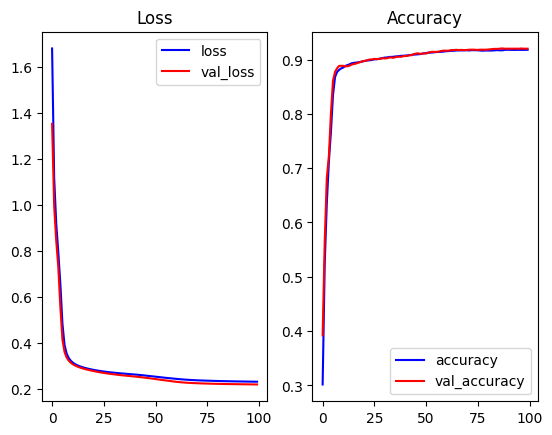

In [ ]:
model3.plot_history()

In [ ]:
prediction = model3.predict(X_test)
predictions = model3.output_layer_activation.predictions(prediction)
ab = np.argmax(prediction, axis=1)
matrix = confusion_matrix(y_test, ab, num_classes)
print(f"Accuracy for Model ANN: {round(accuracy_score(ab,y_test)* 100,2)}%")
print('\n')
for i in range(num_classes) :
  recall_value = round(recall(matrix, i),2)
  precision_value = round(precision(matrix, i),2)
  print(f"Recall for class {i}: {recall_value * 100}%")
  print(f"Precision for class {i}: {precision_value * 100}%")
  print('\n')

Accuracy for Model ANN: 91.99%


Recall for class 0: 91.0%
Precision for class 0: 92.0%


Recall for class 1: 100.0%
Precision for class 1: 100.0%


Recall for class 2: 94.0%
Precision for class 2: 93.0%


Recall for class 3: 90.0%
Precision for class 3: 91.0%


Recall for class 4: 96.0%
Precision for class 4: 97.0%


Recall for class 5: 92.0%
Precision for class 5: 96.0%


Recall for class 6: 89.0%
Precision for class 6: 85.0%




# Gan Testing CNN

## CNN without Gan

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11073,0.036960,0.076417,0.092678,0.105189,0.329112,0.752840,0.036302,0.076358,0.444575,0.884449,0.823595,0.513273,0.691550,0.540022,0.460062,0.939497
13172,0.075454,0.157774,0.157542,0.169519,0.343776,0.764742,0.074335,0.144515,0.485727,0.856549,0.697902,0.495573,0.565422,0.434747,0.442329,0.914787
11587,0.045043,0.086805,0.083858,0.146264,0.223449,0.644088,0.043838,0.091462,0.573771,0.922827,0.852534,0.640752,0.606539,0.637164,0.591724,0.939503
12492,0.060501,0.110013,0.124987,0.154276,0.301748,0.728857,0.058872,0.119113,0.736671,0.927999,0.869276,0.544795,0.591215,0.506862,0.491974,0.945857
430,0.066329,0.126902,0.122573,0.176206,0.254562,0.681082,0.064705,0.129160,0.769586,0.915324,0.811109,0.604534,0.550166,0.545546,0.553613,0.993421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.268348,0.406017,0.477025,0.341247,0.612962,0.908295,0.261138,0.402713,0.778191,0.950028,0.694211,0.246445,0.339889,0.115760,0.206890,0.895978
13418,0.082995,0.157915,0.180137,0.168554,0.395476,0.802195,0.080989,0.156882,0.440168,0.915079,0.774606,0.443253,0.565350,0.381439,0.390690,0.951022
5390,0.297119,0.432595,0.492086,0.384502,0.558854,0.887592,0.289005,0.434365,0.735409,0.955790,0.710218,0.289667,0.299449,0.122500,0.245842,0.890534
860,0.076884,0.127805,0.113632,0.225189,0.154818,0.540840,0.074677,0.146883,0.632976,0.943112,0.926980,0.738436,0.474646,0.643451,0.697297,0.982573


In [ ]:
# Instantiate the model
model2 = Model()
# Add layers
model2.add(Conv1D(n_inputs= 16,n_filters=32, filter_size=3))
model2.add(MaxPool1D(pool_size=2,strides = 2))
model2.add(Flatten())
model2.add(Dense(224,64))
model2.add(ReLU())
model2.add(Dense(64,32))
model2.add(ReLU())
model2.add(Dropout(0.5))
model2.add(Dense(32,7))
model2.add(Softmax())

# Set loss, optimizer and accuracy objects
model2.set(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(learning_rate=1e-3),
    accuracy=Categorical_Accuracy()
)

# Finalize the model
model2.finalize()

In [ ]:
model2.train(X_train, y_train, validation_data=(X_test, y_test),
            epochs=100, batch_size=64, print_every=170)

Training Epoch: 1/100:   1%|          | 2/171 [00:00<00:13, 12.39it/s]

step: 0, acc: 0.078, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/100: 100%|██████████| 171/171 [00:18<00:00,  9.10it/s]


step: 170, acc: 0.625, loss: 1.321 (data_loss: 1.321, reg_loss: 0.000), lr: 0.001
training, acc: 0.286, loss: 1.751 (data_loss: 1.751, reg_loss: 0.000), lr: 0.001
validation, acc: 0.403, loss: 1.317


Training Epoch: 2/100:   1%|          | 2/171 [00:00<00:10, 15.71it/s]

step: 0, acc: 0.531, loss: 1.204 (data_loss: 1.204, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/100: 100%|██████████| 171/171 [00:14<00:00, 12.14it/s]


step: 170, acc: 0.750, loss: 0.872 (data_loss: 0.872, reg_loss: 0.000), lr: 0.001
training, acc: 0.491, loss: 1.139 (data_loss: 1.139, reg_loss: 0.000), lr: 0.001
validation, acc: 0.542, loss: 0.972


Training Epoch: 3/100:   1%|          | 2/171 [00:00<00:10, 15.78it/s]

step: 0, acc: 0.438, loss: 1.077 (data_loss: 1.077, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/100: 100%|██████████| 171/171 [00:13<00:00, 12.44it/s]


step: 170, acc: 0.500, loss: 0.926 (data_loss: 0.926, reg_loss: 0.000), lr: 0.001
training, acc: 0.524, loss: 1.038 (data_loss: 1.038, reg_loss: 0.000), lr: 0.001
validation, acc: 0.595, loss: 0.911


Training Epoch: 4/100:   1%|          | 2/171 [00:00<00:11, 14.41it/s]

step: 0, acc: 0.531, loss: 0.952 (data_loss: 0.952, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/100: 100%|██████████| 171/171 [00:13<00:00, 12.52it/s]


step: 170, acc: 0.500, loss: 0.969 (data_loss: 0.969, reg_loss: 0.000), lr: 0.001
training, acc: 0.542, loss: 0.996 (data_loss: 0.996, reg_loss: 0.000), lr: 0.001
validation, acc: 0.594, loss: 0.889


Training Epoch: 5/100:   1%|          | 2/171 [00:00<00:10, 16.23it/s]

step: 0, acc: 0.578, loss: 0.938 (data_loss: 0.938, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/100: 100%|██████████| 171/171 [00:13<00:00, 12.73it/s]


step: 170, acc: 0.625, loss: 0.914 (data_loss: 0.914, reg_loss: 0.000), lr: 0.001
training, acc: 0.551, loss: 0.986 (data_loss: 0.986, reg_loss: 0.000), lr: 0.001
validation, acc: 0.602, loss: 0.884


Training Epoch: 6/100:   1%|          | 2/171 [00:00<00:11, 14.47it/s]

step: 0, acc: 0.562, loss: 1.048 (data_loss: 1.048, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/100: 100%|██████████| 171/171 [00:13<00:00, 12.54it/s]


step: 170, acc: 0.625, loss: 0.788 (data_loss: 0.788, reg_loss: 0.000), lr: 0.001
training, acc: 0.560, loss: 0.978 (data_loss: 0.978, reg_loss: 0.000), lr: 0.001
validation, acc: 0.610, loss: 0.875


Training Epoch: 7/100:   1%|          | 2/171 [00:00<00:10, 16.51it/s]

step: 0, acc: 0.609, loss: 0.952 (data_loss: 0.952, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/100: 100%|██████████| 171/171 [00:13<00:00, 12.55it/s]


step: 170, acc: 0.625, loss: 0.875 (data_loss: 0.875, reg_loss: 0.000), lr: 0.001
training, acc: 0.570, loss: 0.968 (data_loss: 0.968, reg_loss: 0.000), lr: 0.001
validation, acc: 0.623, loss: 0.863


Training Epoch: 8/100:   1%|          | 2/171 [00:00<00:10, 15.70it/s]

step: 0, acc: 0.547, loss: 0.900 (data_loss: 0.900, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/100: 100%|██████████| 171/171 [00:13<00:00, 12.60it/s]


step: 170, acc: 0.750, loss: 0.696 (data_loss: 0.696, reg_loss: 0.000), lr: 0.001
training, acc: 0.575, loss: 0.961 (data_loss: 0.961, reg_loss: 0.000), lr: 0.001
validation, acc: 0.626, loss: 0.852


Training Epoch: 9/100:   1%|          | 2/171 [00:00<00:11, 14.96it/s]

step: 0, acc: 0.594, loss: 0.990 (data_loss: 0.990, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/100: 100%|██████████| 171/171 [00:13<00:00, 12.69it/s]


step: 170, acc: 0.625, loss: 0.835 (data_loss: 0.835, reg_loss: 0.000), lr: 0.001
training, acc: 0.585, loss: 0.940 (data_loss: 0.940, reg_loss: 0.000), lr: 0.001
validation, acc: 0.633, loss: 0.840


Training Epoch: 10/100:   1%|          | 2/171 [00:00<00:10, 15.56it/s]

step: 0, acc: 0.609, loss: 0.950 (data_loss: 0.950, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/100: 100%|██████████| 171/171 [00:13<00:00, 12.39it/s]


step: 170, acc: 0.750, loss: 0.529 (data_loss: 0.529, reg_loss: 0.000), lr: 0.001
training, acc: 0.634, loss: 0.889 (data_loss: 0.889, reg_loss: 0.000), lr: 0.001
validation, acc: 0.761, loss: 0.698


Training Epoch: 11/100:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.672, loss: 0.848 (data_loss: 0.848, reg_loss: 0.000), lr: 0.001


Training Epoch: 11/100: 100%|██████████| 171/171 [00:13<00:00, 12.42it/s]


step: 170, acc: 0.750, loss: 0.672 (data_loss: 0.672, reg_loss: 0.000), lr: 0.001
training, acc: 0.680, loss: 0.803 (data_loss: 0.803, reg_loss: 0.000), lr: 0.001
validation, acc: 0.806, loss: 0.587


Training Epoch: 12/100:   1%|          | 1/171 [00:00<00:22,  7.72it/s]

step: 0, acc: 0.750, loss: 0.676 (data_loss: 0.676, reg_loss: 0.000), lr: 0.001


Training Epoch: 12/100: 100%|██████████| 171/171 [00:12<00:00, 13.64it/s]


step: 170, acc: 0.875, loss: 0.515 (data_loss: 0.515, reg_loss: 0.000), lr: 0.001
training, acc: 0.695, loss: 0.735 (data_loss: 0.735, reg_loss: 0.000), lr: 0.001
validation, acc: 0.827, loss: 0.481


Training Epoch: 13/100:   1%|          | 2/171 [00:00<00:10, 16.17it/s]

step: 0, acc: 0.750, loss: 0.684 (data_loss: 0.684, reg_loss: 0.000), lr: 0.001


Training Epoch: 13/100: 100%|██████████| 171/171 [00:12<00:00, 13.19it/s]


step: 170, acc: 1.000, loss: 0.211 (data_loss: 0.211, reg_loss: 0.000), lr: 0.001
training, acc: 0.730, loss: 0.647 (data_loss: 0.647, reg_loss: 0.000), lr: 0.001
validation, acc: 0.832, loss: 0.424


Training Epoch: 14/100:   1%|          | 2/171 [00:00<00:10, 16.17it/s]

step: 0, acc: 0.734, loss: 0.542 (data_loss: 0.542, reg_loss: 0.000), lr: 0.001


Training Epoch: 14/100: 100%|██████████| 171/171 [00:13<00:00, 12.32it/s]


step: 170, acc: 0.875, loss: 0.622 (data_loss: 0.622, reg_loss: 0.000), lr: 0.001
training, acc: 0.760, loss: 0.610 (data_loss: 0.610, reg_loss: 0.000), lr: 0.001
validation, acc: 0.859, loss: 0.390


Training Epoch: 15/100:   1%|          | 2/171 [00:00<00:10, 16.04it/s]

step: 0, acc: 0.766, loss: 0.592 (data_loss: 0.592, reg_loss: 0.000), lr: 0.001


Training Epoch: 15/100: 100%|██████████| 171/171 [00:13<00:00, 12.40it/s]


step: 170, acc: 1.000, loss: 0.242 (data_loss: 0.242, reg_loss: 0.000), lr: 0.001
training, acc: 0.771, loss: 0.578 (data_loss: 0.578, reg_loss: 0.000), lr: 0.001
validation, acc: 0.861, loss: 0.376


Training Epoch: 16/100:   1%|          | 2/171 [00:00<00:10, 15.80it/s]

step: 0, acc: 0.797, loss: 0.532 (data_loss: 0.532, reg_loss: 0.000), lr: 0.001


Training Epoch: 16/100: 100%|██████████| 171/171 [00:13<00:00, 12.55it/s]


step: 170, acc: 1.000, loss: 0.226 (data_loss: 0.226, reg_loss: 0.000), lr: 0.001
training, acc: 0.784, loss: 0.561 (data_loss: 0.561, reg_loss: 0.000), lr: 0.001
validation, acc: 0.863, loss: 0.367


Training Epoch: 17/100:   1%|          | 2/171 [00:00<00:10, 16.38it/s]

step: 0, acc: 0.797, loss: 0.524 (data_loss: 0.524, reg_loss: 0.000), lr: 0.001


Training Epoch: 17/100: 100%|██████████| 171/171 [00:13<00:00, 12.55it/s]


step: 170, acc: 0.875, loss: 0.478 (data_loss: 0.478, reg_loss: 0.000), lr: 0.001
training, acc: 0.796, loss: 0.544 (data_loss: 0.544, reg_loss: 0.000), lr: 0.001
validation, acc: 0.848, loss: 0.389


Training Epoch: 18/100:   1%|          | 2/171 [00:00<00:10, 15.47it/s]

step: 0, acc: 0.734, loss: 0.538 (data_loss: 0.538, reg_loss: 0.000), lr: 0.001


Training Epoch: 18/100: 100%|██████████| 171/171 [00:13<00:00, 12.39it/s]


step: 170, acc: 0.875, loss: 0.310 (data_loss: 0.310, reg_loss: 0.000), lr: 0.001
training, acc: 0.799, loss: 0.529 (data_loss: 0.529, reg_loss: 0.000), lr: 0.001
validation, acc: 0.865, loss: 0.366


Training Epoch: 19/100:   1%|          | 2/171 [00:00<00:11, 14.94it/s]

step: 0, acc: 0.781, loss: 0.539 (data_loss: 0.539, reg_loss: 0.000), lr: 0.001


Training Epoch: 19/100: 100%|██████████| 171/171 [00:14<00:00, 12.06it/s]


step: 170, acc: 1.000, loss: 0.155 (data_loss: 0.155, reg_loss: 0.000), lr: 0.001
training, acc: 0.805, loss: 0.512 (data_loss: 0.512, reg_loss: 0.000), lr: 0.001
validation, acc: 0.878, loss: 0.341


Training Epoch: 20/100:   1%|          | 2/171 [00:00<00:10, 16.27it/s]

step: 0, acc: 0.781, loss: 0.452 (data_loss: 0.452, reg_loss: 0.000), lr: 0.001


Training Epoch: 20/100: 100%|██████████| 171/171 [00:13<00:00, 12.50it/s]


step: 170, acc: 1.000, loss: 0.286 (data_loss: 0.286, reg_loss: 0.000), lr: 0.001
training, acc: 0.810, loss: 0.506 (data_loss: 0.506, reg_loss: 0.000), lr: 0.001
validation, acc: 0.877, loss: 0.336


Training Epoch: 21/100:   1%|          | 2/171 [00:00<00:11, 14.43it/s]

step: 0, acc: 0.797, loss: 0.461 (data_loss: 0.461, reg_loss: 0.000), lr: 0.001


Training Epoch: 21/100: 100%|██████████| 171/171 [00:13<00:00, 12.60it/s]


step: 170, acc: 1.000, loss: 0.234 (data_loss: 0.234, reg_loss: 0.000), lr: 0.001
training, acc: 0.813, loss: 0.506 (data_loss: 0.506, reg_loss: 0.000), lr: 0.001
validation, acc: 0.879, loss: 0.337


Training Epoch: 22/100:   1%|          | 2/171 [00:00<00:10, 16.14it/s]

step: 0, acc: 0.750, loss: 0.599 (data_loss: 0.599, reg_loss: 0.000), lr: 0.001


Training Epoch: 22/100: 100%|██████████| 171/171 [00:13<00:00, 12.50it/s]


step: 170, acc: 0.875, loss: 0.266 (data_loss: 0.266, reg_loss: 0.000), lr: 0.001
training, acc: 0.815, loss: 0.493 (data_loss: 0.493, reg_loss: 0.000), lr: 0.001
validation, acc: 0.881, loss: 0.336


Training Epoch: 23/100:   1%|          | 1/171 [00:00<00:22,  7.72it/s]

step: 0, acc: 0.797, loss: 0.577 (data_loss: 0.577, reg_loss: 0.000), lr: 0.001


Training Epoch: 23/100: 100%|██████████| 171/171 [00:13<00:00, 12.91it/s]


step: 170, acc: 0.875, loss: 0.177 (data_loss: 0.177, reg_loss: 0.000), lr: 0.001
training, acc: 0.819, loss: 0.491 (data_loss: 0.491, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.322


Training Epoch: 24/100:   1%|          | 1/171 [00:00<00:23,  7.30it/s]

step: 0, acc: 0.812, loss: 0.551 (data_loss: 0.551, reg_loss: 0.000), lr: 0.001


Training Epoch: 24/100: 100%|██████████| 171/171 [00:12<00:00, 13.28it/s]


step: 170, acc: 0.875, loss: 0.378 (data_loss: 0.378, reg_loss: 0.000), lr: 0.001
training, acc: 0.824, loss: 0.482 (data_loss: 0.482, reg_loss: 0.000), lr: 0.001
validation, acc: 0.885, loss: 0.322


Training Epoch: 25/100:   1%|          | 2/171 [00:00<00:10, 15.59it/s]

step: 0, acc: 0.766, loss: 0.601 (data_loss: 0.601, reg_loss: 0.000), lr: 0.001


Training Epoch: 25/100: 100%|██████████| 171/171 [00:11<00:00, 14.34it/s]


step: 170, acc: 0.875, loss: 0.216 (data_loss: 0.216, reg_loss: 0.000), lr: 0.001
training, acc: 0.827, loss: 0.475 (data_loss: 0.475, reg_loss: 0.000), lr: 0.001
validation, acc: 0.881, loss: 0.328


Training Epoch: 26/100:   1%|          | 2/171 [00:00<00:11, 15.26it/s]

step: 0, acc: 0.766, loss: 0.620 (data_loss: 0.620, reg_loss: 0.000), lr: 0.001


Training Epoch: 26/100: 100%|██████████| 171/171 [00:12<00:00, 13.70it/s]


step: 170, acc: 0.875, loss: 0.290 (data_loss: 0.290, reg_loss: 0.000), lr: 0.001
training, acc: 0.826, loss: 0.476 (data_loss: 0.476, reg_loss: 0.000), lr: 0.001
validation, acc: 0.884, loss: 0.317


Training Epoch: 27/100:   1%|          | 2/171 [00:00<00:11, 14.75it/s]

step: 0, acc: 0.750, loss: 0.515 (data_loss: 0.515, reg_loss: 0.000), lr: 0.001


Training Epoch: 27/100: 100%|██████████| 171/171 [00:13<00:00, 12.67it/s]


step: 170, acc: 1.000, loss: 0.140 (data_loss: 0.140, reg_loss: 0.000), lr: 0.001
training, acc: 0.827, loss: 0.466 (data_loss: 0.466, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.315


Training Epoch: 28/100:   1%|          | 2/171 [00:00<00:10, 15.82it/s]

step: 0, acc: 0.781, loss: 0.496 (data_loss: 0.496, reg_loss: 0.000), lr: 0.001


Training Epoch: 28/100: 100%|██████████| 171/171 [00:13<00:00, 12.50it/s]


step: 170, acc: 0.750, loss: 0.292 (data_loss: 0.292, reg_loss: 0.000), lr: 0.001
training, acc: 0.832, loss: 0.466 (data_loss: 0.466, reg_loss: 0.000), lr: 0.001
validation, acc: 0.876, loss: 0.332


Training Epoch: 29/100:   1%|          | 2/171 [00:00<00:10, 16.52it/s]

step: 0, acc: 0.797, loss: 0.448 (data_loss: 0.448, reg_loss: 0.000), lr: 0.001


Training Epoch: 29/100: 100%|██████████| 171/171 [00:18<00:00,  9.41it/s]


step: 170, acc: 1.000, loss: 0.200 (data_loss: 0.200, reg_loss: 0.000), lr: 0.001
training, acc: 0.827, loss: 0.478 (data_loss: 0.478, reg_loss: 0.000), lr: 0.001
validation, acc: 0.889, loss: 0.305


Training Epoch: 30/100:   1%|          | 2/171 [00:00<00:10, 15.54it/s]

step: 0, acc: 0.797, loss: 0.493 (data_loss: 0.493, reg_loss: 0.000), lr: 0.001


Training Epoch: 30/100: 100%|██████████| 171/171 [00:13<00:00, 12.31it/s]


step: 170, acc: 1.000, loss: 0.203 (data_loss: 0.203, reg_loss: 0.000), lr: 0.001
training, acc: 0.833, loss: 0.467 (data_loss: 0.467, reg_loss: 0.000), lr: 0.001
validation, acc: 0.891, loss: 0.299


Training Epoch: 31/100:   1%|          | 2/171 [00:00<00:10, 16.38it/s]

step: 0, acc: 0.781, loss: 0.496 (data_loss: 0.496, reg_loss: 0.000), lr: 0.001


Training Epoch: 31/100: 100%|██████████| 171/171 [00:13<00:00, 12.64it/s]


step: 170, acc: 0.875, loss: 0.255 (data_loss: 0.255, reg_loss: 0.000), lr: 0.001
training, acc: 0.834, loss: 0.457 (data_loss: 0.457, reg_loss: 0.000), lr: 0.001
validation, acc: 0.888, loss: 0.302


Training Epoch: 32/100:   1%|          | 1/171 [00:00<00:23,  7.31it/s]

step: 0, acc: 0.828, loss: 0.498 (data_loss: 0.498, reg_loss: 0.000), lr: 0.001


Training Epoch: 32/100: 100%|██████████| 171/171 [00:13<00:00, 13.04it/s]


step: 170, acc: 1.000, loss: 0.142 (data_loss: 0.142, reg_loss: 0.000), lr: 0.001
training, acc: 0.833, loss: 0.456 (data_loss: 0.456, reg_loss: 0.000), lr: 0.001
validation, acc: 0.889, loss: 0.294


Training Epoch: 33/100:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.812, loss: 0.418 (data_loss: 0.418, reg_loss: 0.000), lr: 0.001


Training Epoch: 33/100: 100%|██████████| 171/171 [00:12<00:00, 14.01it/s]


step: 170, acc: 0.875, loss: 0.113 (data_loss: 0.113, reg_loss: 0.000), lr: 0.001
training, acc: 0.836, loss: 0.454 (data_loss: 0.454, reg_loss: 0.000), lr: 0.001
validation, acc: 0.891, loss: 0.297


Training Epoch: 34/100:   1%|          | 2/171 [00:00<00:10, 16.06it/s]

step: 0, acc: 0.750, loss: 0.517 (data_loss: 0.517, reg_loss: 0.000), lr: 0.001


Training Epoch: 34/100: 100%|██████████| 171/171 [00:13<00:00, 12.53it/s]


step: 170, acc: 1.000, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001
training, acc: 0.837, loss: 0.450 (data_loss: 0.450, reg_loss: 0.000), lr: 0.001
validation, acc: 0.895, loss: 0.291


Training Epoch: 35/100:   1%|          | 2/171 [00:00<00:11, 14.97it/s]

step: 0, acc: 0.812, loss: 0.443 (data_loss: 0.443, reg_loss: 0.000), lr: 0.001


Training Epoch: 35/100: 100%|██████████| 171/171 [00:14<00:00, 12.17it/s]


step: 170, acc: 1.000, loss: 0.212 (data_loss: 0.212, reg_loss: 0.000), lr: 0.001
training, acc: 0.837, loss: 0.454 (data_loss: 0.454, reg_loss: 0.000), lr: 0.001
validation, acc: 0.893, loss: 0.294


Training Epoch: 36/100:   1%|          | 2/171 [00:00<00:11, 15.33it/s]

step: 0, acc: 0.734, loss: 0.471 (data_loss: 0.471, reg_loss: 0.000), lr: 0.001


Training Epoch: 36/100: 100%|██████████| 171/171 [00:13<00:00, 12.24it/s]


step: 170, acc: 1.000, loss: 0.253 (data_loss: 0.253, reg_loss: 0.000), lr: 0.001
training, acc: 0.836, loss: 0.457 (data_loss: 0.457, reg_loss: 0.000), lr: 0.001
validation, acc: 0.893, loss: 0.290


Training Epoch: 37/100:   1%|          | 2/171 [00:00<00:11, 14.78it/s]

step: 0, acc: 0.812, loss: 0.447 (data_loss: 0.447, reg_loss: 0.000), lr: 0.001


Training Epoch: 37/100: 100%|██████████| 171/171 [00:13<00:00, 12.49it/s]


step: 170, acc: 0.750, loss: 0.368 (data_loss: 0.368, reg_loss: 0.000), lr: 0.001
training, acc: 0.840, loss: 0.451 (data_loss: 0.451, reg_loss: 0.000), lr: 0.001
validation, acc: 0.898, loss: 0.285


Training Epoch: 38/100:   1%|          | 2/171 [00:00<00:10, 15.51it/s]

step: 0, acc: 0.781, loss: 0.476 (data_loss: 0.476, reg_loss: 0.000), lr: 0.001


Training Epoch: 38/100: 100%|██████████| 171/171 [00:13<00:00, 12.24it/s]


step: 170, acc: 1.000, loss: 0.101 (data_loss: 0.101, reg_loss: 0.000), lr: 0.001
training, acc: 0.838, loss: 0.449 (data_loss: 0.449, reg_loss: 0.000), lr: 0.001
validation, acc: 0.895, loss: 0.282


Training Epoch: 39/100:   1%|          | 2/171 [00:00<00:10, 16.05it/s]

step: 0, acc: 0.766, loss: 0.492 (data_loss: 0.492, reg_loss: 0.000), lr: 0.001


Training Epoch: 39/100: 100%|██████████| 171/171 [00:13<00:00, 12.50it/s]


step: 170, acc: 0.875, loss: 0.223 (data_loss: 0.223, reg_loss: 0.000), lr: 0.001
training, acc: 0.840, loss: 0.444 (data_loss: 0.444, reg_loss: 0.000), lr: 0.001
validation, acc: 0.896, loss: 0.287


Training Epoch: 40/100:   1%|          | 2/171 [00:00<00:10, 16.14it/s]

step: 0, acc: 0.781, loss: 0.549 (data_loss: 0.549, reg_loss: 0.000), lr: 0.001


Training Epoch: 40/100: 100%|██████████| 171/171 [00:13<00:00, 12.41it/s]


step: 170, acc: 0.875, loss: 0.404 (data_loss: 0.404, reg_loss: 0.000), lr: 0.001
training, acc: 0.840, loss: 0.442 (data_loss: 0.442, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.282


Training Epoch: 41/100:   1%|          | 2/171 [00:00<00:10, 16.45it/s]

step: 0, acc: 0.750, loss: 0.485 (data_loss: 0.485, reg_loss: 0.000), lr: 0.001


Training Epoch: 41/100: 100%|██████████| 171/171 [00:13<00:00, 12.35it/s]


step: 170, acc: 0.875, loss: 0.344 (data_loss: 0.344, reg_loss: 0.000), lr: 0.001
training, acc: 0.841, loss: 0.444 (data_loss: 0.444, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.279


Training Epoch: 42/100:   1%|          | 2/171 [00:00<00:10, 16.59it/s]

step: 0, acc: 0.797, loss: 0.511 (data_loss: 0.511, reg_loss: 0.000), lr: 0.001


Training Epoch: 42/100: 100%|██████████| 171/171 [00:13<00:00, 12.50it/s]


step: 170, acc: 1.000, loss: 0.201 (data_loss: 0.201, reg_loss: 0.000), lr: 0.001
training, acc: 0.842, loss: 0.436 (data_loss: 0.436, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.286


Training Epoch: 43/100:   1%|          | 1/171 [00:00<00:20,  8.16it/s]

step: 0, acc: 0.797, loss: 0.515 (data_loss: 0.515, reg_loss: 0.000), lr: 0.001


Training Epoch: 43/100: 100%|██████████| 171/171 [00:13<00:00, 12.70it/s]


step: 170, acc: 0.875, loss: 0.119 (data_loss: 0.119, reg_loss: 0.000), lr: 0.001
training, acc: 0.848, loss: 0.427 (data_loss: 0.427, reg_loss: 0.000), lr: 0.001
validation, acc: 0.895, loss: 0.293


Training Epoch: 44/100:   1%|          | 1/171 [00:00<00:23,  7.34it/s]

step: 0, acc: 0.734, loss: 0.524 (data_loss: 0.524, reg_loss: 0.000), lr: 0.001


Training Epoch: 44/100: 100%|██████████| 171/171 [00:12<00:00, 13.38it/s]


step: 170, acc: 0.875, loss: 0.265 (data_loss: 0.265, reg_loss: 0.000), lr: 0.001
training, acc: 0.846, loss: 0.433 (data_loss: 0.433, reg_loss: 0.000), lr: 0.001
validation, acc: 0.903, loss: 0.271


Training Epoch: 45/100:   1%|          | 2/171 [00:00<00:12, 13.09it/s]

step: 0, acc: 0.828, loss: 0.377 (data_loss: 0.377, reg_loss: 0.000), lr: 0.001


Training Epoch: 45/100: 100%|██████████| 171/171 [00:13<00:00, 12.49it/s]


step: 170, acc: 0.625, loss: 0.485 (data_loss: 0.485, reg_loss: 0.000), lr: 0.001
training, acc: 0.848, loss: 0.424 (data_loss: 0.424, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.270


Training Epoch: 46/100:   1%|          | 2/171 [00:00<00:10, 15.77it/s]

step: 0, acc: 0.828, loss: 0.402 (data_loss: 0.402, reg_loss: 0.000), lr: 0.001


Training Epoch: 46/100: 100%|██████████| 171/171 [00:13<00:00, 12.53it/s]


step: 170, acc: 0.875, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000), lr: 0.001
training, acc: 0.847, loss: 0.428 (data_loss: 0.428, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.269


Training Epoch: 47/100:   1%|          | 2/171 [00:00<00:10, 15.49it/s]

step: 0, acc: 0.781, loss: 0.490 (data_loss: 0.490, reg_loss: 0.000), lr: 0.001


Training Epoch: 47/100: 100%|██████████| 171/171 [00:14<00:00, 12.12it/s]


step: 170, acc: 0.875, loss: 0.189 (data_loss: 0.189, reg_loss: 0.000), lr: 0.001
training, acc: 0.849, loss: 0.424 (data_loss: 0.424, reg_loss: 0.000), lr: 0.001
validation, acc: 0.901, loss: 0.275


Training Epoch: 48/100:   1%|          | 2/171 [00:00<00:10, 15.83it/s]

step: 0, acc: 0.781, loss: 0.470 (data_loss: 0.470, reg_loss: 0.000), lr: 0.001


Training Epoch: 48/100: 100%|██████████| 171/171 [00:13<00:00, 12.23it/s]


step: 170, acc: 0.875, loss: 0.273 (data_loss: 0.273, reg_loss: 0.000), lr: 0.001
training, acc: 0.851, loss: 0.426 (data_loss: 0.426, reg_loss: 0.000), lr: 0.001
validation, acc: 0.897, loss: 0.279


Training Epoch: 49/100:   1%|          | 2/171 [00:00<00:10, 16.34it/s]

step: 0, acc: 0.828, loss: 0.414 (data_loss: 0.414, reg_loss: 0.000), lr: 0.001


Training Epoch: 49/100: 100%|██████████| 171/171 [00:13<00:00, 12.34it/s]


step: 170, acc: 0.875, loss: 0.276 (data_loss: 0.276, reg_loss: 0.000), lr: 0.001
training, acc: 0.851, loss: 0.419 (data_loss: 0.419, reg_loss: 0.000), lr: 0.001
validation, acc: 0.905, loss: 0.267


Training Epoch: 50/100:   1%|          | 2/171 [00:00<00:11, 14.51it/s]

step: 0, acc: 0.859, loss: 0.413 (data_loss: 0.413, reg_loss: 0.000), lr: 0.001


Training Epoch: 50/100: 100%|██████████| 171/171 [00:13<00:00, 12.27it/s]


step: 170, acc: 0.750, loss: 0.496 (data_loss: 0.496, reg_loss: 0.000), lr: 0.001
training, acc: 0.848, loss: 0.424 (data_loss: 0.424, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.264


Training Epoch: 51/100:   1%|          | 2/171 [00:00<00:12, 13.57it/s]

step: 0, acc: 0.828, loss: 0.455 (data_loss: 0.455, reg_loss: 0.000), lr: 0.001


Training Epoch: 51/100: 100%|██████████| 171/171 [00:13<00:00, 12.32it/s]


step: 170, acc: 0.875, loss: 0.154 (data_loss: 0.154, reg_loss: 0.000), lr: 0.001
training, acc: 0.853, loss: 0.417 (data_loss: 0.417, reg_loss: 0.000), lr: 0.001
validation, acc: 0.906, loss: 0.267


Training Epoch: 52/100:   1%|          | 2/171 [00:00<00:10, 15.76it/s]

step: 0, acc: 0.797, loss: 0.500 (data_loss: 0.500, reg_loss: 0.000), lr: 0.001


Training Epoch: 52/100: 100%|██████████| 171/171 [00:13<00:00, 12.29it/s]


step: 170, acc: 0.875, loss: 0.267 (data_loss: 0.267, reg_loss: 0.000), lr: 0.001
training, acc: 0.851, loss: 0.421 (data_loss: 0.421, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.260


Training Epoch: 53/100:   1%|          | 1/171 [00:00<00:19,  8.82it/s]

step: 0, acc: 0.844, loss: 0.469 (data_loss: 0.469, reg_loss: 0.000), lr: 0.001


Training Epoch: 53/100: 100%|██████████| 171/171 [00:14<00:00, 12.11it/s]


step: 170, acc: 0.875, loss: 0.145 (data_loss: 0.145, reg_loss: 0.000), lr: 0.001
training, acc: 0.853, loss: 0.416 (data_loss: 0.416, reg_loss: 0.000), lr: 0.001
validation, acc: 0.904, loss: 0.274


Training Epoch: 54/100:   1%|          | 1/171 [00:00<00:22,  7.61it/s]

step: 0, acc: 0.844, loss: 0.463 (data_loss: 0.463, reg_loss: 0.000), lr: 0.001


Training Epoch: 54/100: 100%|██████████| 171/171 [00:12<00:00, 13.18it/s]


step: 170, acc: 0.875, loss: 0.306 (data_loss: 0.306, reg_loss: 0.000), lr: 0.001
training, acc: 0.853, loss: 0.416 (data_loss: 0.416, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.261


Training Epoch: 55/100:   1%|          | 2/171 [00:00<00:10, 15.87it/s]

step: 0, acc: 0.766, loss: 0.485 (data_loss: 0.485, reg_loss: 0.000), lr: 0.001


Training Epoch: 55/100: 100%|██████████| 171/171 [00:13<00:00, 12.53it/s]


step: 170, acc: 0.875, loss: 0.366 (data_loss: 0.366, reg_loss: 0.000), lr: 0.001
training, acc: 0.856, loss: 0.410 (data_loss: 0.410, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.258


Training Epoch: 56/100:   1%|          | 2/171 [00:00<00:11, 14.10it/s]

step: 0, acc: 0.812, loss: 0.368 (data_loss: 0.368, reg_loss: 0.000), lr: 0.001


Training Epoch: 56/100: 100%|██████████| 171/171 [00:14<00:00, 11.76it/s]


step: 170, acc: 0.875, loss: 0.175 (data_loss: 0.175, reg_loss: 0.000), lr: 0.001
training, acc: 0.857, loss: 0.407 (data_loss: 0.407, reg_loss: 0.000), lr: 0.001
validation, acc: 0.912, loss: 0.255


Training Epoch: 57/100:   1%|          | 2/171 [00:00<00:11, 14.44it/s]

step: 0, acc: 0.812, loss: 0.416 (data_loss: 0.416, reg_loss: 0.000), lr: 0.001


Training Epoch: 57/100: 100%|██████████| 171/171 [00:14<00:00, 11.83it/s]


step: 170, acc: 0.875, loss: 0.260 (data_loss: 0.260, reg_loss: 0.000), lr: 0.001
training, acc: 0.855, loss: 0.418 (data_loss: 0.418, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.258


Training Epoch: 58/100:   1%|          | 2/171 [00:00<00:10, 16.00it/s]

step: 0, acc: 0.891, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000), lr: 0.001


Training Epoch: 58/100: 100%|██████████| 171/171 [00:14<00:00, 11.97it/s]


step: 170, acc: 1.000, loss: 0.161 (data_loss: 0.161, reg_loss: 0.000), lr: 0.001
training, acc: 0.856, loss: 0.410 (data_loss: 0.410, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.261


Training Epoch: 59/100:   1%|          | 2/171 [00:00<00:11, 14.51it/s]

step: 0, acc: 0.812, loss: 0.466 (data_loss: 0.466, reg_loss: 0.000), lr: 0.001


Training Epoch: 59/100: 100%|██████████| 171/171 [00:14<00:00, 12.17it/s]


step: 170, acc: 0.875, loss: 0.155 (data_loss: 0.155, reg_loss: 0.000), lr: 0.001
training, acc: 0.858, loss: 0.409 (data_loss: 0.409, reg_loss: 0.000), lr: 0.001
validation, acc: 0.907, loss: 0.260


Training Epoch: 60/100:   1%|          | 2/171 [00:00<00:10, 16.24it/s]

step: 0, acc: 0.766, loss: 0.481 (data_loss: 0.481, reg_loss: 0.000), lr: 0.001


Training Epoch: 60/100: 100%|██████████| 171/171 [00:14<00:00, 12.12it/s]


step: 170, acc: 0.875, loss: 0.224 (data_loss: 0.224, reg_loss: 0.000), lr: 0.001
training, acc: 0.858, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.254


Training Epoch: 61/100:   1%|          | 1/171 [00:00<00:23,  7.34it/s]

step: 0, acc: 0.828, loss: 0.424 (data_loss: 0.424, reg_loss: 0.000), lr: 0.001


Training Epoch: 61/100: 100%|██████████| 171/171 [00:13<00:00, 12.44it/s]


step: 170, acc: 0.875, loss: 0.236 (data_loss: 0.236, reg_loss: 0.000), lr: 0.001
training, acc: 0.860, loss: 0.402 (data_loss: 0.402, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.255


Training Epoch: 62/100:   1%|          | 1/171 [00:00<00:23,  7.19it/s]

step: 0, acc: 0.828, loss: 0.438 (data_loss: 0.438, reg_loss: 0.000), lr: 0.001


Training Epoch: 62/100: 100%|██████████| 171/171 [00:12<00:00, 13.58it/s]


step: 170, acc: 0.875, loss: 0.186 (data_loss: 0.186, reg_loss: 0.000), lr: 0.001
training, acc: 0.860, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001
validation, acc: 0.909, loss: 0.253


Training Epoch: 63/100:   1%|          | 1/171 [00:00<00:18,  9.19it/s]

step: 0, acc: 0.844, loss: 0.363 (data_loss: 0.363, reg_loss: 0.000), lr: 0.001


Training Epoch: 63/100: 100%|██████████| 171/171 [00:12<00:00, 13.23it/s]


step: 170, acc: 1.000, loss: 0.110 (data_loss: 0.110, reg_loss: 0.000), lr: 0.001
training, acc: 0.856, loss: 0.407 (data_loss: 0.407, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.250


Training Epoch: 64/100:   1%|          | 2/171 [00:00<00:10, 16.15it/s]

step: 0, acc: 0.812, loss: 0.504 (data_loss: 0.504, reg_loss: 0.000), lr: 0.001


Training Epoch: 64/100: 100%|██████████| 171/171 [00:13<00:00, 12.62it/s]


step: 170, acc: 1.000, loss: 0.133 (data_loss: 0.133, reg_loss: 0.000), lr: 0.001
training, acc: 0.854, loss: 0.403 (data_loss: 0.403, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.251


Training Epoch: 65/100:   1%|          | 2/171 [00:00<00:11, 14.27it/s]

step: 0, acc: 0.766, loss: 0.516 (data_loss: 0.516, reg_loss: 0.000), lr: 0.001


Training Epoch: 65/100: 100%|██████████| 171/171 [00:14<00:00, 12.05it/s]


step: 170, acc: 1.000, loss: 0.066 (data_loss: 0.066, reg_loss: 0.000), lr: 0.001
training, acc: 0.858, loss: 0.408 (data_loss: 0.408, reg_loss: 0.000), lr: 0.001
validation, acc: 0.902, loss: 0.279


Training Epoch: 66/100:   1%|          | 2/171 [00:00<00:10, 15.89it/s]

step: 0, acc: 0.844, loss: 0.458 (data_loss: 0.458, reg_loss: 0.000), lr: 0.001


Training Epoch: 66/100: 100%|██████████| 171/171 [00:13<00:00, 12.34it/s]


step: 170, acc: 0.875, loss: 0.168 (data_loss: 0.168, reg_loss: 0.000), lr: 0.001
training, acc: 0.860, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.250


Training Epoch: 67/100:   1%|          | 2/171 [00:00<00:10, 16.24it/s]

step: 0, acc: 0.922, loss: 0.330 (data_loss: 0.330, reg_loss: 0.000), lr: 0.001


Training Epoch: 67/100: 100%|██████████| 171/171 [00:13<00:00, 12.24it/s]


step: 170, acc: 0.750, loss: 0.358 (data_loss: 0.358, reg_loss: 0.000), lr: 0.001
training, acc: 0.863, loss: 0.394 (data_loss: 0.394, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.250


Training Epoch: 68/100:   1%|          | 2/171 [00:00<00:10, 15.55it/s]

step: 0, acc: 0.812, loss: 0.524 (data_loss: 0.524, reg_loss: 0.000), lr: 0.001


Training Epoch: 68/100: 100%|██████████| 171/171 [00:14<00:00, 11.86it/s]


step: 170, acc: 0.750, loss: 0.434 (data_loss: 0.434, reg_loss: 0.000), lr: 0.001
training, acc: 0.865, loss: 0.391 (data_loss: 0.391, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.246


Training Epoch: 69/100:   1%|          | 2/171 [00:00<00:10, 15.84it/s]

step: 0, acc: 0.859, loss: 0.374 (data_loss: 0.374, reg_loss: 0.000), lr: 0.001


Training Epoch: 69/100: 100%|██████████| 171/171 [00:14<00:00, 12.11it/s]


step: 170, acc: 0.875, loss: 0.135 (data_loss: 0.135, reg_loss: 0.000), lr: 0.001
training, acc: 0.861, loss: 0.387 (data_loss: 0.387, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.242


Training Epoch: 70/100:   1%|          | 2/171 [00:00<00:10, 15.69it/s]

step: 0, acc: 0.797, loss: 0.520 (data_loss: 0.520, reg_loss: 0.000), lr: 0.001


Training Epoch: 70/100: 100%|██████████| 171/171 [00:14<00:00, 12.13it/s]


step: 170, acc: 0.875, loss: 0.231 (data_loss: 0.231, reg_loss: 0.000), lr: 0.001
training, acc: 0.862, loss: 0.400 (data_loss: 0.400, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.248


Training Epoch: 71/100:   1%|          | 2/171 [00:00<00:11, 14.76it/s]

step: 0, acc: 0.844, loss: 0.396 (data_loss: 0.396, reg_loss: 0.000), lr: 0.001


Training Epoch: 71/100: 100%|██████████| 171/171 [00:13<00:00, 12.24it/s]


step: 170, acc: 0.875, loss: 0.147 (data_loss: 0.147, reg_loss: 0.000), lr: 0.001
training, acc: 0.861, loss: 0.395 (data_loss: 0.395, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.243


Training Epoch: 72/100:   1%|          | 1/171 [00:00<00:22,  7.57it/s]

step: 0, acc: 0.875, loss: 0.358 (data_loss: 0.358, reg_loss: 0.000), lr: 0.001


Training Epoch: 72/100: 100%|██████████| 171/171 [00:13<00:00, 12.81it/s]


step: 170, acc: 0.875, loss: 0.139 (data_loss: 0.139, reg_loss: 0.000), lr: 0.001
training, acc: 0.865, loss: 0.387 (data_loss: 0.387, reg_loss: 0.000), lr: 0.001
validation, acc: 0.910, loss: 0.247


Training Epoch: 73/100:   1%|          | 1/171 [00:00<00:20,  8.20it/s]

step: 0, acc: 0.844, loss: 0.485 (data_loss: 0.485, reg_loss: 0.000), lr: 0.001


Training Epoch: 73/100: 100%|██████████| 171/171 [00:13<00:00, 13.03it/s]


step: 170, acc: 0.875, loss: 0.325 (data_loss: 0.325, reg_loss: 0.000), lr: 0.001
training, acc: 0.867, loss: 0.388 (data_loss: 0.388, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.244


Training Epoch: 74/100:   1%|          | 2/171 [00:00<00:12, 13.26it/s]

step: 0, acc: 0.797, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 74/100: 100%|██████████| 171/171 [00:15<00:00, 11.20it/s]


step: 170, acc: 0.750, loss: 0.483 (data_loss: 0.483, reg_loss: 0.000), lr: 0.001
training, acc: 0.863, loss: 0.392 (data_loss: 0.392, reg_loss: 0.000), lr: 0.001
validation, acc: 0.911, loss: 0.244


Training Epoch: 75/100:   1%|          | 2/171 [00:00<00:10, 16.40it/s]

step: 0, acc: 0.875, loss: 0.348 (data_loss: 0.348, reg_loss: 0.000), lr: 0.001


Training Epoch: 75/100: 100%|██████████| 171/171 [00:14<00:00, 12.10it/s]


step: 170, acc: 0.875, loss: 0.384 (data_loss: 0.384, reg_loss: 0.000), lr: 0.001
training, acc: 0.861, loss: 0.392 (data_loss: 0.392, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.240


Training Epoch: 76/100:   1%|          | 2/171 [00:00<00:10, 15.64it/s]

step: 0, acc: 0.828, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001


Training Epoch: 76/100: 100%|██████████| 171/171 [00:14<00:00, 11.91it/s]


step: 170, acc: 0.875, loss: 0.256 (data_loss: 0.256, reg_loss: 0.000), lr: 0.001
training, acc: 0.861, loss: 0.389 (data_loss: 0.389, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.245


Training Epoch: 77/100:   1%|          | 2/171 [00:00<00:12, 13.53it/s]

step: 0, acc: 0.828, loss: 0.456 (data_loss: 0.456, reg_loss: 0.000), lr: 0.001


Training Epoch: 77/100: 100%|██████████| 171/171 [00:14<00:00, 12.07it/s]


step: 170, acc: 0.875, loss: 0.261 (data_loss: 0.261, reg_loss: 0.000), lr: 0.001
training, acc: 0.864, loss: 0.395 (data_loss: 0.395, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.242


Training Epoch: 78/100:   1%|          | 2/171 [00:00<00:11, 15.24it/s]

step: 0, acc: 0.828, loss: 0.358 (data_loss: 0.358, reg_loss: 0.000), lr: 0.001


Training Epoch: 78/100: 100%|██████████| 171/171 [00:14<00:00, 12.21it/s]


step: 170, acc: 0.875, loss: 0.224 (data_loss: 0.224, reg_loss: 0.000), lr: 0.001
training, acc: 0.867, loss: 0.381 (data_loss: 0.381, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.239


Training Epoch: 79/100:   1%|          | 2/171 [00:00<00:12, 13.60it/s]

step: 0, acc: 0.812, loss: 0.503 (data_loss: 0.503, reg_loss: 0.000), lr: 0.001


Training Epoch: 79/100: 100%|██████████| 171/171 [00:14<00:00, 12.14it/s]


step: 170, acc: 0.625, loss: 0.525 (data_loss: 0.525, reg_loss: 0.000), lr: 0.001
training, acc: 0.861, loss: 0.390 (data_loss: 0.390, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.243


Training Epoch: 80/100:   0%|          | 0/171 [00:00<?, ?it/s]

step: 0, acc: 0.859, loss: 0.351 (data_loss: 0.351, reg_loss: 0.000), lr: 0.001


Training Epoch: 80/100: 100%|██████████| 171/171 [00:13<00:00, 12.28it/s]


step: 170, acc: 1.000, loss: 0.190 (data_loss: 0.190, reg_loss: 0.000), lr: 0.001
training, acc: 0.866, loss: 0.392 (data_loss: 0.392, reg_loss: 0.000), lr: 0.001
validation, acc: 0.912, loss: 0.243


Training Epoch: 81/100:   1%|          | 1/171 [00:00<00:23,  7.28it/s]

step: 0, acc: 0.844, loss: 0.369 (data_loss: 0.369, reg_loss: 0.000), lr: 0.001


Training Epoch: 81/100: 100%|██████████| 171/171 [00:12<00:00, 13.48it/s]


step: 170, acc: 0.750, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000), lr: 0.001
training, acc: 0.865, loss: 0.385 (data_loss: 0.385, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.242


Training Epoch: 82/100:   1%|          | 2/171 [00:00<00:10, 15.96it/s]

step: 0, acc: 0.812, loss: 0.373 (data_loss: 0.373, reg_loss: 0.000), lr: 0.001


Training Epoch: 82/100: 100%|██████████| 171/171 [00:13<00:00, 12.95it/s]


step: 170, acc: 0.875, loss: 0.229 (data_loss: 0.229, reg_loss: 0.000), lr: 0.001
training, acc: 0.856, loss: 0.391 (data_loss: 0.391, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.243


Training Epoch: 83/100:   1%|          | 2/171 [00:00<00:10, 16.38it/s]

step: 0, acc: 0.859, loss: 0.304 (data_loss: 0.304, reg_loss: 0.000), lr: 0.001


Training Epoch: 83/100: 100%|██████████| 171/171 [00:13<00:00, 12.30it/s]


step: 170, acc: 0.875, loss: 0.160 (data_loss: 0.160, reg_loss: 0.000), lr: 0.001
training, acc: 0.861, loss: 0.386 (data_loss: 0.386, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.239


Training Epoch: 84/100:   1%|          | 2/171 [00:00<00:10, 16.07it/s]

step: 0, acc: 0.906, loss: 0.307 (data_loss: 0.307, reg_loss: 0.000), lr: 0.001


Training Epoch: 84/100: 100%|██████████| 171/171 [00:14<00:00, 12.18it/s]


step: 170, acc: 0.875, loss: 0.293 (data_loss: 0.293, reg_loss: 0.000), lr: 0.001
training, acc: 0.866, loss: 0.387 (data_loss: 0.387, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.241


Training Epoch: 85/100:   1%|          | 2/171 [00:00<00:10, 15.93it/s]

step: 0, acc: 0.844, loss: 0.312 (data_loss: 0.312, reg_loss: 0.000), lr: 0.001


Training Epoch: 85/100: 100%|██████████| 171/171 [00:14<00:00, 12.17it/s]


step: 170, acc: 0.875, loss: 0.223 (data_loss: 0.223, reg_loss: 0.000), lr: 0.001
training, acc: 0.869, loss: 0.379 (data_loss: 0.379, reg_loss: 0.000), lr: 0.001
validation, acc: 0.912, loss: 0.240


Training Epoch: 86/100:   1%|          | 2/171 [00:00<00:11, 14.80it/s]

step: 0, acc: 0.875, loss: 0.318 (data_loss: 0.318, reg_loss: 0.000), lr: 0.001


Training Epoch: 86/100: 100%|██████████| 171/171 [00:14<00:00, 12.18it/s]


step: 170, acc: 0.875, loss: 0.177 (data_loss: 0.177, reg_loss: 0.000), lr: 0.001
training, acc: 0.867, loss: 0.380 (data_loss: 0.380, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.239


Training Epoch: 87/100:   1%|          | 2/171 [00:00<00:10, 15.78it/s]

step: 0, acc: 0.828, loss: 0.441 (data_loss: 0.441, reg_loss: 0.000), lr: 0.001


Training Epoch: 87/100: 100%|██████████| 171/171 [00:13<00:00, 12.25it/s]


step: 170, acc: 0.875, loss: 0.193 (data_loss: 0.193, reg_loss: 0.000), lr: 0.001
training, acc: 0.866, loss: 0.384 (data_loss: 0.384, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.240


Training Epoch: 88/100:   1%|          | 2/171 [00:00<00:10, 15.40it/s]

step: 0, acc: 0.797, loss: 0.340 (data_loss: 0.340, reg_loss: 0.000), lr: 0.001


Training Epoch: 88/100: 100%|██████████| 171/171 [00:13<00:00, 12.33it/s]


step: 170, acc: 0.875, loss: 0.241 (data_loss: 0.241, reg_loss: 0.000), lr: 0.001
training, acc: 0.869, loss: 0.370 (data_loss: 0.370, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.239


Training Epoch: 89/100:   1%|          | 2/171 [00:00<00:11, 15.34it/s]

step: 0, acc: 0.844, loss: 0.388 (data_loss: 0.388, reg_loss: 0.000), lr: 0.001


Training Epoch: 89/100: 100%|██████████| 171/171 [00:14<00:00, 12.05it/s]


step: 170, acc: 0.875, loss: 0.197 (data_loss: 0.197, reg_loss: 0.000), lr: 0.001
training, acc: 0.867, loss: 0.374 (data_loss: 0.374, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.238


Training Epoch: 90/100:   1%|          | 2/171 [00:00<00:11, 15.30it/s]

step: 0, acc: 0.844, loss: 0.438 (data_loss: 0.438, reg_loss: 0.000), lr: 0.001


Training Epoch: 90/100: 100%|██████████| 171/171 [00:14<00:00, 12.15it/s]


step: 170, acc: 0.875, loss: 0.096 (data_loss: 0.096, reg_loss: 0.000), lr: 0.001
training, acc: 0.872, loss: 0.376 (data_loss: 0.376, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.238


Training Epoch: 91/100:   1%|          | 1/171 [00:00<00:22,  7.56it/s]

step: 0, acc: 0.844, loss: 0.431 (data_loss: 0.431, reg_loss: 0.000), lr: 0.001


Training Epoch: 91/100: 100%|██████████| 171/171 [00:16<00:00, 10.66it/s]


step: 170, acc: 0.875, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.001
training, acc: 0.869, loss: 0.378 (data_loss: 0.378, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.241


Training Epoch: 92/100:   1%|          | 1/171 [00:00<00:21,  7.99it/s]

step: 0, acc: 0.812, loss: 0.372 (data_loss: 0.372, reg_loss: 0.000), lr: 0.001


Training Epoch: 92/100: 100%|██████████| 171/171 [00:20<00:00,  8.33it/s]


step: 170, acc: 0.750, loss: 0.246 (data_loss: 0.246, reg_loss: 0.000), lr: 0.001
training, acc: 0.867, loss: 0.375 (data_loss: 0.375, reg_loss: 0.000), lr: 0.001
validation, acc: 0.920, loss: 0.242


Training Epoch: 93/100:   1%|          | 2/171 [00:00<00:10, 15.68it/s]

step: 0, acc: 0.859, loss: 0.329 (data_loss: 0.329, reg_loss: 0.000), lr: 0.001


Training Epoch: 93/100: 100%|██████████| 171/171 [00:15<00:00, 11.01it/s]


step: 170, acc: 0.875, loss: 0.243 (data_loss: 0.243, reg_loss: 0.000), lr: 0.001
training, acc: 0.866, loss: 0.377 (data_loss: 0.377, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.235


Training Epoch: 94/100:   1%|          | 2/171 [00:00<00:11, 15.34it/s]

step: 0, acc: 0.812, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000), lr: 0.001


Training Epoch: 94/100: 100%|██████████| 171/171 [00:12<00:00, 13.34it/s]


step: 170, acc: 0.750, loss: 0.460 (data_loss: 0.460, reg_loss: 0.000), lr: 0.001
training, acc: 0.869, loss: 0.372 (data_loss: 0.372, reg_loss: 0.000), lr: 0.001
validation, acc: 0.921, loss: 0.236


Training Epoch: 95/100:   1%|          | 2/171 [00:00<00:12, 13.89it/s]

step: 0, acc: 0.922, loss: 0.299 (data_loss: 0.299, reg_loss: 0.000), lr: 0.001


Training Epoch: 95/100: 100%|██████████| 171/171 [00:26<00:00,  6.47it/s]


step: 170, acc: 0.750, loss: 0.385 (data_loss: 0.385, reg_loss: 0.000), lr: 0.001
training, acc: 0.865, loss: 0.386 (data_loss: 0.386, reg_loss: 0.000), lr: 0.001
validation, acc: 0.918, loss: 0.235


Training Epoch: 96/100:   1%|          | 2/171 [00:00<00:12, 14.00it/s]

step: 0, acc: 0.859, loss: 0.379 (data_loss: 0.379, reg_loss: 0.000), lr: 0.001


Training Epoch: 96/100: 100%|██████████| 171/171 [00:18<00:00,  9.37it/s]


step: 170, acc: 0.875, loss: 0.188 (data_loss: 0.188, reg_loss: 0.000), lr: 0.001
training, acc: 0.870, loss: 0.369 (data_loss: 0.369, reg_loss: 0.000), lr: 0.001
validation, acc: 0.917, loss: 0.238


Training Epoch: 97/100:   1%|          | 2/171 [00:00<00:11, 14.29it/s]

step: 0, acc: 0.875, loss: 0.391 (data_loss: 0.391, reg_loss: 0.000), lr: 0.001


Training Epoch: 97/100: 100%|██████████| 171/171 [00:17<00:00,  9.79it/s]


step: 170, acc: 0.875, loss: 0.143 (data_loss: 0.143, reg_loss: 0.000), lr: 0.001
training, acc: 0.868, loss: 0.372 (data_loss: 0.372, reg_loss: 0.000), lr: 0.001
validation, acc: 0.913, loss: 0.240


Training Epoch: 98/100:   1%|          | 2/171 [00:00<00:10, 16.32it/s]

step: 0, acc: 0.844, loss: 0.378 (data_loss: 0.378, reg_loss: 0.000), lr: 0.001


Training Epoch: 98/100: 100%|██████████| 171/171 [00:20<00:00,  8.36it/s]


step: 170, acc: 1.000, loss: 0.091 (data_loss: 0.091, reg_loss: 0.000), lr: 0.001
training, acc: 0.867, loss: 0.377 (data_loss: 0.377, reg_loss: 0.000), lr: 0.001
validation, acc: 0.914, loss: 0.240


Training Epoch: 99/100:   1%|          | 2/171 [00:00<00:10, 15.53it/s]

step: 0, acc: 0.891, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.001


Training Epoch: 99/100: 100%|██████████| 171/171 [00:19<00:00,  8.87it/s]


step: 170, acc: 0.875, loss: 0.413 (data_loss: 0.413, reg_loss: 0.000), lr: 0.001
training, acc: 0.865, loss: 0.378 (data_loss: 0.378, reg_loss: 0.000), lr: 0.001
validation, acc: 0.915, loss: 0.238


Training Epoch: 100/100:   1%|          | 1/171 [00:00<00:24,  7.04it/s]

step: 0, acc: 0.875, loss: 0.306 (data_loss: 0.306, reg_loss: 0.000), lr: 0.001


Training Epoch: 100/100: 100%|██████████| 171/171 [00:21<00:00,  7.98it/s]


step: 170, acc: 0.750, loss: 0.353 (data_loss: 0.353, reg_loss: 0.000), lr: 0.001
training, acc: 0.869, loss: 0.374 (data_loss: 0.374, reg_loss: 0.000), lr: 0.001
validation, acc: 0.916, loss: 0.239


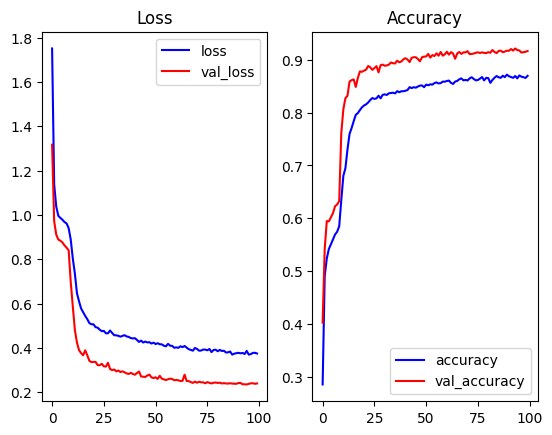

In [ ]:
model2.plot_history()

In [ ]:
prediction = model2.predict(X_test)
predictions = model2.output_layer_activation.predictions(prediction)
ab = np.argmax(prediction, axis=1)
matrix = confusion_matrix(y_test, ab, num_classes)
print(f"Accuracy for Model CNN: {round(accuracy_score(ab,y_test)* 100,2)}%")
print('\n')
for i in range(num_classes) :
  recall_value = round(recall(matrix, i),2)
  precision_value = round(precision(matrix, i),2)
  print(f"Recall for class {i}: {recall_value * 100}%")
  print(f"Precision for class {i}: {precision_value * 100}%")
  print('\n')

Accuracy for Model ANN: 91.63%


Recall for class 0: 89.0%
Precision for class 0: 90.0%


Recall for class 1: 100.0%
Precision for class 1: 100.0%


Recall for class 2: 94.0%
Precision for class 2: 92.0%


Recall for class 3: 88.0%
Precision for class 3: 92.0%


Recall for class 4: 95.0%
Precision for class 4: 96.0%


Recall for class 5: 93.0%
Precision for class 5: 96.0%


Recall for class 6: 90.0%
Precision for class 6: 84.0%




## CNN with Gan

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combine_gan, y_combined_gan, test_size=0.2, random_state=42)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6335,1.635117e-11,3.548067e-08,2.336230e-07,1.902817e-07,1.664505e-10,1.129747e-08,7.136804e-08,4.188757e-06,0.999989,1.000000,0.999936,7.259732e-09,1.000000e+00,8.120988e-04,0.000007,1.000000
13569,9.999333e-01,1.135626e-08,6.706786e-04,9.989361e-01,3.941705e-05,9.965824e-01,1.742301e-04,1.167808e-06,0.999727,0.238239,0.031062,1.205067e-04,9.999964e-01,9.999568e-01,0.999841,0.000002
4191,2.175009e-07,2.850155e-05,4.402267e-13,2.731021e-05,5.171838e-12,1.698642e-08,6.253554e-13,3.737505e-07,0.999995,0.000022,0.997752,2.005332e-02,1.880801e-09,9.999998e-01,1.000000,0.001919
11837,9.999823e-01,4.064920e-07,1.384940e-02,9.976233e-01,6.370555e-04,9.447230e-01,4.551047e-03,1.227397e-05,0.999386,0.350726,0.027397,2.518412e-04,1.000000e+00,9.581459e-01,0.831941,0.000032
7559,8.970912e-01,1.920289e-05,1.578363e-05,6.718078e-06,5.925239e-04,9.999999e-01,7.779911e-03,4.290540e-05,0.999975,0.999031,0.000005,3.402487e-11,9.999745e-01,5.393013e-05,0.000007,0.999996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,1.339322e-06,7.901160e-01,8.166455e-03,1.373866e-02,1.517181e-09,8.540710e-11,2.034717e-01,3.754665e-04,0.999988,0.999953,0.000087,4.452529e-03,6.683917e-02,6.733026e-03,0.999979,1.000000
5390,2.971187e-01,4.325950e-01,4.920861e-01,3.845021e-01,5.588542e-01,8.875916e-01,2.890051e-01,4.343647e-01,0.735409,0.955790,0.710218,2.896675e-01,2.994493e-01,1.224999e-01,0.245842,0.890534
860,7.688432e-02,1.278048e-01,1.136325e-01,2.251889e-01,1.548182e-01,5.408395e-01,7.467732e-02,1.468827e-01,0.632976,0.943112,0.926980,7.384359e-01,4.746458e-01,6.434514e-01,0.697297,0.982573
2184,9.989004e-01,3.471056e-04,9.808895e-01,9.340291e-01,7.596629e-01,1.416391e-02,9.945049e-01,5.740349e-02,0.999968,0.999967,0.002603,9.796116e-01,7.950813e-01,1.496869e-01,0.998972,0.857947


In [ ]:
# Instantiate the model
model2 = Model()
# Add layers
model2.add(Conv1D(n_inputs= 16,n_filters=32, filter_size=3))
model2.add(MaxPool1D(pool_size=2,strides = 2))
model2.add(Flatten())
model2.add(Dense(224,64))
model2.add(ReLU())
model2.add(Dense(64,32))
model2.add(ReLU())
model2.add(Dropout(0.5))
model2.add(Dense(32,7))
model2.add(Softmax())

# Set loss, optimizer and accuracy objects
model2.set(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(learning_rate=1e-3),
    accuracy=Categorical_Accuracy()
)

# Finalize the model
model2.finalize()

In [ ]:
model2.train(X_train, y_train, validation_data=(X_test, y_test),
            epochs=100, batch_size=64, print_every=170)

Training Epoch: 1/100:   1%|          | 4/341 [00:00<00:21, 15.70it/s]

step: 0, acc: 0.188, loss: 1.946 (data_loss: 1.946, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/100:  51%|█████     | 174/341 [00:13<00:11, 15.16it/s]

step: 170, acc: 0.375, loss: 1.528 (data_loss: 1.528, reg_loss: 0.000), lr: 0.001


Training Epoch: 1/100: 100%|██████████| 341/341 [00:27<00:00, 12.44it/s]


step: 340, acc: 0.529, loss: 1.249 (data_loss: 1.249, reg_loss: 0.000), lr: 0.001
training, acc: 0.339, loss: 1.641 (data_loss: 1.641, reg_loss: 0.000), lr: 0.001
validation, acc: 0.499, loss: 1.346


Training Epoch: 2/100:   0%|          | 1/341 [00:00<00:44,  7.64it/s]

step: 0, acc: 0.422, loss: 1.427 (data_loss: 1.427, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/100:  51%|█████     | 174/341 [00:13<00:10, 15.75it/s]

step: 170, acc: 0.531, loss: 1.304 (data_loss: 1.304, reg_loss: 0.000), lr: 0.001


Training Epoch: 2/100: 100%|██████████| 341/341 [00:27<00:00, 12.21it/s]


step: 340, acc: 0.588, loss: 1.007 (data_loss: 1.007, reg_loss: 0.000), lr: 0.001
training, acc: 0.503, loss: 1.333 (data_loss: 1.333, reg_loss: 0.000), lr: 0.001
validation, acc: 0.562, loss: 1.201


Training Epoch: 3/100:   1%|          | 2/341 [00:00<00:21, 15.62it/s]

step: 0, acc: 0.531, loss: 1.287 (data_loss: 1.287, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/100:  50%|█████     | 172/341 [00:12<00:22,  7.57it/s]

step: 170, acc: 0.609, loss: 1.033 (data_loss: 1.033, reg_loss: 0.000), lr: 0.001


Training Epoch: 3/100: 100%|██████████| 341/341 [00:24<00:00, 13.92it/s]


step: 340, acc: 0.647, loss: 0.910 (data_loss: 0.910, reg_loss: 0.000), lr: 0.001
training, acc: 0.565, loss: 1.189 (data_loss: 1.189, reg_loss: 0.000), lr: 0.001
validation, acc: 0.633, loss: 1.061


Training Epoch: 4/100:   1%|          | 2/341 [00:00<00:23, 14.18it/s]

step: 0, acc: 0.594, loss: 1.153 (data_loss: 1.153, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/100:  51%|█████     | 173/341 [00:13<00:13, 12.61it/s]

step: 170, acc: 0.609, loss: 1.012 (data_loss: 1.012, reg_loss: 0.000), lr: 0.001


Training Epoch: 4/100: 100%|██████████| 341/341 [00:26<00:00, 12.97it/s]


step: 340, acc: 0.647, loss: 0.861 (data_loss: 0.861, reg_loss: 0.000), lr: 0.001
training, acc: 0.598, loss: 1.108 (data_loss: 1.108, reg_loss: 0.000), lr: 0.001
validation, acc: 0.686, loss: 0.957


Training Epoch: 5/100:   1%|          | 2/341 [00:00<00:20, 16.55it/s]

step: 0, acc: 0.672, loss: 0.957 (data_loss: 0.957, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/100:  51%|█████     | 174/341 [00:13<00:10, 15.55it/s]

step: 170, acc: 0.656, loss: 0.950 (data_loss: 0.950, reg_loss: 0.000), lr: 0.001


Training Epoch: 5/100: 100%|██████████| 341/341 [00:27<00:00, 12.56it/s]


step: 340, acc: 0.765, loss: 0.759 (data_loss: 0.759, reg_loss: 0.000), lr: 0.001
training, acc: 0.628, loss: 1.031 (data_loss: 1.031, reg_loss: 0.000), lr: 0.001
validation, acc: 0.720, loss: 0.874


Training Epoch: 6/100:   1%|          | 2/341 [00:00<00:25, 13.43it/s]

step: 0, acc: 0.703, loss: 0.935 (data_loss: 0.935, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/100:  51%|█████     | 174/341 [00:13<00:11, 15.09it/s]

step: 170, acc: 0.656, loss: 0.841 (data_loss: 0.841, reg_loss: 0.000), lr: 0.001


Training Epoch: 6/100: 100%|██████████| 341/341 [00:27<00:00, 12.54it/s]


step: 340, acc: 0.824, loss: 0.652 (data_loss: 0.652, reg_loss: 0.000), lr: 0.001
training, acc: 0.655, loss: 0.970 (data_loss: 0.970, reg_loss: 0.000), lr: 0.001
validation, acc: 0.748, loss: 0.771


Training Epoch: 7/100:   1%|          | 2/341 [00:00<00:21, 15.44it/s]

step: 0, acc: 0.656, loss: 0.846 (data_loss: 0.846, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/100:  51%|█████     | 173/341 [00:13<00:10, 15.55it/s]

step: 170, acc: 0.688, loss: 0.797 (data_loss: 0.797, reg_loss: 0.000), lr: 0.001


Training Epoch: 7/100: 100%|██████████| 341/341 [00:27<00:00, 12.61it/s]


step: 340, acc: 0.824, loss: 0.609 (data_loss: 0.609, reg_loss: 0.000), lr: 0.001
training, acc: 0.680, loss: 0.896 (data_loss: 0.896, reg_loss: 0.000), lr: 0.001
validation, acc: 0.774, loss: 0.694


Training Epoch: 8/100:   1%|          | 2/341 [00:00<00:21, 15.51it/s]

step: 0, acc: 0.703, loss: 0.872 (data_loss: 0.872, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/100:  50%|█████     | 172/341 [00:21<00:23,  7.19it/s]

step: 170, acc: 0.672, loss: 0.915 (data_loss: 0.915, reg_loss: 0.000), lr: 0.001


Training Epoch: 8/100: 100%|██████████| 341/341 [00:40<00:00,  8.50it/s]


step: 340, acc: 0.824, loss: 0.763 (data_loss: 0.763, reg_loss: 0.000), lr: 0.001
training, acc: 0.717, loss: 0.825 (data_loss: 0.825, reg_loss: 0.000), lr: 0.001
validation, acc: 0.814, loss: 0.604


Training Epoch: 9/100:   1%|          | 2/341 [00:00<00:21, 16.09it/s]

step: 0, acc: 0.781, loss: 0.755 (data_loss: 0.755, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/100:  51%|█████     | 173/341 [00:13<00:10, 15.51it/s]

step: 170, acc: 0.828, loss: 0.688 (data_loss: 0.688, reg_loss: 0.000), lr: 0.001


Training Epoch: 9/100: 100%|██████████| 341/341 [00:27<00:00, 12.22it/s]


step: 340, acc: 0.765, loss: 0.558 (data_loss: 0.558, reg_loss: 0.000), lr: 0.001
training, acc: 0.753, loss: 0.762 (data_loss: 0.762, reg_loss: 0.000), lr: 0.001
validation, acc: 0.848, loss: 0.521


Training Epoch: 10/100:   0%|          | 1/341 [00:00<00:42,  7.99it/s]

step: 0, acc: 0.688, loss: 0.745 (data_loss: 0.745, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/100:  51%|█████     | 173/341 [00:12<00:10, 15.76it/s]

step: 170, acc: 0.797, loss: 0.803 (data_loss: 0.803, reg_loss: 0.000), lr: 0.001


Training Epoch: 10/100: 100%|██████████| 341/341 [00:25<00:00, 13.12it/s]


step: 340, acc: 0.941, loss: 0.420 (data_loss: 0.420, reg_loss: 0.000), lr: 0.001
training, acc: 0.773, loss: 0.695 (data_loss: 0.695, reg_loss: 0.000), lr: 0.001
validation, acc: 0.849, loss: 0.489


Training Epoch: 11/100:   1%|          | 2/341 [00:00<00:20, 16.68it/s]

step: 0, acc: 0.734, loss: 0.579 (data_loss: 0.579, reg_loss: 0.000), lr: 0.001


Training Epoch: 11/100:  50%|█████     | 172/341 [00:13<00:20,  8.34it/s]

step: 170, acc: 0.766, loss: 0.753 (data_loss: 0.753, reg_loss: 0.000), lr: 0.001


Training Epoch: 11/100: 100%|██████████| 341/341 [00:25<00:00, 13.23it/s]


step: 340, acc: 0.941, loss: 0.396 (data_loss: 0.396, reg_loss: 0.000), lr: 0.001
training, acc: 0.788, loss: 0.659 (data_loss: 0.659, reg_loss: 0.000), lr: 0.001
validation, acc: 0.863, loss: 0.443


Training Epoch: 12/100:   1%|          | 2/341 [00:00<00:20, 16.45it/s]

step: 0, acc: 0.781, loss: 0.594 (data_loss: 0.594, reg_loss: 0.000), lr: 0.001


Training Epoch: 12/100:  51%|█████     | 173/341 [00:13<00:10, 15.62it/s]

step: 170, acc: 0.812, loss: 0.799 (data_loss: 0.799, reg_loss: 0.000), lr: 0.001


Training Epoch: 12/100: 100%|██████████| 341/341 [00:26<00:00, 12.94it/s]


step: 340, acc: 0.941, loss: 0.334 (data_loss: 0.334, reg_loss: 0.000), lr: 0.001
training, acc: 0.798, loss: 0.627 (data_loss: 0.627, reg_loss: 0.000), lr: 0.001
validation, acc: 0.870, loss: 0.426


Training Epoch: 13/100:   1%|          | 2/341 [00:00<00:20, 16.28it/s]

step: 0, acc: 0.797, loss: 0.571 (data_loss: 0.571, reg_loss: 0.000), lr: 0.001


Training Epoch: 13/100:  51%|█████     | 174/341 [00:13<00:10, 15.24it/s]

step: 170, acc: 0.828, loss: 0.587 (data_loss: 0.587, reg_loss: 0.000), lr: 0.001


Training Epoch: 13/100: 100%|██████████| 341/341 [00:27<00:00, 12.55it/s]


step: 340, acc: 0.824, loss: 0.716 (data_loss: 0.716, reg_loss: 0.000), lr: 0.001
training, acc: 0.802, loss: 0.607 (data_loss: 0.607, reg_loss: 0.000), lr: 0.001
validation, acc: 0.882, loss: 0.398


Training Epoch: 14/100:   1%|          | 2/341 [00:00<00:22, 14.77it/s]

step: 0, acc: 0.891, loss: 0.449 (data_loss: 0.449, reg_loss: 0.000), lr: 0.001


Training Epoch: 14/100:  50%|█████     | 172/341 [00:13<00:11, 14.98it/s]

step: 170, acc: 0.859, loss: 0.568 (data_loss: 0.568, reg_loss: 0.000), lr: 0.001


Training Epoch: 14/100: 100%|██████████| 341/341 [00:27<00:00, 12.48it/s]


step: 340, acc: 0.882, loss: 0.470 (data_loss: 0.470, reg_loss: 0.000), lr: 0.001
training, acc: 0.815, loss: 0.581 (data_loss: 0.581, reg_loss: 0.000), lr: 0.001
validation, acc: 0.878, loss: 0.392


Training Epoch: 15/100:   1%|          | 2/341 [00:00<00:21, 15.61it/s]

step: 0, acc: 0.844, loss: 0.502 (data_loss: 0.502, reg_loss: 0.000), lr: 0.001


Training Epoch: 15/100:  50%|█████     | 172/341 [00:13<00:11, 15.17it/s]

step: 170, acc: 0.875, loss: 0.601 (data_loss: 0.601, reg_loss: 0.000), lr: 0.001


Training Epoch: 15/100: 100%|██████████| 341/341 [00:27<00:00, 12.52it/s]


step: 340, acc: 0.824, loss: 0.706 (data_loss: 0.706, reg_loss: 0.000), lr: 0.001
training, acc: 0.822, loss: 0.552 (data_loss: 0.552, reg_loss: 0.000), lr: 0.001
validation, acc: 0.882, loss: 0.372


Training Epoch: 16/100:   1%|          | 2/341 [00:00<00:21, 16.09it/s]

step: 0, acc: 0.859, loss: 0.464 (data_loss: 0.464, reg_loss: 0.000), lr: 0.001


Training Epoch: 16/100:  50%|█████     | 172/341 [00:13<00:10, 15.80it/s]

step: 170, acc: 0.859, loss: 0.701 (data_loss: 0.701, reg_loss: 0.000), lr: 0.001


Training Epoch: 16/100: 100%|██████████| 341/341 [00:27<00:00, 12.44it/s]


step: 340, acc: 0.882, loss: 0.616 (data_loss: 0.616, reg_loss: 0.000), lr: 0.001
training, acc: 0.827, loss: 0.537 (data_loss: 0.537, reg_loss: 0.000), lr: 0.001
validation, acc: 0.889, loss: 0.353


Training Epoch: 17/100:   0%|          | 1/341 [00:00<00:40,  8.38it/s]

step: 0, acc: 0.875, loss: 0.487 (data_loss: 0.487, reg_loss: 0.000), lr: 0.001


Training Epoch: 17/100:  50%|█████     | 171/341 [00:12<00:14, 11.34it/s]

step: 170, acc: 0.766, loss: 0.885 (data_loss: 0.885, reg_loss: 0.000), lr: 0.001


Training Epoch: 17/100: 100%|██████████| 341/341 [00:25<00:00, 13.15it/s]


step: 340, acc: 0.882, loss: 0.432 (data_loss: 0.432, reg_loss: 0.000), lr: 0.001
training, acc: 0.829, loss: 0.520 (data_loss: 0.520, reg_loss: 0.000), lr: 0.001
validation, acc: 0.893, loss: 0.339


Training Epoch: 18/100:   1%|          | 2/341 [00:00<00:22, 15.18it/s]

step: 0, acc: 0.906, loss: 0.437 (data_loss: 0.437, reg_loss: 0.000), lr: 0.001


Training Epoch: 18/100:  50%|█████     | 172/341 [00:13<00:23,  7.28it/s]

step: 170, acc: 0.844, loss: 0.612 (data_loss: 0.612, reg_loss: 0.000), lr: 0.001


Training Epoch: 18/100: 100%|██████████| 341/341 [00:25<00:00, 13.35it/s]


step: 340, acc: 0.882, loss: 0.396 (data_loss: 0.396, reg_loss: 0.000), lr: 0.001
training, acc: 0.829, loss: 0.513 (data_loss: 0.513, reg_loss: 0.000), lr: 0.001
validation, acc: 0.891, loss: 0.336


Training Epoch: 19/100:   1%|          | 2/341 [00:00<00:22, 15.15it/s]

step: 0, acc: 0.859, loss: 0.470 (data_loss: 0.470, reg_loss: 0.000), lr: 0.001


Training Epoch: 19/100:  51%|█████     | 173/341 [00:13<00:10, 15.82it/s]

step: 170, acc: 0.859, loss: 0.706 (data_loss: 0.706, reg_loss: 0.000), lr: 0.001


Training Epoch: 19/100: 100%|██████████| 341/341 [00:27<00:00, 12.60it/s]


step: 340, acc: 0.882, loss: 0.352 (data_loss: 0.352, reg_loss: 0.000), lr: 0.001
training, acc: 0.837, loss: 0.493 (data_loss: 0.493, reg_loss: 0.000), lr: 0.001
validation, acc: 0.893, loss: 0.332


Training Epoch: 20/100:   1%|          | 2/341 [00:00<00:20, 16.70it/s]

step: 0, acc: 0.891, loss: 0.391 (data_loss: 0.391, reg_loss: 0.000), lr: 0.001


Training Epoch: 20/100:  51%|█████     | 173/341 [00:13<00:10, 15.59it/s]

step: 170, acc: 0.828, loss: 0.589 (data_loss: 0.589, reg_loss: 0.000), lr: 0.001


Training Epoch: 20/100: 100%|██████████| 341/341 [00:27<00:00, 12.42it/s]


step: 340, acc: 0.941, loss: 0.319 (data_loss: 0.319, reg_loss: 0.000), lr: 0.001
training, acc: 0.835, loss: 0.489 (data_loss: 0.489, reg_loss: 0.000), lr: 0.001
validation, acc: 0.897, loss: 0.321


Training Epoch: 21/100:   1%|          | 2/341 [00:00<00:21, 15.46it/s]

step: 0, acc: 0.906, loss: 0.397 (data_loss: 0.397, reg_loss: 0.000), lr: 0.001


Training Epoch: 21/100:  51%|█████     | 174/341 [00:14<00:10, 15.22it/s]

step: 170, acc: 0.891, loss: 0.481 (data_loss: 0.481, reg_loss: 0.000), lr: 0.001


Training Epoch: 21/100: 100%|██████████| 341/341 [00:27<00:00, 12.29it/s]


step: 340, acc: 0.882, loss: 0.426 (data_loss: 0.426, reg_loss: 0.000), lr: 0.001
training, acc: 0.841, loss: 0.474 (data_loss: 0.474, reg_loss: 0.000), lr: 0.001
validation, acc: 0.894, loss: 0.316


Training Epoch: 22/100:   1%|          | 2/341 [00:00<00:21, 15.62it/s]

step: 0, acc: 0.859, loss: 0.496 (data_loss: 0.496, reg_loss: 0.000), lr: 0.001


Training Epoch: 22/100:  51%|█████     | 174/341 [00:14<00:11, 14.63it/s]

step: 170, acc: 0.859, loss: 0.552 (data_loss: 0.552, reg_loss: 0.000), lr: 0.001


Training Epoch: 22/100: 100%|██████████| 341/341 [00:27<00:00, 12.34it/s]


step: 340, acc: 0.882, loss: 0.255 (data_loss: 0.255, reg_loss: 0.000), lr: 0.001
training, acc: 0.843, loss: 0.467 (data_loss: 0.467, reg_loss: 0.000), lr: 0.001
validation, acc: 0.894, loss: 0.311


Training Epoch: 23/100:   0%|          | 1/341 [00:00<00:42,  8.01it/s]

step: 0, acc: 0.891, loss: 0.430 (data_loss: 0.430, reg_loss: 0.000), lr: 0.001


Training Epoch: 23/100:  50%|█████     | 172/341 [00:12<00:11, 15.02it/s]

step: 170, acc: 0.859, loss: 0.538 (data_loss: 0.538, reg_loss: 0.000), lr: 0.001


Training Epoch: 23/100: 100%|██████████| 341/341 [00:26<00:00, 12.71it/s]


step: 340, acc: 1.000, loss: 0.181 (data_loss: 0.181, reg_loss: 0.000), lr: 0.001
training, acc: 0.845, loss: 0.458 (data_loss: 0.458, reg_loss: 0.000), lr: 0.001
validation, acc: 0.890, loss: 0.306


Training Epoch: 24/100:   1%|          | 2/341 [00:00<00:26, 12.98it/s]

step: 0, acc: 0.875, loss: 0.363 (data_loss: 0.363, reg_loss: 0.000), lr: 0.001


Training Epoch: 24/100:  50%|█████     | 172/341 [00:14<00:21,  7.88it/s]

step: 170, acc: 0.891, loss: 0.518 (data_loss: 0.518, reg_loss: 0.000), lr: 0.001


Training Epoch: 24/100: 100%|██████████| 341/341 [00:27<00:00, 12.31it/s]


step: 340, acc: 0.941, loss: 0.285 (data_loss: 0.285, reg_loss: 0.000), lr: 0.001
training, acc: 0.845, loss: 0.457 (data_loss: 0.457, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.296


Training Epoch: 25/100:   1%|          | 2/341 [00:00<00:22, 15.31it/s]

step: 0, acc: 0.875, loss: 0.322 (data_loss: 0.322, reg_loss: 0.000), lr: 0.001


Training Epoch: 25/100:  51%|█████     | 173/341 [00:14<00:13, 12.72it/s]

step: 170, acc: 0.875, loss: 0.689 (data_loss: 0.689, reg_loss: 0.000), lr: 0.001


Training Epoch: 25/100: 100%|██████████| 341/341 [00:29<00:00, 11.72it/s]


step: 340, acc: 0.882, loss: 0.434 (data_loss: 0.434, reg_loss: 0.000), lr: 0.001
training, acc: 0.852, loss: 0.443 (data_loss: 0.443, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.299


Training Epoch: 26/100:   1%|          | 2/341 [00:00<00:23, 14.69it/s]

step: 0, acc: 0.906, loss: 0.302 (data_loss: 0.302, reg_loss: 0.000), lr: 0.001


Training Epoch: 26/100:  50%|█████     | 172/341 [00:14<00:11, 14.28it/s]

step: 170, acc: 0.859, loss: 0.527 (data_loss: 0.527, reg_loss: 0.000), lr: 0.001


Training Epoch: 26/100: 100%|██████████| 341/341 [00:29<00:00, 11.73it/s]


step: 340, acc: 0.941, loss: 0.258 (data_loss: 0.258, reg_loss: 0.000), lr: 0.001
training, acc: 0.849, loss: 0.441 (data_loss: 0.441, reg_loss: 0.000), lr: 0.001
validation, acc: 0.899, loss: 0.304


Training Epoch: 27/100:   0%|          | 1/341 [00:00<00:44,  7.60it/s]

step: 0, acc: 0.906, loss: 0.379 (data_loss: 0.379, reg_loss: 0.000), lr: 0.001


Training Epoch: 27/100:  50%|█████     | 172/341 [00:14<00:24,  6.95it/s]

step: 170, acc: 0.859, loss: 0.533 (data_loss: 0.533, reg_loss: 0.000), lr: 0.001


Training Epoch: 27/100: 100%|██████████| 341/341 [00:28<00:00, 12.13it/s]


step: 340, acc: 0.941, loss: 0.421 (data_loss: 0.421, reg_loss: 0.000), lr: 0.001
training, acc: 0.854, loss: 0.435 (data_loss: 0.435, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.290


Training Epoch: 28/100:   1%|          | 2/341 [00:00<00:25, 13.53it/s]

step: 0, acc: 0.875, loss: 0.350 (data_loss: 0.350, reg_loss: 0.000), lr: 0.001


Training Epoch: 28/100:  51%|█████     | 174/341 [00:15<00:11, 14.58it/s]

step: 170, acc: 0.828, loss: 0.578 (data_loss: 0.578, reg_loss: 0.000), lr: 0.001


Training Epoch: 28/100: 100%|██████████| 341/341 [00:29<00:00, 11.63it/s]


step: 340, acc: 0.941, loss: 0.305 (data_loss: 0.305, reg_loss: 0.000), lr: 0.001
training, acc: 0.853, loss: 0.429 (data_loss: 0.429, reg_loss: 0.000), lr: 0.001
validation, acc: 0.901, loss: 0.287


Training Epoch: 29/100:   1%|          | 2/341 [00:00<00:22, 14.86it/s]

step: 0, acc: 0.844, loss: 0.394 (data_loss: 0.394, reg_loss: 0.000), lr: 0.001


Training Epoch: 29/100:  51%|█████     | 173/341 [00:14<00:11, 14.29it/s]

step: 170, acc: 0.828, loss: 0.589 (data_loss: 0.589, reg_loss: 0.000), lr: 0.001


Training Epoch: 29/100: 100%|██████████| 341/341 [00:28<00:00, 11.79it/s]


step: 340, acc: 0.941, loss: 0.227 (data_loss: 0.227, reg_loss: 0.000), lr: 0.001
training, acc: 0.854, loss: 0.428 (data_loss: 0.428, reg_loss: 0.000), lr: 0.001
validation, acc: 0.900, loss: 0.297


Training Epoch: 30/100:   1%|          | 2/341 [00:00<00:30, 11.12it/s]

step: 0, acc: 0.859, loss: 0.356 (data_loss: 0.356, reg_loss: 0.000), lr: 0.001


Training Epoch: 30/100:  51%|█████     | 173/341 [00:14<00:11, 14.87it/s]

step: 170, acc: 0.859, loss: 0.685 (data_loss: 0.685, reg_loss: 0.000), lr: 0.001


Training Epoch: 30/100:  63%|██████▎   | 216/341 [00:19<00:14,  8.81it/s]

In [ ]:
model2.plot_history()

In [ ]:
prediction = model2.predict(X_test)
predictions = model2.output_layer_activation.predictions(prediction)
ab = np.argmax(prediction, axis=1)
matrix = confusion_matrix(y_test, ab, num_classes)
print(f"Accuracy for Model ANN: {round(accuracy_score(ab,y_test)* 100,2)}%")
print('\n')
for i in range(num_classes) :
  recall_value = round(recall(matrix, i),2)
  precision_value = round(precision(matrix, i),2)
  print(f"Recall for class {i}: {recall_value * 100}%")
  print(f"Precision for class {i}: {precision_value * 100}%")
  print('\n')

## CNN With Feature Selection

# SVM Testing GAN

## SVM Without GAN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
svm = SVM()
svm.fit(X_train_dt, y_train)
pred_6 = svm.predict(X_test_dt)
accuracy(y_test, pred_6)

In [ ]:
matrix = confusion_matrix(y_test, ab, num_classes)
print(f"Accuracy for Model SVM: {round(accuracy(ab,y_test),2)}%")
print('\n')
for i in range(num_classes) :
  recall_value = round(recall(matrix, i),2)
  precision_value = round(precision(matrix, i),2)
  print(f"Recall for class {i}: {recall_value * 100}%")
  print(f"Precision for class {i}: {precision_value * 100}%")
  print('\n')

## SVM With GAN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combine_gan, y_combined_gan, test_size=0.2, random_state=42)

In [ ]:
svm = SVM()
svm.fit(X_train_dt, y_train)
pred_6 = svm.predict(X_test_dt)
accuracy(y_test, pred_6)

In [ ]:
matrix = confusion_matrix(y_test, ab, num_classes)
print(f"Accuracy for Model SVM: {round(accuracy(ab,y_test),2)}%")
print('\n')
for i in range(num_classes) :
  recall_value = round(recall(matrix, i),2)
  precision_value = round(precision(matrix, i),2)
  print(f"Recall for class {i}: {recall_value * 100}%")
  print(f"Precision for class {i}: {precision_value * 100}%")
  print('\n')

## SVM With Feature Selection

In [ ]:
X_scaled2 = X_scaled.drop(columns=['Area'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, test_size=0.2, random_state=42)
svm = SVM()
svm.fit(X_train_dt, y_train)
pred_6 = svm.predict(X_test_dt)
accuracy(y_test, pred_6)
matrix = confusion_matrix(y_test, ab, num_classes)
print(f"Accuracy for Model SVM: {round(accuracy(ab,y_test),2)}%")
print('\n')
for i in range(num_classes) :
  recall_value = round(recall(matrix, i),2)
  precision_value = round(precision(matrix, i),2)
  print(f"Recall for class {i}: {recall_value * 100}%")
  print(f"Precision for class {i}: {precision_value * 100}%")
  print('\n')